In [7]:
import numpy as np
import pandas as pd
import librosa
# Load the VGGish model
def select_strongest_8_seconds(y, sr):
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr, trim=True)
    # Calculate the cumulative onset strength for each 8-second segment
    hop_length = 512
    frame_length = int(8 * sr / hop_length)
    onset_env_cumsum = np.cumsum(onset_env)
    max_strength = 0
    start_frame = 0

    for i in range(len(onset_env) - frame_length):
        strength = onset_env_cumsum[i + frame_length] - onset_env_cumsum[i]
        if strength > max_strength:
            max_strength = strength
            start_frame = i

    # Align the start of the 8-second segment with the nearest beat
    start_time = librosa.frames_to_time(start_frame, sr=sr, hop_length=hop_length)
    beat_times = librosa.frames_to_time(beats, sr=sr, hop_length=hop_length)

    if len(beat_times) > 0:
        nearest_beat_time = min(beat_times, key=lambda x: abs(x - start_time))
        start_time = nearest_beat_time

    end_time = start_time + 8
    start_sample = int(start_time * sr)
    end_sample = int(end_time * sr)
    y_selected_seconds = y[start_sample:end_sample]
    return y_selected_seconds, start_time, end_time

In [2]:
import pandas as pd

# Load the train, validation, and test sets from CSV files
df = pd.read_csv('final_edm_dataset_full_size.csv')


# Display the first few rows of each DataFrame to verify

import numpy as np
import pandas as pd


# # Function to convert a saved string back to a NumPy array
# def convert_genre_array(saved_str):
#     cleaned_str = saved_str.replace("[", "").replace("]", "").replace("\n", " ")
#     array_list = list(map(int, cleaned_str.split()))
#     return np.array(array_list)
#
#
# # List of all datasets to modify
# datasets = [train_df, test_df, val_df]  # Add any other datasets you have
#
# # Apply conversion to all datasets
# for df in datasets:
#     df["genre_array2"] = df["genre_array2"].apply(convert_genre_array)

df

,genres,spotify_id,name,artist_id,artist,danceability,energy,speechiness,valence,file_path,main_genre
0,['90s_house'],49X0LAl6faAusYq02PRAY6,Lady - Hear Me Tonight,0AkpPlFLnr0VQwZQeMGht0,Modjo,0.720,0.808,0.0379,0.869,../mp3songs/90s_House_Classics/Lady - Hear Me ...,dance
1,['90s_house'],1mv4lh1rW1K6xhxhJmEezy,Music Sounds Better With You - Radio Edit,"2w7IutHv5g4e8LumrwtjWR, 2XOvFG8pp1XAV1V6ZJABim...","Stardust, Benjamin Diamond, Alan Braxe, Thomas...",0.729,0.662,0.3370,0.359,../mp3songs/90s_House_Classics/Music Sounds Be...,dance
2,['90s_house'],2He3NOyqtLNE3RQPpeDdSb,Groove Is in the Heart,4eQJIXFEujzhTVVS1gIfu5,Deee-Lite,0.694,0.881,0.0701,0.924,../mp3songs/90s_House_Classics/Groove Is in th...,dance
3,['90s_house'],3pgainA2dH9c7e8JVYGRCN,Ride on Time,6tsRo8ErXzpHk3tQeH6GBW,Black Box,0.679,0.857,0.0322,0.765,../mp3songs/90s_House_Classics/Ride on Time.mp3,dance
4,['90s_house'],6vGW3d8X48CBaLdU0PQbey,Moving on Up,3lcbKPLl0ci2mKRdcP5Etf,M People,0.899,0.857,0.0370,0.961,../mp3songs/90s_House_Classics/Moving on Up.mp3,dance
...,...,...,...,...,...,...,...,...,...,...,...
544,['tekkno'],6TOTcAaGe5WJTTeb2u8qvt,Bla Bla Hard,3nnF5ol598jvBGSwnMzQtD,Fast Rage,0.696,0.945,0.1950,0.661,../mp3songs/tekkno/Bla Bla Hard.mp3,techno
545,['tekkno'],1fXqV8Eyf3hjtmKlmo11MQ,Clean,"4OWNHq6tL2TBSQgyzeu2Tw, 0yS6HixAAkOQLxPanqT8am","Sitte, MODUS STEIFHIGH",0.645,0.788,0.1810,0.365,../mp3songs/tekkno/Clean.mp3,techno
546,['tekkno'],687orBcQL4XP0Dnplk4POn,Gefühl von Schön,7cz1L007Cf3PCyhgejVnHY,Cracky Koksberg,0.567,0.804,0.0742,0.455,../mp3songs/tekkno/Gefühl von Schön.mp3,techno
547,['tekkno'],1bpoitSH1XChf4RvDRwVrd,Jetz is eh alles scheiß egal,7lQoT5ri4Eijc0nuWRFv2a,Tekktonikk,0.736,0.913,0.2020,0.552,../mp3songs/tekkno/Jetz is eh alles scheiß ega...,techno


In [3]:
# import ast  # To safely convert string representation of lists back to lists
#
# # 🔹 Genre Mapping Structure
# GENRE_PRIORITY = {
#     "metal": ["alternative metal", "nu metal", "metal"],
#     "rock": ["rock", "modern rock", "permanent wave", "alternative rock", "post-grunge", "hard rock", "classic rock", "punk", "grunge", "soft rock", "new wave"],
#     "ambient": ["sleep", "environmental"],
#     "pop": ["pop", "dance pop", "latin pop", "singer-songwriter", "mexican pop", "k-pop"],
#     "latino": ["musica mexicana", "reggaeton", "latin hip hop", "tropical", "salsa", "bachata"],
#     "classical": ["classical"],
#     "country": ["country", "contemporary country"],
#     "rnb": ["r&b", "contemporary r&b", "soul", "neo soul"],
#     "rap": ["rap", "hip hop", "trap", "pop rap", "gangster rap"],
#     "edm": ["edm", "electro house"],
#     "eurodance": ["eurodance"]
# }
#
#
# # 🔹 Create Reverse Mapping (Genre → Main Genre)
# GENRE_LOOKUP = {genre: main_genre for main_genre, subgenres in GENRE_PRIORITY.items() for genre in subgenres}
#
# # 🔹 Function to Assign One Main Genre
# def get_main_genre(genre_str):
#     try:
#         genre_list = ast.literal_eval(genre_str)  # Convert string to actual list
#         if not isinstance(genre_list, list) or not genre_list:
#             return None  # Handle invalid cases
#
#         for genre in genre_list:
#             if genre in GENRE_LOOKUP:
#                 return GENRE_LOOKUP[genre]  # Return first matching main genre
#
#         return genre_list[0]  # If no match, return the first genre in the list
#     except (ValueError, SyntaxError):
#         return None  # Handle malformed inputs
#
# # 🔹 Apply Function to DataFrame
# for df in datasets:
#     df['main_genre'] = df['genres'].apply(get_main_genre)
# train_df

,name,artist,spotify_id,preview,img,danceability,energy,loudness,speechiness,acousticness,...,instrumentalness_artist,liveness_artist,speechiness_artist,valence_artist,artist_id,genres,file_path,genres_str,genre_array2,main_genre
0,Bad Girl Good Girl,miss A,7kTKAdVVlDxve6Qr7Hm7Qc,https://p.scdn.co/mp3-preview/8ecb54bf98672824...,https://i.scdn.co/image/ab67616d0000b2730444d2...,0.793,0.805,-4.224,0.0438,0.100000,...,0.322125,0.227625,0.092637,0.504625,1BEohdSWSBggmO979tzRwW,['k-pop'],../mp3songs/43_genres_multi_label/Bad Girl Goo...,['k-pop'],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",pop
1,Baby-Baby-Baby,TLC,1zTuB57LYZa7xu7KUH8kF0,https://p.scdn.co/mp3-preview/6bdeea0782171070...,https://i.scdn.co/image/ab67616d0000b273dc9905...,0.679,0.597,-8.601,0.0439,0.091300,...,0.126880,0.140971,0.102771,0.609417,0TImkz4nPqjegtVSMZnMRq,"['contemporary r&b', 'dance pop', 'r&b']",../mp3songs/43_genres_multi_label/Baby-Baby-Ba...,"['contemporary r&b', 'dance pop', 'r&b']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",rnb
2,Both (feat. Drake & Lil Wayne) - Remix,Gucci Mane,3VCYe6mCXebBgcfzaxCVNI,https://p.scdn.co/mp3-preview/ee313255e19b85ac...,https://i.scdn.co/image/ab67616d0000b2735dedc1...,0.834,0.493,-6.567,0.1280,0.060600,...,0.000563,0.218579,0.155090,0.478625,13y7CgLHjMVRMDqxdx0Xdo,"['hip hop', 'pop rap', 'rap', 'trap']",../mp3songs/43_genres_multi_label/Both (feat. ...,"['hip hop', 'pop rap', 'rap', 'trap']","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, ...",rap
3,Those Nights,Skillet,1ZWEsoqJSrtZA1qjlG02Hp,https://p.scdn.co/mp3-preview/6589d24b8b839994...,https://i.scdn.co/image/ab67616d0000b273f6e138...,0.365,0.951,-3.340,0.0790,0.023000,...,0.000128,0.230110,0.061921,0.460615,49bzE5vRBRIota4qeHtQM8,['alternative metal'],../mp3songs/43_genres_multi_label/Those Nights...,['alternative metal'],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",metal
4,Outro: Wings,BTS,1yEzWCIc2MUt9Fw1p25YUo,https://p.scdn.co/mp3-preview/59b74af475e83284...,https://i.scdn.co/image/ab67616d0000b273bd375b...,0.654,0.903,-3.117,0.1210,0.005030,...,0.000044,0.202608,0.128515,0.533369,3Nrfpe0tUJi4K4DXYWgMUX,"['k-pop', 'pop']",../mp3songs/43_genres_multi_label/Outro Wings.mp3,"['k-pop', 'pop']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ...",pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,Ice Box,Omarion,5qhlC4Rzals34zxovrPzKp,https://p.scdn.co/mp3-preview/6981c13770bbab50...,https://i.scdn.co/image/ab67616d0000b273e46949...,0.775,0.731,-5.446,0.1340,0.189000,...,0.000153,0.162457,0.128391,0.683304,0f5nVCcR06GX8Qikz0COtT,"['dance pop', 'r&b', 'rap', 'trap']",../mp3songs/43_genres_multi_label/Ice Box.mp3,"['dance pop', 'r&b', 'rap', 'trap']","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",pop
3728,Love Will Tear Us Apart - 2020 Remaster,Joy Division,34iOH7LY3vme5rQxsVILZ4,https://p.scdn.co/mp3-preview/128c9effc25eca3f...,https://i.scdn.co/image/ab67616d0000b2731e0fdc...,0.527,0.923,-7.458,0.0379,0.000541,...,0.463745,0.255952,0.062713,0.465830,432R46LaYsJZV2Gmc4jUV5,"['alternative rock', 'new wave', 'punk', 'rock']",../mp3songs/43_genres_multi_label/Love Will Te...,"['alternative rock', 'new wave', 'punk', 'rock']","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",rock
3729,Llorar Lloviendo,Toby Love,3QeU2rcc5buv0B9VA0gRKH,https://p.scdn.co/mp3-preview/3bb59432348adc52...,https://i.scdn.co/image/ab67616d0000b27368286d...,0.789,0.713,-4.964,0.0304,0.318000,...,0.000002,0.201077,0.062469,0.835692,72R3RMGmSmzG57R7OUaDaN,"['bachata', 'reggaeton']",../mp3songs/43_genres_multi_label/Llorar Llovi...,"['bachata', 'reggaeton']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",latino
3730,Video Killed The Radio Star,The Presidents Of The United States Of America,7wck5ORA8dJB8To9rc10gi,https://p.scdn.co/mp3-preview/c1e4123fe0b078ac...,https://i.scdn.co/image/ab67616d0000b273c6ccae...,0.578,0.713,-6.868,0.0578,0.184000,...,0.087114,0.168976,0.074659,0.707765,1lZvg4fNAqHoj6I9N8naBM,"['altern

In [6]:
unique_genres = df['genres'].flatten().unique()
print(unique_genres)

AttributeError: 'Series' object has no attribute 'flatten'

In [5]:
# List of genres
genres = ['90s_house', 'acid_techno', 'hard_techno', 'hardstyle', 'jump_up_dnb', 'liquid_dnb', 'neurofunk_dnb', 'schranz', 'techno', 'tekkno','groove_techno']

# Create a one-hot encoding map for each genre
genre_to_one_hot = {genre: [1 if i == idx else 0 for i in range(len(genres))] for idx, genre in enumerate(genres)}
genre_to_one_hot



{'90s_house': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'acid_techno': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'hard_techno': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 'hardstyle': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 'jump_up_dnb': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 'liquid_dnb': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 'neurofunk_dnb': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 'schranz': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 'techno': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 'tekkno': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 'groove_techno': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]}

In [10]:
# Function to apply one-hot encoding to a dataframe
# Ensure the 'genres' column is a list
df['genres'] = df['genres'].apply(eval)

# Function to apply one-hot encoding to a dataframe
def apply_one_hot_encoding(df, genre_to_one_hot):
    df = df.copy()
    df['main_genre_encoded'] = df['genres'].apply(lambda x: genre_to_one_hot.get(x[0], [0] * len(genre_to_one_hot)) if x else [0] * len(genre_to_one_hot))
    return df

# Apply one-hot encoding to the dataframe
df = apply_one_hot_encoding(df, genre_to_one_hot)
df

,genres,spotify_id,name,artist_id,artist,danceability,energy,speechiness,valence,file_path,main_genre,main_genre_encoded
0,[90s_house],49X0LAl6faAusYq02PRAY6,Lady - Hear Me Tonight,0AkpPlFLnr0VQwZQeMGht0,Modjo,0.720,0.808,0.0379,0.869,../mp3songs/90s_House_Classics/Lady - Hear Me ...,dance,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,[90s_house],1mv4lh1rW1K6xhxhJmEezy,Music Sounds Better With You - Radio Edit,"2w7IutHv5g4e8LumrwtjWR, 2XOvFG8pp1XAV1V6ZJABim...","Stardust, Benjamin Diamond, Alan Braxe, Thomas...",0.729,0.662,0.3370,0.359,../mp3songs/90s_House_Classics/Music Sounds Be...,dance,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,[90s_house],2He3NOyqtLNE3RQPpeDdSb,Groove Is in the Heart,4eQJIXFEujzhTVVS1gIfu5,Deee-Lite,0.694,0.881,0.0701,0.924,../mp3songs/90s_House_Classics/Groove Is in th...,dance,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,[90s_house],3pgainA2dH9c7e8JVYGRCN,Ride on Time,6tsRo8ErXzpHk3tQeH6GBW,Black Box,0.679,0.857,0.0322,0.765,../mp3songs/90s_House_Classics/Ride on Time.mp3,dance,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,[90s_house],6vGW3d8X48CBaLdU0PQbey,Moving on Up,3lcbKPLl0ci2mKRdcP5Etf,M People,0.899,0.857,0.0370,0.961,../mp3songs/90s_House_Classics/Moving on Up.mp3,dance,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
544,[tekkno],6TOTcAaGe5WJTTeb2u8qvt,Bla Bla Hard,3nnF5ol598jvBGSwnMzQtD,Fast Rage,0.696,0.945,0.1950,0.661,../mp3songs/tekkno/Bla Bla Hard.mp3,techno,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
545,[tekkno],1fXqV8Eyf3hjtmKlmo11MQ,Clean,"4OWNHq6tL2TBSQgyzeu2Tw, 0yS6HixAAkOQLxPanqT8am","Sitte, MODUS STEIFHIGH",0.645,0.788,0.1810,0.365,../mp3songs/tekkno/Clean.mp3,techno,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
546,[tekkno],687orBcQL4XP0Dnplk4POn,Gefühl von Schön,7cz1L007Cf3PCyhgejVnHY,Cracky Koksberg,0.567,0.804,0.0742,0.455,../mp3songs/tekkno/Gefühl von Schön.mp3,techno,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
547,[tekkno],1bpoitSH1XChf4RvDRwVrd,Jetz is eh alles scheiß egal,7lQoT5ri4Eijc0nuWRFv2a,Tekktonikk,0.736,0.913,0.2020,0.552,../mp3songs/tekkno/Jetz is eh alles scheiß ega...,techno,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"


In [12]:
import pandas as pd

# Ensure the 'genres' column is a list
# df['genres'] = df['genres'].apply(eval)

# Convert the 'genres' column from a list to a plain string
df['genres'] = df['genres'].apply(lambda x: x[0] if isinstance(x, list) and x else x)

# Display the DataFrame to verify the changes
df

,genres,spotify_id,name,artist_id,artist,danceability,energy,speechiness,valence,file_path,main_genre,main_genre_encoded
0,90s_house,49X0LAl6faAusYq02PRAY6,Lady - Hear Me Tonight,0AkpPlFLnr0VQwZQeMGht0,Modjo,0.720,0.808,0.0379,0.869,../mp3songs/90s_House_Classics/Lady - Hear Me ...,dance,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,90s_house,1mv4lh1rW1K6xhxhJmEezy,Music Sounds Better With You - Radio Edit,"2w7IutHv5g4e8LumrwtjWR, 2XOvFG8pp1XAV1V6ZJABim...","Stardust, Benjamin Diamond, Alan Braxe, Thomas...",0.729,0.662,0.3370,0.359,../mp3songs/90s_House_Classics/Music Sounds Be...,dance,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,90s_house,2He3NOyqtLNE3RQPpeDdSb,Groove Is in the Heart,4eQJIXFEujzhTVVS1gIfu5,Deee-Lite,0.694,0.881,0.0701,0.924,../mp3songs/90s_House_Classics/Groove Is in th...,dance,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,90s_house,3pgainA2dH9c7e8JVYGRCN,Ride on Time,6tsRo8ErXzpHk3tQeH6GBW,Black Box,0.679,0.857,0.0322,0.765,../mp3songs/90s_House_Classics/Ride on Time.mp3,dance,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,90s_house,6vGW3d8X48CBaLdU0PQbey,Moving on Up,3lcbKPLl0ci2mKRdcP5Etf,M People,0.899,0.857,0.0370,0.961,../mp3songs/90s_House_Classics/Moving on Up.mp3,dance,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
544,tekkno,6TOTcAaGe5WJTTeb2u8qvt,Bla Bla Hard,3nnF5ol598jvBGSwnMzQtD,Fast Rage,0.696,0.945,0.1950,0.661,../mp3songs/tekkno/Bla Bla Hard.mp3,techno,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
545,tekkno,1fXqV8Eyf3hjtmKlmo11MQ,Clean,"4OWNHq6tL2TBSQgyzeu2Tw, 0yS6HixAAkOQLxPanqT8am","Sitte, MODUS STEIFHIGH",0.645,0.788,0.1810,0.365,../mp3songs/tekkno/Clean.mp3,techno,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
546,tekkno,687orBcQL4XP0Dnplk4POn,Gefühl von Schön,7cz1L007Cf3PCyhgejVnHY,Cracky Koksberg,0.567,0.804,0.0742,0.455,../mp3songs/tekkno/Gefühl von Schön.mp3,techno,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
547,tekkno,1bpoitSH1XChf4RvDRwVrd,Jetz is eh alles scheiß egal,7lQoT5ri4Eijc0nuWRFv2a,Tekktonikk,0.736,0.913,0.2020,0.552,../mp3songs/tekkno/Jetz is eh alles scheiß ega...,techno,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"


In [14]:
import pandas as pd

# Ensure the 'genres' column is a list
# df['genres'] = df['genres'].apply(eval)

# Explode the 'genres' column to get individual genre entries
exploded_genres = df.explode('genres')

# Display unique values in the 'genres' column
unique_genres = exploded_genres['genres'].unique()
print(unique_genres)

['90s_house' 'acid_techno' 'groove_techno' 'hard_techno' 'hardstyle'
 'jump_up_dnb' 'liquid_dnb' 'neurofunk_dnb' 'schranz' 'techno' 'tekkno']


In [15]:
from sklearn.model_selection import train_test_split

# First, split the data into train+val and test sets
train_val_df, test_df = train_test_split(df, test_size=0.2, stratify=df['genres'], random_state=42)

# Then, split the train+val set into train and validation sets
train_df, val_df = train_test_split(train_val_df, test_size=0.1, stratify=train_val_df['genres'], random_state=42)

# Print the sizes of the splits to verify
print(f'Train set size: {train_df.shape[0]}')
print(f'Validation set size: {val_df.shape[0]}')
print(f'Test set size: {test_df.shape[0]}')

Train set size: 395
Validation set size: 44
Test set size: 110


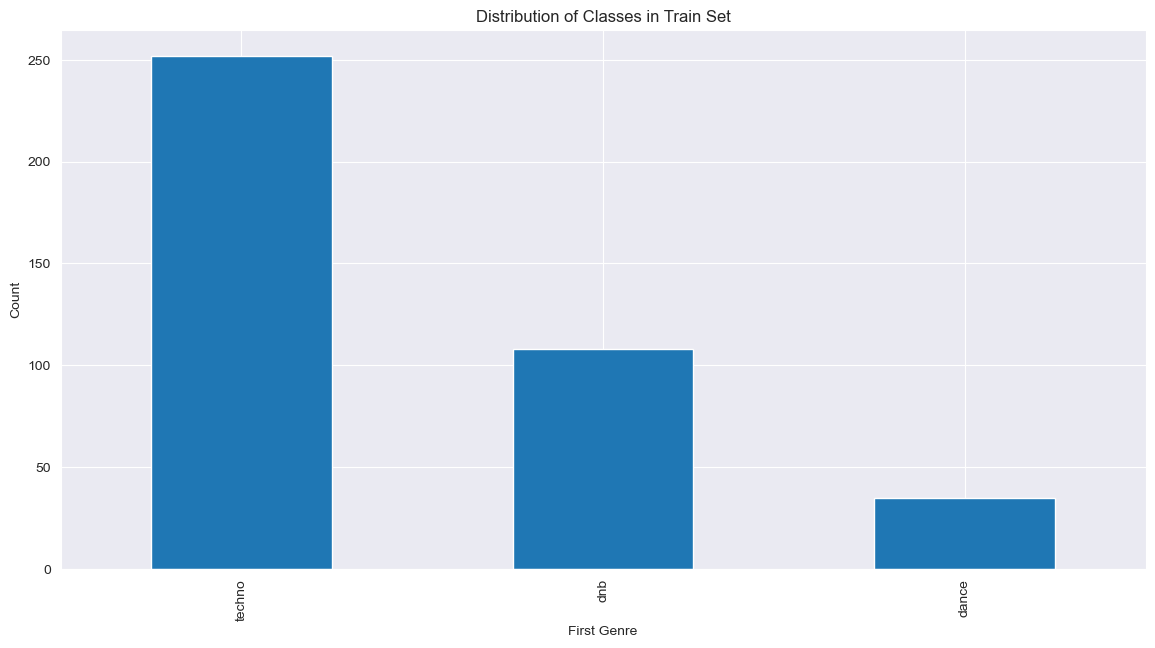

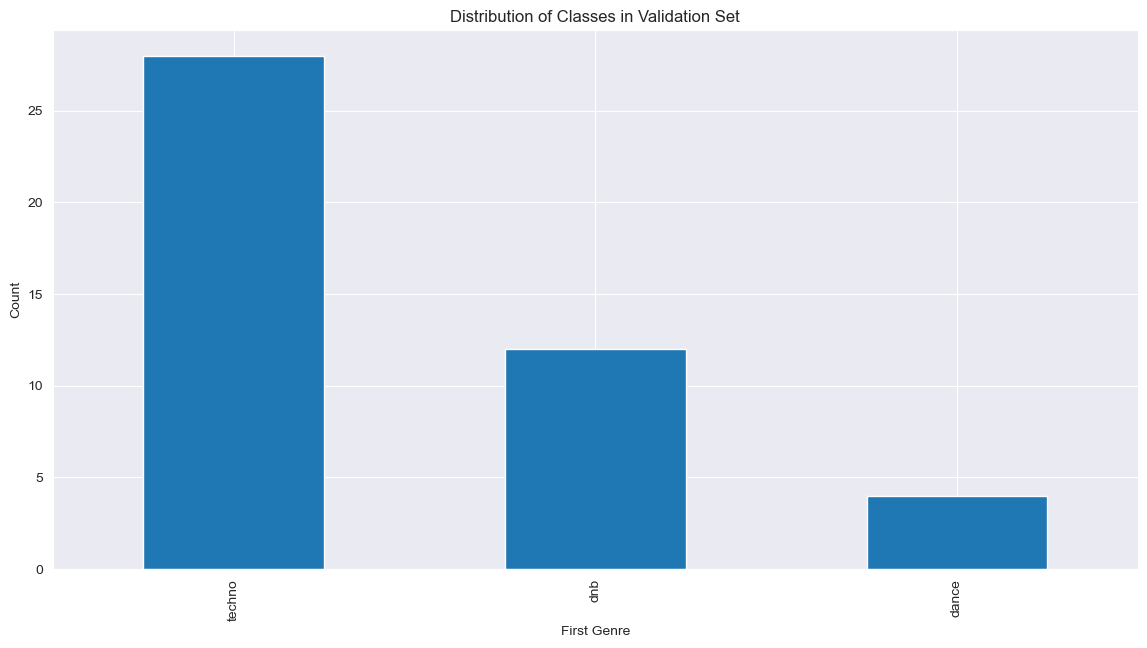

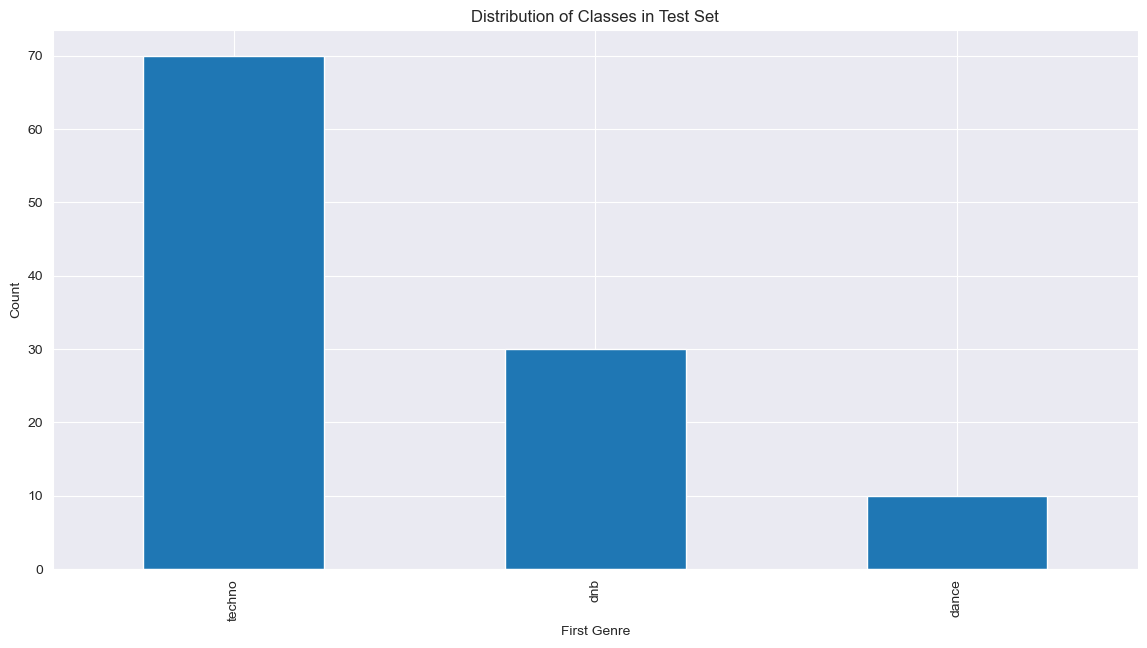

Train set size: 395
Validation set size: 44
Test set size: 110
Unique classes in train set: 3
Unique classes in validation set: 3
Unique classes in test set: 3


In [17]:
import matplotlib.pyplot as plt
# Plot the distribution of each class in the train set
plt.figure(figsize=(14, 7))
train_df['main_genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes in Train Set')
plt.xlabel('First Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of each class in the validation set
plt.figure(figsize=(14, 7))
val_df['main_genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes in Validation Set')
plt.xlabel('First Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of each class in the test set
plt.figure(figsize=(14, 7))
test_df['main_genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes in Test Set')
plt.xlabel('First Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Print the sizes of the train, validation, and test sets
print(f'Train set size: {train_df.shape[0]}')
print(f'Validation set size: {val_df.shape[0]}')
print(f'Test set size: {test_df.shape[0]}')
print(f'Unique classes in train set: {train_df["main_genre"].nunique()}')
print(f'Unique classes in validation set: {val_df["main_genre"].nunique()}')
print(f'Unique classes in test set: {test_df["main_genre"].nunique()}')

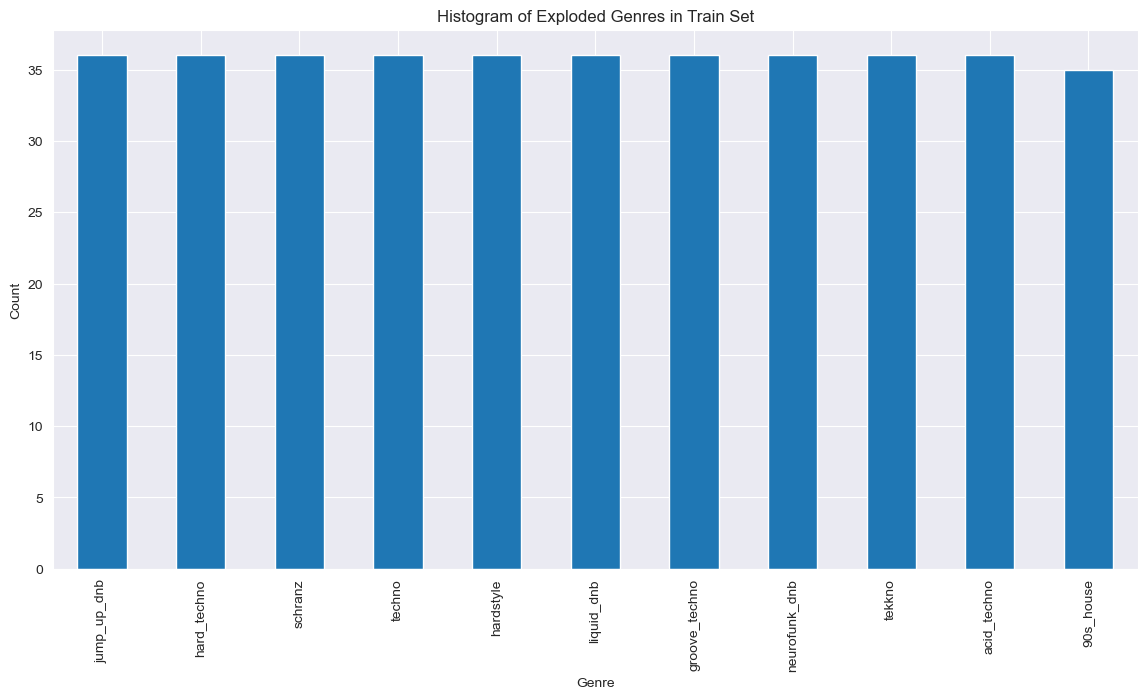

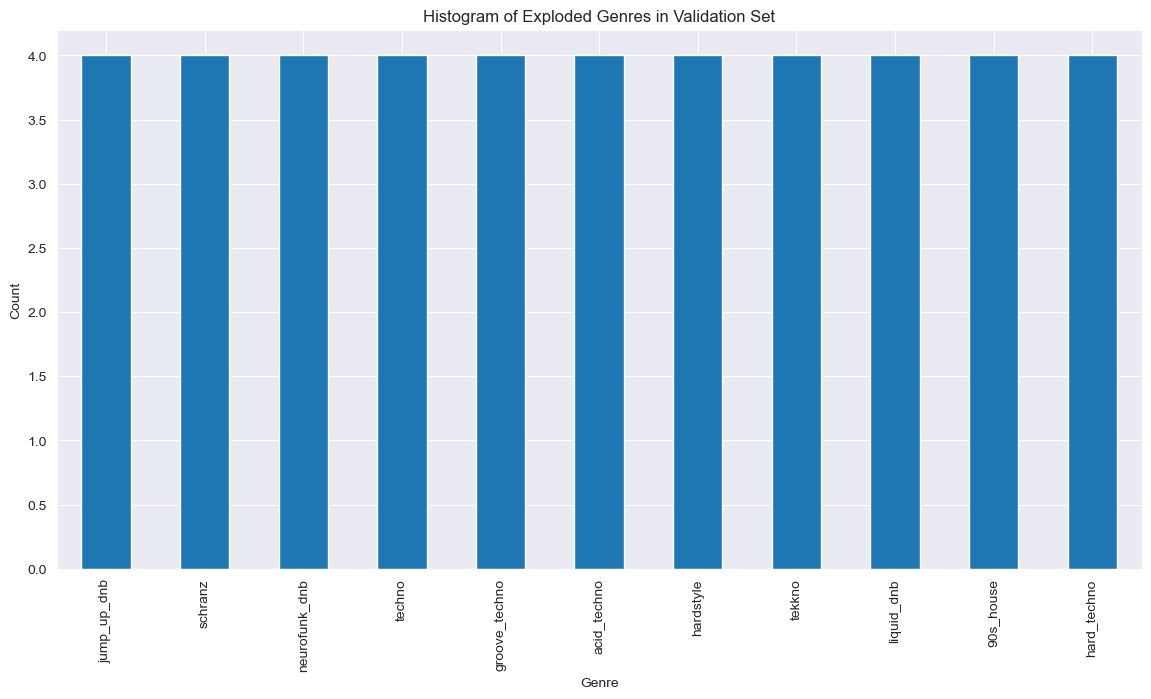

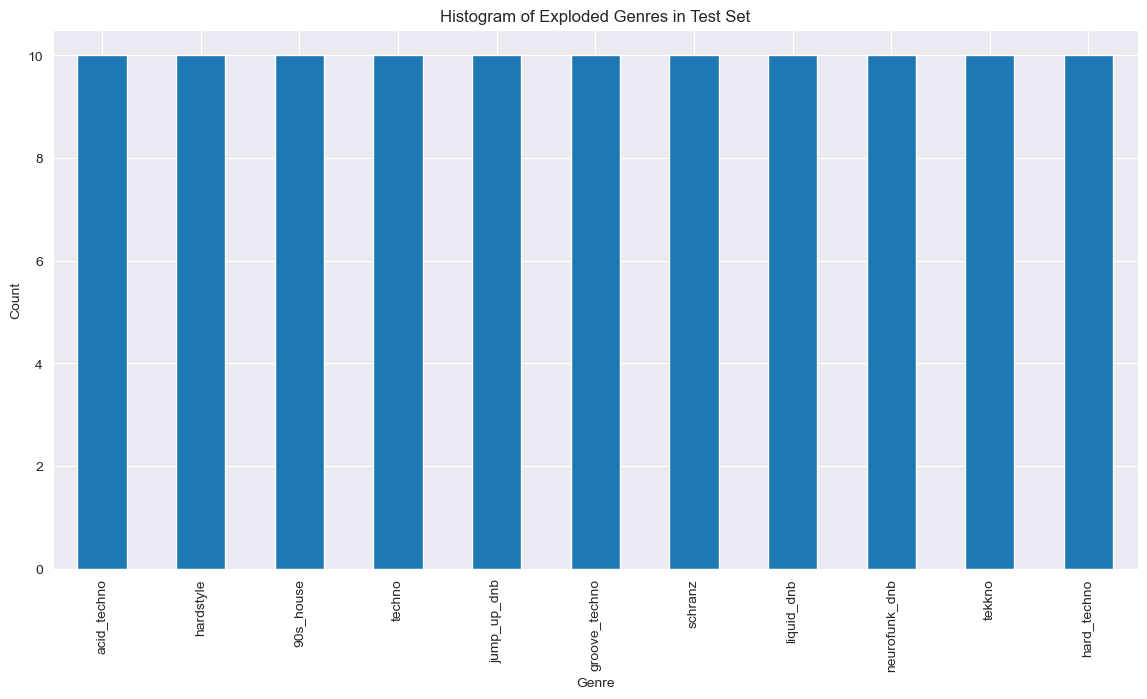

In [18]:
import matplotlib.pyplot as plt


# # Ensure the 'genres' column is a list
# train_df['genres'] = train_df['genres'].apply(eval)
# val_df['genres'] = val_df['genres'].apply(eval)
# test_df['genres'] = test_df['genres'].apply(eval)
#
# # Explode the 'genres' column in each split
# train_exploded = train_df.explode('genres')
# val_exploded = val_df.explode('genres')
# test_exploded = test_df.explode('genres')

# Plot the distribution of exploded genres in the train set
plt.figure(figsize=(14, 7))
train_df['genres'].value_counts().plot(kind='bar')
plt.title('Histogram of Exploded Genres in Train Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of exploded genres in the validation set
plt.figure(figsize=(14, 7))
val_df['genres'].value_counts().plot(kind='bar')
plt.title('Histogram of Exploded Genres in Validation Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of exploded genres in the test set
plt.figure(figsize=(14, 7))
test_df['genres'].value_counts().plot(kind='bar')
plt.title('Histogram of Exploded Genres in Test Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [19]:
test_df

,genres,spotify_id,name,artist_id,artist,danceability,energy,speechiness,valence,file_path,main_genre,main_genre_encoded
55,acid_techno,4J5YDSS5tzUzrYKM9mONgv,Multiverse,"2jvTYwyzxK1FVYGEoKfZLQ, 0bIOCVFnNDbixFxTdPjE7R","Cosmic Boys, Demon Noise",0.630,0.995,0.0420,0.3350,../mp3songs/ACID!_Best_Acid_Techno_Mix/Multive...,techno,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
230,hardstyle,4mALGoOhRMFVfphsMppSb2,Muzika - Sefa Remix,"4RbUYWWjEBb4umwqakOEd3, 0caJEGgVuXuSHhhrMCmlkI","Dr. Peacock, Sefa",0.447,0.993,0.0431,0.0389,../mp3songs/Hardcore_Techno_Hardstyle/Muzika -...,techno,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
217,hardstyle,1qt9COCAqTZbWhESNHOqer,Oh My - DJ Paul Elstak's Hardcore Mix,"2dQgOfBP52UwjegY8FwJAY, 123hDJRbi4KtCdBaaKNHW6","The Partysquad, Paul Elstak",0.618,0.772,0.0556,0.1980,../mp3songs/Hardcore_Techno_Hardstyle/Oh My - ...,techno,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
44,90s_house,5mOn7oJdEBmG43elhWGfXo,Let's Get Brutal - Brutal House,6KcNmchIyvo5TqzjfJtwYR,Nitro Deluxe,0.805,0.507,0.1090,0.5370,../mp3songs/90s_House_Classics/Let's Get Bruta...,dance,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
22,90s_house,2F5W5f8COoQKpoGqPcZ1EN,Nitelife - Armand Van Helden Retail Mix,1Tvhj4mF2pvvAT1InLbRKs,Kim English,0.793,0.556,0.0502,0.4120,../mp3songs/90s_House_Classics/Nitelife - Arma...,dance,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
524,tekkno,1GQ7bQs2li51f8h7ltunpH,MFB,"5yYwA7jmFlU01EKoLfeNpV, 2dntPqbt5DYNfJHx7Dm8wV","KomaCasper, HRDSFCK",0.809,0.711,0.3020,0.4300,../mp3songs/tekkno/MFB.mp3,techno,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
264,jump_up_dnb,5mT3qi3qyzAwSC1Drgp8lb,I Want Your Love V.I.P.,2yJbiseBZFvrCK5GueLnk7,Tsuki,0.533,0.943,0.0584,0.1460,../mp3songs/Jump-Up_Drum_and_Bass/I Want Your ...,dnb,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
106,groove_techno,5si5OPtVvV69chXMtaZkvk,Am I Drunk?,0iS9Zzud5hNvjx0wVfIVvd,Alfa Cornae,0.698,0.870,0.1490,0.4270,../mp3songs/Groove_Techno/Am I Drunk?.mp3,techno,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
343,liquid_dnb,0cMx1KW8B0r9UOKLxCj5aR,No Sunset For Soul,"2w5c2l70mYNDdSLifFyZjJ, 022EiWsch2zvty0qBUksDO","Monty, Liam Bailey",0.702,0.850,0.2660,0.1320,../mp3songs/Liquid_Drum_and_Bass/No Sunset For...,dnb,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"


In [20]:
# Save the DataFrames to CSV files
train_df.to_csv('train_df_EDM.csv', index=False)
val_df.to_csv('val_df_EDM.csv', index=False)
test_df.to_csv('test_df_EDM.csv', index=False)

print("DataFrames saved successfully.")

DataFrames saved successfully.


In [21]:

from __future__ import print_function

from random import shuffle

import numpy as np
import tensorflow.compat.v1 as tf
import tf_slim as slim

import vggish_input
import vggish_params
import vggish_slim

tf.disable_eager_execution()
flags = tf.app.flags

flags.DEFINE_integer(
    'num_batches', int(395),
    'Number of batches of examples to feed into the model. Each batch is of '
    'variable size and contains shuffled examples of each class of audio.')

flags.DEFINE_boolean(
    'train_vggish', True,
    'If True, allow VGGish parameters to change during training, thus '
    'fine-tuning VGGish. If False, VGGish parameters are fixed, thus using '
    'VGGish as a fixed feature extractor.')

flags.DEFINE_string(
    'checkpoint', 'vggish_model.ckpt',
    'Path to the VGGish checkpoint file.')

FLAGS = flags.FLAGS

_NUM_CLASSES = 11



2025-03-13 18:19:23.629128: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
import tqdm
current_index = 0
def _get_examples_batch(traindf, batch_size):
    features = []
    labels = []
    global current_index

    for _ in tqdm.tqdm(range(batch_size)):
        if current_index >= len(traindf):
            current_index = 0  # Reset index if it exceeds the dataframe length

        song_path = traindf.iloc[current_index]['file_path']
        label = np.array(traindf.iloc[current_index]['main_genre_encoded']).tolist()
        y, sr = librosa.load(song_path, sr=None)
        y_selected_seconds, _, _ = select_strongest_8_seconds(y, sr)
        examples = vggish_input.waveform_to_examples(y_selected_seconds, sr)

        for example in examples:
            features.append(example)
            labels.append(np.array(label))

        current_index += 1

    # Shuffle (example, label) pairs across all classes.
    labeled_examples = list(zip(features, labels))
    shuffle(labeled_examples)
    print("Current index: ",current_index)
    # Separate and return the features and labels.
    features = [example for (example, _) in labeled_examples]
    labels = [label for (_, label) in labeled_examples]
    return (features, labels)

In [23]:
import tqdm
def _get_examples_batch_validation(data):
    features = []
    labels = []
    for i in tqdm.tqdm(range(len(data))):
        song_path = data.iloc[i]['file_path']
        label = np.array(data.iloc[i]['main_genre_encoded']).tolist()
        y, sr = librosa.load(song_path, sr=None)
        y_selected_seconds, _, _ = select_strongest_8_seconds(y, sr)
        examples = vggish_input.waveform_to_examples(y_selected_seconds, sr)

        for example in examples:
            features.append(example)
            labels.append(np.array(label))

    # Shuffle (example, label) pairs across all classes.
    labeled_examples = list(zip(features, labels))
    shuffle(labeled_examples)
    # Separate and return the features and labels.
    features = [example for (example, _) in labeled_examples]
    labels = [label for (_, label) in labeled_examples]
    return (features, labels)

In [24]:
import tqdm
def _get_examples_batch_test(data):
    features = []
    labels = []
    file_paths = []
    genres = []
    for i in tqdm.tqdm(range(len(data))):
        song_path = data.iloc[i]['file_path']
        genre = data.iloc[i]['main_genre']
        label = np.array(data.iloc[i]['main_genre_encoded']).tolist()
        y, sr = librosa.load(song_path, sr=None)
        y_selected_seconds, _, _ = select_strongest_8_seconds(y, sr)
        examples = vggish_input.waveform_to_examples(y_selected_seconds, sr)
        if len(examples) != 8:
            print(f"Count of spectograms from this song {song_path} is different then 8. And it is of size :  ", len(examples))
        for example in examples:
            features.append(example)
            labels.append(np.array(label))
            file_paths.append(song_path)
            genres.append(genre)
    # Shuffle (example, label) pairs across all classes.
    labeled_examples = list(zip(features, labels, file_paths, genres))
    shuffle(labeled_examples)
    # Separate and return the features and labels.
    features = [example for (example, _, _, _) in labeled_examples]
    labels = [label for (_, label, _, _) in labeled_examples]
    file_paths = [file_path for (_, _, file_path, _) in labeled_examples]
    genres = [genre for (_, _, _, genre) in labeled_examples]
    return (features, labels, file_paths, genres)

In [25]:
x = _get_examples_batch(train_df,5)
print(len(x[0]))

100%|██████████| 5/5 [00:13<00:00,  2.79s/it]

Current index:  5
40


In [26]:
current_index = 0
current_index

0

In [12]:
#TODO here i need to make sure that all labels in one hot encoding are labeled correctly across all the dataframes (train valid test), they point to same class         - compute the one hot encoding first and then split, also assign index to better understanding

In [27]:
from tensorflow.compat.v1.graph_util import convert_variables_to_constants
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_losses = []
train_accuracies = []
train_f1_micros = []
val_losses = []
val_f1micro = []
def save_frozen_graph(sess, output_node_names, output_filename):
    """Freezes the current session and saves the frozen graph to a .pb file."""
    # Get the graph definition
    graph_def = sess.graph.as_graph_def()

    # Convert variables to constants
    frozen_graph_def = convert_variables_to_constants(
        sess, graph_def, output_node_names
    )

    # Save the frozen graph
    output_path = os.path.join(os.getcwd(), output_filename)
    with open(output_path, "wb") as f:
        f.write(frozen_graph_def.SerializeToString())

    print(f"Frozen model saved to: {output_path}")

# def validate(sess, features_input, labels_input, loss, validation_data):
#     """Run validation on the validation dataset."""
#     val_features, val_labels = validation_data
#     val_loss = sess.run(loss, feed_dict={features_input: val_features, labels_input: val_labels})
#     print('Validation loss: %g' % val_loss)
def validate(sess, features_input, labels_input, loss, predictions, validation_data):
    """Run validation and compute loss, accuracy, precision, recall, and F1-score."""
    val_features, val_labels = validation_data

    # Compute loss on validation data
    val_loss, val_preds_probs = sess.run(
        [loss, predictions], feed_dict={features_input: val_features, labels_input: val_labels}
    )

    # Convert probabilities to class predictions (argmax)
    val_preds_classes = np.argmax(val_preds_probs, axis=1)
    val_labels_classes = np.argmax(val_labels, axis=1)
    print("Val preds probs: ", val_preds_probs)
    print("Val preds classes: ", val_preds_classes)
    print("Val labels classes: ", val_labels_classes)
    # Compute classification metrics
    accuracy = accuracy_score(val_labels_classes, val_preds_classes)
    precision_weighted = precision_score(val_labels_classes, val_preds_classes, average='weighted', zero_division=1)
    precision_micro = precision_score(val_labels_classes, val_preds_classes, average='micro', zero_division=1)
    precision_per_class = precision_score(val_labels_classes, val_preds_classes, average=None, zero_division=1)
    recall = recall_score(val_labels_classes, val_preds_classes, average='micro', zero_division=1)
    f1 = f1_score(val_labels_classes, val_preds_classes, average='micro', zero_division=1)

    # Print validation results
    print(f'Validation - Loss: {val_loss:.4f}')
    # Print the metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Weighted Precision: {precision_weighted:.4f}')
    print(f'Micro Precision: {precision_micro:.4f}')
    print(f'Precision per Class: {precision_per_class}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    return val_loss, f1


def validate_test(sess, features_input, labels_input, loss, predictions, test_data):
    """Run validation and compute loss, accuracy, precision, recall, and F1-score."""
    val_features, val_labels, _,_ = test_data

    # Compute loss on validation data
    val_loss, val_preds_probs = sess.run(
        [loss, predictions], feed_dict={features_input: val_features, labels_input: val_labels}
    )

    # Convert probabilities to class predictions (argmax)
    val_preds_classes = np.argmax(val_preds_probs, axis=1)
    print("Val preds classes: ", val_preds_classes)
    val_labels_classes = np.argmax(val_labels, axis=1)
    print("Val labels classes: ", val_labels_classes)
    # Compute classification metrics
    accuracy = accuracy_score(val_labels_classes, val_preds_classes)
    precision_weighted = precision_score(val_labels_classes, val_preds_classes, average='weighted', zero_division=1)
    precision_micro = precision_score(val_labels_classes, val_preds_classes, average='micro', zero_division=1)
    precision_per_class = precision_score(val_labels_classes, val_preds_classes, average=None, zero_division=1)
    recall = recall_score(val_labels_classes, val_preds_classes, average='micro', zero_division=1)
    f1 = f1_score(val_labels_classes, val_preds_classes, average='micro', zero_division=1)

    # Print validation results
    print(f'Test - Loss: {val_loss:.4f}')
    # Print the metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Weighted Precision: {precision_weighted:.4f}')
    print(f'Micro Precision: {precision_micro:.4f}')

    print(f'Precision per Class: {precision_per_class}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')


def list_model_layers(graph):
    for op in graph.get_operations():
        print(f"Name: {op.name}, Type: {op.type}")
        for tensor in op.outputs:
            print(f"  Tensor: {tensor.name}, Shape: {tensor.shape}")


In [28]:
print("Loading validation data...")
validation_data = _get_examples_batch_validation(val_df)
print("Validation data loaded: ", len(validation_data[0]))

test_data = _get_examples_batch_test(test_df)
print("Test data loaded: ", len(test_data[0]))

Loading validation data...


100%|██████████| 44/44 [00:45<00:00,  1.04s/it]


Validation data loaded:  352


100%|██████████| 110/110 [02:10<00:00,  1.18s/it]

Test data loaded:  880


In [29]:
def main(_):
  with tf.Graph().as_default(), tf.Session() as sess:
    # Define VGGish.
    embeddings = vggish_slim.define_vggish_slim(training=FLAGS.train_vggish)
    # Define a shallow classification model and associated training ops on top
    # of VGGish.
    with tf.variable_scope('mymodel'):
      # Add a fully connected layer with 100 units. Add an activation function
      # to the embeddings since they are pre-activation.
      num_units = 100
      fc = slim.fully_connected(tf.nn.relu(embeddings), num_units)

      # Add a classifier layer at the end, consisting of parallel logistic
      # classifiers, one per class. This allows for multi-class tasks.
      logits = slim.fully_connected(
          fc, _NUM_CLASSES, activation_fn=None, scope='logits')
      tf.nn.softmax(logits, name='prediction')

      # Add training ops.
      with tf.variable_scope('train'):
        global_step = tf.train.create_global_step()

        # Labels are assumed to be fed as a batch multi-hot vectors, with
        # a 1 in the position of each positive class label, and 0 elsewhere.
        labels_input = tf.placeholder(
            tf.float32, shape=(None, _NUM_CLASSES), name='labels')

        # Cross-entropy label loss.
        xent = tf.nn.softmax_cross_entropy_with_logits(
            logits=logits, labels=labels_input, name='xent')
        loss = tf.reduce_mean(xent, name='loss_op')
        tf.summary.scalar('loss', loss)

        # We use the same optimizer and hyperparameters as used to train VGGish.
        optimizer = tf.train.AdamOptimizer(
            learning_rate=vggish_params.LEARNING_RATE,
            epsilon=vggish_params.ADAM_EPSILON)
        train_op = optimizer.minimize(loss, global_step=global_step)

    # Initialize all variables in the model, and then load the pre-trained
    # VGGish checkpoint.
    sess.run(tf.global_variables_initializer())
    vggish_slim.load_vggish_slim_checkpoint(sess, FLAGS.checkpoint)
    list_model_layers(sess.graph)

    # The training loop.
    features_input = sess.graph.get_tensor_by_name(
        vggish_params.INPUT_TENSOR_NAME)

    predictions = sess.graph.get_tensor_by_name("mymodel/prediction:0")

    for step in range(FLAGS.num_batches):
        print('Current index:', current_index)
        (features, labels) = _get_examples_batch(train_df, 1)
        [num_steps, loss_value, preds, _] = sess.run(
            [global_step, loss, predictions, train_op],
            feed_dict={features_input: features, labels_input: labels})
        print("predictions: ",preds)
        preds_classes = np.argmax(preds, axis=1)  # Convert probabilities to 0/1
        true_labels = np.argmax(labels, axis=1)
        print("Preds_classes: ",preds_classes)
        print("Labels: ",labels)
        # Compute accuracy
        train_accuracy = accuracy_score(true_labels, preds_classes)
        # Compute F1-Micro
        train_f1_micro = f1_score(true_labels, preds_classes, average="micro")

        print(f'Step {num_steps}: Loss = {loss_value:.4f}, Accuracy = {train_accuracy:.4f}, F1-Micro = {train_f1_micro:.4f}')
        train_losses.append(loss_value)
        train_accuracies.append(train_accuracy)
        train_f1_micros.append(train_f1_micro)

        if step % 25 == 0:  # Perform validation every 25 steps
            print("Validating...")
            val_loss, f1 = validate(sess, features_input, labels_input, loss, predictions, validation_data)
            val_losses.append(val_loss)
            val_f1micro.append(f1)

    print("Validating...")
    val_loss, f1 = validate(sess, features_input, labels_input, loss, predictions, validation_data)
    val_losses.append(val_loss)
    val_f1micro.append(f1)
    print("Validating on test data...")
    validate_test(sess, features_input, labels_input, loss, predictions, test_data)

    print("Training Done!")

    # Save the fine-tuned model
    saver = tf.train.Saver()
    saver.save(sess, 'fine_tuned_11_genres_EDM_with_val_softmax_vggish_model_batch_size_1.ckpt')
    output_node_names = ["mymodel/prediction"]  # Change if needed
#TODO PREPIS MENO MODELA
# Save the model as a frozen graph (.pb)
    save_frozen_graph(sess, output_node_names, "fine_tuned_11_genres_EDM_with_val_softmax_vggish_model_batch_size_1.pb")


In [30]:
if __name__ == '__main__':
  tf.app.run()

/Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



/Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:318: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '
W0313 19:23:24.824517 140704380009280 deprecation.py:50] From /Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1260: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

2025-03-13 19:23:25.246729: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Restoring parameters from vggish_model.ckpt


I0313 19:23:26.525969 140704380009280 saver.py:1417] Restoring parameters from vggish_model.ckpt


Name: vggish/input_features, Type: Placeholder
  Tensor: vggish/input_features:0, Shape: (None, 96, 64)
Name: vggish/Reshape/shape, Type: Const
  Tensor: vggish/Reshape/shape:0, Shape: (4,)
Name: vggish/Reshape, Type: Reshape
  Tensor: vggish/Reshape:0, Shape: (None, 96, 64, 1)
Name: vggish/conv1/weights/Initializer/truncated_normal/shape, Type: Const
  Tensor: vggish/conv1/weights/Initializer/truncated_normal/shape:0, Shape: (4,)
Name: vggish/conv1/weights/Initializer/truncated_normal/mean, Type: Const
  Tensor: vggish/conv1/weights/Initializer/truncated_normal/mean:0, Shape: ()
Name: vggish/conv1/weights/Initializer/truncated_normal/stddev, Type: Const
  Tensor: vggish/conv1/weights/Initializer/truncated_normal/stddev:0, Shape: ()
Name: vggish/conv1/weights/Initializer/truncated_normal/TruncatedNormal, Type: TruncatedNormal
  Tensor: vggish/conv1/weights/Initializer/truncated_normal/TruncatedNormal:0, Shape: (3, 3, 1, 64)
Name: vggish/conv1/weights/Initializer/truncated_normal/mul, T

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Current index:  1
predictions:  [[0.07820283 0.09037485 0.10263715 0.08169946 0.10495231 0.12587202
  0.08908745 0.08597279 0.05111106 0.05935409 0.13073613]
 [0.08265002 0.08950992 0.09978102 0.07844386 0.10319638 0.10780037
  0.08257978 0.09520267 0.05160112 0.061391   0.14784391]
 [0.08267082 0.08750895 0.09020913 0.08645966 0.0961899  0.12120587
  0.08002244 0.08687516 0.05300961 0.06436662 0.15148179]
 [0.07734263 0.08461294 0.1108273  0.0789161  0.10950747 0.12539624
  0.09694069 0.0848645  0.05276832 0.06221494 0.11660885]
 [0.08306406 0.08858909 0.0877125  0.09131416 0.09543031 0.10695539
  0.08710577 0.07853294 0.05121778 0.06654934 0.16352865]
 [0.08199771 0.08763424 0.09542677 0.07991115 0.10681619 0.11689068
  0.07952712 0.08640476 0.05122872 0.06271774 0.15144494]
 [0.07668045 0.08108366 0.10904543 0.07463962 0.10719803 0.12140704
  0.09485054 0.08545911 0.053022   0.06023494 0.13637924]
 [0.08071652 0.08245769 0.11131516 0.07282875 0.09769729 0.13168107
  0.08870587 0.091

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Current index:  2
predictions:  [[0.08258689 0.07885689 0.14483798 0.07666146 0.08878853 0.13059637
  0.08448115 0.09726226 0.05118135 0.05635201 0.10839502]
 [0.06582095 0.07668052 0.1616168  0.0920106  0.10151929 0.07575912
  0.08911645 0.11675154 0.03891868 0.06412844 0.11767754]
 [0.07369461 0.08340307 0.1497363  0.08465824 0.09984681 0.09870895
  0.0931946  0.09859819 0.04662844 0.06224971 0.10928118]
 [0.08210231 0.07455869 0.1606799  0.08305775 0.08826991 0.12711011
  0.07744435 0.09693115 0.04534445 0.04707577 0.11742552]
 [0.06010217 0.0798418  0.16337283 0.09151046 0.09494463 0.07785714
  0.08690523 0.12506807 0.04451898 0.05812152 0.11775723]
 [0.08345867 0.07949432 0.16284284 0.07803967 0.08747916 0.12621003
  0.0897605  0.09505777 0.04559314 0.04844752 0.10361637]
 [0.06484392 0.07301667 0.15178873 0.08110405 0.11191561 0.08148205
  0.08834171 0.12605877 0.0423865  0.07685836 0.10220362]
 [0.08933271 0.07582352 0.18685949 0.06192096 0.08542456 0.10110801
  0.09755928 0.077

100%|██████████| 1/1 [00:00<00:00,  1.64it/s]


Current index:  3
predictions:  [[0.08270066 0.09578288 0.16580196 0.081169   0.07961923 0.10722407
  0.11077788 0.08253466 0.04786735 0.05172098 0.09480133]
 [0.08202586 0.08493289 0.1563761  0.07333607 0.08445375 0.12107933
  0.10823125 0.08647335 0.05250335 0.0530753  0.09751279]
 [0.08147306 0.08812501 0.16628383 0.07088718 0.09043535 0.10414104
  0.11145101 0.08997224 0.04758422 0.05168632 0.0979608 ]
 [0.0839902  0.09136455 0.14799297 0.08335084 0.07624045 0.10548531
  0.10611173 0.09379643 0.05039766 0.06149868 0.09977112]
 [0.08195853 0.09188001 0.15839499 0.0769735  0.0774326  0.11744952
  0.11759009 0.080855   0.05133114 0.05353771 0.0925969 ]
 [0.08340921 0.08803657 0.15147123 0.0826555  0.08315341 0.10883892
  0.10715086 0.08379649 0.05484274 0.05162407 0.10502089]
 [0.08609852 0.08355092 0.15387501 0.07808889 0.08513821 0.12144933
  0.10722364 0.08276075 0.05302323 0.05464399 0.09414761]
 [0.08319609 0.08623146 0.15471718 0.07931971 0.07685109 0.1159917
  0.10747977 0.0848

100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


Current index:  4
predictions:  [[0.08183176 0.06947297 0.11480289 0.08250466 0.0817601  0.14010139
  0.07854967 0.10191386 0.06924494 0.05717171 0.12264603]
 [0.08421288 0.07422997 0.12839086 0.08709987 0.08447304 0.11504112
  0.08005232 0.09210611 0.06698643 0.05452115 0.13288611]
 [0.08278063 0.07472111 0.12497135 0.08417387 0.07963592 0.12605761
  0.08202571 0.09722451 0.07064521 0.0539458  0.12381827]
 [0.08065086 0.07376731 0.1221697  0.08288418 0.08680912 0.1223337
  0.084618   0.09479171 0.06341063 0.05318192 0.13538286]
 [0.08186293 0.07591847 0.13924225 0.08623897 0.08678325 0.10738669
  0.07661732 0.09052612 0.05948998 0.05530135 0.14063264]
 [0.08157334 0.07357547 0.12293411 0.09002881 0.08477201 0.11717443
  0.07572085 0.09416186 0.06451766 0.05316528 0.14237604]
 [0.08322326 0.07069249 0.12108345 0.08473436 0.07924743 0.1271794
  0.0824231  0.10191755 0.0629838  0.05508102 0.13143422]
 [0.08726744 0.07713161 0.135234   0.07755887 0.07904615 0.12888066
  0.08703867 0.09195

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


Current index:  5
predictions:  [[0.08463319 0.09507765 0.14253551 0.07425994 0.09315971 0.10547549
  0.11247423 0.08804169 0.05534609 0.06734567 0.08165081]
 [0.0817159  0.07358344 0.15702935 0.07215012 0.10298713 0.10001988
  0.10621921 0.10199197 0.0523436  0.06243537 0.08952409]
 [0.09361073 0.07456176 0.13080639 0.07071283 0.09837885 0.09442027
  0.1094987  0.11029815 0.05389249 0.07383599 0.08998382]
 [0.07404448 0.07631926 0.1507647  0.07859781 0.10132595 0.1092887
  0.09575353 0.11664458 0.05403868 0.06415608 0.07906616]
 [0.1240113  0.05579065 0.13475887 0.06506448 0.10699431 0.0871387
  0.1172244  0.10409516 0.03469032 0.0722063  0.09802557]
 [0.08243116 0.06913353 0.13885938 0.07798501 0.10583381 0.10680536
  0.09055414 0.11049654 0.05324676 0.07901464 0.08563971]
 [0.10175099 0.06714436 0.11202663 0.07975271 0.1022198  0.10502981
  0.10981619 0.09596063 0.05125324 0.06818315 0.10686242]
 [0.0931482  0.06706844 0.13222824 0.07233498 0.1109766  0.10142478
  0.10710427 0.09727

100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Current index:  6
predictions:  [[0.08854625 0.10117227 0.06638785 0.07369258 0.10287468 0.1428277
  0.04794528 0.09886362 0.05375548 0.06769013 0.15624407]
 [0.09560934 0.08055906 0.08963942 0.06495274 0.12227234 0.13864727
  0.05981636 0.10453825 0.05376411 0.07002889 0.12017207]
 [0.08175433 0.0826093  0.09197522 0.08273116 0.11752331 0.13018212
  0.06653646 0.09504347 0.05604207 0.07008878 0.12551379]
 [0.09660053 0.07108367 0.08941989 0.07780391 0.11047308 0.12327924
  0.07367343 0.1089635  0.05520495 0.07953246 0.1139653 ]
 [0.08882871 0.10404633 0.07129277 0.06448366 0.10017589 0.15037365
  0.04260466 0.10115767 0.04747315 0.06718506 0.16237833]
 [0.08477272 0.08076722 0.07704209 0.07765358 0.12642758 0.12736763
  0.06312343 0.10558325 0.05491348 0.07391916 0.12842992]
 [0.10458671 0.08558401 0.06518498 0.07269547 0.10550893 0.14502749
  0.05394617 0.08755413 0.0622103  0.06782307 0.14987871]
 [0.08511605 0.09859904 0.07884868 0.07802268 0.12317166 0.13162883
  0.05167194 0.0944

100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


Current index:  7
predictions:  [[0.08002484 0.07667976 0.14823414 0.07045196 0.07990765 0.14324032
  0.09918877 0.09339577 0.0481645  0.05895248 0.10175978]
 [0.08103131 0.07449363 0.14621341 0.07160818 0.07962652 0.14027219
  0.09979272 0.09995376 0.0458081  0.056868   0.10433219]
 [0.08053393 0.07465869 0.14874615 0.07911802 0.07216707 0.14852057
  0.09449027 0.09877592 0.05087681 0.05893916 0.09317341]
 [0.08048634 0.07449288 0.13259695 0.07841872 0.08169683 0.14245455
  0.0888084  0.10336304 0.05240159 0.06257619 0.1027045 ]
 [0.0757944  0.07720572 0.1481247  0.08227661 0.07834991 0.13910402
  0.09761702 0.10256367 0.04777296 0.05748202 0.09370907]
 [0.08192492 0.08321113 0.14386949 0.07563524 0.08777281 0.14308484
  0.09541862 0.08429785 0.05026755 0.05851536 0.09600212]
 [0.07732455 0.08158998 0.13361487 0.08190309 0.08767913 0.13872592
  0.09378471 0.09478905 0.0508862  0.05572094 0.10398169]
 [0.0768877  0.08024928 0.1454052  0.07498801 0.07946445 0.138449
  0.09809542 0.09367

100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


Current index:  8
predictions:  [[0.08288381 0.07628483 0.11742011 0.07765921 0.0875999  0.14548975
  0.0773775  0.10453039 0.05649002 0.05795447 0.11631012]
 [0.0893513  0.0699474  0.13611087 0.07442552 0.07703128 0.16433018
  0.07384994 0.10002438 0.05519151 0.05445359 0.10528395]
 [0.08004063 0.07021614 0.13463226 0.07818311 0.08346743 0.14670746
  0.07887972 0.10396276 0.05195863 0.05581473 0.11613714]
 [0.08505203 0.07164046 0.12148047 0.07543121 0.07970793 0.15284574
  0.06503288 0.12014002 0.05378308 0.0590065  0.11587957]
 [0.07981144 0.07203816 0.1193831  0.07791527 0.08084606 0.15043014
  0.07796127 0.11076485 0.05702576 0.05890429 0.11491965]
 [0.08608325 0.06941757 0.12331016 0.07557244 0.08178082 0.14429839
  0.06981258 0.1105276  0.05483622 0.05721901 0.12714192]
 [0.07719827 0.07819762 0.11717855 0.08977289 0.09071747 0.1207354
  0.09782137 0.10810894 0.05223561 0.06348657 0.10454728]
 [0.08113502 0.06456672 0.13987978 0.07290298 0.07496279 0.14659981
  0.07637709 0.1196

100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Current index:  9
predictions:  [[0.070351   0.07437477 0.12658846 0.07359333 0.09637539 0.13627948
  0.09602256 0.10178752 0.04970557 0.0592966  0.11562539]
 [0.07296657 0.08100889 0.09788907 0.08036174 0.10913812 0.13719869
  0.07750445 0.10272914 0.0563758  0.06564851 0.11917897]
 [0.08383875 0.08897068 0.08820536 0.08454205 0.11590614 0.13918085
  0.07759871 0.08706702 0.05809116 0.06287877 0.11372051]
 [0.07680727 0.0791391  0.11443849 0.08394374 0.09904645 0.13032821
  0.08743809 0.0930679  0.05615731 0.05808275 0.12155072]
 [0.08323688 0.08137806 0.11040214 0.06848016 0.1187223  0.13473772
  0.06574474 0.10342092 0.0557853  0.0602601  0.11783163]
 [0.08461387 0.08110756 0.08830503 0.07429411 0.10605724 0.14061219
  0.09062964 0.08620784 0.05559581 0.06196849 0.13060825]
 [0.08237329 0.09087012 0.09637699 0.07921741 0.11877606 0.12226788
  0.07841707 0.08322892 0.05350956 0.05805796 0.13690466]
 [0.07856212 0.07135185 0.11496094 0.06715548 0.10844548 0.1276752
  0.0991254  0.1070

100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


Current index:  10
predictions:  [[0.07939167 0.07294817 0.16045853 0.07337946 0.08381777 0.13572066
  0.09064435 0.09313001 0.05052079 0.04866996 0.11131866]
 [0.07914113 0.07739599 0.16374339 0.07559295 0.09442054 0.13398694
  0.08821324 0.09365145 0.04347806 0.04738182 0.10299455]
 [0.07900987 0.07785222 0.15890679 0.07097357 0.08532757 0.14278358
  0.09239084 0.08792879 0.04705372 0.04872349 0.10904955]
 [0.07044144 0.07323437 0.17261787 0.06970591 0.07372437 0.13603184
  0.09673027 0.09934415 0.05163696 0.04763679 0.10889602]
 [0.0775608  0.08127473 0.16891867 0.0726779  0.07819303 0.1140286
  0.09910963 0.09309153 0.04970335 0.05136099 0.11408064]
 [0.0791959  0.08451175 0.15875669 0.07139686 0.08511957 0.13020433
  0.09995774 0.08847556 0.04861732 0.05212904 0.1016352 ]
 [0.07716735 0.07926268 0.16337115 0.06701186 0.08152229 0.13996932
  0.10174099 0.08425147 0.04562074 0.04908298 0.11099911]
 [0.07566725 0.08132874 0.15829232 0.07019703 0.08682746 0.13418852
  0.09791096 0.089

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  11
predictions:  [[0.07942291 0.09431295 0.12891366 0.07782663 0.07456046 0.1166746
  0.09485284 0.0913415  0.05606884 0.06665532 0.11937024]
 [0.07920457 0.083269   0.12738052 0.07620886 0.07811467 0.1347602
  0.09985682 0.0992775  0.05650941 0.06566737 0.09975105]
 [0.07985877 0.09638672 0.10603631 0.0789074  0.09052117 0.11736296
  0.09252266 0.08936785 0.05301835 0.0631754  0.13284235]
 [0.0770497  0.09264185 0.09764843 0.08511176 0.08846416 0.14146432
  0.08435461 0.09841447 0.05634357 0.06579418 0.11271291]
 [0.07904446 0.09564499 0.09250212 0.07927581 0.10282402 0.13651854
  0.06913096 0.10615098 0.05387959 0.0675186  0.11750994]
 [0.07649806 0.08422585 0.12486039 0.07933199 0.08853684 0.12723482
  0.08928022 0.09431881 0.05226695 0.06119942 0.12224665]
 [0.08376376 0.08728123 0.09936877 0.07481609 0.10574945 0.13655171
  0.07258488 0.10575841 0.05181754 0.06208352 0.12022463]
 [0.07620381 0.08725569 0.11087352 0.08178344 0.08505762 0.1248662
  0.09274305 0.09311

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  12
predictions:  [[0.07699338 0.0926376  0.15059084 0.06767086 0.08330438 0.12326018
  0.08434259 0.11085735 0.0465675  0.06052226 0.10325313]
 [0.08119784 0.06843168 0.17917377 0.05701125 0.07743981 0.14413618
  0.0884864  0.1150296  0.04509046 0.0470976  0.09690543]
 [0.07878805 0.08110523 0.13870317 0.08410181 0.08863889 0.13474783
  0.08573901 0.1015293  0.05615021 0.05253785 0.09795868]
 [0.08839674 0.09119946 0.16004822 0.06040051 0.09555056 0.13428402
  0.08086281 0.10026798 0.04072824 0.05484244 0.09341907]
 [0.07612888 0.10088522 0.15977232 0.06780504 0.08337419 0.11943184
  0.08516005 0.11450161 0.0415742  0.06193087 0.08943582]
 [0.08175792 0.08229212 0.17688827 0.05780978 0.08541372 0.12456512
  0.07451676 0.11971862 0.04215637 0.05633337 0.09854791]
 [0.07629582 0.08923334 0.1452982  0.06364194 0.08878324 0.1332265
  0.08368993 0.11524    0.04374146 0.06368603 0.09716352]
 [0.0812471  0.07245661 0.14757356 0.06527547 0.09374174 0.13712005
  0.09209023 0.103

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  13
predictions:  [[0.08504549 0.08664109 0.1005948  0.08195669 0.11132496 0.1165992
  0.07763242 0.10625726 0.05158704 0.06954811 0.11281297]
 [0.10284357 0.08430224 0.06993907 0.07284977 0.1060982  0.13686475
  0.06789538 0.07982425 0.0575579  0.06544282 0.15638204]
 [0.09686168 0.09457645 0.07033408 0.07465797 0.10138483 0.12273184
  0.06261607 0.08310492 0.05560434 0.07255905 0.16556871]
 [0.09705307 0.08369527 0.08959052 0.08002038 0.10897814 0.11015812
  0.07251108 0.12123188 0.05059882 0.07864968 0.10751315]
 [0.07685445 0.07513867 0.09809481 0.08569296 0.10833218 0.0975863
  0.10515023 0.10839097 0.04995623 0.08739024 0.10741295]
 [0.07788973 0.07094989 0.10123003 0.07203719 0.09297296 0.10440071
  0.11968372 0.10389154 0.0498727  0.08986057 0.11721083]
 [0.08747543 0.09626965 0.07422537 0.07878309 0.10373438 0.13963306
  0.05854417 0.08851293 0.05712903 0.06621582 0.14947706]
 [0.08352371 0.08708867 0.07572374 0.08255619 0.10953834 0.13417114
  0.06615089 0.0971

100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Current index:  14
predictions:  [[0.0793063  0.0889078  0.0796324  0.06877559 0.10787295 0.1440707
  0.05218294 0.11812957 0.04898217 0.0770435  0.135096  ]
 [0.07274078 0.08253031 0.09804628 0.08400159 0.10038141 0.14179686
  0.07785702 0.0958684  0.05581422 0.06135663 0.12960646]
 [0.07429157 0.09067997 0.084512   0.07737839 0.11712182 0.13476941
  0.06213181 0.10724581 0.05303924 0.06886087 0.129969  ]
 [0.07174345 0.09559952 0.08335967 0.0959105  0.10564895 0.14244524
  0.0614804  0.09986588 0.05476666 0.07587226 0.11330741]
 [0.08342906 0.08101372 0.08669999 0.08148508 0.11555954 0.13731544
  0.07276761 0.0917203  0.05682038 0.06832158 0.12486731]
 [0.10640029 0.06592155 0.09753354 0.06334238 0.11980829 0.13249996
  0.07775004 0.09071167 0.05933161 0.06432793 0.12237281]
 [0.08171377 0.08977278 0.09345955 0.08441375 0.1158037  0.14077446
  0.06472478 0.09165835 0.05593531 0.06366939 0.11807421]
 [0.082168   0.09242794 0.09225284 0.07485881 0.12377355 0.12315214
  0.06719626 0.083

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Current index:  15
predictions:  [[0.08673854 0.07625737 0.09538692 0.08613604 0.08202477 0.14660352
  0.09915095 0.10149936 0.05120115 0.07426957 0.1007318 ]
 [0.07512727 0.07820643 0.12710963 0.07413892 0.07996085 0.12997724
  0.10321222 0.10312755 0.04771316 0.07606374 0.10536285]
 [0.07376536 0.07997154 0.1138689  0.09675872 0.0809864  0.13895734
  0.08966085 0.11029316 0.04427389 0.07854898 0.09291478]
 [0.06910145 0.0856251  0.1177623  0.08139254 0.08682587 0.12050268
  0.10183331 0.09043719 0.05122675 0.08594266 0.10935021]
 [0.08570812 0.06341623 0.11018736 0.07773886 0.0729742  0.14936778
  0.09159727 0.11106931 0.05007933 0.08215455 0.10570711]
 [0.08046978 0.08012839 0.10967841 0.08380131 0.07735428 0.14743078
  0.09799477 0.09783387 0.05161508 0.07964285 0.09405053]
 [0.06377976 0.09611481 0.11040104 0.08114731 0.08251556 0.12044682
  0.11187187 0.10223594 0.04739609 0.09168093 0.09240986]
 [0.06965755 0.07968117 0.11944976 0.09732535 0.07477715 0.14691812
  0.10203332 0.10

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  16
predictions:  [[0.07169568 0.07672714 0.13535327 0.07955585 0.09563032 0.12780692
  0.09377447 0.1070685  0.05871335 0.06276152 0.09091311]
 [0.07996671 0.08471358 0.13793595 0.06766234 0.08375008 0.14103764
  0.08974682 0.10504627 0.05149363 0.05796257 0.10068432]
 [0.07615355 0.08707567 0.11070759 0.07123248 0.10208096 0.12583722
  0.08070336 0.10581155 0.05259829 0.0627244  0.1250749 ]
 [0.07893339 0.0764664  0.14134076 0.0708743  0.09717087 0.13206288
  0.08784851 0.099122   0.05218104 0.05231404 0.11168575]
 [0.08269245 0.07666472 0.14007781 0.0723367  0.09071945 0.13916251
  0.09168612 0.09488902 0.05121737 0.05190847 0.10864536]
 [0.07261448 0.08952393 0.10321389 0.07461213 0.11215473 0.12712808
  0.06594279 0.11570659 0.05028464 0.0733331  0.11548564]
 [0.06866979 0.08153139 0.1476666  0.07158007 0.08673885 0.13532783
  0.09478307 0.10007533 0.05388159 0.05769943 0.10204594]
 [0.07645463 0.081806   0.14919394 0.08002194 0.08809129 0.12593432
  0.09267757 0.09

100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Current index:  17
predictions:  [[0.07854742 0.08229899 0.08621912 0.08867358 0.10281845 0.13297808
  0.06863201 0.10204986 0.06105416 0.0674701  0.12925817]
 [0.07711126 0.07913239 0.0965232  0.0809961  0.10720526 0.14407825
  0.07894286 0.08771361 0.06151287 0.06075775 0.12602644]
 [0.0718841  0.07898854 0.09415601 0.0837559  0.09721792 0.1457268
  0.07698704 0.10689376 0.05777801 0.06505334 0.12155852]
 [0.07419964 0.07767026 0.09591038 0.08691163 0.10431457 0.13794315
  0.07752766 0.10070094 0.05924939 0.06327523 0.1222971 ]
 [0.07520705 0.07047585 0.10791761 0.08080248 0.0910885  0.13668977
  0.0862573  0.10327271 0.05878771 0.05648237 0.13301864]
 [0.06944653 0.07293247 0.09808366 0.08722662 0.09224045 0.13725466
  0.08418185 0.10583422 0.05935451 0.05854909 0.13489603]
 [0.07673851 0.08462588 0.07444746 0.09457536 0.10069104 0.1466944
  0.06898598 0.09534883 0.06185955 0.05843553 0.13759746]
 [0.07210675 0.07448085 0.09392439 0.08287692 0.10073193 0.14378195
  0.07606866 0.1070

100%|██████████| 1/1 [00:00<00:00,  1.64it/s]


Current index:  18
predictions:  [[0.07035547 0.0823255  0.09931314 0.08315777 0.10456578 0.1384544
  0.08626923 0.0912016  0.05336365 0.05836264 0.13263084]
 [0.076548   0.08388007 0.09795309 0.08177021 0.11176882 0.1350229
  0.08616495 0.08881633 0.05436743 0.06238987 0.12131828]
 [0.07644129 0.08652009 0.09328679 0.07705304 0.11204859 0.13922244
  0.08325525 0.08437192 0.05526626 0.06049914 0.13203523]
 [0.0708818  0.08287289 0.09056533 0.08788956 0.10354312 0.13893214
  0.08508801 0.09376252 0.05830106 0.06627057 0.12189298]
 [0.08158609 0.08338673 0.09764422 0.08152979 0.11084291 0.1243815
  0.08157796 0.08833211 0.05770617 0.06330097 0.12971157]
 [0.07657082 0.09125014 0.10491107 0.08013213 0.11412793 0.13788915
  0.08053631 0.07839779 0.05393437 0.06000478 0.12224547]
 [0.07747205 0.08414464 0.0707216  0.08530549 0.10729189 0.15326387
  0.08139377 0.08325411 0.05926738 0.06412877 0.13375646]
 [0.07674946 0.08980776 0.1134615  0.08564941 0.10259219 0.12390203
  0.09476007 0.08339

100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Current index:  19
predictions:  [[0.08745359 0.07157142 0.10480522 0.08100388 0.10279099 0.13536075
  0.08827096 0.09126703 0.05918846 0.06943851 0.10884923]
 [0.07262314 0.08715558 0.09660974 0.0819055  0.11219184 0.14447321
  0.06991453 0.09646454 0.05462031 0.06693015 0.11711149]
 [0.0767057  0.09222808 0.08743364 0.07824694 0.11733781 0.13942406
  0.06328841 0.09763767 0.05468518 0.06562676 0.1273857 ]
 [0.06979953 0.09381799 0.0877405  0.08958512 0.11924314 0.13690165
  0.06725923 0.08930364 0.05616241 0.06839458 0.12179224]
 [0.08546901 0.06945173 0.08533845 0.07525195 0.1169285  0.13866544
  0.0786817  0.09596802 0.05720691 0.07047414 0.12656413]
 [0.07741025 0.09181693 0.0852518  0.07976116 0.10932415 0.1396005
  0.06674509 0.09309193 0.05597591 0.06637679 0.1346455 ]
 [0.08167347 0.08445799 0.07966278 0.08017478 0.10053349 0.14375058
  0.08230682 0.09142466 0.05471314 0.0701185  0.13118388]
 [0.07483481 0.07743515 0.10324396 0.08033504 0.10862742 0.12721121
  0.08545406 0.095

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Current index:  20
predictions:  [[0.07552445 0.07681027 0.11574696 0.08495628 0.09420449 0.13133131
  0.0898657  0.0978344  0.06897008 0.06115507 0.10360103]
 [0.09663566 0.07278328 0.10652094 0.07581702 0.08390544 0.13166994
  0.11369235 0.0910376  0.05734158 0.08174438 0.0888518 ]
 [0.08486901 0.07463088 0.10493736 0.07621378 0.08783238 0.11995438
  0.11765528 0.09296027 0.05628209 0.076358   0.10830662]
 [0.07591631 0.07078802 0.11056966 0.07981375 0.09522843 0.12619473
  0.0993005  0.09866976 0.0547035  0.07504304 0.11377219]
 [0.07739338 0.07073162 0.10594861 0.07428672 0.09394889 0.13476816
  0.0962628  0.09251093 0.05819765 0.07678787 0.11916332]
 [0.08455791 0.07559342 0.11784552 0.06871596 0.09607783 0.13782851
  0.09084433 0.09424195 0.0550503  0.06852439 0.11071992]
 [0.0818866  0.06704941 0.11298705 0.07289426 0.09274659 0.11124872
  0.12002961 0.10280982 0.04767508 0.08614107 0.10453175]
 [0.08386082 0.07287943 0.11041084 0.07250391 0.08896872 0.13044743
  0.11512015 0.09

100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Current index:  21
predictions:  [[0.06791456 0.08404166 0.14159763 0.09465598 0.07811293 0.13090897
  0.0904829  0.10829141 0.04580834 0.05028054 0.10790506]
 [0.09060153 0.09058207 0.12433778 0.09036803 0.08156154 0.12144527
  0.09122596 0.10994741 0.04525058 0.05563805 0.09904175]
 [0.07704958 0.08604961 0.13705572 0.09274611 0.07834071 0.12629724
  0.09966316 0.10354324 0.04441153 0.04924136 0.10560189]
 [0.07949506 0.08485347 0.13962066 0.09581234 0.07652858 0.13084738
  0.09302556 0.10183442 0.04940187 0.04856557 0.100015  ]
 [0.08270834 0.08428676 0.1321286  0.09221946 0.07625185 0.13608457
  0.09641758 0.10665618 0.04543596 0.05196621 0.09584441]
 [0.08015746 0.08631125 0.1330566  0.08860173 0.08691588 0.12877528
  0.09242839 0.11146612 0.04388125 0.05487846 0.09352744]
 [0.07577933 0.08733447 0.15596883 0.09134781 0.07942411 0.12669025
  0.09178524 0.10619041 0.039223   0.04404975 0.1022067 ]
 [0.07206445 0.08593316 0.15239263 0.10035332 0.07908399 0.12009719
  0.09731434 0.10

100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Current index:  22
predictions:  [[0.0771616  0.07531337 0.13631669 0.07451928 0.08970295 0.13838351
  0.09282889 0.09725566 0.05288756 0.0597385  0.10589207]
 [0.08492624 0.07985131 0.11960702 0.07515276 0.09098851 0.14231353
  0.07777326 0.11010189 0.05400031 0.06450216 0.10078304]
 [0.07764669 0.07909539 0.17038137 0.0722805  0.09499539 0.12601824
  0.08303156 0.09833205 0.04150352 0.04780247 0.10891289]
 [0.08592096 0.06911834 0.15702434 0.07303327 0.08239052 0.14250207
  0.08158954 0.10822974 0.04845044 0.0545234  0.09721737]
 [0.08560821 0.06588788 0.1331796  0.08049314 0.08901792 0.13197874
  0.07335681 0.11293513 0.05386605 0.05650416 0.11717242]
 [0.0869626  0.07142079 0.13865489 0.07641949 0.08696336 0.13751668
  0.08257383 0.09769322 0.05509861 0.05815273 0.1085439 ]
 [0.08170371 0.06929906 0.13107188 0.08128946 0.08632396 0.13662577
  0.07764053 0.10700705 0.0546532  0.05678583 0.11759958]
 [0.08527803 0.06825377 0.13994847 0.07691552 0.08481991 0.14168802
  0.08228891 0.10

100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


Current index:  23
predictions:  [[0.07395388 0.0817498  0.07871605 0.08293775 0.09587356 0.1459256
  0.09379909 0.08807463 0.05704136 0.06821718 0.13371113]
 [0.08050448 0.07389099 0.08518745 0.07493867 0.09697214 0.13756357
  0.10118736 0.09348916 0.04968416 0.07238904 0.13419308]
 [0.07710156 0.06805508 0.11007036 0.06190058 0.09717181 0.1459805
  0.09134897 0.11040099 0.04932153 0.0624955  0.12615304]
 [0.07590403 0.08728896 0.09066205 0.08369498 0.09944117 0.12577271
  0.08448266 0.08817917 0.05426439 0.06743198 0.14287785]
 [0.07405725 0.08173168 0.09905634 0.07959894 0.09423818 0.13737747
  0.08725154 0.09578186 0.05076581 0.0658169  0.13432397]
 [0.08073518 0.08920357 0.07526416 0.08507312 0.09727821 0.13464457
  0.08655079 0.08396533 0.05249676 0.06977759 0.1450107 ]
 [0.07455855 0.08203892 0.08070073 0.07988821 0.10384858 0.12834188
  0.09537021 0.09488956 0.04832412 0.06810147 0.14393775]
 [0.07495569 0.07843573 0.0954833  0.07332481 0.0989741  0.14813013
  0.08672076 0.0926

100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


Current index:  24
predictions:  [[0.08361259 0.0703593  0.1411945  0.06738527 0.09612091 0.15433207
  0.08135038 0.1047923  0.04775674 0.05076528 0.10233071]
 [0.07766034 0.06739597 0.13292512 0.06373856 0.09509988 0.13816625
  0.10106208 0.10317979 0.04724275 0.05431411 0.11921511]
 [0.07932432 0.06961262 0.12446066 0.07021837 0.09833667 0.14139976
  0.09636251 0.10136371 0.05236797 0.05781397 0.10873932]
 [0.07547701 0.07172804 0.14108334 0.06468357 0.08697712 0.15235254
  0.09665447 0.1012978  0.04756681 0.05206965 0.11010965]
 [0.07937454 0.06773538 0.1504421  0.06337359 0.09202323 0.15247536
  0.09371925 0.09895965 0.04253001 0.05154226 0.10782455]
 [0.0805302  0.06549071 0.14158948 0.06124087 0.09007742 0.13890867
  0.10380884 0.10787214 0.04835796 0.05693823 0.10518545]
 [0.07044274 0.0665377  0.14244184 0.07274971 0.09774493 0.13183829
  0.0969092  0.10965884 0.04830118 0.05233293 0.11104254]
 [0.08460618 0.0659178  0.16015881 0.06565885 0.08241045 0.15101874
  0.08819243 0.10

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  25
predictions:  [[0.07689854 0.0790831  0.08972989 0.08662643 0.09654853 0.14136732
  0.07091209 0.09696916 0.05891031 0.06040882 0.14254586]
 [0.06944904 0.07770906 0.0951857  0.08776054 0.10373743 0.14342819
  0.07655817 0.10283735 0.05631101 0.06297722 0.12404633]
 [0.07618415 0.07733499 0.0814891  0.08715932 0.10718174 0.1533132
  0.06542004 0.10486636 0.05821402 0.06331281 0.1255243 ]
 [0.0691069  0.07298461 0.10399374 0.08622724 0.09297694 0.14706512
  0.08135603 0.1068312  0.05873473 0.06262732 0.11809618]
 [0.07762919 0.07953337 0.10255549 0.08277185 0.09827603 0.13581797
  0.08274881 0.09366517 0.05626737 0.05640174 0.13433307]
 [0.07101808 0.07429173 0.10249776 0.08170651 0.09796325 0.14297806
  0.0878764  0.09435769 0.05523305 0.0608604  0.1312169 ]
 [0.07415511 0.07784482 0.08778387 0.08622672 0.10508256 0.14103702
  0.06891013 0.0985266  0.05761729 0.06127452 0.14154135]
 [0.07720642 0.07979071 0.09189343 0.08262094 0.10199457 0.14726946
  0.07280711 0.098

100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Current index:  26
predictions:  [[0.0868596  0.08022991 0.16786894 0.08944776 0.07701905 0.10107964
  0.08896287 0.10013543 0.05748142 0.04755399 0.1033613 ]
 [0.07743748 0.07483321 0.14133137 0.08980995 0.08426786 0.13668068
  0.09077527 0.1029763  0.05080918 0.05407862 0.09700012]
 [0.07524475 0.06874779 0.14577416 0.08135805 0.07570203 0.1405437
  0.09738924 0.11023968 0.05199882 0.05466175 0.09833993]
 [0.07599752 0.07622571 0.13344847 0.08662768 0.08559184 0.1339706
  0.09396611 0.09967912 0.05041951 0.05825899 0.10581451]
 [0.07722849 0.06874265 0.14168122 0.08455672 0.07717458 0.14795943
  0.09353915 0.10829372 0.05222512 0.05431652 0.09428231]
 [0.07879396 0.07037275 0.1476078  0.08248693 0.07832143 0.1392095
  0.09626359 0.10446234 0.04918425 0.05374053 0.099557  ]
 [0.0786981  0.06906804 0.14904295 0.08764267 0.07572016 0.13108194
  0.09071274 0.1109789  0.05577686 0.05116504 0.1001126 ]
 [0.07817625 0.07546086 0.16765466 0.08105589 0.07805786 0.12147465
  0.09843379 0.10132

100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


Current index:  27
predictions:  [[0.08040228 0.06896894 0.16268398 0.07417212 0.0835085  0.14118917
  0.08164938 0.10057237 0.05342818 0.05022215 0.10320296]
 [0.08301366 0.0672607  0.14535727 0.08154844 0.08135011 0.14448133
  0.08378643 0.10043473 0.05927973 0.05721819 0.09626947]
 [0.08648299 0.06253037 0.15514362 0.07835275 0.07773094 0.13991313
  0.07120179 0.10740221 0.06439718 0.05467237 0.10217263]
 [0.07385569 0.0733076  0.12686574 0.08908053 0.09083256 0.11282372
  0.071399   0.11327528 0.06573262 0.05667587 0.12615138]
 [0.07900057 0.06868385 0.14982167 0.07984655 0.08685423 0.13732864
  0.08093377 0.09956595 0.05410438 0.05054256 0.1133178 ]
 [0.0752433  0.0729635  0.13712864 0.07709755 0.08939847 0.14258485
  0.08642647 0.09702933 0.04882514 0.05304603 0.12025671]
 [0.07490697 0.06965834 0.1332441  0.0861665  0.08661205 0.13224146
  0.07753842 0.1094531  0.05879723 0.05230317 0.1190787 ]
 [0.07597625 0.06517897 0.13153544 0.08022628 0.08597112 0.12689254
  0.07854239 0.11

100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


Current index:  28
predictions:  [[0.0718417  0.06090226 0.17061776 0.06836468 0.07793441 0.14258291
  0.08731125 0.11741453 0.04293223 0.04621615 0.11388202]
 [0.0751956  0.06662522 0.16391747 0.07473448 0.08285574 0.13531412
  0.08989974 0.10552166 0.04924078 0.04829282 0.1084023 ]
 [0.0764607  0.06533082 0.16135478 0.06548683 0.08614285 0.14090481
  0.09511484 0.10601609 0.0438303  0.04757185 0.11178616]
 [0.07633709 0.06312384 0.17194515 0.06314579 0.08584459 0.13018098
  0.0942414  0.10603426 0.04548912 0.04335443 0.12030341]
 [0.07648667 0.06322324 0.16585658 0.06780044 0.08245933 0.14373259
  0.09299632 0.1114886  0.04160048 0.0470483  0.10730746]
 [0.07076542 0.06018819 0.167896   0.07039312 0.08397094 0.1382777
  0.08468283 0.11823441 0.04274511 0.04370835 0.11913807]
 [0.07809094 0.06307453 0.1680638  0.06475652 0.08467441 0.13581546
  0.09617105 0.10443804 0.04662203 0.04557716 0.11271608]
 [0.07621235 0.06542829 0.16335651 0.06638565 0.08354247 0.13797392
  0.0959275  0.107

100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


Current index:  29
predictions:  [[0.07412077 0.06238664 0.13625272 0.07241758 0.0923721  0.13508856
  0.08217692 0.11903569 0.04905062 0.05464891 0.12244948]
 [0.07566085 0.06370674 0.13570751 0.07466029 0.08906912 0.13202366
  0.08243568 0.11557949 0.05071088 0.05418672 0.12625907]
 [0.069574   0.0669162  0.1358186  0.07439479 0.09463544 0.1334758
  0.08974434 0.11672638 0.04900614 0.05140782 0.11830052]
 [0.07486735 0.06383074 0.13171478 0.07535724 0.09241067 0.13188764
  0.07910971 0.11664728 0.04865014 0.05368911 0.13183531]
 [0.07037959 0.06369437 0.14574848 0.07429616 0.08654947 0.12941986
  0.08396113 0.12262279 0.04897844 0.05151751 0.12283225]
 [0.0745877  0.06095551 0.12722746 0.07552516 0.08221442 0.13622406
  0.08440402 0.1236325  0.05059957 0.05796872 0.12666088]
 [0.07238921 0.06743199 0.12275901 0.07663622 0.09074882 0.13173065
  0.08887527 0.11554427 0.05243083 0.05593714 0.12551667]
 [0.07699189 0.06106137 0.13244596 0.08091162 0.08233133 0.14270988
  0.07994433 0.118

100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


Current index:  30
predictions:  [[0.07769881 0.06891224 0.14210922 0.07289751 0.07751444 0.14570296
  0.09470689 0.10417579 0.05542571 0.05479328 0.1060632 ]
 [0.07450565 0.06862378 0.13847703 0.08052205 0.07713161 0.14370313
  0.088353   0.11211959 0.05597245 0.05538322 0.10520846]
 [0.07564253 0.06756924 0.13033281 0.07854518 0.0779275  0.14736211
  0.08628254 0.11099032 0.0538649  0.05676494 0.11471789]
 [0.07701518 0.07160252 0.13707358 0.08376189 0.08178084 0.14297706
  0.08555347 0.10451683 0.05493984 0.05748764 0.10329121]
 [0.07681129 0.07006409 0.12120175 0.08613729 0.07610296 0.14517981
  0.08202721 0.11211598 0.05713101 0.05895608 0.11427258]
 [0.0731824  0.06348837 0.13515022 0.07451022 0.078306   0.14499018
  0.08861449 0.1126868  0.05480155 0.05681101 0.11745877]
 [0.077318   0.06593461 0.1425133  0.08307486 0.07829688 0.1362054
  0.08061009 0.11522837 0.05885184 0.05534245 0.10662422]
 [0.07493646 0.06517502 0.13760811 0.07047005 0.07961376 0.15588658
  0.09415019 0.110

100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


Current index:  31
predictions:  [[0.08683015 0.0747462  0.11773507 0.06768914 0.09892944 0.12880273
  0.10749079 0.08754697 0.05259609 0.06731994 0.11031347]
 [0.09558255 0.05501468 0.12646808 0.08659914 0.1076292  0.10207954
  0.09264918 0.13110125 0.04918386 0.07401722 0.07967532]
 [0.0928985  0.06683607 0.11825293 0.08457533 0.09164838 0.13350964
  0.10611929 0.07930776 0.05885747 0.070462   0.09753267]
 [0.08176705 0.06670262 0.11453088 0.0790427  0.09623801 0.14189893
  0.09377417 0.08671212 0.0544185  0.07396344 0.1109515 ]
 [0.07944691 0.06812671 0.12430716 0.09828495 0.09606855 0.12290023
  0.08174163 0.12034056 0.051889   0.07449447 0.08239968]
 [0.07503604 0.05757891 0.1086445  0.07156831 0.10953515 0.13976309
  0.08404663 0.11760671 0.05092903 0.07312899 0.11216253]
 [0.07600017 0.06951621 0.10656137 0.08662277 0.10247894 0.12872247
  0.08993983 0.09001482 0.06092431 0.07587617 0.113343  ]
 [0.07837041 0.06650834 0.12181511 0.0722804  0.10633258 0.14273466
  0.07941142 0.11

100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


Current index:  32
predictions:  [[0.07343922 0.07011164 0.1260406  0.08467011 0.06759621 0.1624293
  0.07513633 0.10529055 0.06081901 0.06324267 0.11122441]
 [0.08085107 0.07423549 0.12993528 0.07595036 0.06612478 0.15896827
  0.0901769  0.09651106 0.05663068 0.06003762 0.11057845]
 [0.0806888  0.06936055 0.14941706 0.07632315 0.06121992 0.15099189
  0.08292182 0.10994802 0.05667511 0.05685002 0.1056037 ]
 [0.0830536  0.07060292 0.13168573 0.07234239 0.06711771 0.17151241
  0.08597341 0.09703948 0.0553345  0.05790428 0.1074336 ]
 [0.08346429 0.07364109 0.12730196 0.0852616  0.07134205 0.14201783
  0.07345049 0.10611714 0.06790507 0.05891202 0.11058649]
 [0.07222559 0.0698166  0.11431886 0.08578042 0.07348721 0.15835428
  0.07596244 0.1097543  0.06292986 0.0624974  0.11487317]
 [0.07399122 0.06929163 0.11964167 0.08602559 0.07174312 0.15970671
  0.07352378 0.10880253 0.06420907 0.05852194 0.11454272]
 [0.07455157 0.06579471 0.13457409 0.0810736  0.06633124 0.14963813
  0.07559124 0.123

100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


Current index:  33
predictions:  [[0.07076178 0.07325715 0.15311529 0.0842628  0.08003689 0.15035497
  0.08940122 0.10213291 0.04666322 0.05151092 0.09850294]
 [0.07055546 0.07309625 0.16802122 0.07769938 0.08819394 0.12851134
  0.08744799 0.09981772 0.05061748 0.04637903 0.10966023]
 [0.06930261 0.07651594 0.22762185 0.07474621 0.07833233 0.10952884
  0.0844753  0.10051443 0.04708386 0.03818677 0.09369183]
 [0.06296615 0.07605096 0.20919982 0.07277662 0.07742218 0.13124019
  0.08152127 0.0998686  0.04408221 0.04169523 0.10317685]
 [0.07292109 0.08155371 0.1574476  0.08099446 0.0864116  0.12691458
  0.0967278  0.09438459 0.05661677 0.04897209 0.09705569]
 [0.06608481 0.07296657 0.17431729 0.0786794  0.08576602 0.13161972
  0.08622234 0.10749931 0.04879845 0.04614188 0.10190429]
 [0.06802946 0.07278506 0.1797751  0.07176951 0.08189664 0.12907131
  0.0852209  0.10866178 0.05120879 0.04499144 0.10659002]
 [0.07148011 0.07936558 0.17372347 0.08387923 0.08225662 0.12744156
  0.08727114 0.09

100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


Current index:  34
predictions:  [[0.07363537 0.06981719 0.12858862 0.07843617 0.09639847 0.13443537
  0.10063132 0.10360934 0.05150878 0.06127936 0.10166008]
 [0.07013662 0.07893943 0.12509932 0.07907996 0.09827419 0.12427305
  0.09932739 0.099659   0.05211888 0.05746407 0.11562817]
 [0.08257932 0.07499992 0.13968062 0.07975094 0.09665247 0.12899673
  0.08841671 0.10229187 0.049599   0.05536565 0.10166676]
 [0.07171579 0.08142298 0.1249241  0.08145981 0.10190073 0.12533407
  0.0956731  0.09717479 0.04965129 0.0561091  0.11463424]
 [0.07838316 0.08564245 0.09759881 0.07433499 0.10494305 0.12778643
  0.0701201  0.1076651  0.04911577 0.0736376  0.1307725 ]
 [0.07043774 0.07129528 0.12941694 0.0709936  0.10446857 0.12024352
  0.0968698  0.09743484 0.04831016 0.05952895 0.13100061]
 [0.07980203 0.07942966 0.1142929  0.07756484 0.10730854 0.13993105
  0.09084458 0.08812711 0.05498969 0.05779145 0.1099181 ]
 [0.06323978 0.08137798 0.13003822 0.08254548 0.1002063  0.12075847
  0.09647998 0.09

100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Current index:  35
predictions:  [[0.0840393  0.06960721 0.11361532 0.09083384 0.08824419 0.13272515
  0.0650579  0.10968605 0.07113066 0.05739234 0.11766805]
 [0.07669796 0.0648572  0.09991272 0.08893563 0.10862022 0.11949734
  0.06595439 0.13007566 0.06003118 0.06470769 0.12070992]
 [0.07685515 0.06926409 0.10351183 0.09542163 0.09356557 0.12879336
  0.06801506 0.1152046  0.0673339  0.0606149  0.12141988]
 [0.06952538 0.0712676  0.10377134 0.087287   0.09643987 0.13818079
  0.07910067 0.10786151 0.0603966  0.06327488 0.12289435]
 [0.0751475  0.0671529  0.1083697  0.08416568 0.1041523  0.11996278
  0.07905074 0.11667838 0.05889167 0.06376678 0.12266154]
 [0.07312166 0.07653441 0.09440577 0.07489061 0.10008624 0.14313342
  0.09829647 0.08957217 0.0535511  0.06663414 0.1297741 ]
 [0.07679558 0.0654688  0.09581602 0.0892832  0.11101887 0.11034293
  0.07029212 0.12712292 0.06009509 0.06218533 0.13157918]
 [0.08277321 0.07197634 0.1176265  0.09291659 0.08657844 0.12804185
  0.07177225 0.10

100%|██████████| 1/1 [00:01<00:00,  1.07s/it]


Current index:  36
predictions:  [[0.07757306 0.06619837 0.20525536 0.06081399 0.0706407  0.14687203
  0.08464333 0.10972337 0.04724576 0.03790408 0.0931299 ]
 [0.07474805 0.07499518 0.2058384  0.06218969 0.07395612 0.13388118
  0.08583971 0.10390835 0.05070072 0.04103738 0.09290536]
 [0.08028135 0.06346617 0.21167599 0.06176613 0.07119381 0.14037746
  0.08025962 0.10985675 0.0516117  0.03550348 0.09400755]
 [0.07357648 0.0718482  0.20035262 0.06178219 0.07280955 0.13261394
  0.0901048  0.10117043 0.05263258 0.04278821 0.10032089]
 [0.08372067 0.0656946  0.19289914 0.06429766 0.07085659 0.1264121
  0.08368777 0.1080699  0.05736813 0.03889719 0.10809616]
 [0.07189364 0.06645556 0.20775896 0.05870216 0.0660905  0.14360657
  0.09215506 0.10578712 0.05493397 0.03856324 0.09405324]
 [0.08403473 0.06112726 0.19986974 0.05974383 0.06570589 0.1327964
  0.08869358 0.10284445 0.06383612 0.04075907 0.10058896]
 [0.08279333 0.06668719 0.1953557  0.06083614 0.07668147 0.13962206
  0.08784249 0.1010

100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Current index:  37
predictions:  [[0.07202246 0.06245075 0.11986761 0.08257509 0.07928765 0.14237247
  0.0779361  0.12088276 0.05631766 0.05877917 0.12750833]
 [0.07678805 0.06611516 0.128863   0.0802191  0.08259634 0.13301231
  0.08202121 0.1075807  0.06332055 0.05888771 0.12059586]
 [0.07604747 0.06749094 0.12551366 0.08158838 0.08193109 0.14359298
  0.08386233 0.10521215 0.05937115 0.05978978 0.11560004]
 [0.07675946 0.07070394 0.12677926 0.08441583 0.08140307 0.14577317
  0.07735509 0.10196473 0.06541962 0.0551509  0.1142749 ]
 [0.07482298 0.06930258 0.12631193 0.08530249 0.08081956 0.13719088
  0.08215854 0.10897282 0.05813715 0.05775743 0.11922374]
 [0.07799438 0.06579493 0.12111109 0.08362148 0.07741117 0.14045218
  0.07712926 0.11687433 0.06126259 0.05745205 0.12089655]
 [0.0787018  0.07169083 0.11411683 0.09182046 0.08163425 0.1356791
  0.06816005 0.1106765  0.07191515 0.05635133 0.11925374]
 [0.07908287 0.0769366  0.11818764 0.09415254 0.07664566 0.146878
  0.07694988 0.10164

100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Current index:  38
predictions:  [[0.07411394 0.0668921  0.19775309 0.0713172  0.07620616 0.12061569
  0.08126374 0.10951064 0.05862395 0.04053714 0.10316642]
 [0.06999384 0.0688595  0.18973534 0.0716261  0.08570974 0.12198567
  0.08207159 0.10800175 0.05573919 0.04322691 0.10305046]
 [0.07564831 0.06901418 0.21400993 0.07246725 0.07920082 0.11071113
  0.0826443  0.09844827 0.05466378 0.03867016 0.10452196]
 [0.07350809 0.06862342 0.20461237 0.07056904 0.07764524 0.11553389
  0.08676426 0.10488227 0.0542677  0.04009669 0.10349692]
 [0.07355749 0.06831455 0.21060452 0.0692378  0.07898732 0.11512933
  0.08211724 0.10459372 0.05512307 0.03882175 0.10351317]
 [0.07075925 0.06919906 0.20821807 0.06800618 0.08582848 0.11113048
  0.08257733 0.1047437  0.05484299 0.04011134 0.10458314]
 [0.07174892 0.07107612 0.20175861 0.06945389 0.07632391 0.11192113
  0.09130696 0.11050237 0.05122367 0.0406805  0.104004  ]
 [0.07608697 0.07041364 0.18602917 0.06872053 0.07324079 0.12698731
  0.09328026 0.10

100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Current index:  39
predictions:  [[0.08020611 0.06598186 0.18531829 0.07966042 0.07568914 0.1172773
  0.06696717 0.10873855 0.05805133 0.04814215 0.11396769]
 [0.07118858 0.06184757 0.16883403 0.07710946 0.07625721 0.12718591
  0.06961086 0.12236796 0.06012158 0.04785698 0.11761978]
 [0.08386996 0.06737619 0.18711206 0.07836899 0.07750011 0.11295849
  0.06677642 0.10526868 0.05899946 0.04788728 0.11388243]
 [0.08323134 0.07053702 0.19875447 0.07791516 0.07677384 0.11046356
  0.0675147  0.09985001 0.05775678 0.04353189 0.11367133]
 [0.07811114 0.06632303 0.16243514 0.08627348 0.07338715 0.12313478
  0.06169872 0.11587012 0.06389501 0.0512464  0.11762486]
 [0.07751412 0.0686881  0.17628811 0.08696509 0.07604225 0.11167373
  0.06290381 0.11333574 0.06206687 0.04747532 0.11704693]
 [0.08401515 0.0732758  0.19407447 0.0812858  0.07435349 0.11471625
  0.06370676 0.09809764 0.0575178  0.04234894 0.11660787]
 [0.08266707 0.07366935 0.17725265 0.0844351  0.08026531 0.11140705
  0.0653771  0.100

100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Current index:  40
predictions:  [[0.07987015 0.07205762 0.13522844 0.07324725 0.08091514 0.13913904
  0.08931832 0.10256239 0.06092128 0.05657574 0.11016463]
 [0.08045156 0.07445677 0.1395895  0.07319813 0.08146565 0.1364214
  0.09805648 0.09779165 0.06400723 0.05721867 0.09734289]
 [0.08273756 0.0710661  0.13931334 0.07444089 0.07923977 0.14330894
  0.09574596 0.09560473 0.0668456  0.05542314 0.09627392]
 [0.08435262 0.06915189 0.14642426 0.07014295 0.08021791 0.1386574
  0.09473514 0.09318489 0.06507811 0.05251739 0.10553741]
 [0.07922342 0.06814149 0.13746028 0.0694118  0.08291268 0.14859663
  0.09067042 0.09934743 0.06096194 0.05519839 0.10807557]
 [0.08199405 0.07041329 0.14713264 0.07232469 0.08034464 0.13977045
  0.10189484 0.09543717 0.0612727  0.05416793 0.09524757]
 [0.08019992 0.0712864  0.14731264 0.07295612 0.07785098 0.14183971
  0.09618159 0.1017679  0.0564575  0.05527876 0.09886851]
 [0.08026326 0.07226618 0.14213319 0.07423402 0.08145962 0.1377257
  0.09492814 0.09598

100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


Current index:  41
predictions:  [[0.07498489 0.07351197 0.23040812 0.06802627 0.08252049 0.10177315
  0.07912307 0.09570696 0.05527349 0.0399533  0.09871826]
 [0.07516403 0.06870236 0.21341647 0.06907413 0.0803726  0.10615876
  0.08175385 0.10685133 0.05163439 0.04140643 0.10546561]
 [0.06653303 0.06698712 0.23647653 0.06629299 0.08307084 0.10511158
  0.0824068  0.11002179 0.04713515 0.03716229 0.09880196]
 [0.06950805 0.0744828  0.21513776 0.07257677 0.0836317  0.10165249
  0.08673177 0.10430741 0.05083666 0.04364107 0.0974935 ]
 [0.07438926 0.07220355 0.21236882 0.06576066 0.08069362 0.11081768
  0.09469055 0.10322765 0.04989621 0.04023561 0.09571633]
 [0.07839289 0.07083433 0.21753347 0.07286037 0.07650381 0.1109449
  0.07671725 0.10537935 0.05512381 0.0400771  0.09563279]
 [0.0649159  0.06701029 0.25777462 0.06983095 0.07937445 0.095317
  0.07683355 0.10832306 0.04479037 0.03355197 0.10227784]
 [0.07462538 0.07075168 0.22422686 0.06879348 0.07519213 0.10977946
  0.08090349 0.10576

100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Current index:  42
predictions:  [[0.08580352 0.07334886 0.12218531 0.08619168 0.09127665 0.09558064
  0.11039648 0.09462304 0.05380638 0.08195575 0.10483161]
 [0.08643054 0.06029953 0.10225338 0.0834545  0.09880567 0.12001833
  0.09681118 0.10276835 0.06278437 0.07914676 0.10722733]
 [0.08746397 0.0846874  0.11530431 0.06983379 0.09803302 0.14515115
  0.10736924 0.08009262 0.04373884 0.06255317 0.10577258]
 [0.07372357 0.08161134 0.18283261 0.06656055 0.08321747 0.13117012
  0.10377414 0.08941328 0.0401706  0.04573191 0.10179428]
 [0.07595479 0.09391565 0.15520132 0.07226375 0.08938985 0.1291369
  0.10281118 0.09360582 0.03022902 0.05333483 0.10415687]
 [0.07449459 0.09128419 0.14844528 0.07901822 0.08513757 0.11867294
  0.10700292 0.09429011 0.04070127 0.05909645 0.10185634]
 [0.08391373 0.06636557 0.0920087  0.07929737 0.109428   0.12177907
  0.08760031 0.10163905 0.06179117 0.08113005 0.11504699]
 [0.07603948 0.0918572  0.11238253 0.07281104 0.10771346 0.13348472
  0.0995061  0.096

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  43
predictions:  [[0.08515681 0.07345759 0.13827473 0.06890219 0.0875223  0.13503063
  0.10218567 0.08824423 0.04592904 0.06299809 0.11229877]
 [0.07890483 0.07383122 0.15751979 0.06867143 0.07951657 0.14290006
  0.094424   0.09377605 0.04713276 0.05564252 0.10768075]
 [0.08671859 0.07190406 0.15252817 0.06875965 0.0854853  0.12508272
  0.09804907 0.09036428 0.04570007 0.06227731 0.11313086]
 [0.07754964 0.07284711 0.14093678 0.06733786 0.08135742 0.13383399
  0.10682748 0.09199058 0.04743771 0.06650387 0.11337756]
 [0.08657717 0.06537122 0.14464214 0.06476285 0.09699548 0.13162512
  0.08840867 0.10511976 0.03991624 0.06528883 0.11129237]
 [0.08446942 0.07416797 0.14946121 0.06722416 0.08166766 0.13527165
  0.09866831 0.09131961 0.04659273 0.06158796 0.1095692 ]
 [0.08277775 0.0631042  0.14518254 0.05974082 0.09271675 0.12598366
  0.09359854 0.11176387 0.04098921 0.06931761 0.11482503]
 [0.08819184 0.06036984 0.14745556 0.06032334 0.0966934  0.11802305
  0.0906009  0.10

100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Current index:  44
predictions:  [[0.06432533 0.06474771 0.2465728  0.07200509 0.08213763 0.08160692
  0.07675938 0.1189964  0.03793424 0.03813872 0.11677574]
 [0.06462161 0.06514423 0.23436894 0.07008416 0.07617143 0.11285994
  0.0772685  0.11831544 0.03811769 0.03939972 0.10364827]
 [0.070294   0.06104269 0.21864536 0.06706336 0.07567362 0.11642568
  0.07827653 0.12159707 0.0413647  0.04049971 0.10911736]
 [0.06824879 0.06316253 0.21296538 0.07070088 0.07883555 0.09215194
  0.08250993 0.1305324  0.04210778 0.04530124 0.11348346]
 [0.0673518  0.06084093 0.219792   0.06768159 0.08552779 0.09627741
  0.07670422 0.12893333 0.04514281 0.04329052 0.10845754]
 [0.07178177 0.07513531 0.21541357 0.07967503 0.08128    0.09700197
  0.08438281 0.10789867 0.04152165 0.03947085 0.10643832]
 [0.0735056  0.0634447  0.22529243 0.06688682 0.0821576  0.09366927
  0.08008984 0.1227102  0.0432973  0.04095805 0.10798837]
 [0.07534927 0.06515822 0.21626107 0.07323221 0.07568721 0.090887
  0.08031216 0.1192

100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Current index:  45
predictions:  [[0.0683971  0.06895319 0.21466017 0.07384512 0.09034685 0.06589577
  0.08430466 0.14245108 0.05458887 0.05448708 0.08207018]
 [0.07194485 0.08071201 0.20090975 0.07591522 0.07885765 0.08463274
  0.0971135  0.10742211 0.05665252 0.05605962 0.08978006]
 [0.07944524 0.06717999 0.20238516 0.07624163 0.0813322  0.09331371
  0.08406657 0.12286761 0.05434558 0.04901379 0.08980837]
 [0.067474   0.06475764 0.20995136 0.07750246 0.08153686 0.07361803
  0.0869405  0.13148324 0.05527931 0.04750123 0.10395543]
 [0.07592747 0.07529064 0.17993212 0.07641184 0.08027058 0.10975041
  0.07513128 0.11898474 0.05829735 0.05601475 0.09398882]
 [0.06953686 0.07519662 0.19068694 0.07081167 0.08996673 0.09710029
  0.1022692  0.10890019 0.05290619 0.05326044 0.08936465]
 [0.06919482 0.07506286 0.22006087 0.07067651 0.07358311 0.11290076
  0.08344609 0.11821348 0.04818606 0.04167947 0.08699596]
 [0.07108381 0.07141983 0.18713637 0.06775869 0.07388601 0.10954323
  0.10371003 0.10

100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Current index:  46
predictions:  [[0.09212486 0.07214818 0.23803368 0.06136366 0.08738223 0.09197937
  0.072063   0.0778968  0.04450263 0.03570019 0.12680528]
 [0.09411707 0.07953484 0.21753046 0.06961196 0.08266038 0.09738155
  0.06864478 0.07665572 0.04872104 0.03651844 0.12862372]
 [0.08649605 0.07698395 0.21077867 0.07035097 0.08370451 0.10395594
  0.07251005 0.08878223 0.05070477 0.04225985 0.11347304]
 [0.08537749 0.07986277 0.21077359 0.07160874 0.08524802 0.09913518
  0.07852067 0.08259885 0.05060048 0.03988465 0.11638963]
 [0.09425016 0.08007409 0.19862714 0.07526966 0.08404878 0.10011256
  0.07328421 0.08160696 0.053121   0.04232899 0.11727642]
 [0.08850256 0.08136022 0.21322173 0.07516774 0.08161878 0.10065412
  0.07104538 0.07994102 0.05071217 0.03723558 0.12054069]
 [0.0880484  0.07741955 0.2278331  0.06463604 0.08698792 0.09340039
  0.07220817 0.08102349 0.04386401 0.03633232 0.12824667]
 [0.08148827 0.07852563 0.19649483 0.07970545 0.08270636 0.10269877
  0.08111946 0.09

100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Current index:  47
predictions:  [[0.07561519 0.07891733 0.11938936 0.08612188 0.08542788 0.14908665
  0.09408007 0.09580516 0.05621499 0.05819387 0.10114753]
 [0.08297829 0.07707828 0.12785254 0.07256515 0.08750146 0.13606171
  0.09677058 0.0902025  0.05971995 0.05685961 0.11240994]
 [0.07565591 0.07391936 0.1045275  0.07886863 0.09596983 0.14997
  0.08821431 0.1004243  0.05477995 0.06330059 0.11436959]
 [0.07497954 0.07352234 0.09621639 0.08202854 0.09409246 0.15846536
  0.08619489 0.10462627 0.05542212 0.06685641 0.10759575]
 [0.08288837 0.08360193 0.09626266 0.08511228 0.09240252 0.13927548
  0.08312726 0.09842646 0.05591108 0.06290355 0.12008841]
 [0.07216925 0.08245886 0.10646744 0.08570509 0.09462874 0.14901716
  0.08797704 0.09721189 0.0574991  0.06513218 0.10173333]
 [0.06774224 0.08652833 0.10423196 0.08608507 0.08681075 0.15010768
  0.08836891 0.09550916 0.04984824 0.06228836 0.12247932]
 [0.0778074  0.08265292 0.09301236 0.09367134 0.08999672 0.13826129
  0.07960714 0.09739

100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


Current index:  48
predictions:  [[0.06396507 0.06021772 0.24538325 0.06848495 0.07089018 0.09109312
  0.08640499 0.13080086 0.03482255 0.0411993  0.10673796]
 [0.06864847 0.06801247 0.22319087 0.07276621 0.07593363 0.08965214
  0.08517004 0.12013667 0.04040217 0.04572339 0.11036402]
 [0.07320544 0.06859092 0.22040819 0.06790184 0.07801262 0.11267015
  0.08706014 0.11661223 0.03533481 0.04083193 0.09937172]
 [0.0681567  0.06853064 0.22959232 0.06733908 0.07066033 0.09673719
  0.09205505 0.11784982 0.03735025 0.04634064 0.10538786]
 [0.06680467 0.06436554 0.24091774 0.06901584 0.06738246 0.09436487
  0.08516865 0.12343239 0.03973934 0.04290166 0.10590672]
 [0.06729299 0.06711189 0.23910518 0.06291395 0.07263057 0.10809735
  0.09326702 0.11055451 0.03591622 0.0417932  0.10131714]
 [0.06810956 0.07136247 0.23226956 0.07200132 0.07362927 0.09615689
  0.09207207 0.11114382 0.03822568 0.0433436  0.10168582]
 [0.0749369  0.07093728 0.22220385 0.07222997 0.07819861 0.09358732
  0.09074508 0.10

100%|██████████| 1/1 [00:00<00:00,  1.00it/s]


Current index:  49
predictions:  [[0.09562658 0.06941438 0.08277608 0.07835766 0.09885973 0.15240958
  0.08646733 0.09581593 0.05954415 0.0716904  0.10903832]
 [0.09821781 0.06447874 0.0858992  0.06906467 0.10290973 0.14392354
  0.09678678 0.09635145 0.06105239 0.07574722 0.10556849]
 [0.08139924 0.07886107 0.10743745 0.08495314 0.09831277 0.11597417
  0.11424223 0.08761012 0.05418951 0.06745807 0.10956222]
 [0.07597224 0.077588   0.11406749 0.081612   0.10324988 0.09635605
  0.12247992 0.09974822 0.04564869 0.07494851 0.10832895]
 [0.0859336  0.06283128 0.09796583 0.06525777 0.09553303 0.14611366
  0.10552111 0.1089636  0.05333017 0.07055192 0.10799797]
 [0.09870305 0.06302865 0.09585109 0.06971329 0.09277871 0.14887635
  0.09341292 0.09859746 0.06278296 0.07303538 0.10322023]
 [0.0773783  0.08174219 0.11860693 0.07631997 0.09122954 0.12587434
  0.11026295 0.0937956  0.05157518 0.06816663 0.10504841]
 [0.08107138 0.08840939 0.15889367 0.07689803 0.08755663 0.10308049
  0.11526422 0.08

100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


Current index:  50
predictions:  [[0.09770277 0.07528831 0.11195567 0.06768981 0.12360053 0.10205295
  0.09779319 0.10014112 0.04983931 0.07523233 0.09870391]
 [0.08224953 0.07326993 0.10498869 0.07227695 0.12045702 0.13097322
  0.08579338 0.09499004 0.05294903 0.08088454 0.10116771]
 [0.07937402 0.08285609 0.14476816 0.07720409 0.09418528 0.10220056
  0.1159614  0.10761447 0.05232198 0.06058843 0.08292558]
 [0.08284955 0.07619022 0.09061209 0.08251118 0.1288086  0.13535833
  0.07100032 0.10478077 0.05709525 0.0778378  0.09295588]
 [0.09305628 0.05742903 0.10428369 0.07583381 0.12028036 0.13432148
  0.08233465 0.11714949 0.05656182 0.07914323 0.07960607]
 [0.07841456 0.07822132 0.0962271  0.08377377 0.143193   0.12458215
  0.07440463 0.10364836 0.05388651 0.07943403 0.08421466]
 [0.07624179 0.07671802 0.12157802 0.08443514 0.11765482 0.0932223
  0.09643587 0.11007822 0.05444069 0.06966721 0.09952793]
 [0.07576225 0.09171148 0.13890833 0.06859107 0.11723233 0.10503773
  0.10733996 0.103

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


Current index:  51
predictions:  [[0.06438144 0.08265839 0.15674986 0.08119268 0.08211484 0.11251866
  0.11597504 0.10333643 0.05202309 0.05686345 0.0921861 ]
 [0.07547124 0.08458649 0.12820722 0.08012618 0.09309718 0.12241353
  0.10008368 0.09938819 0.0555134  0.06298351 0.09812933]
 [0.0703887  0.08185128 0.16523015 0.07976684 0.0917273  0.10612457
  0.10573629 0.106963   0.04974966 0.05513531 0.08732686]
 [0.06784283 0.08313765 0.14364634 0.08660413 0.08510652 0.11039583
  0.11355951 0.10081073 0.05147732 0.0557291  0.10168996]
 [0.06530982 0.08275891 0.1531102  0.08255207 0.08618397 0.11966497
  0.10478368 0.10840507 0.04998099 0.0562636  0.09098664]
 [0.06518959 0.08871762 0.15369916 0.08447916 0.09483447 0.10239455
  0.1069778  0.10355274 0.04983748 0.0527618  0.09755555]
 [0.07296208 0.08194033 0.13435018 0.07095446 0.10019224 0.11686046
  0.10047083 0.10757864 0.05045436 0.06386136 0.10037498]
 [0.06896274 0.08020427 0.14999446 0.08032858 0.09672777 0.10918941
  0.10691207 0.11

100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Current index:  52
predictions:  [[0.059227   0.05886284 0.33613503 0.05380643 0.07195558 0.083204
  0.07801757 0.10991061 0.02978199 0.02540683 0.09369222]
 [0.05870745 0.05065858 0.33388963 0.05378174 0.0629482  0.09431914
  0.07268561 0.12214885 0.03023857 0.02507689 0.09554534]
 [0.06723477 0.06060502 0.31003875 0.05270122 0.07047939 0.08877109
  0.08377128 0.1058106  0.03394409 0.02915285 0.09749087]
 [0.0609926  0.06845905 0.3136249  0.05843402 0.05863177 0.08143154
  0.08647612 0.10648577 0.03660975 0.03034127 0.09851342]
 [0.05984053 0.05715362 0.3279752  0.0538029  0.06407133 0.10583552
  0.07741126 0.11165933 0.03263167 0.02554139 0.08407741]
 [0.06491674 0.08527077 0.23285718 0.06447476 0.06434007 0.09790888
  0.11599819 0.09523442 0.04725919 0.04334698 0.08839281]
 [0.06662293 0.05817375 0.30250528 0.05111576 0.06469744 0.09931286
  0.08211888 0.10524613 0.03676171 0.02811881 0.10532648]
 [0.0598969  0.05527858 0.34066343 0.05420389 0.06636715 0.0887797
  0.0760646  0.10826

100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Current index:  53
predictions:  [[0.0908713  0.08423261 0.15332675 0.07938781 0.08544369 0.11560103
  0.07995273 0.08772882 0.06488685 0.0524301  0.1061384 ]
 [0.07822951 0.06275374 0.19007163 0.07611369 0.05692069 0.1297126
  0.06516925 0.1287392  0.06677312 0.04797189 0.09754463]
 [0.07990719 0.06510018 0.16441089 0.07804295 0.07465829 0.13046075
  0.06487785 0.11881918 0.06174772 0.04919109 0.11278392]
 [0.07589626 0.07316339 0.18546255 0.08059426 0.06468657 0.11225045
  0.07452986 0.11591043 0.065724   0.04823475 0.10354748]
 [0.07541238 0.06948095 0.14762504 0.09021123 0.06134245 0.12958771
  0.06610356 0.1318468  0.07448296 0.05552984 0.09837706]
 [0.08451166 0.07012117 0.18440257 0.07446712 0.06535313 0.12269883
  0.07648711 0.11044332 0.06643485 0.04882754 0.09625254]
 [0.07640474 0.07635082 0.17249526 0.08216538 0.08049631 0.11820097
  0.0789428  0.10390441 0.06070514 0.05091405 0.09942017]
 [0.08048927 0.06241692 0.18668559 0.06968338 0.06655551 0.1257437
  0.07935371 0.1224

100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Current index:  54
predictions:  [[0.09114649 0.07288653 0.17253934 0.06047716 0.08264503 0.12302392
  0.09078924 0.10517838 0.03961066 0.0581474  0.10355598]
 [0.09871009 0.06748239 0.10861214 0.07239208 0.09879415 0.13482367
  0.09511562 0.09193535 0.05399127 0.07001576 0.1081275 ]
 [0.09708531 0.08449715 0.07530595 0.07652841 0.08263807 0.14249653
  0.08691519 0.08856713 0.05832743 0.07633125 0.1313077 ]
 [0.06992585 0.07719384 0.10497453 0.08577091 0.0987486  0.13795051
  0.08502999 0.10471366 0.0539667  0.06125529 0.12047014]
 [0.08442794 0.08085881 0.1638174  0.06658075 0.08598078 0.12538984
  0.10339483 0.08655397 0.0460535  0.05391111 0.10303099]
 [0.09200523 0.08181423 0.09662502 0.08100592 0.0835218  0.15254791
  0.08536179 0.10945871 0.05194163 0.07419652 0.09152124]
 [0.08368445 0.07857277 0.09004107 0.07707052 0.0966718  0.15171419
  0.08533973 0.0917385  0.06135314 0.06672075 0.11709306]
 [0.08967335 0.07854991 0.07259261 0.07295212 0.08705284 0.1634325
  0.09164777 0.081

100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


Current index:  55
predictions:  [[0.07598843 0.07754962 0.1401156  0.10364238 0.08706979 0.08223936
  0.09480021 0.11235305 0.06254787 0.07375901 0.08993465]
 [0.08084509 0.08460522 0.18685204 0.0811357  0.08400693 0.11711996
  0.08024126 0.09330667 0.04892856 0.05528801 0.08767049]
 [0.08161547 0.07719305 0.18023041 0.07513811 0.07233097 0.07701255
  0.08399491 0.13352142 0.04979984 0.07689425 0.09226901]
 [0.08477981 0.08064763 0.17358482 0.09196824 0.06976663 0.06760243
  0.09271673 0.11295268 0.05652468 0.06799884 0.10145751]
 [0.07878073 0.07399687 0.13736165 0.09746896 0.09130272 0.10996081
  0.0858202  0.1036935  0.05324175 0.0639689  0.10440392]
 [0.07052705 0.0691901  0.13629383 0.08094525 0.08733325 0.14371482
  0.07980348 0.11443209 0.04938604 0.06570019 0.10267389]
 [0.08834863 0.07809057 0.1368751  0.09901876 0.09010469 0.10733289
  0.07903795 0.11486833 0.04754623 0.06038872 0.09838808]
 [0.07886465 0.07624166 0.18444991 0.08085015 0.08126794 0.10615293
  0.08824704 0.10

100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


Current index:  56
predictions:  [[0.07221554 0.07486038 0.12781695 0.07639135 0.09887543 0.13108578
  0.08973245 0.10613725 0.0578783  0.06909936 0.09590734]
 [0.08401899 0.07722154 0.10896086 0.07623944 0.10552531 0.11645931
  0.11704482 0.08642342 0.05007883 0.07279125 0.10523614]
 [0.08237431 0.07264916 0.104598   0.07449131 0.09737351 0.15070413
  0.08757078 0.09682237 0.05876681 0.07231923 0.10233026]
 [0.08467679 0.0868739  0.12249564 0.09069361 0.10294449 0.10262684
  0.09551245 0.0884702  0.05752266 0.05878971 0.1093936 ]
 [0.08902107 0.06627497 0.12240369 0.06295329 0.09998287 0.14016777
  0.08967177 0.10978036 0.05460378 0.06562226 0.09951819]
 [0.0785091  0.08517335 0.09344376 0.07123259 0.10472781 0.16280715
  0.05769527 0.10085928 0.05014187 0.07900292 0.11640689]
 [0.07841272 0.07953732 0.11413678 0.07771815 0.10528496 0.11601019
  0.09740296 0.09650899 0.05338255 0.06525706 0.1163484 ]
 [0.07694103 0.07667395 0.14013961 0.07478321 0.10355486 0.10668656
  0.09100724 0.10

100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


Current index:  57
predictions:  [[0.07898029 0.07786894 0.11814067 0.078468   0.0972331  0.12931627
  0.10316665 0.09921871 0.05264802 0.06850167 0.09645781]
 [0.07846112 0.07848864 0.12563592 0.07143006 0.09148585 0.13458708
  0.11162066 0.09626517 0.05086599 0.06784867 0.09331077]
 [0.0824209  0.0798295  0.15770924 0.06761382 0.09252673 0.11944255
  0.10695854 0.09460358 0.04532328 0.05915541 0.09441633]
 [0.07664533 0.08122256 0.18374167 0.06599819 0.08391713 0.12078949
  0.09467062 0.09688098 0.04915646 0.05255027 0.09442731]
 [0.07542527 0.07496319 0.1349059  0.07516213 0.08870657 0.12863845
  0.10982946 0.10849342 0.05215427 0.06267633 0.08904512]
 [0.07554264 0.08022572 0.13823353 0.08206926 0.09320162 0.12096517
  0.10877095 0.0886325  0.05299851 0.06419799 0.09516213]
 [0.07576283 0.07890193 0.14644359 0.07513423 0.09045645 0.12031326
  0.10757861 0.10380325 0.05125719 0.06410642 0.08624236]
 [0.07722732 0.06931992 0.13087001 0.06575517 0.10163933 0.1087343
  0.10509115 0.112

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Current index:  58
predictions:  [[0.07320906 0.07307604 0.11776563 0.08152288 0.10731772 0.10024912
  0.11530266 0.11937352 0.03827409 0.08197127 0.09193795]
 [0.09292121 0.08532728 0.15718104 0.08472959 0.11984441 0.07891218
  0.08616532 0.08771096 0.05185391 0.06052301 0.09483095]
 [0.08644716 0.08801714 0.16379492 0.09151182 0.10108777 0.07677238
  0.07948045 0.09232692 0.05791451 0.06140698 0.10123987]
 [0.08139802 0.09190759 0.10370544 0.09752073 0.10020717 0.07820209
  0.09833223 0.10820746 0.0593703  0.07211824 0.10903066]
 [0.0792667  0.08378541 0.17142227 0.08663378 0.09811954 0.08498507
  0.10138868 0.09141295 0.04922832 0.05639283 0.09736446]
 [0.08946193 0.08549622 0.15305647 0.09630145 0.09245263 0.07799598
  0.08654283 0.09366944 0.06299196 0.05656691 0.1054642 ]
 [0.0888454  0.08601507 0.15586078 0.09232748 0.10605676 0.07688904
  0.09175617 0.09131441 0.05534566 0.05773691 0.09785231]
 [0.08006909 0.08282968 0.16686666 0.07319058 0.09989545 0.12063456
  0.10381428 0.09

100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Current index:  59
predictions:  [[0.07901239 0.08341961 0.12974347 0.08260842 0.07236631 0.129774
  0.09512403 0.11046497 0.05172057 0.07037961 0.09538667]
 [0.08215103 0.0786398  0.13270527 0.08370034 0.07427911 0.13712811
  0.09059744 0.09846782 0.06014408 0.06069107 0.10149601]
 [0.07942656 0.08041399 0.11277656 0.09169353 0.08093943 0.13784845
  0.08424821 0.10463616 0.05934338 0.0640071  0.10466665]
 [0.08090301 0.07728547 0.12430465 0.08677396 0.07917532 0.13622239
  0.0869232  0.10525867 0.05362002 0.06569893 0.10383433]
 [0.08156766 0.07034435 0.14587004 0.06972706 0.08399601 0.13175945
  0.09960979 0.09872214 0.04950865 0.06203645 0.10685837]
 [0.08023082 0.07908711 0.13270615 0.08086255 0.08218164 0.12363622
  0.09857395 0.09910996 0.05436248 0.06662626 0.10262296]
 [0.07674949 0.08001447 0.11429255 0.08891535 0.08376006 0.13204025
  0.08311409 0.11121693 0.05384715 0.07050559 0.10554418]
 [0.08049294 0.06754065 0.11872688 0.07313909 0.09048932 0.11225492
  0.10420767 0.1067

100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Current index:  60
predictions:  [[0.05742674 0.069398   0.26270595 0.06297893 0.07925121 0.12454348
  0.07781657 0.11907973 0.02270228 0.03938677 0.08471035]
 [0.04826216 0.06406123 0.30437866 0.06264487 0.07229172 0.12155753
  0.06643267 0.12866957 0.01506661 0.03114276 0.08549213]
 [0.04625574 0.06754401 0.33399224 0.06257816 0.06542432 0.11502697
  0.06608795 0.11222648 0.01925585 0.02832411 0.08328416]
 [0.05311207 0.07497208 0.26131272 0.07780839 0.06798152 0.13548134
  0.06742017 0.12562102 0.02331498 0.03589229 0.0770834 ]
 [0.04487247 0.06284026 0.3337703  0.06017508 0.06292347 0.12444926
  0.06145253 0.13085933 0.01375377 0.02773622 0.07716735]
 [0.05963853 0.08584084 0.2179282  0.08328869 0.07629781 0.12573187
  0.08967532 0.10216743 0.02365456 0.0418653  0.09391133]
 [0.05283841 0.07566177 0.262103   0.0768105  0.06536665 0.13586107
  0.07276036 0.11428341 0.02501868 0.03631974 0.08297628]
 [0.06210981 0.09245865 0.19099711 0.08702107 0.07971772 0.12134626
  0.09571077 0.10

100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Current index:  61
predictions:  [[0.08594261 0.0824502  0.20266537 0.07203916 0.07943281 0.09178433
  0.09812006 0.08842021 0.04828315 0.0488943  0.10196774]
 [0.07746974 0.09169478 0.17701855 0.09208204 0.08059362 0.08261477
  0.09773721 0.0974179  0.04781649 0.05131048 0.10424445]
 [0.07921749 0.08712206 0.1872419  0.08822909 0.08381436 0.0881151
  0.0924584  0.08834904 0.05336044 0.04843048 0.10366161]
 [0.08084236 0.09184362 0.17747582 0.08233496 0.07890065 0.08437811
  0.1020081  0.08504242 0.04989414 0.05445292 0.11282688]
 [0.08580656 0.09657175 0.13927183 0.10260592 0.08321023 0.08706512
  0.08618088 0.09333866 0.06481896 0.05493486 0.1061951 ]
 [0.07549329 0.08465536 0.19788145 0.08960119 0.08024107 0.08352607
  0.0848547  0.09405407 0.0506863  0.04716316 0.11184334]
 [0.07941028 0.08688807 0.1919844  0.06956434 0.06210748 0.09513755
  0.10894443 0.08576716 0.06001174 0.0501951  0.1099895 ]
 [0.08169441 0.09754391 0.1427552  0.0971393  0.08802164 0.09150094
  0.09880846 0.087

100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Current index:  62
predictions:  [[0.07316283 0.09163625 0.16444801 0.07307663 0.09976647 0.10490371
  0.10646979 0.08685828 0.0447424  0.05598747 0.09894808]
 [0.0769745  0.07830649 0.10230335 0.0790031  0.10235497 0.12131123
  0.10919791 0.08419323 0.05031743 0.07823083 0.11780694]
 [0.08548129 0.07334638 0.10615893 0.08357444 0.1016781  0.11820006
  0.10905435 0.08366382 0.06120119 0.07800054 0.09964087]
 [0.07503547 0.07412682 0.18378511 0.06332435 0.09296305 0.113111
  0.09958147 0.09771132 0.04469479 0.06319746 0.09246913]
 [0.07707921 0.08488339 0.10519402 0.07813516 0.11549061 0.11799413
  0.09660102 0.08409914 0.05176388 0.06953043 0.11922897]
 [0.0877417  0.07207929 0.09156881 0.06814958 0.11649438 0.14098139
  0.08558422 0.09170448 0.0567652  0.07857533 0.11035561]
 [0.08248097 0.08143257 0.09314395 0.07477552 0.09598611 0.11919044
  0.11622104 0.07920551 0.04777614 0.07325738 0.13653031]
 [0.06984041 0.07575873 0.12160823 0.07084905 0.10655802 0.124257
  0.10103352 0.095795

100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Current index:  63
predictions:  [[0.06902751 0.08368083 0.09988917 0.08200096 0.09744747 0.1289403
  0.10370086 0.09036855 0.05755889 0.07474331 0.11264211]
 [0.07833728 0.06414823 0.1072301  0.07142271 0.08354709 0.12704927
  0.1255057  0.10432851 0.05332201 0.08279749 0.10231165]
 [0.08203768 0.06583777 0.10129497 0.07378268 0.09232163 0.12323608
  0.12188818 0.09059731 0.04789197 0.08652677 0.11458495]
 [0.07800545 0.08202838 0.1130714  0.0769615  0.08867488 0.11720784
  0.11650679 0.09555874 0.04614822 0.08000431 0.1058324 ]
 [0.08414742 0.07717437 0.10240629 0.07034195 0.08823504 0.11307314
  0.13341191 0.09763675 0.04068309 0.09192145 0.10096868]
 [0.08251907 0.07161722 0.10772718 0.0668384  0.08189379 0.1286749
  0.12612201 0.10349534 0.04171794 0.08609023 0.10330392]
 [0.07426459 0.07840057 0.11877653 0.07837783 0.0900749  0.12141712
  0.11490794 0.09449036 0.05072526 0.07415579 0.10440909]
 [0.07968662 0.07334615 0.10961148 0.07129981 0.09766281 0.13092212
  0.11101983 0.0875

100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


Current index:  64
predictions:  [[0.07080767 0.07778386 0.243099   0.06513944 0.07555505 0.09141821
  0.09558501 0.09829637 0.04675106 0.03940197 0.09616216]
 [0.07558588 0.07966013 0.22325602 0.06660522 0.07806471 0.09046027
  0.0878072  0.09905142 0.04683885 0.04439018 0.10828017]
 [0.07332653 0.08643585 0.199365   0.08133773 0.07591956 0.09817958
  0.09195802 0.08972307 0.05717205 0.04739373 0.09918888]
 [0.07082051 0.08285149 0.21854454 0.07152477 0.07482926 0.10126588
  0.09282398 0.09894327 0.05068715 0.04437738 0.09333181]
 [0.07423666 0.07920835 0.2212638  0.06927434 0.07776786 0.09482589
  0.08996904 0.09975308 0.05525574 0.04409339 0.09435174]
 [0.06964555 0.08320297 0.24287367 0.07343813 0.08168131 0.08278608
  0.07932295 0.09252119 0.05314849 0.04041159 0.10096804]
 [0.07557129 0.07985803 0.20194757 0.07162185 0.07625597 0.10242096
  0.11593866 0.08933204 0.04895995 0.05191499 0.08617873]
 [0.07528905 0.07822552 0.21601248 0.07224057 0.08361679 0.09254917
  0.08508046 0.09

100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


Current index:  65
predictions:  [[0.10258045 0.06795945 0.10527062 0.0633859  0.10974251 0.13298571
  0.10783964 0.0761782  0.05106783 0.0683962  0.11459342]
 [0.07649743 0.07966802 0.15019129 0.08858752 0.09766599 0.1189402
  0.08057293 0.11984821 0.05121087 0.06117637 0.07564113]
 [0.07540588 0.08213775 0.17421536 0.08936956 0.09117576 0.116887
  0.07679405 0.10994505 0.05005794 0.05766807 0.07634363]
 [0.07655784 0.07929871 0.14129972 0.10409889 0.0875653  0.10236991
  0.07426749 0.12916112 0.05274354 0.06878991 0.08384752]
 [0.07594393 0.07304945 0.12924556 0.07532346 0.11920776 0.11516163
  0.09618258 0.10636649 0.04750727 0.0685223  0.09348964]
 [0.09318998 0.0786169  0.09455924 0.08104726 0.13038889 0.0965538
  0.09618866 0.09441297 0.04751233 0.0714444  0.11608566]
 [0.06905457 0.07735876 0.14550526 0.08965324 0.11111627 0.11364614
  0.08679234 0.11033625 0.05072853 0.06455215 0.08125645]
 [0.08490164 0.07839771 0.11242783 0.07802971 0.12477123 0.12078852
  0.09484625 0.090793

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Current index:  66
predictions:  [[0.09481657 0.0862299  0.08245701 0.08539203 0.10495168 0.09228757
  0.1087567  0.0834298  0.03895623 0.07626943 0.14645305]
 [0.08947281 0.07881775 0.11115471 0.07721236 0.11187986 0.09363576
  0.11815796 0.08935736 0.03532885 0.07495367 0.12002893]
 [0.10082566 0.07765557 0.10264327 0.07733015 0.11414114 0.10022958
  0.1152366  0.06776734 0.04620489 0.07840081 0.11956499]
 [0.07957765 0.08792831 0.09820605 0.09103715 0.10107341 0.09355735
  0.12153784 0.08482332 0.04749027 0.07133713 0.1234314 ]
 [0.09356902 0.07611445 0.1088842  0.078301   0.09519771 0.09560506
  0.12147701 0.089109   0.03789854 0.07384634 0.12999779]
 [0.09094664 0.07993107 0.08437467 0.07472245 0.10782754 0.09938488
  0.11352202 0.09021877 0.04273107 0.08363706 0.13270383]
 [0.08244443 0.07632264 0.08749264 0.08523291 0.10738084 0.10734516
  0.1158721  0.09949932 0.05031369 0.08114818 0.10694805]
 [0.08258927 0.07516935 0.13926068 0.0741314  0.10057202 0.09367015
  0.12306748 0.09

100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


Current index:  67
predictions:  [[0.07760055 0.0900873  0.16857852 0.07924686 0.0760968  0.09525079
  0.09045362 0.10213523 0.06234132 0.05233869 0.10587031]
 [0.07577159 0.08831394 0.15453267 0.08875786 0.07669084 0.09631454
  0.08690474 0.10856465 0.06457984 0.05322148 0.10634794]
 [0.08070379 0.08487855 0.13553923 0.08211872 0.0710654  0.1141554
  0.09127067 0.10404264 0.06565586 0.05800588 0.11256379]
 [0.08011792 0.1084176  0.17277806 0.0665611  0.07119614 0.10323587
  0.110707   0.08322425 0.04948572 0.06218345 0.09209299]
 [0.07350841 0.09284259 0.18224125 0.07478253 0.06229835 0.09350453
  0.1105781  0.09351872 0.05640867 0.05928778 0.10102911]
 [0.0657608  0.10364776 0.13567497 0.07061227 0.06979644 0.11795184
  0.10912211 0.09437426 0.04975773 0.08136414 0.10193764]
 [0.07470892 0.08640125 0.16913906 0.07318698 0.06727531 0.11133667
  0.11336118 0.09183694 0.05613221 0.06225814 0.09436335]
 [0.08838031 0.07811145 0.14450489 0.07975761 0.08045707 0.09315158
  0.10941605 0.112

100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Current index:  68
predictions:  [[0.10277144 0.0615689  0.13980526 0.05278066 0.10129783 0.0928041
  0.13168065 0.08615896 0.04416228 0.06476563 0.12220428]
 [0.08560415 0.04376416 0.20989676 0.04271163 0.11016303 0.07551445
  0.12023482 0.11306164 0.03146403 0.05790449 0.10968095]
 [0.10330944 0.05652054 0.1411911  0.05454564 0.09779094 0.11293826
  0.11124178 0.09977031 0.05057815 0.06027332 0.11184049]
 [0.11103222 0.05569587 0.13047472 0.05055201 0.09635797 0.10309536
  0.13503262 0.0814223  0.04586654 0.06255049 0.1279199 ]
 [0.07321967 0.05392101 0.19909103 0.06045333 0.08541915 0.09399335
  0.12932965 0.08682971 0.03497545 0.05059571 0.13217208]
 [0.10786048 0.05436441 0.17607863 0.04470913 0.10141225 0.09713396
  0.10998593 0.10802241 0.04225058 0.05476889 0.10341334]
 [0.10224711 0.05739842 0.13412216 0.05592404 0.0922179  0.09495635
  0.13790628 0.07662056 0.04323167 0.05890786 0.14646761]
 [0.07482942 0.05950854 0.18271123 0.06772287 0.08641139 0.08715381
  0.13790342 0.077

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  69
predictions:  [[0.0637804  0.07536327 0.29549217 0.06971376 0.07550898 0.06369692
  0.08231349 0.10684627 0.03784576 0.03332638 0.09611257]
 [0.0664163  0.07545564 0.27081642 0.07518302 0.07463335 0.06238481
  0.08773405 0.10493799 0.03801115 0.03686025 0.10756712]
 [0.0710244  0.08305514 0.22629496 0.08342794 0.07832582 0.06964918
  0.09499791 0.09367624 0.04145781 0.04294989 0.11514077]
 [0.05517795 0.06210509 0.36600414 0.05970638 0.08351234 0.05152874
  0.06670136 0.09685233 0.02868964 0.0238009  0.10592125]
 [0.05671638 0.07503314 0.3418121  0.07065392 0.06983561 0.05740009
  0.07804987 0.10183257 0.02921231 0.02766603 0.09178794]
 [0.05570294 0.07085329 0.32818517 0.06889057 0.07167196 0.06202354
  0.07950409 0.10657214 0.03144035 0.0287438  0.0964122 ]
 [0.06855985 0.08098646 0.26419038 0.06960362 0.07473113 0.06961205
  0.0944061  0.10284293 0.04004442 0.03731042 0.09771254]
 [0.05830921 0.07444859 0.30505604 0.06858937 0.07122174 0.05985152
  0.08675878 0.10

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


Current index:  70
predictions:  [[0.07046178 0.0836685  0.13448727 0.089522   0.08491617 0.11973616
  0.08213113 0.09775165 0.05948467 0.05831267 0.11952803]
 [0.07047354 0.08757656 0.1266648  0.08848247 0.08658318 0.12673031
  0.0946997  0.09400941 0.05487343 0.05957907 0.1103275 ]
 [0.07447749 0.07945503 0.14386483 0.08005314 0.0815449  0.12777898
  0.0934926  0.09914037 0.05044704 0.05675719 0.11298843]
 [0.07261854 0.08016281 0.13775891 0.08441513 0.08456144 0.13426296
  0.0859108  0.09713797 0.05632798 0.05671296 0.11013059]
 [0.06868359 0.08144229 0.14452997 0.08470072 0.07930345 0.12900019
  0.09273645 0.10175817 0.05366701 0.05679062 0.10738746]
 [0.06921396 0.08510648 0.14064652 0.07943235 0.0878055  0.12672997
  0.09922015 0.0985581  0.04905048 0.05817254 0.10606392]
 [0.06791926 0.08769184 0.1235     0.09045663 0.0859578  0.13167739
  0.09405266 0.09267151 0.0560659  0.0570217  0.11298538]
 [0.07474634 0.08539788 0.15178    0.08979177 0.07517213 0.12401865
  0.08395445 0.10

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Current index:  71
predictions:  [[0.0735975  0.08228246 0.15031716 0.08667655 0.09332259 0.11375947
  0.08229724 0.12911458 0.04737268 0.06101909 0.08024067]
 [0.0869193  0.09653234 0.11370446 0.09454025 0.11476075 0.08398031
  0.07704307 0.11609014 0.05207333 0.06885357 0.09550245]
 [0.08469411 0.08756118 0.11518243 0.08505463 0.09815584 0.10479893
  0.09460299 0.11333103 0.050988   0.06970143 0.09592935]
 [0.09809064 0.07174936 0.11805603 0.08304591 0.10532709 0.09555753
  0.0983085  0.09480438 0.0505369  0.08112225 0.10340145]
 [0.11503263 0.06603616 0.15549396 0.07472757 0.10140223 0.08792239
  0.10841434 0.09908793 0.04911545 0.05941284 0.08335442]
 [0.09446476 0.07507228 0.14655396 0.07637937 0.10206717 0.10344803
  0.09140837 0.11944562 0.05030266 0.06143737 0.07942032]
 [0.09470385 0.07647304 0.15961353 0.08287779 0.10290786 0.09052604
  0.11713304 0.08411472 0.04765742 0.06083456 0.08315811]
 [0.07480305 0.0839711  0.11741114 0.09324467 0.09381333 0.11255514
  0.09287284 0.11

100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Current index:  72
predictions:  [[0.09665756 0.07810351 0.1089525  0.07465138 0.12201851 0.06433348
  0.11261295 0.10560232 0.03684253 0.0774269  0.12279824]
 [0.0948515  0.0697254  0.108417   0.06909912 0.12905638 0.05452009
  0.0974298  0.13099761 0.03158313 0.0750693  0.1392507 ]
 [0.09759012 0.07397678 0.1356495  0.07378405 0.13164502 0.05805689
  0.07929786 0.11881574 0.04204899 0.06053259 0.12860243]
 [0.09352538 0.07209397 0.15465099 0.07404543 0.12036202 0.06709504
  0.07872771 0.1094414  0.04529298 0.05817095 0.12659407]
 [0.09082792 0.07163931 0.14188933 0.07512324 0.12356362 0.06036
  0.08919815 0.12185463 0.03993252 0.06461537 0.12099589]
 [0.09445135 0.07725412 0.2445     0.06504469 0.09123602 0.07233909
  0.05867587 0.08557937 0.03679046 0.03569049 0.13843863]
 [0.09220871 0.07154399 0.12321603 0.07799113 0.12441478 0.0635919
  0.08789868 0.11686789 0.04406996 0.06603489 0.13216208]
 [0.09586108 0.07378127 0.1335301  0.0741125  0.11981219 0.06648005
  0.08218507 0.112708

100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


Current index:  73
predictions:  [[0.09256086 0.07578888 0.08666228 0.07712389 0.12203056 0.105305
  0.10056362 0.09010046 0.05066665 0.08667669 0.11252097]
 [0.07432984 0.09934425 0.06965972 0.10601217 0.09638766 0.08262767
  0.10080838 0.09248754 0.04511624 0.09091216 0.1423144 ]
 [0.09644642 0.07225997 0.09916109 0.08103432 0.10773224 0.10351011
  0.1086267  0.09091895 0.04864606 0.08486505 0.10679896]
 [0.08403382 0.08643102 0.09672253 0.08293321 0.1111962  0.0929347
  0.10865483 0.09645359 0.04593433 0.08312497 0.11158083]
 [0.08980493 0.07647712 0.11606715 0.07659932 0.12245382 0.10627694
  0.09947058 0.09405734 0.04870441 0.07081992 0.09926834]
 [0.09998322 0.07725232 0.06937613 0.0809981  0.10976678 0.11485352
  0.08937474 0.09283952 0.05277685 0.08728923 0.1254896 ]
 [0.08916348 0.07824443 0.08012898 0.08810236 0.11344128 0.10066876
  0.10696673 0.0937959  0.0491948  0.0862573  0.11403588]
 [0.08230033 0.08503209 0.09128292 0.08715042 0.11196259 0.10870451
  0.10081266 0.08909

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  74
predictions:  [[0.08290212 0.09272411 0.07769209 0.07891926 0.10468449 0.14357872
  0.07679603 0.08144878 0.06081429 0.06964834 0.13079186]
 [0.08559413 0.07887185 0.06485032 0.08303186 0.1071897  0.13747616
  0.09266766 0.07972453 0.0590355  0.07725591 0.13430229]
 [0.0795043  0.07230207 0.08310509 0.07723089 0.11141723 0.12257072
  0.10098579 0.08280313 0.05178372 0.08031172 0.13798529]
 [0.08813681 0.07684216 0.07822651 0.07338758 0.1028104  0.1342837
  0.09120028 0.09578954 0.05274607 0.08795513 0.11862189]
 [0.08996764 0.07111523 0.08587626 0.07542593 0.1047252  0.13213469
  0.10119478 0.08140277 0.06307783 0.07362536 0.12145432]
 [0.08776518 0.06962118 0.0639025  0.07592522 0.10661522 0.11517332
  0.11746832 0.0796308  0.04981571 0.081242   0.15284054]
 [0.09507857 0.07361446 0.07492775 0.08729121 0.11345946 0.1158299
  0.09698047 0.07922546 0.06339338 0.07802332 0.12217593]
 [0.09797767 0.08447053 0.06672548 0.07820109 0.12226146 0.14232591
  0.06928089 0.0814

100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


Current index:  75
predictions:  [[0.07175224 0.08289725 0.19726844 0.08021211 0.07719365 0.09440346
  0.10257513 0.09783375 0.03625157 0.05093437 0.10867815]
 [0.07016635 0.08302535 0.1969685  0.08349098 0.08272375 0.08242536
  0.08741105 0.09824973 0.05076823 0.04816315 0.11660758]
 [0.07390801 0.08475987 0.19031917 0.07870772 0.08871637 0.09041677
  0.09449842 0.09578548 0.0421363  0.05757174 0.10318024]
 [0.07491901 0.08820691 0.1580382  0.08283545 0.09573539 0.08761265
  0.1127385  0.08974221 0.04362252 0.05839719 0.10815199]
 [0.06967051 0.08150193 0.17783369 0.0828663  0.09625765 0.08273819
  0.09169254 0.10252418 0.04753951 0.0529648  0.11441068]
 [0.0705618  0.08547725 0.21061173 0.08505005 0.07992852 0.08295365
  0.09539332 0.09668452 0.03937024 0.04707104 0.10689778]
 [0.06915182 0.07483143 0.21416223 0.07105118 0.08663225 0.09355088
  0.08927836 0.10318217 0.03742492 0.050565   0.1101698 ]
 [0.07613079 0.08953553 0.17781161 0.0843592  0.09177443 0.08534984
  0.11201817 0.08

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Current index:  76
predictions:  [[0.06719502 0.07024977 0.30363372 0.06454495 0.07099754 0.06928173
  0.07451122 0.11359678 0.03164034 0.0349252  0.09942379]
 [0.07004122 0.06714749 0.25641555 0.06852146 0.0723417  0.09524419
  0.07201963 0.11487626 0.03651208 0.04404005 0.10284046]
 [0.07094527 0.07810895 0.2494216  0.07107626 0.06756282 0.09045092
  0.08224571 0.11078598 0.03540552 0.0429192  0.10107774]
 [0.06089883 0.06721881 0.30323395 0.06801277 0.06771755 0.074255
  0.07570734 0.12252349 0.02774096 0.0335562  0.09913512]
 [0.07710616 0.07485602 0.23771347 0.0684885  0.07416612 0.09913679
  0.08243337 0.1101589  0.0338719  0.04407743 0.09799137]
 [0.05992707 0.06995454 0.25761548 0.07665247 0.05959356 0.05898074
  0.09183227 0.11585686 0.03365999 0.04744853 0.12847841]
 [0.06226359 0.06684443 0.25430623 0.06714151 0.07781321 0.08215213
  0.07990806 0.12209527 0.0409235  0.04133103 0.105221  ]
 [0.07125588 0.07393023 0.2539013  0.06896882 0.06641864 0.0740044
  0.08787835 0.10992

100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Current index:  77
predictions:  [[0.08482549 0.08677159 0.08048348 0.08857004 0.12817985 0.10038433
  0.1030654  0.08604454 0.04758853 0.08704836 0.10703849]
 [0.07607404 0.07868425 0.08253633 0.0804409  0.09858202 0.1099376
  0.13445601 0.09232447 0.04333762 0.0893383  0.11428843]
 [0.07525405 0.08997627 0.10580948 0.08527794 0.11056156 0.10197376
  0.11220419 0.09475988 0.03731858 0.07539969 0.11146455]
 [0.0819232  0.09211884 0.08527681 0.086476   0.10241381 0.10695589
  0.10483682 0.09192257 0.04764881 0.08482489 0.11560237]
 [0.07858193 0.07828917 0.0553288  0.09142376 0.09369444 0.13452633
  0.0928474  0.09765515 0.0535448  0.09419899 0.12990926]
 [0.07745476 0.0825817  0.06513378 0.0875559  0.11599972 0.12892942
  0.08645733 0.10058545 0.05457633 0.085185   0.11554056]
 [0.07977409 0.0836641  0.08626459 0.09119957 0.11143567 0.12556528
  0.09536926 0.09250887 0.05757725 0.08154163 0.0950996 ]
 [0.06975639 0.08769211 0.08487126 0.09053268 0.10493018 0.10951877
  0.11368717 0.096

100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Current index:  78
predictions:  [[0.07749234 0.07912495 0.1608812  0.07389453 0.08125103 0.09429614
  0.12294769 0.1007811  0.03576167 0.06206929 0.11149996]
 [0.08657835 0.07062131 0.16060664 0.05855218 0.09122703 0.09815454
  0.10386231 0.10210877 0.03255903 0.06758454 0.1281453 ]
 [0.07849359 0.08208452 0.15546481 0.0767672  0.08550338 0.10061869
  0.11501719 0.09101682 0.04016268 0.05965993 0.11521131]
 [0.07895549 0.07581666 0.12100849 0.08057491 0.0956712  0.11026065
  0.11007574 0.09115584 0.04408048 0.06864852 0.123752  ]
 [0.07833277 0.0769444  0.13097423 0.0770511  0.09416819 0.09333027
  0.12392064 0.09725671 0.03794659 0.0690031  0.12107198]
 [0.07665051 0.08227971 0.13860187 0.07705683 0.09059317 0.10026918
  0.11621793 0.10189018 0.03783097 0.06685793 0.11175179]
 [0.07885302 0.07819331 0.14803596 0.07092108 0.08856679 0.1028345
  0.11757407 0.09344444 0.04048568 0.06455104 0.11654014]
 [0.08016931 0.08071527 0.15083902 0.07294682 0.088673   0.09948699
  0.11145443 0.101

100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Current index:  79
predictions:  [[0.10779615 0.08194416 0.09998272 0.0747549  0.10339827 0.12644325
  0.08707376 0.09063195 0.04659061 0.07210188 0.10928237]
 [0.10374325 0.08222983 0.09314469 0.08084538 0.10513166 0.1363642
  0.08588909 0.08192201 0.04611606 0.06880329 0.11581048]
 [0.10067189 0.07580613 0.09651224 0.07716742 0.10674702 0.12364917
  0.09037855 0.0837325  0.04697429 0.06339622 0.13496453]
 [0.09726816 0.07156885 0.09893023 0.07614189 0.10606261 0.12830043
  0.08939983 0.08519068 0.05452818 0.07370059 0.11890855]
 [0.09018877 0.07178256 0.10700846 0.07693285 0.10472801 0.12379073
  0.09106839 0.08737744 0.05009735 0.07409338 0.12293204]
 [0.0876073  0.07501511 0.09942525 0.08349291 0.1027192  0.12433378
  0.09818824 0.08569958 0.0495262  0.07626751 0.11772484]
 [0.09766222 0.0749809  0.09597289 0.07804145 0.10899594 0.13447502
  0.09224845 0.07966886 0.05724745 0.07064525 0.1100616 ]
 [0.09274165 0.08149604 0.09646663 0.08951402 0.09656947 0.1331606
  0.10493865 0.0879

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  80
predictions:  [[0.08644335 0.07869562 0.07715388 0.08578322 0.09785699 0.11198285
  0.12297109 0.07448707 0.06297778 0.07893564 0.12271249]
 [0.08008208 0.0755058  0.10052931 0.08883101 0.10681531 0.12616253
  0.09967931 0.08123528 0.05993633 0.07157957 0.10964354]
 [0.07593587 0.080279   0.07153738 0.08089752 0.10311519 0.11686885
  0.11454555 0.08183806 0.05191853 0.08414201 0.13892205]
 [0.08944171 0.06879226 0.07612241 0.08987548 0.09158725 0.13344762
  0.10583167 0.0830751  0.06309191 0.08433384 0.11440073]
 [0.07218636 0.08373477 0.06255014 0.08306533 0.09861862 0.10803975
  0.12723787 0.08276989 0.04694601 0.08484618 0.15000509]
 [0.09241122 0.0663394  0.05814189 0.09386332 0.08606546 0.15054879
  0.08814219 0.08247954 0.0621626  0.10193759 0.117908  ]
 [0.08272967 0.07923292 0.10070073 0.08678378 0.09719647 0.114831
  0.09842794 0.09391595 0.04638769 0.0751126  0.12468116]
 [0.08911553 0.07395017 0.09056296 0.06996237 0.10187489 0.11332609
  0.12770405 0.0815

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  81
predictions:  [[0.05586814 0.06671183 0.33525905 0.06832412 0.07037257 0.05195769
  0.07774646 0.11035346 0.03274166 0.02896546 0.10169969]
 [0.04998615 0.06913783 0.35768694 0.06833057 0.05807083 0.05228138
  0.07941849 0.10499374 0.0294603  0.02885794 0.1017759 ]
 [0.05637143 0.06543937 0.3140995  0.07103868 0.06920212 0.05695853
  0.07642723 0.11504646 0.03345447 0.03221545 0.10974671]
 [0.0648414  0.08028535 0.2736054  0.08369472 0.07523455 0.05642941
  0.08830857 0.09357294 0.04223383 0.03933792 0.10245585]
 [0.06516814 0.08009516 0.20765607 0.09327302 0.08212299 0.06908859
  0.09839302 0.09477675 0.04318466 0.05174426 0.1144972 ]
 [0.08106257 0.09520226 0.14673379 0.08406575 0.09895169 0.07516621
  0.11004979 0.08895438 0.04836653 0.0627078  0.10873928]
 [0.05324505 0.07022097 0.36090347 0.06637733 0.06411018 0.05212223
  0.07946381 0.09742926 0.03035548 0.02933225 0.09644001]
 [0.05178312 0.06998961 0.37424508 0.06360929 0.06387693 0.04469502
  0.07535589 0.10

100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Current index:  82
predictions:  [[0.0957494  0.06802003 0.11081658 0.07898486 0.13283025 0.11318194
  0.08640957 0.09790051 0.05253499 0.09260508 0.07096678]
 [0.0984394  0.0950712  0.10671251 0.08703741 0.15116884 0.0807862
  0.09408195 0.082301   0.0491769  0.07066093 0.08456367]
 [0.078919   0.08903619 0.09645271 0.10274067 0.11080915 0.09311754
  0.10877687 0.08144712 0.06568012 0.0703044  0.10271604]
 [0.0989352  0.07595935 0.1317967  0.09311914 0.11606359 0.10967185
  0.08763956 0.10316822 0.06051698 0.07438121 0.04874826]
 [0.0839513  0.07760328 0.1161061  0.09526835 0.13399646 0.09881306
  0.07670448 0.10733254 0.05555404 0.07850356 0.07616673]
 [0.08872222 0.08978149 0.0943477  0.09084604 0.11468388 0.09642262
  0.09977989 0.08475973 0.05242767 0.0757572  0.11247164]
 [0.08785374 0.07608303 0.11271105 0.08986659 0.14219664 0.09419247
  0.09297474 0.08814999 0.05865574 0.07868732 0.0786287 ]
 [0.08969671 0.07772271 0.11439832 0.08452318 0.12817636 0.09709319
  0.0982146  0.093

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Current index:  83
predictions:  [[0.07942127 0.07217392 0.09436776 0.06652267 0.10653605 0.08456939
  0.13238789 0.10166775 0.02989254 0.0897892  0.14267156]
 [0.08246732 0.07941823 0.10774199 0.09265251 0.12169293 0.07956004
  0.07912043 0.10866754 0.05096402 0.07052305 0.12719199]
 [0.07014318 0.07978974 0.11888843 0.08623165 0.10244288 0.1014599
  0.08883    0.10857201 0.05254862 0.06829005 0.12280357]
 [0.07402131 0.07700096 0.10018345 0.08685327 0.12558909 0.08032062
  0.08607368 0.1122975  0.04686601 0.07520822 0.13558581]
 [0.08314405 0.08014957 0.10593297 0.09362686 0.11051048 0.07734028
  0.09246466 0.11031082 0.04950197 0.07170526 0.12531304]
 [0.0709084  0.07745751 0.10368907 0.08754492 0.12045498 0.08856243
  0.08558743 0.11186957 0.0477767  0.06777202 0.13837698]
 [0.08179484 0.08421449 0.14367723 0.08835367 0.10571147 0.09518752
  0.07109252 0.09140073 0.05635875 0.06064998 0.1215587 ]
 [0.08585376 0.07419554 0.07768488 0.08048499 0.10437828 0.08102001
  0.10814581 0.109

100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


Current index:  84
predictions:  [[0.07821552 0.08255987 0.06538744 0.09287137 0.12002324 0.10044925
  0.10993526 0.09917726 0.05075606 0.08038903 0.12023576]
 [0.06427051 0.07725124 0.1243856  0.07335111 0.13398126 0.10635835
  0.0973362  0.1112839  0.04524859 0.07140735 0.09512591]
 [0.07232523 0.08839537 0.11297586 0.08030228 0.12308839 0.10071402
  0.10662497 0.10171556 0.04435084 0.07466391 0.09484356]
 [0.06672753 0.07607316 0.12286489 0.07551528 0.13529554 0.09871934
  0.09924461 0.11623232 0.0437835  0.07570855 0.08983532]
 [0.06466746 0.0825718  0.10527871 0.09282799 0.12666899 0.09285039
  0.10247965 0.11403475 0.04380531 0.07790229 0.09691259]
 [0.06840562 0.07540993 0.10386147 0.07817804 0.12737428 0.10072753
  0.10922614 0.1183736  0.04176127 0.08338396 0.09329814]
 [0.0742701  0.08661213 0.07364483 0.09018781 0.13133726 0.090557
  0.11015186 0.0996049  0.04479722 0.0789576  0.11987923]
 [0.07585861 0.07870681 0.10652658 0.07949072 0.13509047 0.09594387
  0.10566945 0.1092

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


Current index:  85
predictions:  [[0.09563399 0.07032762 0.05931877 0.07941195 0.09072709 0.14558613
  0.09499758 0.08085965 0.0606718  0.0857986  0.13666685]
 [0.09876136 0.06075535 0.06500511 0.07812914 0.09753574 0.13467094
  0.10408504 0.09026923 0.06159285 0.08747656 0.12171865]
 [0.08821962 0.06550492 0.08788975 0.07307536 0.10606097 0.1350308
  0.10000108 0.08628827 0.05531258 0.077836   0.12478075]
 [0.09868441 0.06526596 0.05731335 0.08362779 0.09022173 0.15302198
  0.08703032 0.08753242 0.0612813  0.09215373 0.12386709]
 [0.10398085 0.0619324  0.07431597 0.07731079 0.10603066 0.14045204
  0.09100997 0.08706151 0.06400763 0.08743691 0.10646135]
 [0.10231168 0.06374311 0.06658021 0.07411137 0.09794023 0.13220656
  0.10564442 0.08766577 0.05956399 0.08176524 0.12846743]
 [0.10230547 0.0700526  0.0565905  0.08024846 0.10484766 0.13683595
  0.091307   0.08542732 0.06623721 0.08400016 0.12214764]
 [0.09071517 0.07695421 0.0665618  0.07679681 0.10001303 0.15476774
  0.08209006 0.083

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


Current index:  86
predictions:  [[0.06842597 0.08714299 0.19139673 0.08990598 0.07449095 0.08309215
  0.07222056 0.10972932 0.05998927 0.04796535 0.11564077]
 [0.07321043 0.07988776 0.19663037 0.0902389  0.07159152 0.08667093
  0.07300139 0.10444527 0.06089785 0.04960901 0.11381644]
 [0.06619387 0.08358735 0.2298812  0.08840534 0.07432983 0.07600208
  0.07329187 0.1010107  0.05400001 0.04641251 0.10688524]
 [0.07494176 0.07413934 0.21840446 0.06577218 0.07637791 0.09167841
  0.08693685 0.10619658 0.04828007 0.04577028 0.11150208]
 [0.07319797 0.08501345 0.20915695 0.08304274 0.07619041 0.09109954
  0.06688782 0.10368857 0.05664742 0.04696326 0.10811187]
 [0.07246243 0.09075061 0.19009112 0.08029284 0.07516771 0.09474301
  0.07297717 0.1038299  0.05740513 0.05000384 0.11227641]
 [0.08305848 0.09033529 0.1902223  0.07204432 0.07579047 0.09851381
  0.07066053 0.10382581 0.06642789 0.05372439 0.0953967 ]
 [0.08004454 0.077572   0.20229813 0.06729587 0.07844514 0.09192487
  0.07042127 0.10

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


Current index:  87
predictions:  [[0.07992384 0.0888845  0.06382926 0.08211896 0.15070486 0.11486935
  0.08788631 0.09142084 0.04993721 0.07639672 0.11402832]
 [0.0849765  0.08758786 0.11966347 0.07970754 0.14292611 0.07926202
  0.10310592 0.09590171 0.05181327 0.0824337  0.07262179]
 [0.08488835 0.08271802 0.07037155 0.08840657 0.13773882 0.10938384
  0.09104019 0.09354838 0.04538628 0.08253039 0.11398765]
 [0.07284641 0.089499   0.1031842  0.08717498 0.12614344 0.0935895
  0.09995009 0.10323226 0.04670719 0.07627904 0.10139386]
 [0.07559206 0.09134239 0.09440556 0.08363831 0.14445437 0.10290086
  0.09208553 0.10366414 0.04952447 0.07604627 0.08634621]
 [0.08662295 0.08997648 0.09779603 0.09181713 0.12503043 0.08750193
  0.10493307 0.08843234 0.05378061 0.07690801 0.09720101]
 [0.08565263 0.07742271 0.127459   0.07845969 0.14639603 0.10879388
  0.09034903 0.10317904 0.03229451 0.06500085 0.0849925 ]
 [0.07467049 0.08112296 0.10160638 0.08492236 0.1435707  0.09935137
  0.0992388  0.109

100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


Current index:  88
predictions:  [[0.07566488 0.08018113 0.14908889 0.08347869 0.09668942 0.08732542
  0.10454893 0.09691638 0.04364072 0.06452423 0.11794136]
 [0.08789934 0.07415833 0.09277973 0.08748252 0.11169104 0.09820456
  0.10413394 0.09027105 0.05459249 0.07748429 0.12130264]
 [0.09365476 0.07505397 0.08733598 0.07967705 0.11612058 0.10052191
  0.10117989 0.09058539 0.05407017 0.07149433 0.13030596]
 [0.08223512 0.08030061 0.09883305 0.08419372 0.11204573 0.10644089
  0.10732854 0.08838861 0.05182667 0.07327065 0.11513635]
 [0.09098446 0.07661644 0.07585543 0.08707809 0.11058257 0.09894694
  0.10627406 0.08852725 0.05638264 0.07396681 0.13478537]
 [0.07943091 0.08556907 0.10613415 0.09784831 0.10906643 0.09361511
  0.09835597 0.08787469 0.05352516 0.07597996 0.11260013]
 [0.08395939 0.0734586  0.12709011 0.08583714 0.1075838  0.08505389
  0.09824824 0.09509009 0.05227762 0.0699749  0.12142619]
 [0.08058628 0.07780273 0.10962332 0.08512223 0.11009416 0.09542391
  0.10744751 0.08

100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


Current index:  89
predictions:  [[0.07142033 0.08346529 0.16893192 0.08208165 0.08604056 0.08142441
  0.0745979  0.09937838 0.05658699 0.05021853 0.14585407]
 [0.07228242 0.07785348 0.18675497 0.07272173 0.07734148 0.10415654
  0.09129734 0.10856817 0.04339702 0.05522871 0.11039805]
 [0.07352898 0.086618   0.13078663 0.09787917 0.0869863  0.09154201
  0.08928314 0.10861363 0.05864819 0.06538215 0.11073184]
 [0.06923495 0.07589884 0.15880866 0.07748728 0.07879321 0.1172156
  0.08772007 0.1105559  0.05137539 0.0576643  0.1152459 ]
 [0.07214257 0.07843586 0.16899846 0.08045267 0.08053225 0.09701313
  0.08919495 0.10645442 0.04934047 0.05433895 0.12309624]
 [0.06865556 0.07818343 0.18389983 0.07362229 0.07735459 0.0935244
  0.08282384 0.11587531 0.0513733  0.05231126 0.12237617]
 [0.07328719 0.07135343 0.15201597 0.07231381 0.07965443 0.11549349
  0.08504314 0.11239307 0.05436699 0.0551939  0.12888457]
 [0.0687651  0.08604605 0.16910826 0.07512964 0.08623889 0.09576675
  0.10404298 0.0992

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  90
predictions:  [[0.05236696 0.0558846  0.29361948 0.06899931 0.0747387  0.06355686
  0.06286246 0.1312008  0.0291164  0.03283985 0.13481455]
 [0.0591514  0.06691756 0.29051402 0.07546222 0.0703192  0.05949654
  0.07088896 0.1306342  0.02866396 0.0362623  0.11168978]
 [0.06816318 0.07691257 0.1945823  0.09355178 0.07695596 0.07662189
  0.07743901 0.11806236 0.03981435 0.05205158 0.12584504]
 [0.06517858 0.06418644 0.27551776 0.07378738 0.07125127 0.07324792
  0.0646461  0.12334803 0.03407495 0.03818822 0.11657341]
 [0.06020743 0.05618078 0.26880527 0.06984806 0.07368089 0.06904478
  0.06786791 0.13093601 0.03173605 0.03701105 0.13468182]
 [0.05645766 0.05532562 0.32633457 0.06567674 0.07701682 0.06592295
  0.06027394 0.11776323 0.02168393 0.03274687 0.12079776]
 [0.06027821 0.05914811 0.29389825 0.07428967 0.07553176 0.06509186
  0.06018952 0.12907696 0.03053913 0.03356864 0.11838791]
 [0.07045455 0.07746925 0.21011753 0.08402625 0.07833391 0.08902422
  0.07567878 0.11

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  91
predictions:  [[0.08685362 0.06789563 0.13535888 0.07285044 0.08583758 0.11348188
  0.10776083 0.09989052 0.04994854 0.08340553 0.09671657]
 [0.10562818 0.08848272 0.10623863 0.07956588 0.0944189  0.12800802
  0.08480635 0.08996013 0.04629865 0.06801581 0.10857672]
 [0.08553896 0.0913411  0.12085257 0.08617036 0.09505891 0.12882917
  0.08734049 0.08589958 0.05225757 0.0629022  0.10380916]
 [0.12344833 0.09898976 0.08166791 0.08866973 0.08806607 0.13647766
  0.08317471 0.08427349 0.0487318  0.0588462  0.10765425]
 [0.10784373 0.07616524 0.10577581 0.0711949  0.09539838 0.13006432
  0.09675916 0.08510881 0.05087001 0.07728897 0.10353067]
 [0.08857573 0.08124456 0.10938446 0.07806308 0.0975876  0.14081433
  0.08900803 0.08979326 0.04990268 0.06820581 0.10742051]
 [0.08985024 0.0711906  0.12575938 0.06826437 0.0865901  0.1175524
  0.10694864 0.09322131 0.04934303 0.07746638 0.11381364]
 [0.09370322 0.08311603 0.09826685 0.08481836 0.10227024 0.12694648
  0.08490488 0.097

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  92
predictions:  [[0.04612931 0.06890355 0.3192417  0.07104425 0.06541912 0.05036512
  0.06446058 0.13006549 0.0314099  0.03114033 0.12182055]
 [0.09203168 0.07281016 0.05407827 0.07809197 0.11093534 0.13714175
  0.09545679 0.08636017 0.05497395 0.07776503 0.14035475]
 [0.04711846 0.06121563 0.33387682 0.06776568 0.08193211 0.04444855
  0.05899725 0.12243776 0.02766063 0.02777898 0.1267681 ]
 [0.04512357 0.06445014 0.31654066 0.07082727 0.07997492 0.0487914
  0.05736976 0.1372757  0.0312706  0.03095988 0.11741601]
 [0.04647402 0.06378452 0.33592704 0.06245829 0.07294226 0.05055406
  0.06359259 0.12877025 0.03019281 0.02775422 0.11754997]
 [0.05837489 0.07022621 0.27661154 0.06876662 0.07467271 0.05444738
  0.07377108 0.11808532 0.03793533 0.0369122  0.13019672]
 [0.07041433 0.08958429 0.19691297 0.0922333  0.07962159 0.06852996
  0.08047809 0.10622035 0.04619826 0.04831564 0.1214911 ]
 [0.04001455 0.06272898 0.3455201  0.06591761 0.08845784 0.04357484
  0.053081   0.108

100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


Current index:  93
predictions:  [[0.08021705 0.08056442 0.17580347 0.07784177 0.09264047 0.10441964
  0.08237492 0.09242049 0.04885125 0.05219418 0.11267231]
 [0.07550456 0.07438774 0.20822653 0.07737031 0.09471681 0.08930241
  0.07735883 0.10502777 0.03853755 0.05282209 0.10674536]
 [0.07549972 0.08160396 0.23080803 0.08858693 0.10488228 0.0611036
  0.08329692 0.08326069 0.04300959 0.04264252 0.10530583]
 [0.07727456 0.07765207 0.17698248 0.08423917 0.09167054 0.07655256
  0.09407406 0.09793908 0.04390214 0.05534299 0.12437033]
 [0.07264721 0.08140642 0.22488426 0.08062325 0.08869033 0.08672473
  0.07836203 0.10499725 0.03631359 0.04507504 0.10027592]
 [0.08129986 0.08711351 0.15587343 0.09239014 0.12041477 0.08379754
  0.08687346 0.08567075 0.04216617 0.0570385  0.10736188]
 [0.07315528 0.0728438  0.23750868 0.07925785 0.10484537 0.06888323
  0.075909   0.10737713 0.03405874 0.04248896 0.10367199]
 [0.07302649 0.08076441 0.18514396 0.08251521 0.09159689 0.08328509
  0.08578894 0.108

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  94
predictions:  [[0.08639849 0.07938197 0.07714325 0.10239796 0.11802603 0.09239127
  0.11233581 0.08997231 0.05603238 0.08365998 0.10226042]
 [0.08956883 0.08468023 0.07150629 0.08406804 0.12040667 0.09696638
  0.09858177 0.08070999 0.04976268 0.07440407 0.14934494]
 [0.08001687 0.08383745 0.09141374 0.1189701  0.11110219 0.09902516
  0.10135296 0.09153458 0.06496298 0.0783553  0.07942866]
 [0.07688602 0.08672746 0.07332505 0.11329114 0.10773938 0.08729786
  0.11166651 0.09230923 0.05954953 0.07659841 0.11460939]
 [0.07015351 0.08803557 0.09476572 0.10366054 0.12062605 0.09884313
  0.10247172 0.09725117 0.05768149 0.07234713 0.09416398]
 [0.08172471 0.09992706 0.1000718  0.11157088 0.11153322 0.09239881
  0.10617064 0.07998957 0.06901149 0.07188707 0.07571467]
 [0.08313531 0.08387224 0.08950494 0.09547303 0.1321479  0.10892677
  0.10358184 0.07929499 0.05713154 0.06926907 0.09766246]
 [0.08245391 0.07528401 0.06178889 0.09020276 0.1019067  0.1184165
  0.10221215 0.088

100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Current index:  95
predictions:  [[0.06463532 0.07470866 0.25318512 0.07901701 0.07330545 0.06188585
  0.07771341 0.12413438 0.03949373 0.03674012 0.11518088]
 [0.07338703 0.08027276 0.18614699 0.08960132 0.07144652 0.08918902
  0.0724595  0.11537153 0.0552089  0.04780817 0.11910816]
 [0.06789135 0.07517504 0.19236584 0.08755203 0.06616516 0.09335672
  0.06812973 0.12648034 0.05692582 0.04669485 0.11926312]
 [0.06539547 0.07480118 0.21840051 0.08722109 0.06810751 0.08983286
  0.068133   0.11827793 0.05177167 0.04347669 0.11458225]
 [0.06145735 0.07453437 0.20164442 0.08841328 0.0720263  0.09204664
  0.06126711 0.12525503 0.06029725 0.04521177 0.11784647]
 [0.06847743 0.07077748 0.21350186 0.08002502 0.06906309 0.07987659
  0.07275689 0.12873873 0.04750766 0.04368381 0.12559143]
 [0.06619888 0.06566994 0.22948503 0.08141524 0.06397896 0.0889392
  0.06073126 0.13240881 0.0478217  0.03911176 0.12423918]
 [0.06119435 0.07511054 0.1871469  0.09364332 0.07825682 0.09043713
  0.0616569  0.122

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  96
predictions:  [[0.05688276 0.06672488 0.2946928  0.06882485 0.06840803 0.07281692
  0.06710082 0.13260244 0.02726205 0.0362821  0.1084023 ]
 [0.07623076 0.07589906 0.22336635 0.06861676 0.07692272 0.0927174
  0.07538761 0.12594806 0.03875093 0.04492228 0.10123804]
 [0.05772023 0.06314626 0.28475878 0.07161997 0.07146213 0.06665556
  0.06800179 0.14363319 0.03018912 0.03945843 0.10335456]
 [0.06694778 0.08225305 0.23054259 0.07321494 0.08422911 0.06970719
  0.07550053 0.11074932 0.04054679 0.04679947 0.11950928]
 [0.07083656 0.07891884 0.22628681 0.073327   0.08383138 0.07985413
  0.07095148 0.12863173 0.03566741 0.04221542 0.10947926]
 [0.06374784 0.07347738 0.26335827 0.07159936 0.08002269 0.07668769
  0.06910958 0.1285153  0.03292711 0.03968581 0.10086911]
 [0.07259309 0.07419197 0.19042622 0.07446813 0.08312435 0.08234863
  0.08491658 0.11865842 0.04112949 0.05005546 0.12808765]
 [0.07667342 0.0842636  0.13374384 0.07895489 0.10332204 0.09733135
  0.08864269 0.105

100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Current index:  97
predictions:  [[0.08018255 0.08742397 0.18150601 0.08554825 0.08900996 0.08022506
  0.04696269 0.10442265 0.05039489 0.05204825 0.14227566]
 [0.07278031 0.08423977 0.1515667  0.09590207 0.08775214 0.08889403
  0.07041539 0.10113232 0.06733341 0.05689665 0.12308724]
 [0.08243323 0.0987526  0.17728743 0.08718441 0.091971   0.07387771
  0.04881847 0.09273257 0.04789795 0.04745102 0.15159358]
 [0.07287379 0.08172096 0.18124968 0.08009645 0.09382627 0.08481222
  0.07487983 0.09873597 0.05551165 0.05519149 0.12110177]
 [0.09017994 0.08155632 0.14545579 0.08486833 0.08728506 0.09824791
  0.06522036 0.0975125  0.06559464 0.05475107 0.12932809]
 [0.08183335 0.09285606 0.14217071 0.09566531 0.09454864 0.07716112
  0.07535756 0.09571236 0.06375267 0.058186   0.12275621]
 [0.08486494 0.08944536 0.153514   0.0852778  0.09896576 0.08402356
  0.06140178 0.09090352 0.05833939 0.05658405 0.13667989]
 [0.0788489  0.08742642 0.15311842 0.09111979 0.09097338 0.11150067
  0.07451678 0.09

100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


Current index:  98
predictions:  [[0.07647962 0.09154566 0.10538793 0.10763165 0.10937507 0.06708624
  0.10375258 0.09117742 0.05065836 0.06547569 0.13142975]
 [0.08247639 0.09227961 0.08705384 0.10584828 0.10738204 0.09105176
  0.09405895 0.09823804 0.04950992 0.06789055 0.12421066]
 [0.08484437 0.08110127 0.05937431 0.09162434 0.13328524 0.10599843
  0.0917996  0.08846908 0.0527353  0.07668385 0.1340842 ]
 [0.06861689 0.0770217  0.09429426 0.08923687 0.12656642 0.10195325
  0.09205261 0.1263276  0.04898725 0.07468904 0.10025407]
 [0.0727929  0.08610405 0.10223959 0.09593464 0.14320585 0.08862001
  0.10046268 0.09570567 0.04515722 0.07778148 0.09199594]
 [0.08312434 0.07844453 0.13571964 0.07877985 0.12376887 0.09044304
  0.09504476 0.1202435  0.04767262 0.08607128 0.06068762]
 [0.09381428 0.08725843 0.12957028 0.08600985 0.11388243 0.0904796
  0.08588732 0.10383216 0.04730179 0.06251908 0.09944488]
 [0.09385468 0.06930737 0.1077323  0.08720704 0.1297408  0.10015532
  0.09027424 0.104

100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Current index:  99
predictions:  [[0.06274088 0.06603722 0.15489991 0.09407631 0.15794468 0.06302939
  0.09611846 0.10991456 0.03466517 0.07402736 0.08654609]
 [0.06755758 0.07192826 0.14698547 0.0957873  0.14815806 0.07058623
  0.1018961  0.10073495 0.0371977  0.07216278 0.08700567]
 [0.06118689 0.07063561 0.16832589 0.09741884 0.11954949 0.07138549
  0.09753468 0.11516771 0.03243808 0.06026793 0.10608941]
 [0.06136052 0.07752349 0.16286948 0.10309314 0.13565217 0.05908978
  0.09193169 0.10233837 0.03834239 0.06312445 0.1046746 ]
 [0.06732298 0.0786924  0.14958218 0.10488217 0.13104899 0.06150011
  0.09814822 0.10039555 0.03942985 0.06218102 0.10681656]
 [0.06112301 0.0655652  0.19008504 0.08883273 0.13141589 0.06590723
  0.08532421 0.10556352 0.03048776 0.06140273 0.11429268]
 [0.06694622 0.07015641 0.16056225 0.08948681 0.12804143 0.06807992
  0.10468391 0.10122433 0.03758205 0.06813391 0.10510267]
 [0.07917443 0.09575432 0.13960508 0.09688603 0.11844009 0.05692464
  0.08688745 0.08

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  100
predictions:  [[0.04164242 0.04837575 0.4277098  0.05312643 0.04929903 0.0444474
  0.05223936 0.14713909 0.01965226 0.01991008 0.09645835]
 [0.05524651 0.07447438 0.22979029 0.08847323 0.08078519 0.07159985
  0.07777678 0.11955877 0.03251414 0.04683001 0.12295079]
 [0.04523236 0.04762012 0.39885092 0.05341787 0.05728786 0.04934448
  0.05399748 0.15114146 0.02346908 0.02134974 0.09828855]
 [0.04038553 0.05223265 0.37598744 0.0638192  0.05771159 0.04070992
  0.05276214 0.16288842 0.02398985 0.02400601 0.10550727]
 [0.03760228 0.0497233  0.39263982 0.06585202 0.05293566 0.04243688
  0.05412056 0.1584896  0.02146    0.02308824 0.10165169]
 [0.03983514 0.05083251 0.37820664 0.06193627 0.05647603 0.04778927
  0.05764474 0.16537514 0.02238984 0.02309402 0.09642049]
 [0.0362795  0.04497872 0.40198982 0.05827651 0.04771975 0.04516846
  0.04684562 0.17509894 0.01844082 0.01980536 0.10539647]
 [0.03817567 0.04569823 0.3995396  0.053925   0.0514163  0.0430232
  0.04868267 0.172

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  101
predictions:  [[0.09581282 0.08603999 0.13040677 0.11987203 0.10042651 0.09729485
  0.09452455 0.09815319 0.05434839 0.0623752  0.06074569]
 [0.06954089 0.08701647 0.11745579 0.09617258 0.10350026 0.09303247
  0.09910465 0.10116696 0.04836522 0.06891957 0.11572506]
 [0.07859644 0.0789803  0.13999404 0.10335538 0.11105642 0.09479606
  0.08793581 0.10680073 0.05733233 0.06824049 0.07291195]
 [0.12443314 0.06699426 0.13098429 0.0912743  0.10053024 0.09151535
  0.10344187 0.12166436 0.05111114 0.06378359 0.05426748]
 [0.06812498 0.07744054 0.15649028 0.09755    0.11809616 0.07180971
  0.09258716 0.11719597 0.04447527 0.06980424 0.08642571]
 [0.13699816 0.07036348 0.10663764 0.12141851 0.10307971 0.09394187
  0.08923852 0.10039173 0.05889233 0.06327444 0.05576356]
 [0.09286375 0.07925054 0.1707275  0.08471901 0.08992632 0.08210804
  0.08279668 0.12673938 0.05675446 0.06360287 0.07051133]
 [0.07221562 0.08719827 0.13329218 0.11698421 0.10369312 0.07028209
  0.09603326 0.1

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  102
predictions:  [[0.09454261 0.07261214 0.04759774 0.08470263 0.08856345 0.1378295
  0.09055493 0.08648399 0.05339584 0.0968234  0.14689371]
 [0.1004954  0.06979173 0.08932776 0.08473159 0.15014866 0.07367806
  0.1221005  0.08181518 0.02978092 0.07631363 0.12181663]
 [0.09977325 0.07387894 0.06902384 0.10065915 0.12351967 0.08453379
  0.10205562 0.08197042 0.04738743 0.08308214 0.13411573]
 [0.09951727 0.0663532  0.05420876 0.07098708 0.12290076 0.14439632
  0.08158289 0.0861273  0.05006311 0.08780231 0.13606104]
 [0.08544293 0.10483985 0.07761075 0.12046569 0.12329803 0.08994553
  0.10054138 0.06913057 0.04214652 0.08885906 0.09771974]
 [0.10163981 0.07171399 0.04303876 0.0836954  0.10034712 0.13613555
  0.08554985 0.08440258 0.05749824 0.08651283 0.1494659 ]
 [0.09024239 0.07691249 0.05003987 0.09008961 0.10225652 0.13694082
  0.08813272 0.08244789 0.05714894 0.08558497 0.14020362]
 [0.09165524 0.08085868 0.06588034 0.08496837 0.09806166 0.10711462
  0.08177481 0.08

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  103
predictions:  [[0.07077757 0.08199847 0.13410813 0.08803552 0.08259508 0.09531196
  0.08159424 0.10513391 0.06432733 0.05265834 0.1434594 ]
 [0.07454055 0.08079853 0.13461849 0.08681026 0.07915326 0.09837471
  0.07634027 0.10362748 0.06587602 0.05168568 0.14817482]
 [0.07370794 0.07817344 0.12596314 0.08990144 0.07851902 0.0997193
  0.07979031 0.10513235 0.06599353 0.05273349 0.15036602]
 [0.07236295 0.07816789 0.13977064 0.08538497 0.07723594 0.10555725
  0.07484817 0.11136963 0.0679934  0.05057926 0.13672982]
 [0.06827579 0.07649815 0.1503301  0.07938124 0.07775752 0.10282539
  0.08729032 0.11751022 0.05419445 0.05275257 0.13318422]
 [0.0700845  0.08891743 0.13536672 0.09581669 0.07657669 0.09468304
  0.07727756 0.10821629 0.06753663 0.05363817 0.1318862 ]
 [0.07051636 0.07318352 0.16046526 0.0820315  0.0713146  0.09845941
  0.06746768 0.12038409 0.0586535  0.04872309 0.14880101]
 [0.072286   0.0852704  0.12701522 0.09083904 0.08627881 0.09690639
  0.07230011 0.10

100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Current index:  104
predictions:  [[0.09221681 0.06943347 0.15132262 0.09776551 0.11378396 0.05339737
  0.05661084 0.1239661  0.0505535  0.0468794  0.14407045]
 [0.07794718 0.08287907 0.13051908 0.10365599 0.09728482 0.06963087
  0.07412716 0.11903223 0.06221791 0.06165306 0.12105262]
 [0.09450692 0.08297922 0.08477361 0.11400404 0.09269275 0.07317851
  0.07629079 0.13058057 0.0630449  0.0621413  0.1258073 ]
 [0.08396867 0.06921959 0.17133681 0.09095357 0.1090808  0.06012905
  0.05089112 0.13310085 0.04524701 0.04661715 0.1394553 ]
 [0.08225367 0.089219   0.1342902  0.1072384  0.09573074 0.0626502
  0.06974424 0.11701496 0.05926453 0.05898988 0.12360417]
 [0.07890058 0.08475395 0.1214534  0.11042638 0.08977426 0.06629608
  0.07516562 0.12726177 0.06047593 0.06179715 0.12369481]
 [0.08269155 0.08803087 0.11249479 0.12117288 0.09646735 0.06029385
  0.07629409 0.12386743 0.05788449 0.06115719 0.11964542]
 [0.08501276 0.06324676 0.18118976 0.073401   0.1194405  0.05052923
  0.06132112 0.12

100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


Current index:  105
predictions:  [[0.08314186 0.06995159 0.09306075 0.07085624 0.1060835  0.1206608
  0.09443167 0.09988973 0.04913951 0.08159488 0.13118957]
 [0.08203466 0.06129755 0.08244156 0.06885619 0.10392392 0.10979
  0.10754483 0.10765985 0.03847754 0.09492751 0.14304636]
 [0.13245314 0.08514466 0.07652672 0.07811771 0.09243825 0.14069277
  0.07943835 0.08093597 0.06392677 0.06203121 0.10829443]
 [0.09216126 0.06983771 0.09148525 0.07240225 0.10656532 0.1406408
  0.08890503 0.07771844 0.06151373 0.07563833 0.12313184]
 [0.08258842 0.06762341 0.06954825 0.07517628 0.10464311 0.11315534
  0.10459847 0.09731539 0.04440735 0.09107134 0.14987272]
 [0.08688345 0.07089729 0.09256416 0.07981946 0.09633574 0.12304703
  0.09556529 0.09254087 0.05269453 0.08173059 0.12792164]
 [0.10570131 0.06382132 0.096359   0.07119696 0.08864229 0.11007414
  0.1102889  0.08852247 0.05279988 0.09556548 0.11702837]
 [0.08966775 0.0658238  0.08334637 0.07698227 0.09310718 0.12749486
  0.10770649 0.080696

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  106
predictions:  [[0.08069453 0.08691422 0.10525211 0.11428818 0.0734611  0.09656429
  0.07339092 0.12172476 0.06667992 0.06288954 0.11814047]
 [0.07666105 0.08674011 0.12100683 0.11590943 0.08208588 0.08493961
  0.06660739 0.11490731 0.06531917 0.06473105 0.12109222]
 [0.06742309 0.08055687 0.11463754 0.08801316 0.09721016 0.11939186
  0.09791549 0.10649274 0.04638811 0.06961583 0.11235516]
 [0.06936318 0.08231793 0.10259458 0.09596198 0.09281413 0.1211003
  0.08498349 0.11608434 0.0483604  0.06543721 0.12098256]
 [0.07366296 0.08177177 0.11236733 0.09593315 0.09328762 0.09960455
  0.09045816 0.11221471 0.04880473 0.07154252 0.12035245]
 [0.07970245 0.08005389 0.09882634 0.09795093 0.09662125 0.09714178
  0.08516974 0.1185187  0.05484895 0.07014533 0.1210207 ]
 [0.07670343 0.07939965 0.10832081 0.11712429 0.08479551 0.09017774
  0.07498989 0.12398345 0.05318895 0.06986511 0.12145121]
 [0.07539912 0.07827621 0.1126467  0.09274941 0.09680292 0.10904679
  0.1022446  0.10

100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


Current index:  107
predictions:  [[0.07972351 0.08547062 0.06639022 0.08730173 0.10623761 0.11785283
  0.10902061 0.08265309 0.05246701 0.07697976 0.13590308]
 [0.07318524 0.08292669 0.08858708 0.0808657  0.10251245 0.11823532
  0.09913447 0.08407723 0.05369494 0.07001904 0.14676176]
 [0.08866203 0.07501344 0.08480673 0.08033763 0.10992464 0.13281621
  0.08271926 0.08675955 0.06037132 0.0728845  0.12570466]
 [0.07452394 0.08226791 0.09338138 0.08146155 0.10070138 0.11664838
  0.09295368 0.09236927 0.05408235 0.07499716 0.13661295]
 [0.0940835  0.07125182 0.06341796 0.08254489 0.09425441 0.12224775
  0.10975663 0.08223613 0.0558726  0.08552589 0.13880846]
 [0.08043338 0.07121208 0.08997747 0.0694024  0.10673252 0.11334097
  0.11145647 0.09429791 0.0455375  0.08324085 0.13436833]
 [0.07517521 0.07464702 0.08024533 0.0736266  0.10558748 0.11357801
  0.11066682 0.0913771  0.04787211 0.08340257 0.14382173]
 [0.0806924  0.08268941 0.06934277 0.08259268 0.1142107  0.13822031
  0.09185572 0.0

100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


Current index:  108
predictions:  [[0.07764044 0.06720287 0.05751266 0.09523109 0.1162724  0.08457226
  0.12800466 0.1068543  0.04374133 0.09027455 0.13269347]
 [0.07376098 0.08174137 0.05830351 0.10518333 0.11485139 0.10748653
  0.09933116 0.08990663 0.04763088 0.08256899 0.13923529]
 [0.07536361 0.07615442 0.05900366 0.10252874 0.12031944 0.11034123
  0.09571838 0.10834096 0.04791704 0.08327854 0.12103387]
 [0.07990874 0.07523747 0.04750754 0.10244556 0.10422852 0.11891507
  0.09629714 0.09326343 0.04859798 0.0834602  0.15013824]
 [0.07861522 0.08007656 0.05571541 0.0997698  0.10485882 0.11909717
  0.09015619 0.09205566 0.05073954 0.08048616 0.14842941]
 [0.07991309 0.07768756 0.05634578 0.09173701 0.11600328 0.10978805
  0.10218223 0.0995417  0.04741818 0.08460631 0.13477674]
 [0.07931403 0.08026825 0.05887013 0.10250364 0.10488315 0.11599362
  0.09316436 0.09051321 0.05256351 0.0785181  0.14340791]
 [0.08217492 0.07723809 0.04259583 0.09736947 0.10927428 0.11229239
  0.09667998 0.0

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  109
predictions:  [[0.07831638 0.08211081 0.10141984 0.11271025 0.12747295 0.08790137
  0.10198303 0.0979851  0.06010693 0.08219872 0.06779453]
 [0.0846126  0.06575836 0.05140285 0.07688855 0.10212107 0.14594544
  0.09882222 0.10185837 0.05334413 0.08625814 0.13298824]
 [0.07731312 0.07120157 0.12002751 0.07564002 0.14349595 0.08220484
  0.09114365 0.12878327 0.04388288 0.07745472 0.08885239]
 [0.07267495 0.08622929 0.14072149 0.11303925 0.10012499 0.0733285
  0.10984119 0.10627253 0.05676726 0.07732017 0.06368033]
 [0.08773416 0.08020748 0.05332235 0.08433244 0.09493106 0.15542036
  0.07417092 0.09256337 0.05521778 0.09444572 0.12765427]
 [0.08490633 0.06436328 0.08975315 0.07793608 0.12661688 0.10369156
  0.09586444 0.11592444 0.04664129 0.08330027 0.11100228]
 [0.09079839 0.07195888 0.07619559 0.0806544  0.15356801 0.09822854
  0.09138601 0.10106286 0.0518518  0.09095635 0.09333903]
 [0.08333278 0.0630535  0.08069285 0.08145845 0.14894691 0.10317219
  0.0844765  0.12

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  110
predictions:  [[0.09108526 0.07887097 0.08396809 0.08129897 0.11467953 0.10074566
  0.09907181 0.10088937 0.04607422 0.08005319 0.12326282]
 [0.06938672 0.07821339 0.08376143 0.08497643 0.1044578  0.09598183
  0.12738496 0.10409089 0.04100029 0.08837491 0.1223714 ]
 [0.07384281 0.0728811  0.09231138 0.06604914 0.12067387 0.11442258
  0.11095665 0.10796835 0.03678698 0.08075383 0.12335329]
 [0.08131895 0.07894993 0.06651665 0.09679772 0.11675418 0.09482192
  0.10673274 0.10354627 0.0468365  0.08262882 0.12509626]
 [0.0765275  0.08091553 0.06353104 0.09898851 0.10614712 0.093169
  0.11152583 0.10021854 0.0477859  0.08390979 0.13728128]
 [0.0797141  0.07240158 0.05917716 0.08593272 0.11742408 0.12425298
  0.09904962 0.10412726 0.04924009 0.08292226 0.1257582 ]
 [0.07595275 0.07832984 0.06491742 0.09095208 0.11031289 0.09250441
  0.12120818 0.10599382 0.04031595 0.08621402 0.13329878]
 [0.07617411 0.07904386 0.0683637  0.08698652 0.10884976 0.10736325
  0.12283727 0.095

100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Current index:  111
predictions:  [[0.07689593 0.08131415 0.12764837 0.08630465 0.08234067 0.09716158
  0.09721635 0.10471378 0.05294026 0.05185207 0.14161222]
 [0.07023291 0.07727768 0.1393261  0.07894639 0.07654286 0.10721809
  0.0858646  0.11033048 0.05709599 0.05507913 0.14208578]
 [0.06899668 0.0760636  0.16227925 0.07882646 0.07085556 0.0905555
  0.09291005 0.1137073  0.05288073 0.04959749 0.14332731]
 [0.06893476 0.07397498 0.1552599  0.08294867 0.07227135 0.0944407
  0.08616234 0.11708289 0.05277524 0.04922399 0.14692518]
 [0.06458499 0.07634068 0.15315951 0.08614467 0.07676248 0.09086228
  0.08659361 0.1182244  0.05943192 0.05104053 0.13685499]
 [0.07081768 0.08099946 0.14997795 0.08188243 0.0746443  0.10364036
  0.0954899  0.10919328 0.0486441  0.05642871 0.12828192]
 [0.07207873 0.08002365 0.12325393 0.08794855 0.0719131  0.11482678
  0.08509362 0.10696769 0.06486554 0.05496534 0.13806313]
 [0.06782633 0.07835921 0.16248052 0.07353137 0.0745536  0.10307503
  0.10087108 0.110

100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Current index:  112
predictions:  [[0.04178695 0.05181139 0.33923858 0.07640495 0.04721321 0.04373167
  0.05074868 0.19552387 0.02131748 0.02605359 0.10616975]
 [0.05068257 0.05893788 0.29146868 0.08374994 0.05210361 0.05198641
  0.05628151 0.18399397 0.0277836  0.0348554  0.10815643]
 [0.05398735 0.0568714  0.27890307 0.07868475 0.0487994  0.0704859
  0.05928741 0.17952502 0.03388771 0.03584187 0.10372615]
 [0.04369746 0.06010316 0.28190333 0.08248249 0.04852641 0.05529577
  0.06143832 0.19565961 0.02966819 0.03432886 0.10689641]
 [0.05590884 0.05524134 0.2684358  0.0809207  0.04583199 0.08004513
  0.05714075 0.18005563 0.03440132 0.035925   0.10609359]
 [0.04770527 0.05708462 0.29693434 0.08118442 0.04885814 0.05190782
  0.05521027 0.19502617 0.02699186 0.03186821 0.10722888]
 [0.05801263 0.06316105 0.23504092 0.09245582 0.05628436 0.07115433
  0.06156647 0.16943072 0.0372195  0.04438046 0.11129377]
 [0.05517395 0.06237747 0.25620478 0.08369584 0.05413851 0.0710432
  0.06016252 0.171

100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Current index:  113
predictions:  [[0.06621259 0.07470791 0.17452882 0.07372602 0.06795785 0.09164638
  0.09328876 0.12437728 0.0503821  0.05276955 0.13040277]
 [0.06063065 0.0854359  0.16920218 0.08577657 0.07687169 0.0830851
  0.10280469 0.11127929 0.04861259 0.0570609  0.11924034]
 [0.06819945 0.07555544 0.1401625  0.08034912 0.07762672 0.08985537
  0.09378565 0.12177725 0.04993347 0.06164353 0.14111148]
 [0.07142183 0.07332356 0.09237391 0.11510792 0.10675196 0.10039267
  0.10424186 0.1141051  0.05919635 0.09259776 0.07048701]
 [0.07497141 0.08568146 0.11736858 0.10812838 0.10476454 0.09184118
  0.10170795 0.10302737 0.0597127  0.07073935 0.0820571 ]
 [0.06408337 0.0779385  0.12976211 0.10981094 0.11189705 0.08603965
  0.09784333 0.1202097  0.05529675 0.07626574 0.07085288]
 [0.07442173 0.08017562 0.16576324 0.0728242  0.08007556 0.09058592
  0.10508766 0.09768738 0.04003662 0.05416618 0.13917585]
 [0.07372274 0.07808715 0.11604744 0.1130164  0.10143158 0.09784085
  0.1069792  0.10

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


Current index:  114
predictions:  [[0.05667114 0.05287109 0.26224658 0.06970639 0.06183499 0.05622841
  0.05973904 0.17619054 0.0328299  0.03303532 0.13864656]
 [0.06572922 0.06906255 0.27956244 0.06446205 0.05881051 0.07504121
  0.07373394 0.14646065 0.0312498  0.03654828 0.09933932]
 [0.07282781 0.06835807 0.21174228 0.07158261 0.071077   0.09176464
  0.07156714 0.14053386 0.03931475 0.04550001 0.11573189]
 [0.06868445 0.06094193 0.25399563 0.0591284  0.07386994 0.07737918
  0.06744615 0.16109939 0.03140294 0.04002035 0.10603163]
 [0.05120224 0.05749186 0.3607913  0.06340115 0.05621036 0.04613824
  0.06050365 0.16082212 0.01980286 0.02904245 0.09459394]
 [0.05674101 0.05120504 0.30648664 0.05808006 0.05989779 0.06527749
  0.05954063 0.18270579 0.0254358  0.03191628 0.10271347]
 [0.0516663  0.05518388 0.33208284 0.05645331 0.05752369 0.05899558
  0.06412458 0.16621836 0.02499102 0.03008937 0.10267121]
 [0.06584783 0.05476049 0.24803463 0.06630016 0.06819215 0.07876965
  0.06302534 0.1

100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


Current index:  115
predictions:  [[0.10032048 0.06273423 0.04616162 0.08236761 0.10429406 0.12273061
  0.11935491 0.08133069 0.05463957 0.09352982 0.13253646]
 [0.10662705 0.06363311 0.05870426 0.0870955  0.11616411 0.11885939
  0.1113516  0.0711701  0.06053058 0.08259365 0.1232706 ]
 [0.10216752 0.06398832 0.06186803 0.07711149 0.11209392 0.13836095
  0.10647424 0.07286558 0.06053858 0.07657181 0.12795964]
 [0.10070604 0.06092886 0.07364965 0.09049603 0.10252239 0.13294281
  0.10923664 0.07334409 0.06164314 0.0850208  0.10950955]
 [0.14699343 0.07554059 0.05830129 0.08148509 0.10007513 0.11531536
  0.10020442 0.06873211 0.05718603 0.08257059 0.11359591]
 [0.113346   0.06612363 0.06551404 0.10992613 0.09716658 0.11700375
  0.112342   0.06906968 0.06429897 0.09370573 0.09150346]
 [0.10696068 0.0687684  0.04808823 0.0843094  0.09948725 0.12005985
  0.13464224 0.06660516 0.05446919 0.08484891 0.1317607 ]
 [0.08915908 0.06283888 0.05383196 0.07665608 0.0990972  0.14287433
  0.1245921  0.0

100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


Current index:  116
predictions:  [[0.06302957 0.07524826 0.2248535  0.08513254 0.06245141 0.05487524
  0.08017413 0.14165592 0.035086   0.04472085 0.13277258]
 [0.06667877 0.07857342 0.22573836 0.10316746 0.06384563 0.05440651
  0.07643726 0.13198933 0.03364055 0.04335354 0.12216914]
 [0.07387716 0.08724567 0.18183216 0.10411718 0.0682645  0.06619028
  0.08631293 0.11969308 0.04262281 0.05020639 0.11963777]
 [0.05106711 0.07112709 0.24701303 0.09192377 0.05516896 0.04787102
  0.07235015 0.15817362 0.03051715 0.04069443 0.13409366]
 [0.05722181 0.07939474 0.2778146  0.08056553 0.06203474 0.0435375
  0.07136523 0.146394   0.03033747 0.03974032 0.11159394]
 [0.05322657 0.07380871 0.24562562 0.09336851 0.05658533 0.05383858
  0.07195722 0.15438625 0.02803255 0.03956826 0.12960242]
 [0.05873737 0.07652942 0.26249146 0.08594077 0.05689398 0.04942562
  0.07285593 0.14681542 0.03625812 0.03802627 0.11602563]
 [0.06697571 0.08290258 0.25652352 0.08401608 0.0643434  0.04671827
  0.0829838  0.13

100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


Current index:  117
predictions:  [[0.07376485 0.08425001 0.16838765 0.10006197 0.07807396 0.0715171
  0.05920104 0.10874416 0.06035806 0.04543218 0.15020904]
 [0.067977   0.07659695 0.20374075 0.08937691 0.09181772 0.06486402
  0.04486861 0.11215474 0.05374812 0.04581048 0.14904466]
 [0.0665249  0.08353166 0.19918242 0.09548564 0.10946525 0.05039908
  0.05149882 0.09380321 0.04401113 0.0535999  0.15249805]
 [0.07424027 0.07690874 0.27531755 0.06301389 0.07649412 0.06943048
  0.04498579 0.09095809 0.04404412 0.03076388 0.15384315]
 [0.07243568 0.07512932 0.20096332 0.08193144 0.08679128 0.07337502
  0.04530782 0.10859994 0.05417844 0.04601957 0.15526815]
 [0.07817991 0.08787806 0.12957151 0.10458396 0.08305085 0.08195519
  0.06523152 0.10962896 0.07168351 0.05555705 0.13267946]
 [0.06890647 0.08128716 0.23079623 0.07259218 0.08068786 0.06687056
  0.04143689 0.09913973 0.04634911 0.04062112 0.17131263]
 [0.05944141 0.07812449 0.21334073 0.09578611 0.08781344 0.05476791
  0.04063889 0.12

100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Current index:  118
predictions:  [[0.10099418 0.06557074 0.05674282 0.08239578 0.11131886 0.10910288
  0.09308237 0.0861813  0.05091506 0.08821251 0.15548347]
 [0.11628233 0.06069134 0.04653014 0.07784625 0.09779573 0.12085879
  0.10212135 0.08979154 0.05458012 0.09848103 0.13502137]
 [0.09707077 0.06656919 0.07206166 0.06990749 0.10449298 0.12191367
  0.09104907 0.0944555  0.04732946 0.08469337 0.15045686]
 [0.0895816  0.06207884 0.09337174 0.07094693 0.10997125 0.09842426
  0.11234698 0.09856253 0.04135706 0.07708232 0.1462764 ]
 [0.09839261 0.07195747 0.0582373  0.07886566 0.10399095 0.11380029
  0.1063104  0.08458532 0.05097009 0.08504928 0.14784057]
 [0.10044583 0.05939963 0.07622898 0.0693481  0.10850834 0.10641094
  0.11895937 0.08855041 0.03800766 0.08389236 0.15024841]
 [0.11521638 0.05765782 0.05724341 0.08124512 0.08562686 0.13666597
  0.09197105 0.09093966 0.06364525 0.08726197 0.13252644]
 [0.12871338 0.06325568 0.04119639 0.08215003 0.08321679 0.11841354
  0.1233917  0.0

100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Current index:  119
predictions:  [[0.05519293 0.06132804 0.29844606 0.0851674  0.04992407 0.05690873
  0.0536659  0.17992224 0.02996943 0.0299261  0.09954907]
 [0.03881704 0.04763086 0.38293517 0.07771495 0.04083294 0.03748374
  0.04188856 0.19246896 0.01996072 0.01885699 0.10141015]
 [0.04349592 0.04939432 0.3471039  0.08534946 0.04319286 0.04295373
  0.04648611 0.19466533 0.01936709 0.02271004 0.10528107]
 [0.04031742 0.04806824 0.31663412 0.0830036  0.04587781 0.04981475
  0.04160247 0.21059772 0.02539503 0.02270001 0.11598884]
 [0.04077538 0.05226911 0.3050494  0.0951594  0.0517666  0.04211681
  0.04554267 0.20306416 0.02255051 0.0249359  0.1167701 ]
 [0.04299743 0.04913212 0.35710704 0.07382351 0.03887086 0.04967181
  0.04582519 0.19875216 0.02174113 0.02294299 0.09913574]
 [0.03364731 0.04714564 0.3393696  0.08568408 0.04166425 0.04196831
  0.04450348 0.20879331 0.01827282 0.02318808 0.11576317]
 [0.03572157 0.05498259 0.2912793  0.09162453 0.04294533 0.05602085
  0.05073101 0.1

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  120
predictions:  [[0.09209194 0.07067548 0.11590322 0.06612463 0.0872011  0.12873754
  0.10994359 0.08492678 0.05535818 0.07493959 0.11409792]
 [0.09055445 0.07071401 0.09199913 0.06595603 0.09463076 0.12625928
  0.12033521 0.07738876 0.04786479 0.08824204 0.12605542]
 [0.10344955 0.06507506 0.11316168 0.0674601  0.08804482 0.10141903
  0.12111728 0.08375272 0.05184268 0.08752967 0.11714736]
 [0.08916151 0.07033482 0.09510502 0.06744828 0.09636241 0.10237343
  0.12116117 0.0886243  0.04597802 0.09792462 0.12552635]
 [0.1020861  0.06161811 0.09240806 0.05385108 0.09515933 0.10395783
  0.1193503  0.0963272  0.0352077  0.10079613 0.13923824]
 [0.09853316 0.06641185 0.08087406 0.06602001 0.09683233 0.10659105
  0.11386078 0.09903373 0.04293486 0.1002052  0.12870295]
 [0.10578593 0.06529985 0.07369091 0.06182368 0.09235875 0.10047809
  0.13486268 0.08328658 0.0396864  0.1010618  0.14166537]
 [0.09706975 0.07242841 0.10384008 0.07320342 0.0990064  0.11136483
  0.11248636 0.0

100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


Current index:  121
predictions:  [[0.06080689 0.07980024 0.12250497 0.08517158 0.08253735 0.08745527
  0.1206843  0.10215358 0.03735156 0.06662051 0.15491377]
 [0.06806985 0.08317    0.1197361  0.0773539  0.08730682 0.10362924
  0.11987066 0.09644531 0.04059654 0.06413441 0.13968705]
 [0.0798059  0.0675267  0.08964639 0.06655525 0.10538438 0.10266648
  0.12851425 0.09348206 0.04290788 0.07610787 0.14740285]
 [0.08252258 0.08153795 0.09782537 0.08282168 0.09999291 0.07617246
  0.14021417 0.08611158 0.03305248 0.08265874 0.13709004]
 [0.06705623 0.08396633 0.13659199 0.08118607 0.0869724  0.09560195
  0.10921147 0.10038427 0.04106436 0.05806851 0.13989642]
 [0.07324835 0.08206069 0.1435633  0.07819771 0.09416014 0.09261658
  0.11011786 0.09569123 0.03655031 0.05891014 0.1348837 ]
 [0.07219017 0.09308787 0.13077404 0.08389162 0.08279406 0.08843984
  0.12288019 0.09726534 0.03352107 0.06994531 0.12521048]
 [0.0760045  0.08054656 0.09792807 0.07258203 0.09278498 0.09947344
  0.12410408 0.0

100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


Current index:  122
predictions:  [[0.07912127 0.08345732 0.08916439 0.08080443 0.10464726 0.10764331
  0.10758388 0.08739807 0.04913708 0.07824992 0.13279298]
 [0.0948794  0.07337563 0.08801748 0.06979885 0.10854033 0.12227487
  0.08706114 0.09860723 0.04964693 0.0822818  0.12551637]
 [0.08713637 0.07081023 0.07084198 0.07498599 0.10797106 0.10975134
  0.11344662 0.08787986 0.04560393 0.07987698 0.15169558]
 [0.09477974 0.08274816 0.0746346  0.08451434 0.10963252 0.11083312
  0.10167914 0.08626947 0.05203481 0.08069844 0.12217563]
 [0.09626822 0.07743383 0.07800736 0.07985397 0.11741256 0.11988249
  0.09574743 0.0843004  0.05156253 0.07898344 0.12054775]
 [0.08417863 0.07721852 0.09245477 0.07936069 0.09671716 0.11818305
  0.11978074 0.08355845 0.05771412 0.08636208 0.10447171]
 [0.09698474 0.07848507 0.07769555 0.07134899 0.1086988  0.1158096
  0.1009659  0.08929426 0.04968825 0.08147678 0.12955213]
 [0.07998481 0.08349064 0.08461649 0.08483067 0.09965361 0.10603666
  0.11368542 0.09

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


Current index:  123
predictions:  [[0.13970083 0.06136512 0.03659523 0.06980775 0.07988051 0.14897718
  0.10179319 0.07138965 0.06177016 0.07742564 0.15129475]
 [0.11207008 0.07081813 0.04181362 0.07699972 0.08297104 0.1202721
  0.12716372 0.07274528 0.05389549 0.08803893 0.15321185]
 [0.10114057 0.0691305  0.04775254 0.06815897 0.09871826 0.13034154
  0.11886962 0.06392638 0.05223769 0.07111166 0.17861232]
 [0.10093554 0.07705314 0.04726212 0.07821749 0.0953123  0.11391598
  0.11192249 0.07343423 0.05774909 0.07867679 0.1655207 ]
 [0.10062127 0.06858544 0.06286891 0.07734321 0.09771975 0.13947791
  0.1144308  0.06827299 0.06312628 0.07534794 0.13220549]
 [0.11279762 0.07165113 0.03756963 0.07646384 0.08978355 0.12360992
  0.1151145  0.06971886 0.05613279 0.07414749 0.17301074]
 [0.11765966 0.06879297 0.05125285 0.07566249 0.09516876 0.1338091
  0.1104336  0.06539206 0.06696128 0.07424331 0.1406239 ]
 [0.10144963 0.0658612  0.04406589 0.07052854 0.09191576 0.12751284
  0.1281388  0.065

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  124
predictions:  [[0.02323715 0.05219776 0.3541426  0.09047827 0.03708208 0.03069159
  0.04685749 0.20289238 0.01458918 0.02422608 0.12360546]
 [0.0871433  0.09435765 0.09097821 0.08596396 0.13060828 0.06849048
  0.11507364 0.08443765 0.03525    0.06104731 0.1466495 ]
 [0.04328904 0.06982291 0.29226032 0.09020257 0.05594245 0.04545951
  0.05907562 0.17040172 0.01962316 0.03659828 0.11732444]
 [0.0308494  0.05462059 0.35879892 0.08267633 0.04368361 0.04667152
  0.07353937 0.16299511 0.02521551 0.03152159 0.0894279 ]
 [0.04505548 0.06760185 0.33496237 0.08696361 0.05538622 0.03665498
  0.05915698 0.15082622 0.01944487 0.03127737 0.11266994]
 [0.03998434 0.06528512 0.3326138  0.0904966  0.05126536 0.0365703
  0.05543584 0.16960259 0.0169671  0.03088949 0.11088945]
 [0.08051472 0.08267061 0.07448526 0.09036034 0.11733343 0.09223771
  0.12103716 0.10201123 0.04602962 0.06884234 0.12447749]
 [0.09471273 0.08663823 0.10350669 0.07859775 0.0967619  0.06314448
  0.13757952 0.07

100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


Current index:  125
predictions:  [[0.05376344 0.07692197 0.34449285 0.07166399 0.05733641 0.03690908
  0.06067315 0.14779148 0.01999168 0.03145852 0.09899732]
 [0.05349253 0.07634132 0.35448077 0.0765327  0.05215655 0.03741019
  0.06146053 0.15514159 0.02031801 0.03052596 0.08213976]
 [0.03984574 0.05522618 0.42396626 0.05780587 0.04397849 0.04347872
  0.04961266 0.16660221 0.01695645 0.02074336 0.08178414]
 [0.04974392 0.0692661  0.35823643 0.06763184 0.05048331 0.04097226
  0.063108   0.15807916 0.02165676 0.02841978 0.09240239]
 [0.04598814 0.06769186 0.4258143  0.05927267 0.04748524 0.03424961
  0.05839371 0.14753188 0.01683162 0.0228982  0.07384285]
 [0.05564956 0.07236821 0.32707316 0.07828614 0.05196485 0.04249161
  0.06415703 0.15607537 0.02130253 0.03017278 0.10045884]
 [0.04179479 0.05506937 0.43235773 0.06147046 0.04247976 0.03547738
  0.04431458 0.16838579 0.01511016 0.02090042 0.08263948]
 [0.0428773  0.07038289 0.35958004 0.08458437 0.04273876 0.03539476
  0.05557317 0.1

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  126
predictions:  [[0.16290136 0.09098125 0.06086722 0.07083543 0.09016283 0.11252496
  0.09860896 0.07224607 0.03678417 0.07137514 0.13271262]
 [0.10382213 0.07724749 0.10075749 0.06005065 0.10780719 0.0880338
  0.11979327 0.08292049 0.02988661 0.07606776 0.15361305]
 [0.12746473 0.07280275 0.08150566 0.06481379 0.09494103 0.08502074
  0.13278225 0.07979381 0.02764278 0.08488315 0.14834927]
 [0.11232399 0.07760771 0.07571679 0.0651904  0.1015599  0.08062731
  0.1367197  0.07327563 0.0280157  0.08551865 0.16344424]
 [0.13298963 0.09230372 0.07461175 0.06867363 0.11602589 0.11088293
  0.09911712 0.07631151 0.03718271 0.0689505  0.12295061]
 [0.10625057 0.07482056 0.09918281 0.06157642 0.10486613 0.10270858
  0.11142227 0.08005834 0.03753038 0.08015326 0.14143065]
 [0.17446394 0.09044243 0.06909862 0.07324862 0.11178631 0.11891435
  0.08777661 0.06866927 0.04267287 0.05010796 0.11281905]
 [0.10788883 0.07499304 0.07746356 0.06315126 0.10349356 0.08912081
  0.11851835 0.08

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  127
predictions:  [[0.02382656 0.04700485 0.48132864 0.06004058 0.0321573  0.02538881
  0.03428208 0.18528275 0.00889432 0.01529884 0.08649528]
 [0.01422539 0.02651461 0.56478775 0.04224939 0.02318556 0.01964329
  0.02218031 0.20046185 0.0049695  0.00721548 0.07456688]
 [0.01864438 0.03595966 0.49994007 0.05282135 0.02728537 0.02408158
  0.02939225 0.20789754 0.00737531 0.0112086  0.08539379]
 [0.02241191 0.04035066 0.45718828 0.06640868 0.02993655 0.02663253
  0.03249249 0.20732132 0.00914186 0.01365229 0.09446339]
 [0.02487461 0.04302976 0.44436476 0.06813298 0.03295342 0.02399572
  0.03374919 0.20612618 0.00899636 0.01580516 0.09797186]
 [0.01566324 0.03373897 0.4945272  0.05288916 0.02460441 0.02323465
  0.02894254 0.22331674 0.00777708 0.0116591  0.08364699]
 [0.02045796 0.03503838 0.5611344  0.04548439 0.02691066 0.02010051
  0.02557545 0.17779306 0.00634087 0.01034721 0.07081713]
 [0.0193616  0.0399534  0.49318263 0.06053505 0.02745131 0.02161379
  0.02894616 0.2

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  128
predictions:  [[0.09135091 0.08025707 0.08311704 0.07695146 0.10008175 0.1119008
  0.12203058 0.07502193 0.04509904 0.07417265 0.14001684]
 [0.08974556 0.09668074 0.16017626 0.08757129 0.08954024 0.08583438
  0.09177556 0.09644418 0.03777115 0.05690233 0.1075583 ]
 [0.08013659 0.10341006 0.17319886 0.09601516 0.08123473 0.06950857
  0.0842508  0.11009371 0.03900397 0.05186743 0.11128025]
 [0.08462363 0.08267804 0.12578353 0.08651903 0.09265431 0.08987464
  0.09346768 0.09918216 0.04649794 0.06231876 0.13640024]
 [0.08259142 0.08653042 0.11411192 0.08106506 0.09366895 0.09755494
  0.10526534 0.08552228 0.04070848 0.06795792 0.14502332]
 [0.08067862 0.08671594 0.1276543  0.08423577 0.10202969 0.09438377
  0.10035086 0.09598023 0.03792768 0.06582527 0.12421791]
 [0.08148598 0.11844316 0.14792266 0.10567368 0.07281015 0.0731503
  0.09601563 0.09387399 0.04578272 0.05546781 0.10937392]
 [0.09744567 0.09804706 0.1173909  0.08468581 0.09274209 0.08266402
  0.10684251 0.086

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


Current index:  129
predictions:  [[0.06197507 0.08635175 0.23467441 0.09653509 0.05305285 0.07517703
  0.07312139 0.15001722 0.03291686 0.04105089 0.09512741]
 [0.05302294 0.07161321 0.22352445 0.10119989 0.04776781 0.06385536
  0.05966021 0.17612503 0.04089352 0.03296929 0.12936838]
 [0.0661517  0.09404451 0.23356566 0.08778541 0.05910295 0.07389478
  0.08057634 0.13137987 0.03332308 0.0433745  0.09680113]
 [0.05529402 0.07456443 0.27746806 0.08355195 0.05492547 0.05542225
  0.06689592 0.15951599 0.0279989  0.03360287 0.11076006]
 [0.0549797  0.06700078 0.25787914 0.08493878 0.04861949 0.07486045
  0.06185422 0.17484805 0.03181719 0.03274776 0.11045435]
 [0.05986747 0.08322936 0.2558547  0.08871648 0.0563735  0.05980207
  0.07384372 0.14698485 0.03042962 0.03713492 0.10776332]
 [0.05391494 0.07014968 0.24323323 0.09842421 0.05763976 0.05723164
  0.06008393 0.1744633  0.02912694 0.03482424 0.12090807]
 [0.05033186 0.07989464 0.30246055 0.08791309 0.04680039 0.0502285
  0.06927019 0.16

100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


Current index:  130
predictions:  [[0.05548934 0.08661506 0.22210461 0.11015738 0.06560947 0.04713383
  0.06972832 0.1479251  0.03458621 0.04032743 0.12032323]
 [0.05206268 0.09113006 0.20386466 0.13405186 0.05904249 0.04534797
  0.07200827 0.145495   0.03468716 0.04276289 0.11954697]
 [0.04083249 0.0751751  0.29857305 0.10671212 0.04661568 0.03280688
  0.05609894 0.17918766 0.01915005 0.03304891 0.11179904]
 [0.05454276 0.08999354 0.2560718  0.10623108 0.0540458  0.03950584
  0.06396184 0.1540589  0.02577309 0.03816468 0.11765072]
 [0.04498064 0.07370815 0.3487103  0.08816922 0.04745879 0.0430114
  0.05241627 0.16199799 0.01583844 0.02927351 0.09443524]
 [0.04523075 0.0848546  0.26834634 0.10295735 0.05181212 0.03782826
  0.06819309 0.17182161 0.02493689 0.04119071 0.10282826]
 [0.04418042 0.08016076 0.32372943 0.11016797 0.04380387 0.03049777
  0.05718141 0.15473028 0.01874164 0.03054759 0.10625879]
 [0.04777084 0.08215018 0.26465476 0.1067615  0.04907948 0.0370594
  0.06342018 0.179

100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


Current index:  131
predictions:  [[0.11200256 0.05668136 0.05110189 0.06714091 0.09615898 0.15781738
  0.10102852 0.07111367 0.05803009 0.08658642 0.1423381 ]
 [0.10871118 0.06430398 0.04718506 0.07024708 0.08739364 0.14294828
  0.10544277 0.07589506 0.05765419 0.08221681 0.15800186]
 [0.11374383 0.05628116 0.03844802 0.06637245 0.07761995 0.15649752
  0.12839784 0.07401934 0.05333758 0.08606004 0.1492223 ]
 [0.11390125 0.05404758 0.05972042 0.08077847 0.07220494 0.15024957
  0.12342448 0.07689545 0.05966039 0.09054241 0.11857504]
 [0.09934809 0.06030248 0.06176477 0.06461571 0.08438704 0.11774652
  0.13279863 0.07728177 0.04898907 0.07480063 0.17796521]
 [0.11639097 0.05761488 0.077051   0.07804839 0.0862736  0.14002547
  0.11609657 0.07171933 0.05947295 0.08178822 0.11551862]
 [0.10836285 0.0676503  0.04289133 0.06946205 0.0821516  0.13062537
  0.12704945 0.07378708 0.05790988 0.07697597 0.16313408]
 [0.11503737 0.06909057 0.0564711  0.07408162 0.10397298 0.0995649
  0.12965359 0.06

100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


Current index:  132
predictions:  [[0.07763173 0.0788167  0.07526296 0.08052512 0.10741135 0.13556997
  0.0861711  0.08723189 0.0597615  0.07092059 0.14069703]
 [0.10677113 0.0581989  0.06781152 0.07272284 0.09157978 0.14812905
  0.10717363 0.06927764 0.06493387 0.07540842 0.13799328]
 [0.1114526  0.05954024 0.07024235 0.07833085 0.0776279  0.15589401
  0.10393329 0.07900477 0.0601072  0.08106541 0.12280133]
 [0.09345561 0.05531402 0.05888016 0.06445499 0.09099871 0.21317418
  0.07001061 0.08826604 0.04850534 0.07821665 0.13872361]
 [0.10300887 0.10566277 0.0801468  0.07746358 0.08231357 0.14446801
  0.08109311 0.09412268 0.05358141 0.0641814  0.11395784]
 [0.10395835 0.07029781 0.08389655 0.07836992 0.08577839 0.15989497
  0.08905726 0.07966121 0.06192251 0.07466755 0.11249549]
 [0.11013282 0.06235373 0.06209881 0.07929531 0.08068664 0.15418166
  0.09660119 0.08422571 0.06320422 0.0802657  0.12695408]
 [0.10972603 0.05325658 0.07848748 0.06700446 0.08922006 0.16815883
  0.10051112 0.0

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  133
predictions:  [[0.15502642 0.06980637 0.05602963 0.07403866 0.08271307 0.11914663
  0.11579496 0.06614266 0.05398925 0.07562207 0.13169034]
 [0.14775987 0.07236024 0.05920443 0.07231205 0.09370551 0.12142436
  0.10590451 0.06357666 0.0591378  0.07023118 0.13438344]
 [0.12535262 0.07283999 0.06455272 0.07038724 0.09515452 0.11925892
  0.10782363 0.06155733 0.05874671 0.07274253 0.1515838 ]
 [0.13014515 0.06860016 0.05502059 0.0706429  0.08559403 0.12863426
  0.12057525 0.06178009 0.05968677 0.07349222 0.14582863]
 [0.13441226 0.07497805 0.06335718 0.06764515 0.10294563 0.1056927
  0.11640465 0.06945957 0.05360556 0.07843305 0.13306612]
 [0.13936672 0.07231531 0.0647034  0.06689991 0.09045336 0.11081232
  0.11887754 0.06880669 0.05237263 0.07054455 0.14484751]
 [0.12284896 0.06822982 0.07352843 0.06792364 0.09765185 0.13523789
  0.09659255 0.06775488 0.06737957 0.06658554 0.13626689]
 [0.12592106 0.07134702 0.05150104 0.07250866 0.081535   0.13300106
  0.11719011 0.06

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  134
predictions:  [[0.13068587 0.06059267 0.03749604 0.07378414 0.08547249 0.14691001
  0.10986826 0.07985003 0.05531487 0.09241451 0.12761107]
 [0.13513975 0.04123979 0.03868099 0.0716861  0.07516073 0.16750985
  0.10937697 0.09146235 0.05309673 0.09887256 0.11777423]
 [0.10942055 0.06095617 0.02803471 0.07924178 0.08790573 0.1298374
  0.14919207 0.07401487 0.04840469 0.09177294 0.14121908]
 [0.10832576 0.05628472 0.0469572  0.06502435 0.09043536 0.18351978
  0.07563999 0.09331694 0.04843135 0.09768767 0.13437682]
 [0.12877582 0.05772274 0.03223287 0.07849012 0.07490151 0.14131905
  0.14138506 0.07061989 0.05348578 0.10306885 0.11799835]
 [0.10864409 0.07049866 0.03935743 0.0894445  0.10861156 0.10210546
  0.13585003 0.06958784 0.05277154 0.08444898 0.13867979]
 [0.12604026 0.05384659 0.03238915 0.06877746 0.08478787 0.1545161
  0.11791721 0.08871903 0.04881158 0.09697197 0.12722279]
 [0.11924534 0.05828579 0.03843403 0.07708855 0.09278646 0.14695214
  0.10941952 0.086

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  135
predictions:  [[0.04309827 0.07619454 0.25269398 0.09493536 0.05049229 0.08322886
  0.09172351 0.12928075 0.03745495 0.04681698 0.09408049]
 [0.14544448 0.04087295 0.02352171 0.05253845 0.05127507 0.25348213
  0.09077612 0.08031899 0.03696399 0.09106247 0.13374351]
 [0.08305235 0.05676271 0.09622805 0.06006762 0.09359504 0.12101559
  0.1168587  0.09026439 0.04817499 0.06161575 0.17236479]
 [0.03976923 0.07693211 0.2475841  0.09091442 0.05252349 0.08125
  0.084053   0.13858515 0.03803262 0.04282185 0.10753392]
 [0.06507787 0.07775763 0.18912587 0.07422337 0.06312838 0.08926783
  0.09723854 0.12545475 0.03653256 0.04742653 0.13476671]
 [0.09540989 0.06288787 0.05324425 0.07065003 0.08947671 0.12309851
  0.13932161 0.08210886 0.03639377 0.07659395 0.17081466]
 [0.06703532 0.0874899  0.15388677 0.10583579 0.06745999 0.07105257
  0.08919681 0.1323276  0.03771923 0.05626898 0.13172697]
 [0.06372043 0.07568365 0.15284619 0.08698781 0.07243995 0.08597725
  0.08956846 0.1207

100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


Current index:  136
predictions:  [[0.05716324 0.05019635 0.26758522 0.0813619  0.06894783 0.07563256
  0.11584324 0.09219575 0.0277727  0.05353804 0.10976315]
 [0.03799986 0.06845259 0.2961526  0.10254794 0.06525164 0.04974894
  0.070289   0.1338671  0.02641814 0.03557545 0.11369676]
 [0.05726038 0.06447501 0.22718485 0.07253569 0.08672658 0.06085951
  0.09154147 0.1145407  0.02500504 0.05609635 0.14377443]
 [0.06011503 0.06418255 0.21806046 0.09025068 0.08287483 0.07383534
  0.11381627 0.09101601 0.03529106 0.05808352 0.11247433]
 [0.0268113  0.03880564 0.41684383 0.07340875 0.03602827 0.05529078
  0.09788297 0.1305599  0.02129644 0.02953075 0.07354135]
 [0.02975711 0.05967889 0.34835416 0.08628334 0.04895945 0.05223201
  0.06353711 0.15277348 0.02032287 0.02925248 0.108849  ]
 [0.04522049 0.05138101 0.29634073 0.08171335 0.05360793 0.06951615
  0.11404493 0.12252256 0.0326554  0.04872017 0.08427735]
 [0.03851087 0.05909878 0.3381161  0.07736882 0.04830147 0.06770132
  0.10245586 0.1

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  137
predictions:  [[0.06718859 0.09035116 0.16262618 0.09747332 0.06632797 0.0709298
  0.08361997 0.12536246 0.05400884 0.05052534 0.13158639]
 [0.06114534 0.07803699 0.21229272 0.08669047 0.06214149 0.0675588
  0.07416961 0.14641117 0.04677738 0.0463858  0.11839015]
 [0.05773376 0.08716387 0.15164033 0.12396397 0.06452855 0.06416982
  0.07429343 0.14821674 0.05104323 0.05445354 0.1227927 ]
 [0.0630435  0.0866279  0.20712665 0.09643617 0.0578596  0.06333064
  0.07904876 0.14382173 0.04723522 0.04752801 0.10794181]
 [0.05812894 0.08312408 0.21514694 0.09490374 0.05821958 0.05937092
  0.07572374 0.14551881 0.04570286 0.04648573 0.11767469]
 [0.05975581 0.0964172  0.22146487 0.09068152 0.06747404 0.05532802
  0.0811886  0.13000077 0.04647714 0.04801055 0.10320136]
 [0.06285509 0.08181362 0.24044377 0.08686702 0.06160245 0.05361791
  0.07240421 0.15529531 0.04224253 0.04523044 0.09762762]
 [0.06534839 0.09590888 0.15455948 0.10407815 0.06674861 0.0725912
  0.08736188 0.1231

100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


Current index:  138
predictions:  [[0.07296897 0.07894173 0.10388096 0.08014132 0.07276506 0.10823321
  0.0874147  0.12526684 0.05338516 0.05978591 0.15721604]
 [0.08439547 0.08152655 0.12147235 0.07886946 0.07858618 0.10799208
  0.08994164 0.10561877 0.05418137 0.05581663 0.14159955]
 [0.07636484 0.08613816 0.13896395 0.08408102 0.06391108 0.08238762
  0.09895935 0.11707412 0.04320397 0.05248718 0.15642872]
 [0.07548764 0.08186903 0.11968621 0.08623379 0.07206283 0.10266913
  0.08745164 0.12207925 0.05136856 0.05272338 0.1483685 ]
 [0.06840304 0.07187721 0.13511534 0.08615513 0.06357029 0.08855504
  0.08190265 0.14797677 0.04867801 0.04832653 0.15943992]
 [0.0776985  0.08996004 0.11648376 0.09479899 0.06461772 0.08566166
  0.11085886 0.10243081 0.05227994 0.0559713  0.14923841]
 [0.08476829 0.08755218 0.08913296 0.0848103  0.08327299 0.09702443
  0.10112382 0.09206608 0.05187483 0.06861962 0.15975443]
 [0.07765312 0.07921486 0.11120319 0.08023326 0.07577346 0.1015021
  0.10080197 0.10

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  139
predictions:  [[0.0633425  0.07094294 0.17900361 0.09817936 0.06447452 0.07144851
  0.13889629 0.1004824  0.05123102 0.0590276  0.10297132]
 [0.08159814 0.07983695 0.11183039 0.0912432  0.09306939 0.07822748
  0.1427925  0.0841049  0.05198258 0.06871889 0.11659548]
 [0.08679841 0.06487382 0.13577142 0.07672554 0.08486315 0.09385403
  0.16306084 0.08420163 0.0467082  0.0698936  0.09324935]
 [0.0878315  0.07366017 0.1037182  0.08452322 0.08868669 0.08385306
  0.16565801 0.07760577 0.04303351 0.07485557 0.11657426]
 [0.0801622  0.08401151 0.1328786  0.11034132 0.08467345 0.06936035
  0.14518379 0.0938289  0.04851054 0.06623977 0.08480968]
 [0.0502303  0.08293275 0.19114447 0.10349428 0.05742843 0.06628304
  0.11237904 0.1143584  0.04470396 0.05779232 0.11925295]
 [0.08079008 0.07676991 0.13679427 0.08715115 0.08006951 0.07787307
  0.1571879  0.08133699 0.05129971 0.06510967 0.10561767]
 [0.07988023 0.068988   0.16584672 0.07866696 0.07214167 0.09496493
  0.15936756 0.0

100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


Current index:  140
predictions:  [[0.0213938  0.04131562 0.3591663  0.0772951  0.03074403 0.04713938
  0.08579738 0.1999469  0.02606937 0.03597067 0.07516153]
 [0.0354077  0.08163828 0.22709398 0.1155832  0.04831197 0.06076919
  0.08784208 0.14898284 0.03622895 0.0496645  0.10847732]
 [0.02216048 0.05472252 0.37415904 0.0743093  0.03303165 0.04593734
  0.06984074 0.19712755 0.02744235 0.02977165 0.07149732]
 [0.02251682 0.05158287 0.31176233 0.09929509 0.035958   0.05083791
  0.06992339 0.20773773 0.03015344 0.03548538 0.08474706]
 [0.02486374 0.06263471 0.26245403 0.12016604 0.03996532 0.05003195
  0.07251102 0.19980562 0.03298638 0.04314461 0.09143662]
 [0.02319187 0.04789935 0.31524906 0.09242119 0.0363634  0.05274954
  0.08636294 0.1900534  0.03047179 0.04022526 0.08501225]
 [0.02449098 0.04923455 0.3424492  0.08295603 0.03541777 0.0493592
  0.08955777 0.17738807 0.03204037 0.03629882 0.08080728]
 [0.02571821 0.06098102 0.26110083 0.11199625 0.04244626 0.05657163
  0.07318746 0.20

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  141
predictions:  [[0.07956892 0.07602982 0.1678712  0.07073535 0.07371528 0.10216372
  0.08178737 0.11975844 0.05754771 0.04532027 0.12550187]
 [0.07902796 0.07054837 0.11885413 0.06223443 0.09916152 0.13070175
  0.08977636 0.10249845 0.05412671 0.06382985 0.12924045]
 [0.08005837 0.07767354 0.15580018 0.07092509 0.0758163  0.10688335
  0.07720298 0.11617143 0.05776386 0.04711292 0.13459203]
 [0.08853029 0.08590348 0.13061278 0.07247988 0.08173161 0.10275847
  0.0866062  0.100352   0.06281865 0.05358654 0.13462   ]
 [0.08171852 0.07944474 0.17871404 0.0760317  0.06641733 0.09527551
  0.06887532 0.12884136 0.06622578 0.04297984 0.11547592]
 [0.07909235 0.08645663 0.14664868 0.07587903 0.07314158 0.10759355
  0.08018953 0.1150462  0.06000857 0.05119382 0.12475007]
 [0.0743884  0.08364125 0.15265404 0.07632594 0.06070783 0.09172205
  0.09512749 0.10609876 0.06648783 0.0534521  0.13939428]
 [0.07613089 0.0705777  0.16385911 0.06756858 0.07370194 0.11078616
  0.07484206 0.1

100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


Current index:  142
predictions:  [[0.10871087 0.06009961 0.04505863 0.08284429 0.09055192 0.14306875
  0.10839874 0.07973128 0.06822227 0.09821754 0.11509616]
 [0.08594925 0.04995416 0.10234117 0.08216505 0.09375557 0.11514096
  0.13464662 0.09907099 0.05512742 0.09260286 0.08924593]
 [0.1182499  0.05932705 0.04316922 0.08258384 0.08771726 0.13982825
  0.11490937 0.07231956 0.060036   0.10870336 0.1131562 ]
 [0.12530597 0.06300962 0.04325674 0.0713689  0.09606496 0.12086862
  0.13189277 0.06460368 0.05502904 0.079124   0.14947568]
 [0.10524713 0.0668802  0.05346677 0.0759645  0.09925084 0.09502743
  0.15786849 0.07748075 0.04520869 0.08964357 0.13396163]
 [0.1394992  0.0610587  0.04608409 0.08750878 0.10073283 0.11521979
  0.11584059 0.07029773 0.05922644 0.10173218 0.10279969]
 [0.11875963 0.06047849 0.0495854  0.08687543 0.11318803 0.08855516
  0.15463246 0.07419702 0.05311358 0.09354952 0.10706528]
 [0.13324648 0.05860132 0.04412955 0.08149927 0.08964893 0.12370661
  0.1319144  0.0

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


Current index:  143
predictions:  [[0.09113633 0.07151226 0.08380925 0.06661653 0.11115907 0.11885006
  0.08476879 0.08706426 0.05767895 0.06554876 0.16185579]
 [0.11787029 0.0705695  0.06752489 0.06989025 0.09801545 0.16752148
  0.07760971 0.07590199 0.05922461 0.06760833 0.12826361]
 [0.12377147 0.07624274 0.07420396 0.07048015 0.09943977 0.14578232
  0.0818002  0.07677504 0.06247506 0.06648681 0.12254249]
 [0.09621413 0.06600386 0.09945606 0.06110752 0.10760343 0.12930614
  0.09243042 0.08369497 0.05495404 0.07111428 0.13811518]
 [0.11313955 0.06859843 0.05664811 0.07174806 0.08580244 0.13060744
  0.10365493 0.0784243  0.06284975 0.08477376 0.14375325]
 [0.12638484 0.08471183 0.07369036 0.06932021 0.09710763 0.15129831
  0.08079828 0.07631201 0.05632644 0.06577618 0.11827388]
 [0.11070807 0.06452236 0.05527496 0.07050505 0.09662919 0.13291006
  0.10461736 0.07477608 0.06135339 0.0800117  0.14869183]
 [0.10666122 0.06193628 0.06820866 0.06532786 0.09040711 0.15394013
  0.10225023 0.0

100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


Current index:  144
predictions:  [[0.06158135 0.0729694  0.20953834 0.08245344 0.05032686 0.0721917
  0.06525314 0.16526645 0.0502188  0.03788818 0.13231225]
 [0.05288035 0.0695586  0.20987661 0.10040081 0.04260412 0.06542399
  0.05426766 0.19836634 0.04728566 0.03489557 0.12444021]
 [0.05243817 0.0662129  0.22941367 0.08855652 0.04393794 0.06603518
  0.05479942 0.19513747 0.04761453 0.03481705 0.12103719]
 [0.0493808  0.06850112 0.21288614 0.09255233 0.04164253 0.06126891
  0.06071948 0.19711642 0.04288009 0.03769364 0.13535844]
 [0.05764479 0.07339007 0.21572411 0.08731307 0.04490442 0.07301995
  0.05875225 0.16493742 0.0512195  0.03711766 0.13597673]
 [0.0571273  0.06670042 0.19514897 0.08742452 0.04833573 0.06961712
  0.06137826 0.18631321 0.04562546 0.03658152 0.14574744]
 [0.05377976 0.07198553 0.21935824 0.08515565 0.04486579 0.07080135
  0.06276444 0.16826549 0.05019847 0.0384571  0.13436827]
 [0.05047087 0.07114079 0.2307433  0.07760149 0.04694946 0.06818375
  0.07226349 0.16

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  145
predictions:  [[0.19795664 0.08105859 0.07263401 0.06878335 0.08064405 0.14572184
  0.09560638 0.05463015 0.05308783 0.05876855 0.09110849]
 [0.17561372 0.07450335 0.07288785 0.07072636 0.07378804 0.14909701
  0.10707036 0.05555961 0.04812155 0.07268965 0.09994233]
 [0.18401042 0.07146087 0.07770528 0.06984308 0.07250186 0.16381241
  0.11138561 0.04441462 0.03969778 0.0640878  0.10108034]
 [0.20501651 0.08607967 0.05954842 0.07194848 0.08278945 0.16256377
  0.07765397 0.04994095 0.04435211 0.04524291 0.11486376]
 [0.22977914 0.07916842 0.0658356  0.06723064 0.08575282 0.11417959
  0.11385115 0.044652   0.04481012 0.05615754 0.09858304]
 [0.23434472 0.08982508 0.0623084  0.06243744 0.08339447 0.16245247
  0.07744592 0.04615191 0.03903567 0.04062423 0.10197974]
 [0.21716867 0.09482139 0.06209149 0.07487628 0.08600379 0.14784808
  0.07877839 0.04601198 0.03316364 0.04180047 0.11743583]
 [0.19167148 0.08739127 0.06695005 0.07738526 0.08248959 0.14543504
  0.0949807  0.0

100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Current index:  146
predictions:  [[0.08184636 0.08998568 0.11069329 0.10557286 0.07045216 0.06647073
  0.12124301 0.10140559 0.05024509 0.06762458 0.13446061]
 [0.10811597 0.08085877 0.07154542 0.0967254  0.07136137 0.07296305
  0.11826269 0.1010327  0.06073793 0.07436522 0.14403155]
 [0.08908708 0.08264325 0.09692573 0.09855886 0.07626953 0.07177774
  0.11969446 0.0935972  0.05650971 0.07263324 0.14230323]
 [0.08644114 0.08471961 0.10319749 0.11031276 0.08400574 0.06962539
  0.11525322 0.08952715 0.05727545 0.06810474 0.13153723]
 [0.09675445 0.09710533 0.10838911 0.08006642 0.08726828 0.07672799
  0.10395835 0.10628879 0.04585085 0.06675764 0.13083263]
 [0.09658176 0.09762358 0.1098218  0.08944741 0.08143189 0.07053015
  0.10858388 0.09347619 0.0461884  0.0591143  0.14720067]
 [0.08930551 0.09432866 0.10061483 0.09451968 0.07765991 0.06425938
  0.11716215 0.10219845 0.04753817 0.06941353 0.14299968]
 [0.11877514 0.08176416 0.07975927 0.07196756 0.08291306 0.08050707
  0.1246688  0.0

100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


Current index:  147
predictions:  [[0.1193642  0.05458692 0.05778895 0.07260706 0.06072865 0.22336802
  0.08182366 0.09596948 0.04374094 0.08431431 0.10570779]
 [0.12311419 0.05056988 0.06272459 0.06212854 0.06340686 0.22194536
  0.09460923 0.07795561 0.04980555 0.07756401 0.11617614]
 [0.10493105 0.0569745  0.05059335 0.06810074 0.0606878  0.2632435
  0.05715752 0.09514838 0.03608091 0.08562171 0.12146057]
 [0.13228883 0.05097679 0.05786517 0.07056161 0.05703971 0.19819991
  0.11994878 0.07453777 0.04810469 0.08333998 0.10713679]
 [0.10170316 0.05533015 0.05667456 0.08348789 0.06746129 0.2216527
  0.07503209 0.09083292 0.04777683 0.08594072 0.11410766]
 [0.13084573 0.05262882 0.06258405 0.06871449 0.06759181 0.1961827
  0.09118458 0.09335113 0.04540819 0.09739616 0.09411233]
 [0.1258234  0.0546728  0.05596194 0.07048437 0.0692539  0.19095966
  0.0981772  0.07900085 0.05741189 0.07655273 0.12170131]
 [0.12793289 0.04585059 0.04487795 0.06002975 0.06126656 0.24415667
  0.07568413 0.1074

100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Current index:  148
predictions:  [[0.09837323 0.06905115 0.07934111 0.07808528 0.14075534 0.08980749
  0.10075397 0.10130106 0.05440352 0.08691056 0.10121726]
 [0.09962932 0.06873543 0.03871474 0.07870731 0.09373475 0.13464634
  0.12991466 0.0772824  0.05715358 0.08276983 0.13871172]
 [0.08419821 0.07273778 0.06382193 0.076511   0.10883588 0.10511457
  0.13717613 0.08195653 0.05867757 0.08024587 0.13072462]
 [0.09820868 0.06592746 0.07329435 0.07346793 0.13069807 0.10843641
  0.11737788 0.08809353 0.05719485 0.0799972  0.1073036 ]
 [0.09156819 0.07929457 0.04909253 0.08426529 0.10083401 0.11246465
  0.138824   0.07711051 0.05718713 0.08118601 0.1281731 ]
 [0.09078484 0.07578878 0.05505235 0.08306456 0.09403539 0.11596397
  0.13128784 0.08198182 0.05626255 0.07765884 0.138119  ]
 [0.06885614 0.07791384 0.14291054 0.08151328 0.08771642 0.07582182
  0.12204526 0.10538962 0.05124705 0.06814983 0.11843617]
 [0.08646223 0.07861599 0.04588263 0.08704706 0.09241457 0.12016089
  0.1278331  0.0

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  149
predictions:  [[0.14851868 0.05741033 0.03672517 0.07831321 0.09020312 0.12309115
  0.13579817 0.05814661 0.05211224 0.10723843 0.11244293]
 [0.12384429 0.06581113 0.04107926 0.10794186 0.09283096 0.1067984
  0.14317079 0.05841929 0.05591075 0.10975225 0.0944411 ]
 [0.11206947 0.05815622 0.03855497 0.10178873 0.08144719 0.15277576
  0.12503055 0.0667256  0.05563894 0.12123856 0.086574  ]
 [0.14099634 0.07757425 0.0779576  0.08623602 0.12814511 0.09234131
  0.10618381 0.0592969  0.0515817  0.07377306 0.10591392]
 [0.11729554 0.06184926 0.05096507 0.07374527 0.10111511 0.11498589
  0.13260606 0.08298098 0.05867516 0.09226456 0.11351723]
 [0.09260795 0.07572225 0.08375841 0.10141231 0.14994504 0.07976174
  0.10019739 0.07704905 0.05470977 0.07181425 0.11302183]
 [0.1527704  0.05339438 0.04890485 0.07248852 0.08077023 0.12816955
  0.140536   0.06595759 0.05740698 0.12147623 0.07812525]
 [0.12804279 0.06297476 0.05417828 0.09837004 0.08133674 0.12631032
  0.14381659 0.05

100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


Current index:  150
predictions:  [[0.03853304 0.07100011 0.22414213 0.1031801  0.04466135 0.0501491
  0.06090247 0.22734386 0.04227073 0.0466883  0.09112876]
 [0.07087497 0.08890954 0.12779175 0.09292469 0.09995372 0.10316397
  0.09286417 0.10682979 0.05842561 0.06666017 0.09160161]
 [0.04191338 0.07234579 0.22725785 0.09746127 0.04376743 0.05375242
  0.05629313 0.23336257 0.03563802 0.04143155 0.09677657]
 [0.03533569 0.06189642 0.33276063 0.07543581 0.03198601 0.0342581
  0.04129583 0.2619192  0.02277783 0.02575803 0.07657645]
 [0.03624212 0.07263463 0.28557998 0.08292244 0.03665913 0.04481297
  0.0510428  0.23865598 0.03029362 0.03380321 0.0873531 ]
 [0.05193546 0.07568986 0.21346824 0.10000002 0.0486181  0.05342761
  0.04796167 0.22695565 0.04296558 0.03972316 0.09925465]
 [0.03484378 0.07348676 0.22904125 0.11180422 0.04377476 0.04813983
  0.06133145 0.22848836 0.03883304 0.04299055 0.08726598]
 [0.08668268 0.08359736 0.06746113 0.1068515  0.08450405 0.076781
  0.11332121 0.10032

100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


Current index:  151
predictions:  [[0.22477172 0.09707412 0.05176749 0.05376909 0.07878577 0.16526332
  0.08347192 0.06739785 0.04111073 0.05767481 0.07891314]
 [0.24699406 0.08909973 0.05467061 0.05802863 0.08511285 0.13364013
  0.09026252 0.05153227 0.05005046 0.05605315 0.08455557]
 [0.20092677 0.07229902 0.06355178 0.05399046 0.0660226  0.165025
  0.12151622 0.05792437 0.04066479 0.07262129 0.08545761]
 [0.18865716 0.08200539 0.06750502 0.05663893 0.07828801 0.17523359
  0.08060997 0.07042979 0.05408972 0.05700435 0.08953799]
 [0.20497705 0.07918573 0.07234146 0.05830558 0.07912555 0.14091861
  0.09381805 0.062276   0.05758482 0.06425992 0.08720717]
 [0.1999481  0.07046808 0.0533361  0.05717162 0.06646171 0.12902248
  0.14888434 0.05876986 0.05192848 0.07067877 0.09333052]
 [0.2578743  0.11287931 0.05384224 0.05532217 0.08426792 0.13733059
  0.07114223 0.06196222 0.03716777 0.0435508  0.08466042]
 [0.17719154 0.09039146 0.06933763 0.05169893 0.07895837 0.20684606
  0.06870614 0.067

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


Current index:  152
predictions:  [[0.09775857 0.11419012 0.08624514 0.12959711 0.12540255 0.08457124
  0.08141433 0.08311383 0.06280107 0.05745299 0.07745314]
 [0.0919577  0.09192268 0.06596652 0.11072799 0.11648368 0.07481544
  0.12582621 0.07949708 0.05440985 0.07460484 0.11378804]
 [0.10626967 0.11202417 0.07504681 0.12083563 0.11088329 0.09019882
  0.10384227 0.06116704 0.06915475 0.06973236 0.08084515]
 [0.11183587 0.09110326 0.06189917 0.11983418 0.1203077  0.082974
  0.11497165 0.06714381 0.06244728 0.06888712 0.09859593]
 [0.11963739 0.12142596 0.06133965 0.13617963 0.11570598 0.08621161
  0.0946677  0.06688475 0.06287029 0.053785   0.08129205]
 [0.09471751 0.10047883 0.09611529 0.1183864  0.11898792 0.06729684
  0.12389813 0.06782236 0.05974815 0.07412114 0.07842741]
 [0.14465737 0.10734247 0.06147949 0.09600407 0.11448921 0.09787711
  0.09032258 0.07902038 0.05946551 0.05991148 0.08943032]
 [0.09627761 0.09636685 0.07795355 0.11392882 0.12277727 0.07809488
  0.12211141 0.065

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  153
predictions:  [[0.03335768 0.06292845 0.25002545 0.08911025 0.03417201 0.04634852
  0.04646643 0.27719706 0.03436386 0.03095833 0.09507193]
 [0.04975796 0.07743976 0.22064729 0.08941616 0.04219619 0.06101717
  0.05195869 0.22356181 0.05306019 0.03422082 0.09672397]
 [0.03794806 0.07939655 0.2368322  0.09634641 0.04186149 0.05563257
  0.05812951 0.22005695 0.04272727 0.03998363 0.09108532]
 [0.02502521 0.06484074 0.2654224  0.09343644 0.02961858 0.04622483
  0.04997484 0.2833977  0.03258733 0.03257496 0.0768969 ]
 [0.0445741  0.07075107 0.18654038 0.10352489 0.04520639 0.05960735
  0.04861812 0.23945309 0.05235982 0.0366446  0.11272015]
 [0.04655378 0.07984512 0.19818462 0.10178059 0.04449638 0.05689219
  0.05114415 0.23119816 0.05216728 0.03873182 0.09900598]
 [0.03591744 0.07036716 0.2664316  0.08069669 0.03921715 0.04943986
  0.050245   0.24376129 0.03627025 0.03216767 0.09548583]
 [0.03061193 0.07331977 0.2223754  0.11966961 0.04215699 0.06003316
  0.06413387 0.2

100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Current index:  154
predictions:  [[0.14444306 0.07301714 0.05176963 0.06583963 0.09411082 0.12359066
  0.10846073 0.07062764 0.0543614  0.07007854 0.14370061]
 [0.09778328 0.08279584 0.09563939 0.06842156 0.08888513 0.11077531
  0.11213685 0.08179332 0.05468554 0.06688948 0.1401942 ]
 [0.12099733 0.07830315 0.0762881  0.07426871 0.09765939 0.11884387
  0.09837043 0.07253236 0.06031557 0.06932119 0.1330999 ]
 [0.15413634 0.07644607 0.06874979 0.06593533 0.09659658 0.11500268
  0.10811657 0.07238841 0.05214302 0.07093935 0.11954579]
 [0.1715067  0.06668118 0.05480504 0.07864534 0.08897893 0.11701032
  0.11462899 0.05389108 0.0625696  0.06740814 0.1238747 ]
 [0.16123052 0.08454529 0.08264704 0.06606984 0.09162244 0.11195841
  0.1166082  0.05990285 0.05591924 0.06127713 0.1082191 ]
 [0.16185501 0.08483424 0.0679921  0.06326966 0.09680486 0.12907203
  0.08908253 0.07497258 0.05234422 0.06023915 0.11953358]
 [0.0921739  0.08085322 0.07974897 0.07012741 0.09833813 0.1276542
  0.11492857 0.07

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  155
predictions:  [[0.14659093 0.07626072 0.0580959  0.08564737 0.09955586 0.10711867
  0.11540017 0.05800911 0.06326484 0.08685602 0.10320045]
 [0.13936384 0.06365733 0.07969845 0.09012681 0.09788757 0.09784102
  0.12457876 0.06381475 0.06232467 0.08991817 0.09078865]
 [0.1332339  0.06956521 0.05359292 0.0939759  0.08275846 0.11185889
  0.15309511 0.05922769 0.04631891 0.11143224 0.08494057]
 [0.16859016 0.07326484 0.05577377 0.07609285 0.08347999 0.10685814
  0.15260226 0.05729762 0.05164985 0.09475094 0.0796395 ]
 [0.1403702  0.06090019 0.05139815 0.07534616 0.06933326 0.14451498
  0.15993643 0.05515299 0.04946119 0.10061716 0.09296934]
 [0.17666577 0.07492427 0.06075838 0.08369707 0.10016603 0.10663068
  0.12700264 0.04744488 0.04742736 0.08406876 0.09121419]
 [0.13165693 0.07144473 0.05048407 0.08048754 0.09473719 0.10704407
  0.13258508 0.06631076 0.05933326 0.09246424 0.11345217]
 [0.12186695 0.06350099 0.04670103 0.0976906  0.09146591 0.11660616
  0.14637128 0.0

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


Current index:  156
predictions:  [[0.0756624  0.07679347 0.11531116 0.07589593 0.08483697 0.10635801
  0.07816322 0.11247988 0.06005439 0.05348169 0.16096294]
 [0.0833658  0.09974982 0.10618656 0.09869127 0.07674233 0.07643961
  0.09308319 0.09704732 0.06159144 0.05584533 0.1512573 ]
 [0.08232197 0.08881733 0.11389755 0.08420076 0.08978698 0.09760562
  0.09904183 0.09196282 0.05590334 0.05830631 0.13815549]
 [0.08777831 0.08985745 0.10738712 0.08901457 0.07724334 0.09153096
  0.06800567 0.09652703 0.082385   0.05131274 0.15895776]
 [0.09298717 0.09084539 0.11115817 0.07590718 0.08446539 0.10540901
  0.09944145 0.08847311 0.0551592  0.05983729 0.13631669]
 [0.07738408 0.08497474 0.08496194 0.08165286 0.09743926 0.11425784
  0.0844495  0.0938934  0.06019335 0.0617334  0.15905969]
 [0.08053301 0.08735936 0.08121171 0.08543543 0.08569663 0.0983845
  0.08853986 0.09308469 0.06926948 0.06362063 0.1668646 ]
 [0.11245408 0.08773556 0.08910436 0.07322517 0.08922489 0.09311713
  0.10602527 0.08

100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


Current index:  157
predictions:  [[0.0498304  0.05684081 0.1397037  0.10060938 0.05446025 0.07277264
  0.11644199 0.1651438  0.06526887 0.07910664 0.0998215 ]
 [0.03169148 0.07270782 0.22349612 0.11161178 0.04612172 0.05615233
  0.07573374 0.21239534 0.03916258 0.05264281 0.07828425]
 [0.02908537 0.06891908 0.2600213  0.09877075 0.03796569 0.04331123
  0.05746867 0.2544746  0.03260334 0.03727015 0.08010982]
 [0.04668234 0.08640788 0.18709649 0.12058512 0.06093265 0.0497644
  0.07973868 0.17891373 0.03827223 0.05735585 0.09425066]
 [0.06121282 0.08238275 0.13385543 0.11475568 0.0557165  0.06422599
  0.09330348 0.15706676 0.05772046 0.06862969 0.11113051]
 [0.0322476  0.07510006 0.19735293 0.12627305 0.0438842  0.05637497
  0.06912909 0.21587431 0.0464082  0.05004141 0.08731432]
 [0.06578339 0.08370342 0.1201096  0.10761388 0.06737531 0.0689353
  0.11131754 0.12029168 0.06550732 0.07721437 0.11214823]
 [0.04148675 0.06330187 0.21910459 0.0840574  0.0497875  0.06683601
  0.11104858 0.177

100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


Current index:  158
predictions:  [[0.10221867 0.06248358 0.04547212 0.06865168 0.10901242 0.1838831
  0.08202448 0.08241444 0.04464264 0.09757134 0.12162549]
 [0.09789578 0.08994282 0.05933417 0.10941809 0.125395   0.11737835
  0.09157521 0.08699348 0.06232614 0.07025577 0.08948525]
 [0.11236193 0.08763178 0.05953529 0.11106661 0.13342285 0.0956682
  0.09770702 0.07787061 0.06434127 0.07539012 0.08500432]
 [0.14923762 0.06075157 0.03484273 0.10319532 0.09554424 0.13388388
  0.11914147 0.06384074 0.05517643 0.09699423 0.08739185]
 [0.12397589 0.06613871 0.0466578  0.07684118 0.11557817 0.14961222
  0.10192244 0.07217686 0.05059005 0.0803934  0.11611324]
 [0.14219882 0.05564497 0.0463298  0.07283916 0.1061135  0.15369242
  0.09778237 0.08268631 0.05283979 0.08411124 0.10576165]
 [0.08795416 0.07892042 0.06577439 0.10695399 0.15620944 0.08499509
  0.10530732 0.09420304 0.05338656 0.07814924 0.0881463 ]
 [0.12804636 0.07917742 0.05715363 0.0861619  0.12367202 0.10142817
  0.11525108 0.076

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  159
predictions:  [[0.2067179  0.09633467 0.0590014  0.0530698  0.09112149 0.16599016
  0.04797826 0.08363524 0.03333899 0.038429   0.12438298]
 [0.16673976 0.0891946  0.07013071 0.06013918 0.09089746 0.17958486
  0.05471366 0.0794289  0.04499636 0.0520957  0.11207868]
 [0.20312957 0.10185451 0.05972667 0.06471612 0.09565488 0.13581392
  0.06213773 0.07425629 0.04615347 0.04121857 0.11533823]
 [0.1855345  0.08318652 0.06463808 0.06175027 0.09746182 0.15150361
  0.0632048  0.07408369 0.05119203 0.05028132 0.11716345]
 [0.18952033 0.09288387 0.06761231 0.05653242 0.09440929 0.158092
  0.05585258 0.08029488 0.04304678 0.04322158 0.11853397]
 [0.16883746 0.06913456 0.0732979  0.06200979 0.09217957 0.13768706
  0.0872469  0.07349521 0.06311547 0.06731801 0.10567807]
 [0.21893115 0.0840539  0.06468405 0.05116797 0.08432941 0.16234286
  0.05699809 0.07772546 0.04432781 0.0440452  0.11139409]
 [0.16107512 0.07284407 0.06720891 0.06796759 0.10501967 0.15050344
  0.06917486 0.076

100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


Current index:  160
predictions:  [[0.13050784 0.05128315 0.04168088 0.06487516 0.09435762 0.14258958
  0.1340358  0.07885567 0.05349436 0.09288515 0.11543471]
 [0.11590282 0.0570694  0.06354994 0.06749797 0.10823867 0.14251648
  0.11843064 0.07727537 0.05810075 0.0760187  0.11539923]
 [0.12569425 0.06722858 0.03158662 0.06570502 0.09965073 0.11314861
  0.15878633 0.06889324 0.04929764 0.07476274 0.14524631]
 [0.1284365  0.05795303 0.04513576 0.07363956 0.11415666 0.10487399
  0.13317052 0.08151513 0.05270011 0.09010727 0.11831138]
 [0.15431133 0.07238866 0.02724853 0.07337422 0.09290175 0.09249461
  0.16857997 0.05954397 0.04510749 0.07666863 0.1373809 ]
 [0.09953061 0.07383565 0.04250886 0.09001064 0.14013799 0.09470513
  0.13689795 0.06555688 0.04762081 0.08908197 0.12011351]
 [0.127184   0.06192528 0.02959057 0.06156015 0.10193677 0.10898919
  0.16177835 0.06368147 0.04678237 0.07340328 0.16316846]
 [0.09839049 0.07217703 0.04700357 0.07298103 0.10344133 0.12456966
  0.14554666 0.0

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


Current index:  161
predictions:  [[0.08671066 0.09545115 0.09579688 0.095162   0.08075647 0.08116608
  0.0820073  0.104475   0.06442419 0.05886557 0.15518478]
 [0.08141179 0.09380057 0.12108781 0.08918142 0.0785727  0.08734606
  0.06953601 0.12860508 0.0677049  0.0580095  0.12474421]
 [0.10402452 0.08730487 0.09512524 0.07727661 0.09724173 0.07797757
  0.09910145 0.08723029 0.05504634 0.06230187 0.15736954]
 [0.08974813 0.08987214 0.08063115 0.08352636 0.09432738 0.09259439
  0.08455125 0.08930884 0.06226686 0.06247352 0.17070003]
 [0.08605084 0.09017177 0.13358644 0.07906276 0.08216916 0.08995266
  0.07022424 0.12001088 0.0630246  0.05092181 0.13482483]
 [0.09639723 0.07977245 0.05592465 0.07817348 0.09875888 0.10585117
  0.10226998 0.07923451 0.06226911 0.07332552 0.16802306]
 [0.09361535 0.09180623 0.07705421 0.08344867 0.08558097 0.09530456
  0.08257324 0.09535167 0.07138252 0.06241427 0.1614683 ]
 [0.08937703 0.08981232 0.08058345 0.08039553 0.11096538 0.08865131
  0.09524478 0.0

100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


Current index:  162
predictions:  [[0.08048625 0.08304782 0.06482151 0.09358854 0.1496863  0.09104059
  0.10083308 0.10031017 0.05331304 0.07531834 0.10755432]
 [0.07402493 0.08648723 0.11244923 0.08813156 0.15280949 0.06205469
  0.09309481 0.11700454 0.04319412 0.07150313 0.09924618]
 [0.08776183 0.07297409 0.07197637 0.07739909 0.12588875 0.12906182
  0.10614653 0.07869847 0.05466728 0.07965807 0.11576763]
 [0.09424964 0.07619062 0.08496002 0.09801418 0.134185   0.05203861
  0.12515397 0.08392814 0.03840037 0.07522378 0.13765575]
 [0.07696594 0.07037325 0.12335044 0.06504351 0.15685877 0.07428504
  0.0858807  0.13440463 0.03948098 0.07709444 0.09626222]
 [0.08418439 0.08532213 0.06841094 0.07638784 0.16388392 0.09094971
  0.10224839 0.08558572 0.04389139 0.06996749 0.12916794]
 [0.04300708 0.06338303 0.26055402 0.08034406 0.06407183 0.04493591
  0.05967    0.2180405  0.04103502 0.04203415 0.08292437]
 [0.07507111 0.07525408 0.09282672 0.09126329 0.145821   0.12094564
  0.08317816 0.1

100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Current index:  163
predictions:  [[0.1005614  0.07202571 0.04534435 0.07853347 0.07960927 0.1422168
  0.1048697  0.07806507 0.06211285 0.08295064 0.15371072]
 [0.0838423  0.08880544 0.0611879  0.09494945 0.09062392 0.1152909
  0.08708932 0.0839199  0.06710646 0.06773131 0.1594531 ]
 [0.0997807  0.06322362 0.06518131 0.07594882 0.10847358 0.09559703
  0.13802096 0.08352725 0.05584802 0.08959012 0.12480847]
 [0.10747906 0.06208554 0.05617766 0.07428182 0.13572657 0.09487066
  0.13930584 0.07661367 0.05005385 0.08534174 0.11806357]
 [0.08080258 0.08802178 0.06914092 0.09673794 0.08593052 0.10246909
  0.11958084 0.09334599 0.05936368 0.07393339 0.13067327]
 [0.1031413  0.06911131 0.03922256 0.07868003 0.10313462 0.11712537
  0.1425262  0.07126848 0.05705197 0.08095706 0.13778101]
 [0.09565181 0.07586497 0.05000214 0.0865183  0.1059301  0.11775079
  0.12409125 0.08069636 0.05540163 0.08471528 0.12337735]
 [0.0957626  0.07620399 0.04477969 0.08242396 0.1010331  0.14661255
  0.11373151 0.077

100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


Current index:  164
predictions:  [[0.06158402 0.08898817 0.12828138 0.11988292 0.06645867 0.07281714
  0.09332946 0.1303651  0.08196525 0.06306166 0.09326619]
 [0.1400776  0.10690756 0.06233704 0.07606168 0.09425665 0.10617396
  0.11830404 0.07554317 0.05249751 0.06491956 0.10292128]
 [0.101841   0.09518336 0.08704606 0.09635041 0.09178264 0.08415952
  0.11802954 0.08015118 0.07261337 0.07131329 0.10152965]
 [0.08148956 0.09772976 0.1091762  0.09228296 0.0834595  0.08069939
  0.11662204 0.09683187 0.07159774 0.0631711  0.10693991]
 [0.0678479  0.10525265 0.14943059 0.1119269  0.07499174 0.06010127
  0.08142582 0.12317214 0.06762165 0.05181458 0.10641471]
 [0.09726129 0.10196556 0.08806998 0.11138725 0.09617868 0.06019649
  0.11724678 0.0838804  0.06566574 0.07246223 0.1056856 ]
 [0.08767368 0.09023479 0.06167185 0.09034333 0.09401365 0.08474636
  0.10114181 0.0898758  0.06374488 0.07102466 0.16552918]
 [0.12283152 0.09801266 0.05571499 0.07742634 0.10010752 0.09098737
  0.11891771 0.0

100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Current index:  165
predictions:  [[0.05667436 0.07694403 0.19448875 0.10483664 0.04685153 0.04541318
  0.04712834 0.2408295  0.04832457 0.03994896 0.09856017]
 [0.02438334 0.05905747 0.23776875 0.09340703 0.04069397 0.02828946
  0.03869618 0.33428696 0.03262909 0.03013279 0.08065484]
 [0.03081977 0.06581976 0.2980244  0.08090256 0.0400719  0.03670163
  0.05232599 0.25613925 0.02999808 0.03365825 0.07553837]
 [0.05085632 0.07171012 0.23545241 0.08824392 0.03982417 0.05043704
  0.04609548 0.25437668 0.04595084 0.03433631 0.08271673]
 [0.05469755 0.07084113 0.19021478 0.10264669 0.04567083 0.05480113
  0.05151797 0.23475578 0.05468974 0.03960826 0.10055608]
 [0.04718709 0.06737088 0.2380487  0.08828259 0.03798305 0.04554955
  0.04027133 0.28411904 0.03912127 0.03124399 0.08082259]
 [0.05532695 0.06947665 0.20754372 0.09246337 0.04383426 0.05664178
  0.04288247 0.2364423  0.05962539 0.03501072 0.10075235]
 [0.0511621  0.07418176 0.22731933 0.09141999 0.04220599 0.05201811
  0.05128758 0.2

100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


Current index:  166
predictions:  [[0.25108176 0.08879501 0.05269753 0.0566862  0.09417859 0.13752782
  0.07249369 0.05833463 0.0594862  0.04912192 0.07959676]
 [0.18932171 0.09952939 0.06393459 0.06266233 0.09518355 0.13133103
  0.07106023 0.09463151 0.04931228 0.05303048 0.09000307]
 [0.19894658 0.10480683 0.05377436 0.1005426  0.08036535 0.12699983
  0.09420948 0.0421095  0.07050811 0.05625692 0.07148045]
 [0.23472264 0.10293146 0.04983416 0.08372949 0.09271821 0.1080638
  0.08359428 0.04901149 0.061505   0.06058111 0.07330827]
 [0.18566498 0.10387067 0.06408509 0.06578229 0.09495437 0.1239975
  0.06734724 0.09378296 0.04707646 0.04783732 0.10560124]
 [0.26567608 0.11085997 0.05281814 0.05673216 0.09540944 0.13031931
  0.06183437 0.06472399 0.04219574 0.03868507 0.08074563]
 [0.18682326 0.10746074 0.05847494 0.0952835  0.10408324 0.12112168
  0.08278587 0.06220027 0.05901568 0.05368719 0.06906359]
 [0.26823592 0.10912564 0.04843321 0.07319044 0.08676623 0.11955681
  0.08263766 0.041

100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


Current index:  167
predictions:  [[0.05090354 0.07800728 0.26392245 0.09836114 0.04352433 0.03114482
  0.05494415 0.22213073 0.04241193 0.03844999 0.07619964]
 [0.04097455 0.06906524 0.24102254 0.09547772 0.04239693 0.04162014
  0.04778044 0.27158624 0.04115709 0.03539121 0.07352787]
 [0.04702729 0.06995977 0.2578769  0.09062806 0.04311396 0.03670609
  0.04346238 0.26166856 0.04107532 0.03222019 0.07626152]
 [0.0406426  0.07796276 0.25821188 0.09801176 0.04617548 0.0330363
  0.05357193 0.24249446 0.03884181 0.03804484 0.07300612]
 [0.05054007 0.08233625 0.25395808 0.09182538 0.04496848 0.0407662
  0.05537882 0.22405073 0.04303152 0.03863268 0.07451186]
 [0.0549854  0.08316477 0.2256203  0.10308782 0.04891179 0.04014624
  0.05888733 0.20931906 0.04910197 0.04406245 0.08271286]
 [0.05509346 0.07741932 0.24245574 0.10293292 0.04818805 0.03510639
  0.05102366 0.2174626  0.04974958 0.03929174 0.08127649]
 [0.04028255 0.07331446 0.23112218 0.09683494 0.05370461 0.04097955
  0.05087654 0.260

100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Current index:  168
predictions:  [[0.07952277 0.10243811 0.09129667 0.12670328 0.09914809 0.05375773
  0.1031322  0.10788878 0.05434233 0.0707725  0.11099757]
 [0.08159494 0.08986731 0.12703381 0.12551643 0.08546294 0.07750834
  0.08879705 0.11463872 0.06017352 0.06300312 0.08640381]
 [0.13531917 0.08597902 0.05850957 0.08462582 0.11808789 0.08604136
  0.11431948 0.07372515 0.05200655 0.06913222 0.12225378]
 [0.07460602 0.06933858 0.07306953 0.12877673 0.10554203 0.0604748
  0.11569678 0.1181424  0.05552292 0.08965696 0.10917321]
 [0.07814769 0.10075886 0.113984   0.11807444 0.09121957 0.078595
  0.07663821 0.1317134  0.05239039 0.0623198  0.0961585 ]
 [0.08945769 0.10398978 0.08593751 0.12108465 0.10351958 0.07238143
  0.09267583 0.11635564 0.05749493 0.0627288  0.09437416]
 [0.10314321 0.10038894 0.08791509 0.09299549 0.10445431 0.09528017
  0.0867909  0.11270633 0.05217741 0.06605276 0.09809532]
 [0.07246543 0.09372023 0.08872672 0.13357587 0.09418191 0.071787
  0.09753498 0.121739

100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


Current index:  169
predictions:  [[0.06714976 0.10830954 0.13384789 0.12484021 0.06686937 0.04948121
  0.08770937 0.14097454 0.05653863 0.06196176 0.10231769]
 [0.0723695  0.11456921 0.16009627 0.11015435 0.07201675 0.05273447
  0.07946431 0.13781641 0.04501855 0.05086261 0.10489745]
 [0.0725579  0.10440972 0.12557465 0.12051737 0.07410731 0.05312529
  0.08370774 0.14231467 0.05102681 0.05998398 0.11267449]
 [0.06534974 0.10450846 0.14054565 0.12467624 0.0604875  0.05224725
  0.07152738 0.17280038 0.05195078 0.05176612 0.10414045]
 [0.06724442 0.10781845 0.14522755 0.12253461 0.07234862 0.04960138
  0.07966754 0.13676037 0.05856581 0.0516604  0.10857095]
 [0.05233169 0.09901661 0.17043464 0.13444357 0.05545219 0.04245255
  0.05853415 0.19694829 0.05777536 0.05060091 0.08201011]
 [0.07195471 0.09098691 0.17941515 0.12425684 0.05790658 0.04484825
  0.06219302 0.16621941 0.05749847 0.04779767 0.09692295]
 [0.07177728 0.11314043 0.12020766 0.1313008  0.06988544 0.05546533
  0.08793087 0.1

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  170
predictions:  [[0.20124255 0.09821852 0.04899758 0.06319154 0.099994   0.11753972
  0.09214453 0.06964456 0.05758944 0.05965842 0.09177902]
 [0.25109828 0.09452745 0.05161104 0.05534227 0.07717181 0.14086163
  0.07628731 0.06733798 0.05265481 0.04798726 0.08512025]
 [0.26439834 0.10096265 0.0421123  0.0609854  0.08410509 0.12848112
  0.0626042  0.07539587 0.04811227 0.04246794 0.09037479]
 [0.23237252 0.09932934 0.04247899 0.06346265 0.08331599 0.131648
  0.07936535 0.06985456 0.05779644 0.0509525  0.08942358]
 [0.2624285  0.10988633 0.04946134 0.07031754 0.0960176  0.10680111
  0.06827743 0.05669637 0.05329794 0.04738943 0.07942652]
 [0.23385002 0.09270133 0.05289658 0.06563313 0.09033337 0.11281254
  0.07779068 0.06415895 0.06299735 0.05289435 0.09393168]
 [0.1945662  0.09441756 0.05694231 0.06561161 0.09053956 0.12396142
  0.08659324 0.06991384 0.06153621 0.05849896 0.09741905]
 [0.22026543 0.0911696  0.05563621 0.06204524 0.10575364 0.09891231
  0.09091951 0.066

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  171
predictions:  [[0.07548841 0.10901602 0.14067435 0.11713419 0.06810555 0.06096867
  0.08998789 0.12159387 0.06340378 0.05747577 0.09615153]
 [0.06075026 0.09501233 0.20916472 0.11346914 0.05276475 0.04863794
  0.064877   0.17243609 0.07237363 0.04562685 0.06488724]
 [0.03625905 0.08291191 0.21052647 0.12246509 0.05219011 0.04214834
  0.06278976 0.22907194 0.05746217 0.04440735 0.05976777]
 [0.06662909 0.11038649 0.19419375 0.10393099 0.05288343 0.04664128
  0.0687357  0.16887411 0.05827556 0.0507809  0.07866883]
 [0.03883431 0.08228821 0.23848717 0.11391994 0.04859995 0.03414208
  0.05540621 0.2334653  0.04551512 0.04056715 0.06877453]
 [0.03946358 0.07800999 0.23096079 0.10613343 0.0614491  0.04263369
  0.06767454 0.21366785 0.05019957 0.04664509 0.06316237]
 [0.05062487 0.08026548 0.2236559  0.10864609 0.05578019 0.0467192
  0.05926448 0.19790506 0.06328975 0.04190592 0.07194298]
 [0.06402682 0.08600339 0.23781267 0.09329543 0.05682674 0.04200601
  0.05785762 0.18

100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


Current index:  172
predictions:  [[0.02873235 0.0671671  0.2535053  0.09148306 0.03273102 0.03877719
  0.04603489 0.30313912 0.03619911 0.03088472 0.07134628]
 [0.02985676 0.0571742  0.31392705 0.07555239 0.03106785 0.02969117
  0.03895349 0.30608928 0.03169414 0.02311493 0.06287867]
 [0.01219657 0.03906328 0.37661305 0.0529467  0.02021575 0.01799407
  0.0261231  0.39290273 0.01520085 0.01292096 0.03382295]
 [0.01783515 0.04807382 0.34524536 0.06748373 0.02491745 0.02764118
  0.03584119 0.34741062 0.02154036 0.01863313 0.04537798]
 [0.0118083  0.04258902 0.3576914  0.06482426 0.01875867 0.01825812
  0.02682089 0.3871553  0.01815449 0.01360509 0.04033455]
 [0.0173459  0.04709954 0.3578144  0.05786895 0.023834   0.02092236
  0.03064394 0.3616672  0.02085198 0.01576988 0.04618184]
 [0.01127275 0.03934957 0.39011002 0.05308491 0.01753502 0.01986672
  0.02731644 0.37956545 0.01620605 0.01358257 0.03211044]
 [0.02131881 0.05296198 0.31917638 0.0735276  0.02591174 0.02369874
  0.03165965 0.3

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  173
predictions:  [[0.08748082 0.08062714 0.05574537 0.0942757  0.13017264 0.10131893
  0.10713137 0.09180454 0.07039742 0.08174341 0.09930257]
 [0.08098635 0.08673561 0.14236979 0.0955535  0.11772556 0.0913962
  0.09674763 0.0983001  0.05749921 0.06389853 0.06878754]
 [0.08060662 0.06609278 0.06866988 0.09267426 0.10817697 0.07807048
  0.12485971 0.12373994 0.06844973 0.09605397 0.09260568]
 [0.0990063  0.07053155 0.05153556 0.07594795 0.13062328 0.08626797
  0.10357308 0.10115309 0.06686166 0.0795837  0.1349158 ]
 [0.06109047 0.06926791 0.08241964 0.11474212 0.09823909 0.06146786
  0.12913576 0.13485211 0.07070975 0.09262705 0.08544824]
 [0.07616253 0.06611635 0.07855464 0.09580071 0.10393727 0.08423097
  0.12648962 0.12377126 0.07109989 0.09334101 0.08049563]
 [0.07196898 0.07675494 0.07342872 0.10125142 0.11332278 0.06576486
  0.09849154 0.14881772 0.06929605 0.08435759 0.09654537]
 [0.08785422 0.08000033 0.06317893 0.09269775 0.12320962 0.07704324
  0.10938638 0.10

100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


Current index:  174
predictions:  [[0.08368245 0.1000995  0.0709153  0.08720648 0.08675024 0.1089279
  0.07962321 0.09060638 0.08013628 0.06706768 0.14498466]
 [0.09590098 0.09621515 0.06749693 0.09437416 0.079254   0.10044964
  0.06728525 0.09126905 0.08726747 0.05815972 0.16232762]
 [0.08153053 0.09084637 0.05983087 0.09011625 0.09652369 0.11604721
  0.08901737 0.08599161 0.07723009 0.0735412  0.13932462]
 [0.08430054 0.09326944 0.06226376 0.08594306 0.10453761 0.11224019
  0.08597738 0.08195057 0.07312898 0.07216353 0.1442249 ]
 [0.08735265 0.09970473 0.07081446 0.09022333 0.09873576 0.10871328
  0.08357929 0.07908919 0.08213937 0.06578091 0.13386706]
 [0.08918223 0.09006523 0.06231367 0.08469393 0.08673181 0.09889545
  0.09252947 0.08242276 0.08228514 0.07147401 0.15940629]
 [0.09782805 0.09443287 0.07012043 0.09444203 0.08495343 0.09056889
  0.07120186 0.08603121 0.09169073 0.06328235 0.15544815]
 [0.09937015 0.08922973 0.05919084 0.08445478 0.08707859 0.10100583
  0.09150807 0.07

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  175
predictions:  [[0.11276463 0.08195836 0.15569285 0.11457098 0.08951956 0.08166794
  0.09101129 0.12430271 0.05082655 0.0507839  0.04690118]
 [0.14486548 0.06871834 0.15026203 0.11304212 0.10490292 0.05692946
  0.0992054  0.11997177 0.0376451  0.04903173 0.05542555]
 [0.13318184 0.06137571 0.1548136  0.10380666 0.09929784 0.06565463
  0.10455246 0.12897547 0.04036462 0.05502219 0.05295475]
 [0.09436684 0.0746091  0.14536469 0.10378787 0.1119221  0.07992192
  0.08581833 0.13287282 0.04967314 0.05566689 0.06599635]
 [0.10202985 0.05939415 0.15491877 0.09869751 0.08329728 0.07597663
  0.09332518 0.15775701 0.04886755 0.06263132 0.06310479]
 [0.09367507 0.0625216  0.16586483 0.1028828  0.0798464  0.07554706
  0.07975067 0.16616869 0.05308662 0.06120329 0.05945293]
 [0.0914635  0.07908145 0.15050882 0.10459609 0.0962761  0.11357064
  0.08548109 0.11067517 0.05731263 0.05385223 0.05718233]
 [0.10165101 0.0778896  0.14576502 0.10649441 0.11954491 0.06732054
  0.08291317 0.1

100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Current index:  176
predictions:  [[0.11348623 0.10308124 0.07103715 0.12299423 0.1052871  0.05861517
  0.11366653 0.07669172 0.06314012 0.07468378 0.09731682]
 [0.0783594  0.10416437 0.07718712 0.16282809 0.09796037 0.05454924
  0.1254472  0.08289547 0.07704023 0.06891751 0.07065105]
 [0.13457718 0.06055236 0.04253307 0.0719463  0.10490417 0.09482442
  0.14819075 0.07614654 0.05941982 0.09298449 0.11392085]
 [0.09710727 0.08774249 0.08643081 0.12125284 0.10617463 0.05662532
  0.14160609 0.07542508 0.05947073 0.07815108 0.09001364]
 [0.13926314 0.07285124 0.03109253 0.08995353 0.09984102 0.08748977
  0.16028917 0.05762967 0.06430447 0.09049105 0.10679443]
 [0.07641488 0.09163409 0.08767625 0.17079473 0.11282667 0.04864227
  0.10792889 0.11626878 0.06597394 0.06951847 0.05232099]
 [0.11040966 0.08166776 0.0597937  0.10929584 0.09948061 0.07254292
  0.13675642 0.06866363 0.0697915  0.09499267 0.09660529]
 [0.10353892 0.08191966 0.04967649 0.11005712 0.10850023 0.07757304
  0.14970829 0.0

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  177
predictions:  [[0.09254213 0.08831582 0.04812325 0.09201812 0.14998946 0.07818661
  0.13097541 0.06290729 0.05142256 0.07084744 0.13467188]
 [0.07803178 0.09795366 0.06812003 0.1285589  0.14878416 0.05468943
  0.11685404 0.07911325 0.05454274 0.08338068 0.08997134]
 [0.12443097 0.0852204  0.09333964 0.10324222 0.13926351 0.06312202
  0.1419977  0.06982118 0.04438109 0.07323669 0.06194461]
 [0.08145367 0.11930878 0.10574171 0.11056483 0.1565492  0.05360628
  0.12649907 0.06057102 0.0460168  0.06723345 0.07245518]
 [0.08064465 0.11520246 0.06682017 0.12376901 0.14966758 0.05583401
  0.12189276 0.07283985 0.05482595 0.07308606 0.08541752]
 [0.07749475 0.09752613 0.05996149 0.11388176 0.18005419 0.04910291
  0.11551673 0.08688895 0.0402097  0.07803062 0.10133277]
 [0.07229368 0.09550721 0.09590442 0.0929464  0.20168151 0.05576627
  0.1110187  0.08494863 0.03915109 0.07214699 0.07863502]
 [0.06877212 0.10142012 0.08265009 0.10855853 0.16898444 0.05510738
  0.11739714 0.0

100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


Current index:  178
predictions:  [[0.08242401 0.09005314 0.07679673 0.10377613 0.08804169 0.0748362
  0.10432573 0.10518181 0.07544296 0.07454959 0.12457199]
 [0.08861391 0.09667942 0.08774547 0.09416007 0.08389655 0.09082296
  0.0811664  0.10719892 0.0754492  0.06725578 0.12701131]
 [0.05209841 0.09372326 0.12542035 0.11358117 0.0800084  0.06790964
  0.09585307 0.15170854 0.0570314  0.06365807 0.0990077 ]
 [0.07321984 0.08987506 0.13086829 0.10717031 0.05764873 0.08571696
  0.05310057 0.16069598 0.09131764 0.05842559 0.09196108]
 [0.08471145 0.09613379 0.09997844 0.10055967 0.05955817 0.08860151
  0.07812292 0.12639727 0.08479387 0.06837952 0.11276332]
 [0.07994011 0.09188354 0.11994338 0.10033961 0.06227974 0.09235325
  0.07171748 0.12919725 0.08105327 0.06754737 0.10374504]
 [0.07639283 0.09947111 0.127787   0.1018175  0.06435017 0.08388249
  0.07954768 0.12778316 0.07239003 0.06340978 0.10316809]
 [0.06774165 0.09282482 0.13733748 0.10795582 0.06441928 0.07142281
  0.06363822 0.15

100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


Current index:  179
predictions:  [[0.0656276  0.11183503 0.11224974 0.14298391 0.05946436 0.04756385
  0.06949439 0.14082797 0.09018074 0.05331109 0.10646124]
 [0.06594159 0.10418357 0.11557698 0.13394162 0.05951443 0.04913939
  0.07715176 0.15637569 0.07772122 0.05598066 0.1044731 ]
 [0.07757468 0.10377219 0.08794875 0.12450033 0.058706   0.0563859
  0.09861203 0.13705347 0.07756604 0.06473484 0.11314581]
 [0.05727537 0.10239615 0.18773939 0.12946273 0.04439574 0.03512166
  0.05630928 0.20137426 0.06063653 0.0445461  0.08074283]
 [0.07236314 0.10070205 0.13980794 0.12196681 0.05684695 0.04839426
  0.06202984 0.17159057 0.07989258 0.04930117 0.09710472]
 [0.05886969 0.1338638  0.14217655 0.13198757 0.04618907 0.04896822
  0.08492465 0.14182486 0.0619645  0.05487783 0.09435327]
 [0.06511625 0.10582976 0.13625488 0.12049496 0.05768304 0.04869866
  0.06484583 0.18202908 0.07787807 0.05422981 0.08693972]
 [0.07725142 0.11266176 0.13432589 0.10900721 0.0593763  0.05489098
  0.08813109 0.12

100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


Current index:  180
predictions:  [[0.09036434 0.07169804 0.04868411 0.11628108 0.16905949 0.08291776
  0.12454448 0.06840109 0.04545921 0.09340373 0.08918679]
 [0.08845213 0.07528822 0.04048795 0.09421466 0.11786431 0.12482163
  0.12936    0.06877819 0.05743123 0.07790352 0.12539817]
 [0.08784537 0.10171618 0.05198508 0.09994322 0.19195808 0.06722413
  0.12010162 0.06711757 0.04337149 0.07864292 0.09009434]
 [0.09204567 0.0710875  0.03991089 0.11444479 0.15062253 0.10295723
  0.11231821 0.07204028 0.05018758 0.09648334 0.09790213]
 [0.08507157 0.06918151 0.03380628 0.09738085 0.15008938 0.10757738
  0.14065325 0.06695643 0.04645862 0.08670659 0.11611813]
 [0.09030217 0.07645639 0.03509826 0.12137831 0.15200809 0.07857096
  0.13960436 0.06078495 0.04500271 0.09598944 0.10480434]
 [0.09980085 0.09952293 0.04592687 0.1030895  0.17066771 0.05355007
  0.14314793 0.054346   0.04462203 0.08081324 0.10451294]
 [0.08590148 0.09936885 0.06965033 0.09877351 0.19523649 0.04312703
  0.1485041  0.0

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  181
predictions:  [[0.09368874 0.0911139  0.10703296 0.09564175 0.0625073  0.08278113
  0.05101697 0.12345729 0.0916202  0.04612014 0.15501961]
 [0.10422041 0.0927452  0.08421343 0.0899619  0.07213962 0.09362572
  0.05688585 0.10374227 0.09405587 0.05380167 0.15460813]
 [0.09515373 0.09382935 0.06119215 0.09130362 0.08607551 0.08206116
  0.08019192 0.08987006 0.08680676 0.06498923 0.16852643]
 [0.09161965 0.08602498 0.0494985  0.09385583 0.07883179 0.08500691
  0.09004217 0.0877516  0.07867136 0.07180646 0.18689068]
 [0.09851991 0.08145298 0.05665392 0.08984464 0.08778857 0.08807006
  0.10965789 0.08612244 0.08130282 0.07082549 0.14976135]
 [0.09216372 0.09767457 0.09705646 0.08766852 0.07361536 0.0913283
  0.0578539  0.11087455 0.09159458 0.05358978 0.14658032]
 [0.10123388 0.0953666  0.06826777 0.0864106  0.07962474 0.08767138
  0.07839652 0.08392996 0.08678555 0.06116311 0.17114991]
 [0.09066751 0.09628497 0.08071292 0.09095057 0.07973813 0.09036064
  0.07442837 0.09

100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


Current index:  182
predictions:  [[0.2745855  0.06980414 0.01938399 0.07741991 0.07794835 0.04849077
  0.15969408 0.03166208 0.05460621 0.06909905 0.11730593]
 [0.1020949  0.06273944 0.03496265 0.07121092 0.13290274 0.15451886
  0.09139568 0.09175014 0.05369971 0.0889947  0.11573023]
 [0.1609353  0.09538835 0.0375945  0.10362113 0.10946244 0.07357312
  0.09712078 0.05981672 0.07397092 0.0773664  0.1111502 ]
 [0.09803047 0.1056652  0.05241433 0.1251993  0.12305475 0.06414033
  0.12490685 0.06548181 0.07314976 0.07001179 0.09794538]
 [0.10114167 0.07121058 0.0380598  0.07822931 0.1002847  0.14782567
  0.10903999 0.07648831 0.06457768 0.08968663 0.12345571]
 [0.09693176 0.0962446  0.05865535 0.12305316 0.13142331 0.10098793
  0.10196227 0.06326044 0.06895775 0.0668008  0.09172257]
 [0.11518454 0.05620205 0.03966164 0.06572996 0.10337388 0.16435733
  0.10557857 0.08057465 0.06176565 0.08793423 0.11963746]
 [0.13872293 0.04374705 0.02002426 0.06627299 0.09075883 0.18804795
  0.09288872 0.0

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  183
predictions:  [[0.0108273  0.04120259 0.22328866 0.13146608 0.0304118  0.02104569
  0.04725923 0.39488363 0.03872006 0.031911   0.02898398]
 [0.02315281 0.05945945 0.2601004  0.09003195 0.02967705 0.03009934
  0.03533737 0.3644367  0.03612912 0.02481549 0.0467603 ]
 [0.01681748 0.04707209 0.34619227 0.06829468 0.02013895 0.02196865
  0.02525142 0.38236305 0.02202293 0.01489173 0.03498681]
 [0.02291049 0.05912765 0.25999    0.09429188 0.03374781 0.02641497
  0.03753288 0.35213658 0.03790244 0.02501867 0.05092664]
 [0.02419687 0.05449389 0.26031256 0.08539026 0.03340016 0.02888513
  0.034938   0.3621137  0.03936995 0.02591029 0.05098923]
 [0.01684299 0.04565387 0.27183333 0.08647458 0.03001395 0.02725908
  0.03367568 0.39422867 0.0359003  0.02462097 0.03349664]
 [0.00491929 0.0262226  0.2951101  0.07809038 0.01297219 0.01199133
  0.01968742 0.49923965 0.0187473  0.01266513 0.02035466]
 [0.01881025 0.05467533 0.28427258 0.09479859 0.03750791 0.03307641
  0.04438958 0.3

100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


Current index:  184
predictions:  [[0.04825371 0.07287213 0.2881361  0.07477463 0.06735983 0.05206928
  0.0680706  0.18430696 0.0579027  0.03841479 0.04783928]
 [0.03265428 0.06805817 0.3574484  0.07484541 0.04949372 0.03479953
  0.0487876  0.2081669  0.05147028 0.03085108 0.04342466]
 [0.03055789 0.05775366 0.38799873 0.06261148 0.04077916 0.0321631
  0.04594344 0.22988921 0.04457117 0.02596452 0.04176755]
 [0.03489188 0.06260713 0.37004513 0.06531665 0.05231122 0.04029773
  0.05805976 0.198843   0.04501058 0.02862346 0.0439935 ]
 [0.02218445 0.05338949 0.43692517 0.0595012  0.04007978 0.02524261
  0.04104698 0.23279034 0.03514871 0.02069005 0.0330013 ]
 [0.04323897 0.09637897 0.19544001 0.11007664 0.06219627 0.05370417
  0.07240522 0.18032618 0.07713307 0.05402141 0.05507906]
 [0.03875767 0.06780587 0.35827553 0.07270095 0.04841023 0.03703176
  0.05568629 0.2022918  0.05154266 0.02949903 0.03799813]
 [0.02833956 0.05765573 0.40931365 0.05774903 0.04555451 0.03221498
  0.04806871 0.22

100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Current index:  185
predictions:  [[0.16406798 0.04539023 0.02049752 0.06775834 0.08989806 0.17146972
  0.11902578 0.05620907 0.04726535 0.11058729 0.10783052]
 [0.12018425 0.04735505 0.02856728 0.06902108 0.10349025 0.19673587
  0.11020649 0.06639811 0.04040844 0.10063249 0.11700068]
 [0.15979591 0.05008456 0.02023897 0.14300421 0.05452578 0.12924506
  0.15074576 0.05066961 0.04065659 0.14530052 0.05573297]
 [0.20799755 0.03895869 0.01601212 0.06005638 0.06499083 0.16178252
  0.15766014 0.05091628 0.04262542 0.11114487 0.08785528]
 [0.17586681 0.04476627 0.02614329 0.10456754 0.05752236 0.13102871
  0.17221622 0.04845355 0.04125247 0.14219366 0.05598912]
 [0.13810153 0.05123866 0.02205783 0.05517992 0.083528   0.21066247
  0.09309069 0.07466566 0.05175966 0.09128118 0.12843439]
 [0.1833696  0.03547332 0.01914948 0.06684542 0.06521935 0.17597893
  0.16737196 0.04367363 0.0338124  0.13116303 0.07794291]
 [0.1511484  0.04881896 0.02844355 0.0583928  0.08702628 0.16075382
  0.13989212 0.0

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  186
predictions:  [[0.10762417 0.09207468 0.10756212 0.09269279 0.1095867  0.06462562
  0.07142893 0.09265787 0.08143757 0.06047113 0.11983844]
 [0.10196867 0.09673657 0.10692398 0.09386384 0.10218488 0.0720889
  0.08684431 0.09720451 0.07381269 0.07060037 0.09777132]
 [0.09605434 0.08952543 0.08365872 0.08715811 0.10518239 0.07949312
  0.10475308 0.09140699 0.06630295 0.07011055 0.12635437]
 [0.10218456 0.0857053  0.06755377 0.11090999 0.11769702 0.05908114
  0.11359977 0.08151427 0.06971048 0.08563852 0.10640516]
 [0.10719772 0.08465362 0.06069964 0.10957042 0.11783151 0.05956859
  0.11714725 0.08000096 0.07286211 0.08223847 0.10822969]
 [0.09396814 0.09719042 0.09408839 0.10921449 0.10849855 0.06598882
  0.08692667 0.10121183 0.07235531 0.06935035 0.10120706]
 [0.08022557 0.09746797 0.1260107  0.10481589 0.08011689 0.07189482
  0.09182645 0.11112878 0.07421772 0.07441027 0.08788497]
 [0.11710701 0.09193815 0.09318491 0.090085   0.10960553 0.06224643
  0.10058315 0.08

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  187
predictions:  [[0.09131008 0.10819293 0.08939546 0.13097756 0.08118024 0.05455941
  0.06867498 0.09399817 0.11941949 0.06269564 0.09959595]
 [0.0934087  0.0933027  0.12317009 0.1085247  0.0791847  0.03916514
  0.05137105 0.13940254 0.10168318 0.04989543 0.12089184]
 [0.08426408 0.10503913 0.09628402 0.1379178  0.07964683 0.04792177
  0.07917476 0.11018737 0.12304399 0.06056289 0.07595736]
 [0.09051823 0.10895319 0.11537223 0.12573257 0.06877384 0.04697016
  0.06275588 0.12250067 0.1210735  0.05492377 0.08242603]
 [0.08506307 0.10845334 0.11921363 0.12508075 0.07724269 0.04806477
  0.0660627  0.13351762 0.1092537  0.050296   0.07775188]
 [0.08891544 0.0998373  0.07022676 0.14824577 0.09022626 0.04560378
  0.0910796  0.09490781 0.11168943 0.07306787 0.0862    ]
 [0.08498    0.11262992 0.11436513 0.11477538 0.09150002 0.04906539
  0.07836975 0.10914783 0.10183396 0.05913374 0.08419894]
 [0.0779162  0.09817021 0.08575676 0.14984292 0.07279642 0.04598168
  0.08198303 0.1

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


Current index:  188
predictions:  [[0.03916529 0.07860197 0.23966174 0.11802234 0.07032695 0.04366795
  0.12847893 0.11221111 0.06605198 0.06450874 0.03930295]
 [0.05853037 0.10256289 0.1528148  0.13536577 0.10992437 0.04434667
  0.14360097 0.07686346 0.06194624 0.07457817 0.03946617]
 [0.05783136 0.1332609  0.18160875 0.14794436 0.08208015 0.04679201
  0.12264535 0.07705574 0.06579213 0.05346489 0.03152442]
 [0.05636099 0.08935381 0.13708709 0.14525013 0.10388433 0.04549124
  0.12705244 0.11500481 0.05740512 0.08377794 0.03933213]
 [0.07930286 0.12895687 0.1090434  0.15436356 0.09321979 0.04661892
  0.16103598 0.0447714  0.04814721 0.09992789 0.03461226]
 [0.05389132 0.13957115 0.13417895 0.1398859  0.07632008 0.04117445
  0.16249146 0.06744111 0.06525086 0.08425661 0.03553805]
 [0.04616472 0.10608128 0.18252884 0.11664467 0.06637442 0.04931105
  0.13882247 0.10135221 0.07250288 0.08656699 0.03365042]
 [0.0677504  0.10557872 0.13308844 0.14795564 0.12343498 0.03660549
  0.15692617 0.0

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  189
predictions:  [[0.06695063 0.09670756 0.20436059 0.15942952 0.10466018 0.05226427
  0.08657318 0.07312308 0.0562265  0.04717774 0.05252666]
 [0.05026271 0.10173657 0.22212861 0.13621335 0.07424334 0.05922104
  0.09771098 0.08351956 0.07362279 0.06125572 0.04008537]
 [0.05764993 0.09651929 0.20057216 0.10973632 0.09889838 0.07789437
  0.08950684 0.10600356 0.06792913 0.04581251 0.04947741]
 [0.06635208 0.11053365 0.19959767 0.14714818 0.11833613 0.03670441
  0.09131193 0.07674928 0.05609477 0.04064047 0.05653132]
 [0.05110487 0.08398826 0.21621884 0.13589942 0.08048546 0.05043874
  0.09399238 0.11006019 0.07805008 0.05582617 0.04393566]
 [0.06817937 0.08848611 0.17950517 0.10605095 0.09140094 0.08718635
  0.09196682 0.1116689  0.06807579 0.04958692 0.05789267]
 [0.06432748 0.08995057 0.20067723 0.16548583 0.10591401 0.06462559
  0.07319596 0.1025721  0.03943836 0.03635921 0.05745368]
 [0.06515814 0.11351465 0.19931042 0.17387009 0.11042517 0.04089106
  0.08303309 0.0

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  190
predictions:  [[0.01188229 0.04434729 0.35132235 0.05988691 0.02185825 0.02220453
  0.02892536 0.3928651  0.0237473  0.01521927 0.0277414 ]
 [0.01376561 0.04609909 0.3191177  0.0768638  0.0275648  0.02526071
  0.03451371 0.37676626 0.0311625  0.01987672 0.02900903]
 [0.01653931 0.05211405 0.31863815 0.07177005 0.02413124 0.0259168
  0.03283734 0.37216824 0.03052722 0.01934512 0.03601254]
 [0.01139866 0.04618626 0.32572812 0.06792159 0.02416356 0.01830202
  0.02707243 0.40933263 0.02530564 0.01572732 0.02886187]
 [0.01504875 0.05071225 0.36915317 0.0614854  0.02282671 0.02234962
  0.02895337 0.35757524 0.02721504 0.0145709  0.03010947]
 [0.01320827 0.04987646 0.3245852  0.07379252 0.02374563 0.02184019
  0.0327912  0.3822315  0.02827941 0.01855473 0.03109486]
 [0.01175297 0.0468808  0.40376776 0.0563228  0.02032315 0.0166836
  0.02664478 0.3556042  0.0222818  0.01276869 0.02696938]
 [0.01437386 0.04961411 0.4125663  0.06057577 0.02225986 0.01817098
  0.0285886  0.323

100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


Current index:  191
predictions:  [[0.0795133  0.09308945 0.05798002 0.08908947 0.12300912 0.10949362
  0.09008767 0.0749637  0.07079172 0.06777696 0.14420497]
 [0.09000266 0.08885953 0.04907686 0.08552543 0.10688913 0.10774563
  0.10671026 0.07255857 0.0713378  0.06842901 0.15286507]
 [0.08935122 0.06948952 0.03180428 0.07934106 0.11820306 0.11025898
  0.11875464 0.07435066 0.05883712 0.08283181 0.16677761]
 [0.08367267 0.09456456 0.05199216 0.08924329 0.1114713  0.09326403
  0.09699135 0.06998996 0.07256205 0.06477882 0.17146978]
 [0.07457844 0.09593978 0.06305427 0.08866473 0.11279543 0.10531052
  0.08774982 0.08008799 0.07293739 0.06386552 0.1550161 ]
 [0.09048414 0.09157709 0.05812274 0.09162334 0.09932839 0.08340362
  0.10330509 0.07482222 0.07772128 0.06948116 0.16013084]
 [0.08995789 0.08482584 0.05206479 0.08353832 0.13380195 0.090939
  0.09569693 0.07518271 0.06696525 0.07247789 0.15454942]
 [0.08656283 0.07860917 0.04100393 0.07366225 0.1205684  0.1101862
  0.10674282 0.0693

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  192
predictions:  [[0.01980347 0.05440629 0.41254687 0.05310756 0.02209262 0.02248796
  0.02440216 0.31298813 0.03587408 0.01354994 0.028741  ]
 [0.00981423 0.03330156 0.455725   0.04069737 0.01584794 0.01339527
  0.0173853  0.36956823 0.01927274 0.00876716 0.01622512]
 [0.01315443 0.04131969 0.43267807 0.04381717 0.01581965 0.01934559
  0.01672857 0.36183685 0.02121936 0.00909688 0.02498372]
 [0.01364012 0.04362444 0.41929397 0.04395761 0.02099715 0.01704161
  0.02216492 0.3584546  0.027973   0.01165498 0.02119753]
 [0.01121055 0.03410833 0.4598162  0.03990597 0.01597091 0.01472148
  0.01830951 0.35709053 0.0197788  0.00913689 0.01995073]
 [0.01447428 0.04512274 0.40460274 0.04710072 0.01833028 0.01817501
  0.02119478 0.36839172 0.02841221 0.01162517 0.02257035]
 [0.01359752 0.03850878 0.47882566 0.03392284 0.0183422  0.01518082
  0.02149322 0.32280126 0.02477924 0.01089288 0.02165561]
 [0.00829274 0.03534777 0.39546707 0.04504423 0.0175545  0.01180471
  0.0188765  0.4

100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Current index:  193
predictions:  [[0.0831386  0.10126486 0.12283708 0.1076109  0.10788149 0.07471132
  0.09123595 0.10150781 0.08395427 0.06114424 0.06471357]
 [0.06804904 0.119099   0.18282351 0.11670411 0.06936013 0.06452968
  0.07096305 0.12435058 0.06525499 0.05144372 0.06742214]
 [0.04993875 0.08313461 0.26223803 0.10221799 0.06549414 0.05480991
  0.06516493 0.14428939 0.07553328 0.04290635 0.05427272]
 [0.06139501 0.09706709 0.19535421 0.11846617 0.06728541 0.05335283
  0.06668769 0.14858223 0.07446964 0.05224324 0.0650965 ]
 [0.08985575 0.08314711 0.06567967 0.10611002 0.12837878 0.10871209
  0.08960993 0.07177343 0.07731181 0.08368572 0.09573558]
 [0.09139622 0.08175112 0.04832448 0.11069719 0.12289423 0.07242441
  0.11113361 0.08298499 0.08621991 0.08700137 0.10517237]
 [0.06166057 0.08353475 0.25658122 0.08395418 0.07112347 0.05130425
  0.05946836 0.16082409 0.06581673 0.04165556 0.06407682]
 [0.08882058 0.06780453 0.03913116 0.09542326 0.11887689 0.14625055
  0.1402658  0.0

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  194
predictions:  [[0.04205048 0.08302747 0.17794597 0.13649857 0.0518494  0.03182307
  0.04586005 0.24712957 0.08350654 0.04367344 0.05663548]
 [0.01986695 0.04572627 0.26952934 0.09291341 0.03611143 0.02197661
  0.05785033 0.34408134 0.04971003 0.03312158 0.02911264]
 [0.01826196 0.04891086 0.29682106 0.08559435 0.02766783 0.01995701
  0.0307275  0.36509153 0.04244643 0.02304001 0.04148147]
 [0.02401944 0.05661237 0.24364853 0.08921707 0.04813438 0.02892097
  0.05444705 0.32640278 0.04837415 0.03889456 0.04132861]
 [0.04910531 0.08334494 0.14310698 0.13650064 0.06152506 0.05226025
  0.06827179 0.18497312 0.08374527 0.06363843 0.0735282 ]
 [0.06599603 0.07726713 0.11162312 0.0881516  0.18393204 0.05166094
  0.10768889 0.11286736 0.03717109 0.08125822 0.08238374]
 [0.02832193 0.06170993 0.22328864 0.10840284 0.05904408 0.03230671
  0.06659311 0.26527908 0.06369381 0.04158444 0.04977538]
 [0.07093683 0.09920251 0.1443567  0.06528883 0.21108964 0.06576347
  0.08816072 0.0

100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Current index:  195
predictions:  [[0.02932489 0.06879341 0.35121095 0.07809325 0.03700187 0.03136354
  0.04660893 0.2453701  0.04650192 0.02881662 0.03691443]
 [0.03194484 0.07081728 0.32397944 0.0826102  0.0469087  0.03504572
  0.04999032 0.22939776 0.0535249  0.03309661 0.0426842 ]
 [0.0311313  0.07660375 0.2886688  0.09226996 0.03904003 0.03437008
  0.05105352 0.24431974 0.06086119 0.03129852 0.05038322]
 [0.02122142 0.06287641 0.33423138 0.09253412 0.04276452 0.01859229
  0.03807728 0.2837635  0.04638462 0.02691404 0.03264035]
 [0.04000856 0.07389587 0.275878   0.08629908 0.04397852 0.04257636
  0.0541242  0.23124361 0.06093187 0.03764232 0.05342153]
 [0.03070043 0.06771485 0.31112778 0.09164301 0.03496072 0.0307065
  0.0453472  0.2515474  0.06208244 0.03155766 0.04261205]
 [0.03337872 0.067748   0.35154262 0.0798602  0.04135425 0.03542783
  0.05008684 0.2148592  0.05359155 0.02898799 0.0431628 ]
 [0.03025604 0.07896359 0.31090355 0.08351128 0.03856733 0.03392956
  0.05037697 0.23

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  196
predictions:  [[0.04389866 0.08252262 0.24208334 0.11468577 0.08580653 0.04266375
  0.05810164 0.16987841 0.0596426  0.04195549 0.05876127]
 [0.07082491 0.11691045 0.17534524 0.12791044 0.14591919 0.05961648
  0.09308668 0.07786739 0.03962117 0.041576   0.05132207]
 [0.0387864  0.08527695 0.21530671 0.13604638 0.06974498 0.03771686
  0.08291396 0.15587333 0.08111542 0.0500237  0.0471953 ]
 [0.05313073 0.10038715 0.18316843 0.11969939 0.1357268  0.05047516
  0.0733403  0.11400324 0.05864213 0.04492253 0.06650416]
 [0.06012622 0.09459532 0.22195536 0.11462596 0.09567224 0.04673727
  0.09389921 0.11100886 0.06202947 0.04493814 0.05441192]
 [0.05480155 0.10897984 0.17581804 0.12587044 0.1315458  0.04209042
  0.08373538 0.1155147  0.05347613 0.04665484 0.06151286]
 [0.06264542 0.10156801 0.12929879 0.12023102 0.16619222 0.05802706
  0.07803635 0.10983993 0.05471931 0.05219733 0.06724457]
 [0.07919907 0.09991854 0.12539321 0.11308563 0.15374182 0.04856908
  0.10681991 0.0

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  197
predictions:  [[0.07042024 0.10196496 0.14272852 0.11178114 0.08337142 0.07532091
  0.06970363 0.11397696 0.09710294 0.05198467 0.0816447 ]
 [0.07631478 0.10590295 0.15892835 0.10438348 0.07504513 0.05447677
  0.06732652 0.1356105  0.08746348 0.04609175 0.08845636]
 [0.09334599 0.09999058 0.10113805 0.11526696 0.08869068 0.05826768
  0.04983098 0.10084666 0.11326037 0.05303199 0.1263301 ]
 [0.08126425 0.10994518 0.17666404 0.110396   0.07027609 0.05107303
  0.06194005 0.12306074 0.10344483 0.04441257 0.06752323]
 [0.07732216 0.09794482 0.18854146 0.09063263 0.06490562 0.05892175
  0.05580469 0.15053618 0.09695244 0.04298423 0.07545403]
 [0.07614109 0.09488875 0.14866275 0.09641482 0.07367619 0.06702738
  0.05273231 0.11756216 0.11009052 0.04474855 0.1180555 ]
 [0.07486463 0.10398804 0.1639939  0.10860346 0.06668182 0.05856484
  0.06416672 0.13135886 0.10627104 0.05163925 0.06986728]
 [0.07713784 0.1157806  0.09826785 0.12875172 0.10898574 0.07095928
  0.08018638 0.0

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  198
predictions:  [[0.0851965  0.06992631 0.10464634 0.10752461 0.14321074 0.07296249
  0.11684363 0.07435384 0.0649973  0.08600257 0.07433559]
 [0.08324786 0.06943405 0.07591172 0.13205026 0.11808382 0.08592504
  0.14766397 0.06083261 0.07272798 0.09194911 0.06217349]
 [0.08133247 0.08441172 0.1064321  0.10860036 0.16416676 0.06882375
  0.08842455 0.08249045 0.05374542 0.07123877 0.09033362]
 [0.07493896 0.07974936 0.13061975 0.11588651 0.12182824 0.0649454
  0.14320315 0.07662196 0.05972894 0.07784529 0.05463232]
 [0.07058507 0.08636606 0.0817046  0.13247186 0.15017222 0.05673217
  0.13064055 0.06906632 0.06207601 0.09070974 0.0694754 ]
 [0.07891594 0.08219005 0.12115283 0.11152567 0.14750716 0.06966781
  0.094199   0.0817423  0.06274341 0.07401417 0.07634167]
 [0.07288426 0.07414342 0.06793215 0.11755036 0.14837478 0.06739575
  0.14184134 0.0730675  0.06516711 0.09518194 0.07646131]
 [0.06765632 0.08126149 0.11686783 0.08884156 0.1538001  0.0862703
  0.07328931 0.109

100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


Current index:  199
predictions:  [[0.02749017 0.07128095 0.26354092 0.09851002 0.05590555 0.02602128
  0.04398843 0.28899243 0.03996662 0.03541001 0.04889352]
 [0.02712286 0.06018189 0.30046812 0.07590826 0.06845286 0.03426905
  0.05507594 0.24474588 0.04207848 0.04840091 0.04329563]
 [0.02672786 0.07371782 0.27894977 0.09694334 0.0530961  0.02691265
  0.04473943 0.2741041  0.04534762 0.03436024 0.04510098]
 [0.03604985 0.08704348 0.2597142  0.10563247 0.05803112 0.02622738
  0.04598872 0.24153316 0.04275608 0.03709812 0.05992541]
 [0.0489555  0.08900495 0.22449984 0.11388164 0.06497967 0.04172236
  0.06152268 0.16896491 0.06763562 0.04663428 0.07219855]
 [0.03862567 0.08534394 0.18712021 0.10981572 0.08458247 0.03734268
  0.06679227 0.20678484 0.05505968 0.06925297 0.05927941]
 [0.03169802 0.07376237 0.20130843 0.12395776 0.06301364 0.0317183
  0.059929   0.24907601 0.0557548  0.0525382  0.05724353]
 [0.03285375 0.07621378 0.23968774 0.1057561  0.06121663 0.03223692
  0.05245738 0.25

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


Current index:  200
predictions:  [[0.01465114 0.06991152 0.34073797 0.11750571 0.04113889 0.01713121
  0.03077469 0.28550348 0.03168413 0.0253814  0.02557989]
 [0.01710748 0.06757073 0.3221256  0.09223081 0.04685099 0.01961761
  0.03067875 0.31571767 0.03622595 0.02487557 0.02699881]
 [0.01868812 0.07128374 0.24767393 0.1409997  0.06031495 0.02275555
  0.04865881 0.27542466 0.04683727 0.03581108 0.03155215]
 [0.01308932 0.05184921 0.4001352  0.07194231 0.03705421 0.01748403
  0.02658687 0.31678516 0.02400398 0.01977656 0.02129309]
 [0.01568962 0.07218564 0.30347794 0.10940465 0.04766735 0.0182275
  0.03076909 0.31528068 0.03461874 0.02594823 0.02673061]
 [0.01736265 0.06914011 0.3182033  0.10339557 0.0563515  0.01940321
  0.03486104 0.29637486 0.03531927 0.02548226 0.02410613]
 [0.02556182 0.07819266 0.29406604 0.11700784 0.05690006 0.02457768
  0.04587402 0.24241586 0.04708586 0.03442814 0.03389   ]
 [0.01906654 0.07098451 0.31249133 0.11180178 0.0468262  0.02183795
  0.03653715 0.28

100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


Current index:  201
predictions:  [[0.01177766 0.03077623 0.48797986 0.03689015 0.02416347 0.01141424
  0.0171276  0.33326593 0.01961924 0.01111426 0.01587141]
 [0.01609398 0.0482788  0.4224542  0.06038923 0.02403011 0.01408452
  0.02419246 0.3234622  0.02988353 0.01470699 0.02242389]
 [0.00643235 0.02623278 0.565868   0.02800405 0.01215507 0.00838621
  0.01262788 0.31146836 0.0138452  0.00622349 0.00875658]
 [0.01260165 0.04119026 0.5560596  0.03899606 0.01734328 0.00941646
  0.01820656 0.25959602 0.0196144  0.01052187 0.01645385]
 [0.00781833 0.02859594 0.46809316 0.0424516  0.01828979 0.00949002
  0.01633732 0.37075028 0.01710083 0.00971057 0.01136211]
 [0.02390733 0.05371935 0.41204482 0.06051059 0.03043398 0.01902405
  0.0324055  0.28135732 0.04169888 0.01924727 0.0256509 ]
 [0.00891554 0.03551383 0.4413077  0.05439693 0.0223609  0.01115656
  0.01952883 0.36090165 0.02155709 0.01203849 0.01232249]
 [0.01042913 0.03514691 0.43189847 0.05024607 0.02170872 0.0137745
  0.02152618 0.36

100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


Current index:  202
predictions:  [[0.07518161 0.10670502 0.08642018 0.12562726 0.17966715 0.03891631
  0.10614843 0.08302226 0.04279738 0.08377361 0.07174066]
 [0.07410492 0.11257223 0.14864598 0.20153546 0.14201216 0.03364749
  0.09424974 0.07076502 0.02657449 0.03905425 0.05683827]
 [0.05279436 0.09802867 0.08697091 0.14880086 0.16363671 0.04288567
  0.09767675 0.10754611 0.05214523 0.07634065 0.07317398]
 [0.05100909 0.0916613  0.12789504 0.18715382 0.13220088 0.03900124
  0.07818542 0.12016682 0.06000254 0.05535091 0.05737291]
 [0.03682698 0.09897339 0.18989348 0.16900472 0.12748647 0.03449823
  0.07922221 0.11881588 0.04880552 0.04791944 0.04855375]
 [0.04923994 0.10788043 0.16199577 0.19383973 0.12865077 0.03178822
  0.0889132  0.09678639 0.04829469 0.04440543 0.04820547]
 [0.05006985 0.09542088 0.24579729 0.16461426 0.14305498 0.03374956
  0.06443084 0.08447821 0.03628074 0.02852107 0.0535822 ]
 [0.04104511 0.08139172 0.1727562  0.19277929 0.11727078 0.03552919
  0.07872149 0.1

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  203
predictions:  [[0.06097179 0.07515924 0.07972559 0.12317883 0.20741665 0.04265215
  0.11002559 0.10162511 0.03724294 0.09320978 0.06879225]
 [0.05160164 0.08309678 0.09656774 0.10377931 0.22418356 0.03968417
  0.10560694 0.11482231 0.03123463 0.08188489 0.06753794]
 [0.06636935 0.1136914  0.14778592 0.10590068 0.23110157 0.03714884
  0.09967838 0.07226171 0.02939189 0.04227429 0.05439598]
 [0.05900297 0.10579353 0.07743246 0.17373894 0.11142841 0.03518224
  0.12704965 0.0917986  0.06275479 0.08561803 0.07020047]
 [0.06363711 0.10456812 0.12379004 0.1015837  0.23052482 0.03636364
  0.0895999  0.08732232 0.03239528 0.05641576 0.07379921]
 [0.05966386 0.08663218 0.08315653 0.14725967 0.19208112 0.03201007
  0.12244213 0.10647518 0.03706265 0.07848291 0.05473367]
 [0.0708544  0.1194584  0.0738646  0.13588326 0.19604471 0.03496886
  0.10437053 0.0772915  0.0446241  0.07270096 0.06993868]
 [0.07065392 0.06883285 0.09424687 0.10804147 0.24407059 0.03093668
  0.12257013 0.1

100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


Current index:  204
predictions:  [[0.06876029 0.08697278 0.0695335  0.11848504 0.20760937 0.09183099
  0.09164982 0.06421368 0.04300164 0.08263619 0.07530663]
 [0.0809784  0.1002095  0.0963413  0.12101049 0.1535651  0.07828865
  0.10897311 0.05829245 0.06372572 0.07938876 0.05922643]
 [0.0674633  0.09657473 0.09658277 0.11022831 0.1921818  0.09536551
  0.10193767 0.06239949 0.04771122 0.07166778 0.05788741]
 [0.06322752 0.08149466 0.0580015  0.12392219 0.17574954 0.1335717
  0.10657271 0.05423039 0.03893495 0.09338255 0.07091214]
 [0.10567515 0.0795037  0.03693425 0.1376739  0.1176125  0.05997501
  0.16841953 0.0451853  0.03450797 0.14245892 0.07205362]
 [0.07315011 0.09678043 0.10991021 0.1110943  0.18315002 0.0786381
  0.120883   0.05802175 0.04896361 0.07191231 0.04749623]
 [0.07569692 0.06482283 0.0502571  0.11504999 0.13573451 0.12842602
  0.13843253 0.05381244 0.04244225 0.13374709 0.06157828]
 [0.06096745 0.09941072 0.12938939 0.12168074 0.17211017 0.06429128
  0.09763881 0.080

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


Current index:  205
predictions:  [[0.05689651 0.09394599 0.1402569  0.14006484 0.14304182 0.02849794
  0.08071749 0.11855353 0.0785871  0.05023005 0.06920781]
 [0.05301009 0.09494551 0.1105483  0.14933322 0.12375718 0.03659758
  0.10139199 0.10983552 0.07978645 0.08147756 0.05931646]
 [0.07275653 0.11745815 0.0782688  0.1522552  0.16087526 0.03318692
  0.09673469 0.08075818 0.06353225 0.07974499 0.06442908]
 [0.07159211 0.08900476 0.06946206 0.15350443 0.13695447 0.03490778
  0.09242767 0.10679232 0.08443046 0.08796737 0.07295662]
 [0.06317015 0.09120803 0.10456893 0.1321629  0.13974975 0.03061146
  0.08857517 0.13119033 0.07942967 0.06618734 0.07314637]
 [0.04855972 0.09254552 0.12302037 0.15822315 0.11997693 0.03120216
  0.07913784 0.1371118  0.08152805 0.06596989 0.06272458]
 [0.05866972 0.09021217 0.11669938 0.125882   0.1278883  0.03152061
  0.07632636 0.1485091  0.08419634 0.06732339 0.07277256]
 [0.06331728 0.09242757 0.10156392 0.1416243  0.13343987 0.03722973
  0.10296638 0.1

100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


Current index:  206
predictions:  [[0.11373189 0.0724691  0.03178344 0.11151391 0.15109856 0.07098135
  0.14545047 0.04798575 0.04536574 0.12479544 0.08482429]
 [0.14030133 0.04559363 0.01961718 0.08338599 0.09884615 0.13231103
  0.16268869 0.04890523 0.05054746 0.11594746 0.10185583]
 [0.11085695 0.05863597 0.02044362 0.11199355 0.11268204 0.1218586
  0.14541486 0.05382073 0.04947545 0.12225284 0.09256537]
 [0.12090887 0.08713678 0.02600927 0.16645537 0.10111584 0.05867594
  0.16313702 0.03747055 0.05217484 0.11706535 0.06985017]
 [0.15364926 0.08157507 0.02624086 0.13282298 0.13607575 0.06933741
  0.13381474 0.03777218 0.06027065 0.09185642 0.07658457]
 [0.10685635 0.06945497 0.02647251 0.1003995  0.11759549 0.09956938
  0.14603102 0.05841066 0.06218122 0.10095823 0.11207072]
 [0.12281545 0.06193176 0.03081233 0.09197361 0.19305557 0.06575
  0.1518619  0.04087486 0.03397239 0.10799383 0.09895819]
 [0.14796719 0.0465228  0.01447243 0.07221199 0.09014266 0.10756192
  0.22578166 0.03708

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


Current index:  207
predictions:  [[0.01003703 0.04103946 0.31338778 0.0945958  0.0319497  0.01628625
  0.03253593 0.38148692 0.03400809 0.02305934 0.02161357]
 [0.00772632 0.0352647  0.29843932 0.09173871 0.03435049 0.01206838
  0.02583908 0.4299331  0.02715795 0.01816554 0.01931637]
 [0.00641448 0.03078581 0.36116698 0.07232074 0.02339047 0.01084105
  0.02351392 0.417078   0.0218759  0.01670012 0.01591249]
 [0.00859667 0.03734225 0.34476918 0.06690612 0.02648888 0.0119544
  0.02410759 0.41400185 0.02788376 0.01710064 0.02084871]
 [0.00745514 0.03121237 0.320721   0.07235926 0.02822688 0.01327651
  0.03037821 0.4338935  0.02775081 0.01947161 0.01525449]
 [0.01342934 0.04378762 0.27590764 0.08702031 0.05080556 0.01660367
  0.03017282 0.39556056 0.03711834 0.024213   0.02538121]
 [0.00839754 0.03767353 0.31783244 0.08245864 0.02888783 0.01522457
  0.0284087  0.41265544 0.027802   0.020032   0.02062734]
 [0.0091306  0.03625517 0.31798056 0.07279688 0.0294188  0.01368141
  0.02676528 0.42

100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


Current index:  208
predictions:  [[0.08633254 0.10771298 0.07927049 0.11684251 0.26835862 0.03538874
  0.09085447 0.05741319 0.02344302 0.06239458 0.07198879]
 [0.07285152 0.10023797 0.07819423 0.09967282 0.28876406 0.04939587
  0.08226903 0.06025856 0.033878   0.06155695 0.07292085]
 [0.09485    0.08069902 0.05789835 0.07162315 0.40574822 0.03882366
  0.07079582 0.0365715  0.01348799 0.05315902 0.0763432 ]
 [0.07419366 0.13312384 0.06528481 0.14060152 0.24180876 0.04548516
  0.08509094 0.04356769 0.03062805 0.05727148 0.08294397]
 [0.09559421 0.10674491 0.06839982 0.09921639 0.34281513 0.0337127
  0.07147975 0.04791439 0.01554528 0.04319488 0.07538261]
 [0.08172014 0.10323204 0.09225261 0.08519246 0.29630774 0.04970915
  0.07790562 0.05923031 0.02382962 0.04400294 0.08661743]
 [0.08712588 0.1077189  0.10333402 0.10662063 0.26271197 0.03108361
  0.10370295 0.05121449 0.02325987 0.05595186 0.06727576]
 [0.07920583 0.08713851 0.04034477 0.12609284 0.20932363 0.08453334
  0.09046075 0.06

100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


Current index:  209
predictions:  [[0.07528613 0.08303297 0.06347854 0.1458491  0.11862964 0.05437969
  0.09821676 0.09088193 0.08031408 0.10063787 0.0892934 ]
 [0.07812849 0.0860903  0.05516218 0.13618137 0.12800838 0.04229544
  0.09731016 0.10450839 0.07150305 0.09898296 0.10182936]
 [0.08658672 0.08120669 0.04038754 0.13577624 0.1247339  0.04455035
  0.10162311 0.08466659 0.08176313 0.10406018 0.11464557]
 [0.08459787 0.08617392 0.05628268 0.12115365 0.11908144 0.05073019
  0.09865096 0.0977226  0.07489582 0.08922176 0.121489  ]
 [0.09295792 0.10415558 0.04274284 0.1510323  0.11577737 0.04392162
  0.10326217 0.06556554 0.08317187 0.09405359 0.10335927]
 [0.07571322 0.08811542 0.07049303 0.13116786 0.11174225 0.05506156
  0.08801351 0.11149222 0.09461373 0.09230711 0.08128002]
 [0.07499647 0.10422608 0.07326234 0.14712334 0.10105748 0.04467557
  0.07426392 0.11655017 0.07578205 0.07875406 0.10930854]
 [0.09017578 0.09302735 0.05528136 0.1311415  0.12870762 0.0487898
  0.09281553 0.08

100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


Current index:  210
predictions:  [[0.04306282 0.07390361 0.34342456 0.216097   0.1064684  0.01846227
  0.05172399 0.09047022 0.0165519  0.01387099 0.02596423]
 [0.03656353 0.0744691  0.27384928 0.1952335  0.1352126  0.01636253
  0.05232818 0.12797602 0.02628085 0.02749729 0.03422716]
 [0.08228922 0.12573032 0.19219984 0.18352565 0.13315578 0.03596315
  0.06462897 0.08360729 0.02904259 0.02480004 0.04505709]
 [0.06777444 0.08200435 0.22751388 0.28205436 0.09816933 0.02863744
  0.05630677 0.09225019 0.0160441  0.01933877 0.02990651]
 [0.03390737 0.07264934 0.27594796 0.23122    0.13797614 0.01565566
  0.04951255 0.11508167 0.01980762 0.02022155 0.02802001]
 [0.0365173  0.0695533  0.2623235  0.28257716 0.10630958 0.02182307
  0.05306504 0.10345812 0.01897159 0.01750105 0.02790033]
 [0.0386591  0.06665542 0.33737478 0.20355533 0.1423193  0.01558368
  0.06239815 0.07341759 0.01464358 0.01742323 0.02796981]
 [0.04594867 0.09527309 0.34159067 0.16960087 0.14147148 0.01413029
  0.06159367 0.0

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  211
predictions:  [[0.05536285 0.09367666 0.04428198 0.12216567 0.2768393  0.03607673
  0.08379373 0.08673349 0.03179651 0.07167558 0.09759746]
 [0.06138469 0.09133673 0.0361237  0.14777863 0.28956404 0.05686696
  0.06320257 0.06668372 0.0343198  0.0740329  0.07870633]
 [0.06803045 0.06347627 0.03437177 0.08402277 0.38122594 0.06228725
  0.06784634 0.06331987 0.02058471 0.06400809 0.09082651]
 [0.05316769 0.07721832 0.12147882 0.11890418 0.28928843 0.02014298
  0.11510447 0.07359512 0.02608543 0.06274001 0.04227461]
 [0.07662692 0.09231709 0.03745922 0.11764141 0.3339345  0.05619451
  0.06096875 0.04677085 0.02504933 0.05975246 0.09328491]
 [0.04836768 0.06688303 0.05898038 0.13677195 0.30174565 0.02053099
  0.10950091 0.09123877 0.0328652  0.08611143 0.04700404]
 [0.05873862 0.07792202 0.05414012 0.08477659 0.34241915 0.06229275
  0.0718841  0.08242677 0.02695733 0.05974572 0.07869677]
 [0.05460355 0.07506619 0.05537937 0.07218965 0.3975431  0.08292419
  0.05649018 0.0

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  212
predictions:  [[0.01560548 0.04666315 0.25589758 0.12070279 0.05458224 0.01335094
  0.03415793 0.3664159  0.03769821 0.03526448 0.01966128]
 [0.01142893 0.03568978 0.28157195 0.08121221 0.03611298 0.01212905
  0.02747726 0.44202304 0.02723922 0.02989808 0.01521747]
 [0.00531546 0.02581384 0.28788576 0.07624085 0.03113201 0.00751692
  0.01578547 0.5044596  0.01676675 0.01987622 0.0092071 ]
 [0.01556854 0.05301382 0.23755299 0.12143834 0.05964556 0.01680742
  0.04129277 0.35667416 0.03255732 0.04749772 0.01795135]
 [0.00947404 0.03330075 0.34519216 0.06853848 0.0379927  0.00989291
  0.02061061 0.4160015  0.02322122 0.02086087 0.0149147 ]
 [0.01060757 0.04122175 0.2610741  0.11996739 0.05784067 0.01259325
  0.03313848 0.38611957 0.03103398 0.03376978 0.01263349]
 [0.00711247 0.02887825 0.35136598 0.06244254 0.03098835 0.00768882
  0.01801059 0.4451242  0.01719353 0.01732175 0.01387348]
 [0.01737969 0.05637143 0.2075497  0.15171553 0.07882094 0.01683917
  0.05261772 0.3

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  213
predictions:  [[0.08302173 0.06091441 0.03362121 0.07746461 0.16730466 0.12287142
  0.12833045 0.06236174 0.05427466 0.10945412 0.10038087]
 [0.08113251 0.05162702 0.03257393 0.09291065 0.1534292  0.14502248
  0.10411359 0.07904938 0.06191718 0.11317269 0.08505119]
 [0.09392826 0.06904846 0.04022659 0.07866583 0.18850452 0.10310267
  0.12542579 0.05717054 0.05168095 0.09896532 0.09328102]
 [0.07500613 0.05523068 0.02768353 0.10650999 0.16975337 0.12699094
  0.12528153 0.06341375 0.04496541 0.1307036  0.07446107]
 [0.10067855 0.05569147 0.0300626  0.08376581 0.15929805 0.11158942
  0.13184527 0.06166686 0.05677407 0.11796622 0.09066153]
 [0.05986273 0.06906964 0.05150701 0.13279964 0.22138388 0.06381348
  0.11397517 0.06835421 0.04720213 0.09912667 0.0729055 ]
 [0.10721222 0.05133945 0.02557915 0.07827184 0.11427481 0.15789488
  0.11848012 0.0629775  0.05141363 0.1361761  0.09638026]
 [0.06309919 0.06560942 0.06946143 0.11122998 0.23051661 0.0564164
  0.09316944 0.09

100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


Current index:  214
predictions:  [[0.11773857 0.06199367 0.02382106 0.09677934 0.13847245 0.10964271
  0.12725167 0.05551371 0.05253346 0.10057327 0.11568014]
 [0.1331491  0.06857525 0.02321186 0.13175648 0.16033731 0.07168057
  0.12633663 0.04486012 0.04128023 0.11270177 0.08611063]
 [0.0927318  0.07376986 0.02947784 0.10138877 0.17585538 0.08832402
  0.10985442 0.06177932 0.0522964  0.08996759 0.12455452]
 [0.11492763 0.07111035 0.02379078 0.14401242 0.16970241 0.06182215
  0.12588817 0.04442267 0.04053967 0.11310204 0.09068168]
 [0.11046015 0.07810006 0.02277461 0.12692925 0.16616012 0.05563749
  0.1427592  0.04291086 0.04586269 0.10461304 0.10379245]
 [0.10193404 0.06712828 0.01763329 0.10724352 0.15589637 0.08351492
  0.12657101 0.05594925 0.05030284 0.1080873  0.12573908]
 [0.10319149 0.08657251 0.03160839 0.12883641 0.18632716 0.05904283
  0.11218157 0.05285161 0.05219709 0.09058182 0.09660922]
 [0.09977416 0.06782325 0.02494582 0.12299732 0.1882107  0.06029525
  0.12379229 0.0

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  215
predictions:  [[0.05612412 0.07689279 0.02691501 0.18309318 0.20427753 0.03326532
  0.137065   0.05815313 0.04477164 0.11032937 0.06911294]
 [0.06282759 0.082706   0.02648078 0.16111858 0.20190614 0.04212885
  0.14116478 0.05876599 0.04242827 0.0980734  0.08239962]
 [0.0575996  0.07313679 0.0208287  0.18306603 0.20538455 0.03454216
  0.12938435 0.05786462 0.04978566 0.11079081 0.07761668]
 [0.0618485  0.07516248 0.03485613 0.18194908 0.22747001 0.03686678
  0.14454892 0.04736317 0.03501686 0.09578376 0.05913426]
 [0.0406575  0.09005257 0.03904166 0.24024704 0.20461369 0.02350927
  0.10997314 0.06617518 0.03742291 0.08892298 0.05938407]
 [0.04225492 0.08335877 0.08221973 0.23837848 0.20265476 0.02606802
  0.10704896 0.09730335 0.02707222 0.05707359 0.03656711]
 [0.06789567 0.06988911 0.02328738 0.17191507 0.19828907 0.02968517
  0.12991217 0.06335206 0.04808369 0.11307554 0.08461511]
 [0.05810989 0.08023179 0.04432668 0.19255367 0.14962642 0.03225411
  0.10563545 0.1

100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


Current index:  216
predictions:  [[0.11677689 0.07849073 0.02021803 0.11989765 0.22433223 0.02603471
  0.14402871 0.03372436 0.02981941 0.12477226 0.0819049 ]
 [0.08418685 0.0817393  0.02065883 0.14919218 0.23385099 0.02385849
  0.14871357 0.04492273 0.03266367 0.12107725 0.05913612]
 [0.10217723 0.08735782 0.02189601 0.13848354 0.19624783 0.03138423
  0.14461508 0.04061102 0.04008377 0.11664292 0.08050042]
 [0.13708924 0.10309432 0.02182529 0.16469577 0.17820399 0.0219724
  0.1310933  0.03509822 0.03872329 0.1043052  0.06389904]
 [0.08558789 0.0873345  0.0346569  0.13369825 0.26247782 0.02578518
  0.12218975 0.05148301 0.03214221 0.09365088 0.07099363]
 [0.08989713 0.06711197 0.02059054 0.1299298  0.23426802 0.02217656
  0.15982078 0.04110054 0.03348871 0.1174303  0.08418562]
 [0.08052361 0.07259654 0.02630753 0.13959108 0.19994341 0.02592323
  0.15738305 0.04976128 0.03607694 0.12801068 0.08388261]
 [0.09933367 0.08805874 0.04313369 0.12177899 0.2900052  0.01827676
  0.1142566  0.04

100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Current index:  217
predictions:  [[0.04964132 0.09426516 0.14396678 0.1212908  0.14477232 0.03022214
  0.09774729 0.1366737  0.05460196 0.07056981 0.0562488 ]
 [0.01112921 0.0506642  0.2874602  0.12527534 0.05823239 0.01152767
  0.03846305 0.33254647 0.02973329 0.039452   0.01551612]
 [0.01060042 0.04549041 0.26604867 0.10178936 0.03990466 0.01219665
  0.03400547 0.41171953 0.02288019 0.0379262  0.01743846]
 [0.01359908 0.05631592 0.24576236 0.09841659 0.07520486 0.01373493
  0.041086   0.35324323 0.02360343 0.059202   0.0198316 ]
 [0.0153759  0.05734954 0.21753396 0.12512979 0.07812243 0.01427098
  0.04692569 0.33117887 0.02946701 0.05915976 0.02548605]
 [0.03909501 0.05649894 0.12748873 0.1251749  0.10890772 0.0389393
  0.10413083 0.19009438 0.04940329 0.10776579 0.05250116]
 [0.01454113 0.05467489 0.2609155  0.13072404 0.07173327 0.01295138
  0.03819821 0.32056075 0.02751664 0.04639769 0.02178642]
 [0.01331402 0.05399077 0.2425675  0.11401714 0.04133852 0.01422787
  0.0381812  0.38

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  218
predictions:  [[0.05398381 0.07588011 0.07161933 0.16908057 0.1307329  0.03172382
  0.09294116 0.13854691 0.0645293  0.10788591 0.06307624]
 [0.05050197 0.08701076 0.09146552 0.14513513 0.11665025 0.03199045
  0.08217473 0.16975835 0.0620157  0.1037918  0.0595054 ]
 [0.07061864 0.0684901  0.02491872 0.14475818 0.15335526 0.04676162
  0.12465345 0.08160789 0.05557648 0.11268514 0.11657461]
 [0.07170098 0.06963377 0.03299522 0.11646945 0.13249274 0.0425993
  0.11653617 0.11194511 0.06048547 0.11050105 0.13464078]
 [0.05153276 0.08571885 0.08893456 0.1285483  0.13532138 0.03106258
  0.09945083 0.15278156 0.04625273 0.10942177 0.07097479]
 [0.06520861 0.0764396  0.0429355  0.12307511 0.1621672  0.03707958
  0.09290781 0.13306575 0.06315035 0.1103213  0.09364919]
 [0.06564298 0.10383002 0.07243912 0.1351658  0.09190759 0.03851466
  0.10463828 0.13125536 0.0643483  0.09693075 0.09532709]
 [0.04174568 0.07887448 0.14267717 0.14179093 0.08353478 0.02248486
  0.06674206 0.24

100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


Current index:  219
predictions:  [[0.08606508 0.09584669 0.0796706  0.12407717 0.09361049 0.04668432
  0.08165967 0.1103092  0.1006886  0.08285711 0.09853105]
 [0.06652196 0.09728659 0.08606516 0.15851401 0.08663987 0.03637218
  0.08034989 0.13759398 0.09743091 0.08764235 0.06558309]
 [0.08544981 0.09366553 0.06627977 0.12573995 0.10513062 0.0490371
  0.07648546 0.09898576 0.10187741 0.08266225 0.1146863 ]
 [0.06324291 0.10394138 0.08406115 0.15476379 0.10373972 0.03830907
  0.07595633 0.12445025 0.09107038 0.0837558  0.07670923]
 [0.0760674  0.10064666 0.08813656 0.13114487 0.10229377 0.04282758
  0.0816816  0.11916738 0.09329475 0.07937652 0.08536293]
 [0.07414774 0.086836   0.05407836 0.1461562  0.12037475 0.03949868
  0.09004369 0.10277861 0.0917358  0.09564622 0.098704  ]
 [0.07728381 0.07472895 0.04856632 0.15356229 0.10779887 0.0339426
  0.09370554 0.11240503 0.09073324 0.10908642 0.09818687]
 [0.06881922 0.08911306 0.0604266  0.149377   0.11565161 0.04376475
  0.09197401 0.105

100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Current index:  220
predictions:  [[0.08385511 0.09101138 0.02799858 0.19307382 0.1882201  0.02969115
  0.13760175 0.0448811  0.04589794 0.09109381 0.06667532]
 [0.09299832 0.06555814 0.01363567 0.14409457 0.14030889 0.03066525
  0.17201632 0.04569979 0.04326729 0.10132656 0.15042919]
 [0.06507474 0.0906434  0.03154016 0.19323404 0.23351307 0.01915668
  0.11937781 0.05601103 0.03399286 0.10414039 0.05331575]
 [0.091862   0.07316255 0.01334327 0.19462463 0.15301925 0.02385726
  0.15437745 0.04755401 0.05063977 0.1135823  0.08397759]
 [0.0709547  0.07201475 0.02204827 0.21098818 0.20002013 0.02678466
  0.11633637 0.0618343  0.04684329 0.11697144 0.05520386]
 [0.06568176 0.09912877 0.04618488 0.18315175 0.23308662 0.02029972
  0.13628899 0.05925728 0.03617278 0.08013238 0.04061517]
 [0.07653811 0.06804156 0.02309307 0.15454507 0.18620776 0.02990959
  0.17357899 0.05572306 0.04043124 0.10263911 0.08929244]
 [0.06414153 0.0905581  0.02870831 0.22192566 0.1782349  0.01978565
  0.13142292 0.0

100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


Current index:  221
predictions:  [[0.03390694 0.09325114 0.10372392 0.22090632 0.11024574 0.02235149
  0.06792356 0.16799465 0.06452001 0.08469327 0.03048293]
 [0.03331263 0.08040318 0.0740077  0.20898575 0.13692881 0.02914437
  0.08390233 0.12645975 0.06322604 0.12998301 0.03364642]
 [0.04396197 0.07805218 0.07701656 0.19542165 0.12841313 0.0267588
  0.08003869 0.15232085 0.06961665 0.10962559 0.03877382]
 [0.0259428  0.08318993 0.09675325 0.22804852 0.10016663 0.02436422
  0.07067674 0.17029129 0.07301074 0.10045332 0.02710237]
 [0.03604218 0.08543091 0.07760943 0.2058249  0.13094586 0.02448098
  0.06935642 0.16156179 0.06799286 0.10824795 0.03250675]
 [0.0317238  0.09584101 0.11580174 0.20578402 0.08878464 0.02664611
  0.06835932 0.16362642 0.07330207 0.09260683 0.03752409]
 [0.0190708  0.07279844 0.15182239 0.21838826 0.0784695  0.01621337
  0.05206639 0.24029198 0.05585007 0.07346667 0.02156207]
 [0.02442786 0.07478791 0.10481782 0.2141437  0.09566648 0.0214374
  0.07756557 0.197

100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


Current index:  222
predictions:  [[0.11437173 0.04956006 0.03626768 0.06596703 0.20527871 0.17420264
  0.05114569 0.06310618 0.04216608 0.07397246 0.12396167]
 [0.12441385 0.05390993 0.03078299 0.07115592 0.16532204 0.14650196
  0.0957145  0.06160511 0.04949986 0.08469065 0.11640324]
 [0.10827648 0.05152081 0.03955314 0.08036496 0.22879691 0.13901956
  0.06621042 0.06261511 0.04208506 0.071877   0.10968056]
 [0.13170522 0.05234272 0.02609865 0.08035476 0.13151662 0.20765041
  0.05603956 0.06339454 0.04902495 0.09608555 0.10578699]
 [0.12172662 0.06043369 0.03337117 0.09877018 0.15999573 0.14826873
  0.08270267 0.05444786 0.05354104 0.09662359 0.09011881]
 [0.13688363 0.04381771 0.02925941 0.05288609 0.13226269 0.20474504
  0.06968163 0.06573127 0.04289011 0.09855388 0.12328857]]
Preds_classes:  [4 4 4 5 4 5]
Labels:  [array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), a

100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


Current index:  223
predictions:  [[0.06902955 0.07493507 0.03089816 0.13590856 0.19315478 0.05218467
  0.1364878  0.06492446 0.05308957 0.10592292 0.08346441]
 [0.05608532 0.06316267 0.03661709 0.1660117  0.18647325 0.03598901
  0.13092978 0.07624216 0.04670021 0.14697437 0.05481443]
 [0.0895993  0.06469604 0.01774885 0.11282747 0.17132    0.04628089
  0.15487304 0.05717772 0.05142128 0.11273167 0.12132376]
 [0.05827738 0.07497108 0.03579077 0.12605979 0.23103844 0.04333599
  0.13022198 0.07831139 0.03508801 0.1012762  0.08562893]
 [0.06870039 0.07458261 0.03904226 0.12903464 0.22032467 0.0519681
  0.11697552 0.06902096 0.04724314 0.10149337 0.08161432]
 [0.06105972 0.07375258 0.03446288 0.1203559  0.2201737  0.05045717
  0.12382016 0.08358458 0.04008918 0.1091875  0.08305647]
 [0.07760359 0.07797803 0.03577633 0.13305087 0.20820586 0.05358903
  0.13407029 0.05367333 0.04094805 0.10782736 0.07727731]
 [0.06448928 0.08000009 0.04209507 0.15358794 0.16600046 0.04739615
  0.13094908 0.07

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  224
predictions:  [[0.07573327 0.08817632 0.04109575 0.19086845 0.1891009  0.05500105
  0.09156639 0.07547434 0.04349142 0.09404214 0.05545   ]
 [0.06557414 0.08275182 0.06100127 0.1742311  0.2010838  0.05195239
  0.14002638 0.06416106 0.04033875 0.08833934 0.03053992]
 [0.07950978 0.09254246 0.04790507 0.17565839 0.22055593 0.0375097
  0.11084613 0.05821954 0.03869406 0.09083126 0.04772778]
 [0.11108278 0.10477129 0.04444316 0.17871086 0.18199503 0.04851442
  0.10390194 0.04391743 0.04922195 0.08249846 0.05094261]
 [0.11260962 0.110861   0.03857648 0.19817668 0.15351914 0.0622648
  0.09531348 0.04024773 0.05438774 0.08579419 0.04824921]
 [0.08368222 0.16957629 0.06222761 0.24616969 0.09591699 0.08074243
  0.10664959 0.03146777 0.05151032 0.04688024 0.02517691]
 [0.10342623 0.12316231 0.05218294 0.17449069 0.20088457 0.0569756
  0.08181056 0.04491404 0.04149794 0.07329466 0.04736048]
 [0.08271635 0.11618625 0.03611413 0.1759065  0.23385367 0.03738556
  0.09733155 0.0504

100%|██████████| 1/1 [00:00<00:00,  2.17it/s]


Current index:  225
predictions:  [[0.07819631 0.1235176  0.05446512 0.21544856 0.16274612 0.03145725
  0.12240237 0.0532137  0.04694558 0.06874898 0.04285838]
 [0.09183087 0.08779305 0.03526713 0.10978295 0.22286128 0.06930789
  0.09875192 0.07152098 0.05485365 0.09865665 0.05937366]
 [0.06529456 0.11284954 0.05095045 0.17404047 0.1930223  0.04208569
  0.12489292 0.05643229 0.04871268 0.0867822  0.04493686]
 [0.06453823 0.12751004 0.12130654 0.23937526 0.13558741 0.03100385
  0.08595154 0.08133257 0.04017402 0.04320966 0.03001084]
 [0.05456959 0.13254045 0.03534321 0.20242532 0.19624583 0.05184222
  0.10586003 0.05376261 0.05023887 0.08279593 0.03437603]
 [0.06090269 0.09294687 0.03101857 0.1982218  0.21995045 0.04633153
  0.10848664 0.05687213 0.05445329 0.08498479 0.04583117]
 [0.07998628 0.07891683 0.04205872 0.13297959 0.25256807 0.05840478
  0.08800703 0.06918499 0.04639697 0.09012321 0.06137361]
 [0.08504785 0.07615392 0.03582971 0.12066506 0.27599347 0.07609111
  0.08091961 0.0

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  226
predictions:  [[0.04507695 0.10233105 0.18719578 0.12041169 0.07751934 0.03475739
  0.06494033 0.18822667 0.07424791 0.07267667 0.03261625]
 [0.05629485 0.09994804 0.14134926 0.13003238 0.09696718 0.0391654
  0.0724869  0.15372962 0.08761995 0.08732791 0.03507856]
 [0.06926405 0.08177882 0.1430874  0.10392304 0.1016396  0.04021014
  0.07636098 0.15167555 0.08991425 0.09575591 0.04639035]
 [0.07383956 0.08012178 0.14435107 0.09024562 0.09317642 0.05009757
  0.07686605 0.1468892  0.0867563  0.09218344 0.06547298]
 [0.02908682 0.08438265 0.26362917 0.10729381 0.06468118 0.02236301
  0.04452249 0.2454722  0.06327567 0.0470256  0.02826747]
 [0.05782128 0.08789217 0.19841368 0.10041044 0.07555068 0.03418186
  0.05262883 0.209884   0.07114606 0.06770851 0.04436246]
 [0.00874393 0.05116994 0.37999842 0.08105214 0.02825023 0.0104778
  0.02175533 0.35439676 0.03065688 0.02108925 0.01240931]
 [0.00998549 0.05231303 0.36512682 0.07618511 0.02531992 0.0096706
  0.02081173 0.3731

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


Current index:  227
predictions:  [[0.06422727 0.11528848 0.08965814 0.16582875 0.07138382 0.04837155
  0.07372446 0.09609681 0.10237665 0.07600278 0.09704138]
 [0.06797697 0.12385736 0.10815255 0.15706778 0.06744197 0.04154473
  0.06542473 0.10523674 0.1109528  0.0670038  0.08534057]
 [0.07369886 0.11590366 0.09384714 0.13078363 0.07738928 0.05245285
  0.08403771 0.08927607 0.09301706 0.07118147 0.1184122 ]
 [0.07525933 0.11885712 0.09023147 0.13068186 0.08035833 0.04894991
  0.08625344 0.08804684 0.08573182 0.06789307 0.1277368 ]
 [0.07833019 0.11839329 0.09983996 0.12752466 0.06499476 0.05056175
  0.07478293 0.08155379 0.09237771 0.06133711 0.15030384]
 [0.08084291 0.12021308 0.11122384 0.12549847 0.07491845 0.0515341
  0.06859373 0.0833362  0.10747651 0.05906007 0.1173026 ]
 [0.07307266 0.11797233 0.06501412 0.16832662 0.07953469 0.05019578
  0.07396953 0.07721368 0.10100637 0.07698891 0.11670541]
 [0.083248   0.10521545 0.07136279 0.11183211 0.09332802 0.0645771
  0.09806345 0.067

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


Current index:  228
predictions:  [[0.0754277  0.13437986 0.05350789 0.21686584 0.18258058 0.02116296
  0.14670795 0.04901523 0.02665237 0.06174618 0.03195347]
 [0.0191683  0.08559763 0.16213198 0.4096074  0.05317645 0.01269331
  0.05664684 0.14420995 0.02155577 0.0214125  0.01379993]
 [0.06970356 0.06886192 0.15475966 0.21399711 0.08856938 0.05599581
  0.10207126 0.13005164 0.03199353 0.05070756 0.03328851]
 [0.02853374 0.08599836 0.12740305 0.43380845 0.07502902 0.01674562
  0.05336464 0.12123375 0.01760495 0.02166784 0.01861059]
 [0.03218601 0.10103537 0.17461449 0.34963915 0.06566803 0.01799481
  0.08493315 0.10642032 0.02594193 0.02774473 0.01382195]
 [0.03399092 0.07803896 0.19272566 0.33319092 0.07278106 0.01957027
  0.08419797 0.12812515 0.01897166 0.02318347 0.01522401]
 [0.04002322 0.10009876 0.12059621 0.35471117 0.0911386  0.02678628
  0.07489818 0.11995178 0.02406044 0.02872    0.01901525]
 [0.10607188 0.16526315 0.08120037 0.21265028 0.13092698 0.04423304
  0.1053687  0.0

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  229
predictions:  [[0.07163284 0.09087415 0.04484157 0.2129828  0.12654285 0.05063948
  0.13311137 0.05429449 0.06291226 0.10170538 0.05046284]
 [0.03668967 0.0981973  0.17192881 0.28707197 0.08984555 0.02726425
  0.07336376 0.10888933 0.03820243 0.03602186 0.03252503]
 [0.02770081 0.08348162 0.17583272 0.21478005 0.07918715 0.030187
  0.06287792 0.18876491 0.04760167 0.0592453  0.03034076]
 [0.08285736 0.15339814 0.05197973 0.2090851  0.09938885 0.06287587
  0.13630667 0.02632814 0.05510586 0.08260294 0.04007129]
 [0.06422123 0.10245893 0.11898259 0.20652147 0.07973083 0.06056654
  0.08885958 0.10655992 0.06834573 0.06268783 0.04106525]
 [0.13254616 0.03794903 0.01787727 0.05857438 0.09986806 0.20374918
  0.09606822 0.07388467 0.04233988 0.11409029 0.12305285]
 [0.11244661 0.05634525 0.03518565 0.06545168 0.11623704 0.17055154
  0.10599029 0.0713715  0.05507375 0.10000829 0.11133833]
 [0.10306389 0.04943952 0.0294393  0.06224933 0.11610372 0.14473142
  0.15113711 0.070

100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Current index:  230
predictions:  [[0.50389487 0.09764103 0.02250547 0.05363487 0.07522818 0.05834982
  0.06282938 0.01890117 0.03078825 0.03855582 0.03767123]
 [0.11911306 0.09436137 0.05939778 0.09031406 0.10171086 0.08278355
  0.12860054 0.05709341 0.06666844 0.08263232 0.11732458]
 [0.551538   0.08860836 0.02382439 0.03650974 0.06854133 0.08113961
  0.03636754 0.02627106 0.02120308 0.02126675 0.0447302 ]
 [0.58100396 0.13343276 0.02562482 0.03421951 0.07851607 0.04246146
  0.03430257 0.01715081 0.01099037 0.01293134 0.02936623]
 [0.5286686  0.09326795 0.0248839  0.04355035 0.07002954 0.05648052
  0.05945618 0.02249691 0.02382183 0.03343491 0.04390935]
 [0.52881604 0.09661114 0.02535998 0.04012423 0.06476786 0.06356074
  0.06649201 0.02108455 0.02336661 0.03199975 0.03781711]
 [0.40688708 0.10861693 0.03584429 0.06403808 0.08053579 0.05266039
  0.08376385 0.02674946 0.03691958 0.04740973 0.05657474]
 [0.54712695 0.09964758 0.02230681 0.04714651 0.06458148 0.04494214
  0.0586131  0.0

100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


Current index:  231
predictions:  [[0.4497904  0.08213869 0.02912954 0.05160099 0.07855944 0.08469427
  0.05463831 0.02478488 0.04378769 0.04296877 0.05790705]
 [0.27280593 0.09289362 0.04106021 0.06751303 0.09573148 0.08447442
  0.10061059 0.04073554 0.05583699 0.06248168 0.0858565 ]
 [0.1846217  0.08872221 0.04210426 0.07152282 0.11092882 0.0807843
  0.12643702 0.04891641 0.05601319 0.07371662 0.11623259]
 [0.30499995 0.10130087 0.03600448 0.06395958 0.06894334 0.07380853
  0.13296206 0.02860078 0.0471739  0.07348879 0.06875763]
 [0.47795707 0.13764091 0.0274483  0.0712385  0.07546697 0.06170499
  0.05021993 0.00855771 0.02533914 0.03036943 0.0340571 ]
 [0.44480592 0.09667739 0.02877657 0.03894762 0.06715945 0.13067695
  0.0396896  0.04306632 0.02339601 0.02796045 0.05884358]
 [0.45438668 0.13725363 0.02295394 0.08949129 0.07211859 0.05469398
  0.05429972 0.01003877 0.03518055 0.0402009  0.02938195]
 [0.33929488 0.1128421  0.03258447 0.08151496 0.10160682 0.0504645
  0.0804876  0.027

100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


Current index:  232
predictions:  [[0.05247384 0.09486826 0.03026525 0.21866752 0.12464849 0.02444695
  0.1301989  0.0723938  0.05550905 0.10506385 0.09146392]
 [0.05623923 0.10751418 0.05598938 0.17595544 0.13182008 0.02532578
  0.13589221 0.08474459 0.0527918  0.1048747  0.06885257]
 [0.05050454 0.18353309 0.05733522 0.3057915  0.13633226 0.02504016
  0.12758385 0.04071474 0.02625897 0.03429492 0.01261081]
 [0.04162429 0.08715259 0.05950688 0.1987594  0.22243203 0.02281469
  0.14077003 0.08188108 0.02609752 0.08241678 0.03654466]
 [0.05521778 0.10264302 0.03857038 0.17667544 0.12851457 0.02464951
  0.1386727  0.07858365 0.05806461 0.11166111 0.08674724]
 [0.05537406 0.10424781 0.04289967 0.19048801 0.10940721 0.02919767
  0.14497866 0.07656069 0.0601478  0.10758953 0.07910886]
 [0.04622736 0.11835172 0.05865256 0.23954687 0.11942111 0.021388
  0.12958871 0.08200643 0.04477281 0.08790303 0.05214132]
 [0.03812015 0.11725321 0.12088473 0.3490428  0.12412681 0.02087394
  0.0833574  0.073

100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Current index:  233
predictions:  [[0.09125838 0.11322987 0.10881116 0.11845688 0.0750763  0.05908591
  0.04817016 0.10463078 0.10401116 0.04759832 0.12967117]
 [0.09822615 0.10732053 0.12753764 0.09465192 0.05692276 0.0649445
  0.02935    0.09547508 0.0904364  0.0344623  0.20067264]
 [0.08343375 0.10365446 0.16884626 0.09474904 0.05788927 0.06218028
  0.02722767 0.12047436 0.09176531 0.03438727 0.15539224]
 [0.09799974 0.10777527 0.16165651 0.08760422 0.05993797 0.05973281
  0.03445855 0.09026323 0.07154007 0.03552898 0.19350266]
 [0.08996526 0.10989536 0.18752973 0.07580871 0.05316531 0.06630139
  0.02715717 0.10373936 0.08537704 0.03286334 0.16819742]
 [0.08860632 0.10639594 0.18789597 0.08818414 0.07483719 0.05918036
  0.03670309 0.11530239 0.0861991  0.04009746 0.11659805]
 [0.08505795 0.11945234 0.20144163 0.07596757 0.053671   0.06104189
  0.02578833 0.09678654 0.08150798 0.02891763 0.17036706]
 [0.10523693 0.10477933 0.14471425 0.09250242 0.05633543 0.06630189
  0.03668712 0.10

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Current index:  234
predictions:  [[0.2127661  0.11389206 0.03073093 0.09328419 0.1170489  0.04253575
  0.13764216 0.03188717 0.03759272 0.09364498 0.08897512]
 [0.16784056 0.12253454 0.03685293 0.10353346 0.10183814 0.0490855
  0.13143022 0.03876749 0.04737149 0.10583324 0.09491241]
 [0.12365636 0.12163858 0.04287915 0.12890764 0.10725982 0.04590155
  0.15275846 0.03893023 0.04488432 0.10372422 0.08945958]
 [0.15376662 0.12529364 0.04190939 0.1131162  0.10290574 0.04657198
  0.1304864  0.03352138 0.04718963 0.1010153  0.10422374]
 [0.16953187 0.1252279  0.03445856 0.11290858 0.09234138 0.04713286
  0.14002599 0.03616962 0.04776364 0.10126399 0.0931756 ]
 [0.10091314 0.14539029 0.05206447 0.10973046 0.12100888 0.05426156
  0.13457677 0.04874278 0.04925996 0.0970365  0.0870152 ]
 [0.19194989 0.09104627 0.03916015 0.09451375 0.14666845 0.05097164
  0.12570068 0.03694251 0.04587182 0.08640257 0.0907722 ]
 [0.16097675 0.11721703 0.03528167 0.09499069 0.1208393  0.04781695
  0.14645262 0.04

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  235
predictions:  [[0.12869182 0.09963766 0.05309135 0.09358935 0.07135314 0.06111413
  0.10586118 0.07348731 0.06506637 0.07150365 0.17660394]
 [0.14740245 0.14391492 0.05687297 0.11992788 0.07316539 0.03872338
  0.10530838 0.06051028 0.06061173 0.06357262 0.12998997]
 [0.11394951 0.10594124 0.05755668 0.09713385 0.08210038 0.05726962
  0.12233552 0.05626502 0.07054558 0.07581481 0.16108783]
 [0.10681    0.11575612 0.06146072 0.11859216 0.06843147 0.05103464
  0.09335556 0.07665708 0.07280533 0.06921294 0.16588405]
 [0.1299176  0.1190888  0.04452354 0.10197096 0.07961424 0.06357159
  0.11768748 0.06719783 0.06286221 0.07542381 0.13814186]
 [0.13835412 0.10079149 0.02861025 0.09248825 0.08679833 0.06047128
  0.15421884 0.05337567 0.05171594 0.09041562 0.1427602 ]
 [0.10562599 0.11179625 0.07003164 0.1080976  0.06686014 0.06280417
  0.09148815 0.07542565 0.08431117 0.06604336 0.15751588]
 [0.1660016  0.1381269  0.0567656  0.11693566 0.07562742 0.03767254
  0.09883362 0.0

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  236
predictions:  [[0.01642567 0.05230489 0.43191326 0.05377739 0.0295122  0.01353975
  0.02532902 0.3089785  0.02327863 0.02224709 0.02269346]
 [0.01650684 0.0538873  0.40556344 0.06339811 0.02901938 0.01192709
  0.0222516  0.32436767 0.02898076 0.02154592 0.02255187]
 [0.03961992 0.09886692 0.17118286 0.16602951 0.06443141 0.03242025
  0.04060431 0.18889417 0.08699943 0.0494163  0.06153489]
 [0.012939   0.04726996 0.44129953 0.05408937 0.0272971  0.0106969
  0.01940461 0.32887936 0.02009711 0.01888156 0.01914553]
 [0.01280534 0.04895444 0.38437665 0.05353457 0.0260099  0.00923875
  0.01934453 0.38017187 0.02800937 0.01798566 0.01956896]
 [0.0157125  0.05131041 0.39519635 0.060956   0.03096895 0.01446629
  0.02357037 0.3360722  0.02593726 0.0209392  0.02487044]
 [0.06441028 0.10542262 0.1048956  0.14253895 0.07843996 0.05130195
  0.0647279  0.15464376 0.08607528 0.07565364 0.07189001]
 [0.01301586 0.0414607  0.46536854 0.04577614 0.02707451 0.0114096
  0.02003061 0.319

100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Current index:  237
predictions:  [[0.09056106 0.11287197 0.07370126 0.2156604  0.11823067 0.0392882
  0.11267458 0.05846558 0.05354568 0.07586849 0.0491321 ]
 [0.08237609 0.14657262 0.05243771 0.298272   0.10666875 0.03470651
  0.09211707 0.03421622 0.06155688 0.05479264 0.03628345]
 [0.07200901 0.07637607 0.04364355 0.17972672 0.12000249 0.04205235
  0.1290004  0.08234003 0.06781741 0.1012069  0.08582517]
 [0.06875713 0.11972563 0.11028736 0.2810653  0.10741947 0.02976379
  0.10382268 0.05488485 0.04287766 0.04483965 0.03655647]
 [0.07798924 0.09034634 0.05512525 0.15948044 0.12836616 0.05621323
  0.11750931 0.08032534 0.06887067 0.08673076 0.07904329]
 [0.09166289 0.14077252 0.0718367  0.24945134 0.10469835 0.03911171
  0.09840503 0.05330231 0.05554062 0.05344484 0.04177362]
 [0.12014144 0.12168237 0.03549359 0.22973071 0.09615585 0.04098407
  0.13134547 0.02802401 0.06650993 0.08129312 0.04863942]
 [0.09919525 0.11437    0.04133788 0.22719075 0.12990505 0.04370418
  0.09826927 0.05

100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Current index:  238
predictions:  [[0.07853649 0.12662482 0.12874292 0.13554032 0.06606653 0.05832517
  0.07445724 0.08512189 0.09953491 0.06248672 0.08456302]
 [0.13720098 0.12016846 0.09931909 0.10452818 0.08024257 0.06632093
  0.09099612 0.05446771 0.07601431 0.06517495 0.10556667]
 [0.08720265 0.09336583 0.1704095  0.09074357 0.05337781 0.07473693
  0.04836446 0.12322048 0.09974243 0.04430364 0.1145326 ]
 [0.07666742 0.12643056 0.1746573  0.11262874 0.06635091 0.05572877
  0.05996639 0.10497819 0.08399127 0.04552382 0.09307671]
 [0.08848813 0.13754271 0.14529297 0.11734181 0.06281326 0.05867391
  0.07808729 0.0893938  0.08184463 0.05767887 0.08284254]
 [0.10945979 0.15043394 0.10218543 0.1249232  0.07285769 0.05401497
  0.09115496 0.06326659 0.07549913 0.06889147 0.08731277]
 [0.091037   0.18485068 0.12715626 0.18752454 0.06261409 0.04037777
  0.0714941  0.06522298 0.0764558  0.04723734 0.0460294 ]
 [0.09241839 0.15077434 0.11288957 0.14175957 0.06724536 0.04781614
  0.06935733 0.0

100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


Current index:  239
predictions:  [[0.00752465 0.04555736 0.52337754 0.06359295 0.02796879 0.00576023
  0.01927511 0.268526   0.0142216  0.01575125 0.00844439]
 [0.01270997 0.06054459 0.44375938 0.07924885 0.03197345 0.00881163
  0.02990218 0.2730531  0.02398974 0.0232796  0.01272749]
 [0.00934507 0.04375378 0.5033464  0.06602348 0.02973258 0.00636247
  0.0220148  0.27934742 0.01427763 0.01651952 0.00927691]
 [0.01008407 0.03489424 0.5234471  0.03789893 0.02298641 0.00720335
  0.02024896 0.30334756 0.0133883  0.01778192 0.00871914]
 [0.0102666  0.0456176  0.47015455 0.06159789 0.03057059 0.00850187
  0.02507218 0.29601192 0.01900461 0.02168747 0.01151452]
 [0.01338809 0.06579619 0.49748492 0.077925   0.03036973 0.00874373
  0.02885482 0.22494394 0.02147661 0.01795207 0.01306485]
 [0.0054304  0.02986803 0.5321722  0.0397736  0.01631659 0.0046038
  0.01327623 0.32784155 0.01155215 0.01180035 0.00736508]
 [0.01133464 0.06527244 0.42382413 0.08683101 0.03147619 0.00838557
  0.02805483 0.28

100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


Current index:  240
predictions:  [[0.03579661 0.21136697 0.04715484 0.5186625  0.06538743 0.01599549
  0.05591484 0.01299855 0.01988571 0.01158137 0.00525555]
 [0.03791016 0.19409241 0.05171714 0.44102284 0.07413288 0.01522419
  0.07467616 0.0317062  0.03431638 0.0287567  0.016445  ]
 [0.04098667 0.19980688 0.0414835  0.5326376  0.06365928 0.0116807
  0.05523001 0.01755787 0.01914397 0.01116602 0.00664754]
 [0.0327481  0.14845203 0.04891808 0.5148338  0.09689302 0.01218757
  0.05377807 0.03662791 0.02397601 0.02008896 0.01149638]
 [0.04550058 0.11634813 0.09219811 0.52220666 0.09434388 0.0101332
  0.04191509 0.03907292 0.01562574 0.0134965  0.00915926]
 [0.03395147 0.16613027 0.04600031 0.56540704 0.07498184 0.01239143
  0.05347127 0.01772396 0.01607301 0.00966938 0.00419996]
 [0.02062062 0.1276661  0.08826756 0.604164   0.05549437 0.00602003
  0.03380438 0.03404154 0.01370506 0.01006492 0.00615143]
 [0.03477667 0.22087653 0.02706804 0.5149536  0.06721106 0.01023793
  0.05002389 0.018

100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Current index:  241
predictions:  [[0.878611   0.04076272 0.00446338 0.00918643 0.02584276 0.00870214
  0.01167574 0.00440177 0.00424335 0.00451657 0.00759396]
 [0.8979244  0.02616088 0.00448564 0.00504719 0.02575195 0.01509715
  0.0063791  0.00506609 0.0024782  0.00303911 0.00857024]
 [0.8833389  0.03575362 0.00482089 0.00777393 0.02604411 0.0106817
  0.00996363 0.00426052 0.00453554 0.00445629 0.00837086]
 [0.8544123  0.04151812 0.0061704  0.0097037  0.03424401 0.01626111
  0.00890278 0.00861383 0.00390862 0.00479805 0.01146704]
 [0.7397977  0.05984911 0.01359118 0.01881512 0.05204147 0.03303327
  0.02335885 0.01073045 0.01185955 0.01342977 0.02349369]
 [0.8296537  0.04752937 0.00782872 0.01418921 0.04632512 0.01103382
  0.01394731 0.0058874  0.00418941 0.00672016 0.01269589]
 [0.7232602  0.05835218 0.01472483 0.02049026 0.06010186 0.02822387
  0.02294324 0.01729711 0.01173941 0.01292815 0.02993887]
 [0.86302364 0.03209884 0.00609371 0.00742301 0.03010136 0.02172356
  0.01132543 0.00

100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


Current index:  242
predictions:  [[0.11394183 0.05147015 0.03734934 0.05216959 0.10881018 0.1985525
  0.08348585 0.06855521 0.0535709  0.08520987 0.14688464]
 [0.095889   0.07792655 0.05249046 0.07390545 0.11410724 0.11269234
  0.10575273 0.06439981 0.06795792 0.07615896 0.1587195 ]
 [0.11317536 0.06983447 0.04836651 0.05772412 0.08840311 0.13859752
  0.09390263 0.07739293 0.06971987 0.07425725 0.1686262 ]
 [0.15957361 0.05823284 0.07410815 0.07855008 0.10003746 0.12299297
  0.10051196 0.0621906  0.07260305 0.08321687 0.08798239]
 [0.2012201  0.07968717 0.05022711 0.07199813 0.12195937 0.08293013
  0.11189637 0.05066312 0.06285822 0.07322633 0.09333394]
 [0.10827444 0.06468237 0.04910805 0.05970312 0.10634065 0.15187925
  0.10419264 0.05774803 0.0643682  0.07781065 0.1558926 ]
 [0.11605382 0.05692787 0.04717584 0.05816188 0.1366764  0.1578776
  0.07790925 0.074699   0.05762019 0.08085362 0.13604441]
 [0.10947501 0.0734342  0.06096637 0.06547908 0.11736659 0.09379853
  0.10250793 0.072

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  243
predictions:  [[0.15474246 0.21238616 0.04984538 0.3561316  0.08759032 0.01578963
  0.04476875 0.01222559 0.0325073  0.02327791 0.0107349 ]
 [0.15922101 0.2737325  0.01611349 0.3898008  0.0581919  0.01792146
  0.02807744 0.00767491 0.03047628 0.01339799 0.00539221]
 [0.11947718 0.31231764 0.02374645 0.3772402  0.06194982 0.01880009
  0.03628124 0.00620072 0.02683038 0.01193938 0.00521679]
 [0.10479381 0.3431225  0.01617725 0.40513697 0.04804966 0.01693647
  0.03187612 0.00425924 0.01537602 0.01093185 0.00334014]
 [0.07787097 0.13108097 0.05997463 0.45683938 0.1259648  0.01013168
  0.0525542  0.02546287 0.02276803 0.02653325 0.01081926]
 [0.07777815 0.19472614 0.07923152 0.45860922 0.07317443 0.01303996
  0.03746817 0.01492973 0.02410818 0.01719016 0.00974446]
 [0.25012428 0.17328526 0.05056062 0.2548589  0.12335128 0.01653717
  0.04642304 0.01804918 0.03108391 0.02008655 0.01563989]
 [0.1751182  0.1460567  0.05387956 0.23890288 0.12471452 0.04230163
  0.08580379 0.0

100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Current index:  244
predictions:  [[0.3087021  0.05148293 0.03003873 0.06691324 0.05633196 0.15183969
  0.12319246 0.02979659 0.05089695 0.07031994 0.06048537]
 [0.0963354  0.0594424  0.03603575 0.05783394 0.08781608 0.24094132
  0.07323791 0.07581948 0.04688943 0.08772756 0.1379207 ]
 [0.63480467 0.03906928 0.00787549 0.01958805 0.02427337 0.1639759
  0.05158672 0.00770241 0.0135334  0.0242184  0.01337232]
 [0.09571426 0.068519   0.0572523  0.07079101 0.09085044 0.15439251
  0.0988186  0.06317002 0.07296124 0.11183045 0.11570011]
 [0.10831147 0.06489316 0.03169487 0.06352627 0.10215472 0.21248229
  0.06331179 0.07635169 0.04928986 0.09317621 0.13480768]
 [0.17427915 0.05914149 0.02524955 0.09078869 0.0896951  0.15210518
  0.12230427 0.03269456 0.05332174 0.11748086 0.08293935]
 [0.48530754 0.04581671 0.01093899 0.02260413 0.03676039 0.20359086
  0.06587965 0.03232331 0.02332989 0.03646038 0.03698795]
 [0.13875253 0.05225915 0.0277715  0.08089168 0.07557627 0.22243702
  0.10092412 0.04

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  245
predictions:  [[0.06748604 0.07342406 0.04257532 0.13744074 0.11215888 0.04910541
  0.17037503 0.06869362 0.08025657 0.11263    0.08585437]
 [0.13314217 0.05628508 0.02259139 0.09021544 0.07631466 0.08979078
  0.16121945 0.04463784 0.07688598 0.11779378 0.13112341]
 [0.1163662  0.0676272  0.01814145 0.10711338 0.14181797 0.05393625
  0.16527213 0.03941322 0.05958372 0.11451153 0.11621689]
 [0.10256292 0.10824154 0.08926308 0.10972638 0.0779209  0.04229392
  0.10721195 0.06321094 0.10792884 0.0795277  0.11211178]
 [0.06445856 0.13049613 0.08704824 0.18957214 0.0672646  0.02805662
  0.09045887 0.09906101 0.10322327 0.07363562 0.06672485]
 [0.08123411 0.08465195 0.03749206 0.15374291 0.15966606 0.0305093
  0.16620803 0.04297074 0.05690487 0.11520618 0.07141388]
 [0.10792734 0.09255591 0.03617901 0.13349155 0.11139915 0.05005189
  0.13991308 0.04061534 0.08012973 0.09393813 0.11379872]
 [0.12644471 0.0730665  0.0216147  0.14104779 0.09691394 0.0722436
  0.15636066 0.035

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  246
predictions:  [[0.07673427 0.10585819 0.2044587  0.09393684 0.0482043  0.05455449
  0.04244596 0.13706665 0.10401013 0.03707092 0.09565955]
 [0.07479334 0.09906995 0.19869626 0.10919863 0.04184498 0.04773606
  0.03428882 0.15362406 0.10327835 0.03659073 0.1008787 ]
 [0.06299707 0.10096948 0.21346553 0.10266208 0.03963051 0.04468853
  0.03527177 0.16632311 0.10478411 0.03286454 0.09634333]
 [0.08538475 0.10046108 0.15356979 0.10299431 0.04944986 0.06671659
  0.04183144 0.11991054 0.1124008  0.03855452 0.12872614]
 [0.08239596 0.09970081 0.17973849 0.09709313 0.03959074 0.06388634
  0.03825312 0.13484001 0.10922863 0.03692702 0.11834569]
 [0.07262409 0.1104636  0.22827746 0.09758311 0.0482385  0.04471231
  0.04218145 0.12716007 0.09949438 0.03567352 0.09359163]
 [0.08198263 0.10492344 0.20866773 0.09220662 0.03867283 0.0540827
  0.04068954 0.12543342 0.10569914 0.03438836 0.11325356]
 [0.08319889 0.09964024 0.19423279 0.10300174 0.04464822 0.05445296
  0.03396155 0.13

100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


Current index:  247
predictions:  [[0.89929026 0.02446095 0.00300532 0.00481836 0.01757873 0.02566762
  0.00530586 0.00510624 0.00238121 0.00368259 0.00870279]
 [0.77784884 0.0330578  0.01023139 0.01427018 0.02738321 0.0505387
  0.02687401 0.01164547 0.01217177 0.01265124 0.0233274 ]
 [0.77391    0.036716   0.00950393 0.01377984 0.02903254 0.05308929
  0.02364799 0.01161193 0.01167647 0.01796193 0.01907016]
 [0.61873025 0.07735047 0.02034403 0.02919183 0.04859254 0.05813301
  0.0356074  0.0256825  0.02319079 0.01963123 0.04354596]
 [0.77642167 0.04382557 0.00771975 0.01561731 0.03526796 0.04557878
  0.01687977 0.01523165 0.00873519 0.00940397 0.0253183 ]
 [0.68240464 0.06381519 0.01624602 0.02864493 0.05048586 0.0430268
  0.02665652 0.02202486 0.01807861 0.01545412 0.03316254]
 [0.8903647  0.02817432 0.00417556 0.00663164 0.02295902 0.01693977
  0.00789736 0.00361938 0.00454695 0.0042043  0.01048697]
 [0.816519   0.0303667  0.00664875 0.00990626 0.02883795 0.04466973
  0.01425132 0.010

100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Current index:  248
predictions:  [[0.06959869 0.12343686 0.09492863 0.14892805 0.08811215 0.03130411
  0.10577842 0.09096564 0.09717154 0.07076595 0.07901002]
 [0.0653895  0.12460651 0.06569976 0.26037815 0.07355767 0.01667028
  0.09063031 0.07000554 0.09427357 0.07908583 0.05970291]
 [0.06920942 0.13036357 0.09629333 0.18468581 0.07674947 0.02468266
  0.07319175 0.08963595 0.1189029  0.06277221 0.07351284]
 [0.0757798  0.12098678 0.06327339 0.1841808  0.09002917 0.02102238
  0.10938945 0.08686583 0.07014699 0.06874247 0.10958285]
 [0.06991916 0.08883827 0.03326394 0.17603491 0.10121315 0.02212445
  0.14187069 0.07342984 0.06080453 0.09002622 0.14247473]
 [0.06234069 0.20006494 0.13322274 0.25480917 0.07066108 0.01310935
  0.07443772 0.05800946 0.05431683 0.04496253 0.03406551]
 [0.0553902  0.10938817 0.06856041 0.26760262 0.13489689 0.02033369
  0.11539187 0.07478353 0.0416516  0.06687556 0.04512547]
 [0.06346547 0.1193796  0.12467361 0.16212784 0.07719102 0.02414122
  0.08864496 0.1

100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Current index:  249
predictions:  [[0.06020135 0.10260712 0.03900208 0.22371298 0.13112235 0.03492553
  0.11540011 0.05610449 0.06860869 0.08880962 0.07950583]
 [0.07121071 0.09240189 0.03779049 0.21646601 0.1791023  0.03216139
  0.10987396 0.05023167 0.05876822 0.08662286 0.06537045]
 [0.13573822 0.1435864  0.02117973 0.25539905 0.14166765 0.02577856
  0.10696016 0.01674448 0.03930886 0.08224626 0.03139061]
 [0.29034877 0.0995368  0.02286051 0.12023664 0.07670446 0.0627046
  0.12590538 0.02508111 0.06667603 0.07655407 0.03339165]
 [0.06014052 0.12369321 0.05680444 0.35266492 0.14618817 0.01958385
  0.10342477 0.02802222 0.04052529 0.04685478 0.02209776]
 [0.11224885 0.18869866 0.02502321 0.384582   0.09627368 0.02461015
  0.06644298 0.01400545 0.03909675 0.03535025 0.01366793]
 [0.234862   0.07634379 0.02534524 0.11731926 0.14980529 0.04434251
  0.11989573 0.02838022 0.04140452 0.0969741  0.06532728]
 [0.11809249 0.1184845  0.03398094 0.19833297 0.13646573 0.03458297
  0.13484134 0.02

100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Current index:  250
predictions:  [[0.8018622  0.09644519 0.0056334  0.03510002 0.02010452 0.01189992
  0.01220405 0.00292213 0.00686721 0.00339744 0.00356383]
 [0.00981934 0.07048441 0.138391   0.64588696 0.03465668 0.00371768
  0.02335944 0.04616465 0.01271495 0.00758364 0.00722114]
 [0.0098182  0.05759517 0.1462132  0.6882394  0.02319816 0.00323176
  0.01702482 0.03790691 0.00799653 0.00403231 0.0047435 ]
 [0.27690458 0.28112113 0.01500587 0.20718524 0.05050837 0.04049256
  0.03472755 0.00675464 0.05228893 0.02113922 0.0138719 ]
 [0.00859879 0.05173822 0.14981596 0.7080376  0.02066906 0.00262734
  0.01494407 0.03118543 0.00575162 0.00330224 0.00332966]
 [0.0781816  0.22572358 0.0225117  0.4999816  0.04465372 0.02108834
  0.02480772 0.01053026 0.04877581 0.01437006 0.00937553]
 [0.01534338 0.08781067 0.10870741 0.6657404  0.03849662 0.00471795
  0.02550216 0.0293983  0.01225761 0.00646314 0.00556242]
 [0.02994415 0.07249725 0.15685509 0.64464617 0.02508369 0.00464974
  0.01506944 0.0

100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


Current index:  251
predictions:  [[0.00070512 0.01121909 0.4711198  0.02263676 0.00305789 0.0013365
  0.00375042 0.4769251  0.00326041 0.00284785 0.00314094]
 [0.1389266  0.05747508 0.02831768 0.10132047 0.0883809  0.1305813
  0.14931485 0.03645816 0.05123105 0.11952898 0.09846491]
 [0.00136649 0.01492325 0.50142986 0.02670989 0.00429977 0.00241975
  0.00594361 0.4290127  0.00554343 0.00413508 0.00421606]
 [0.00128466 0.01411473 0.4972971  0.02426889 0.00374023 0.0027931
  0.00544913 0.43766403 0.00512486 0.00361779 0.00464542]
 [0.0772692  0.11336607 0.06294696 0.16599718 0.0784485  0.04105129
  0.09770902 0.08594497 0.09772718 0.06779189 0.11174777]
 [0.0010787  0.01270657 0.50976187 0.02547433 0.00390601 0.00227724
  0.00518068 0.4269238  0.00495006 0.0039499  0.00379085]
 [0.00100056 0.01142776 0.5458239  0.0172378  0.00275166 0.00239715
  0.00436891 0.40483272 0.00391206 0.00251595 0.0037316 ]
 [0.00171134 0.01534476 0.44878232 0.03208688 0.00521192 0.00244969
  0.00639203 0.4713

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


Current index:  252
predictions:  [[0.113083   0.04821573 0.01785411 0.04421686 0.07255159 0.30126172
  0.068133   0.06082612 0.03354904 0.08117286 0.15913591]
 [0.04810119 0.01575878 0.00640915 0.01930209 0.03706068 0.6876103
  0.01526981 0.03915071 0.00841863 0.04614808 0.07677055]
 [0.06577234 0.03149248 0.01842077 0.02734454 0.04310336 0.5570511
  0.0220271  0.06142724 0.01582165 0.04583596 0.11170343]
 [0.7165473  0.04649352 0.00947434 0.02048481 0.03453436 0.08880376
  0.02150213 0.00888313 0.01750737 0.01266903 0.02310023]
 [0.09173085 0.03471335 0.0157041  0.03641011 0.05529878 0.4376409
  0.04612407 0.05992336 0.02374676 0.06914502 0.12956275]
 [0.09643497 0.02474114 0.01342654 0.03123708 0.04113653 0.5184544
  0.04117859 0.064028   0.01866738 0.07494328 0.07575215]
 [0.52503353 0.0243269  0.00702089 0.0117566  0.0182542  0.29894975
  0.05033381 0.01040079 0.00654098 0.02161486 0.02576764]
 [0.05611309 0.01314411 0.00536626 0.01427083 0.02172347 0.7481713
  0.01259268 0.031097

100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


Current index:  253
predictions:  [[0.06692117 0.01269798 0.00609874 0.01493274 0.01778186 0.74060315
  0.017249   0.04010186 0.00728644 0.03695645 0.03937059]
 [0.09175648 0.04045349 0.02509034 0.03637712 0.05457823 0.41273445
  0.04516315 0.0563261  0.02254411 0.06925911 0.14571731]
 [0.09919643 0.01959381 0.01054831 0.03275167 0.03543125 0.6075418
  0.02532876 0.03726874 0.01417198 0.05640643 0.06176076]
 [0.06548675 0.02697757 0.0131222  0.02801998 0.04772516 0.55209136
  0.02758776 0.05121844 0.0106604  0.06884029 0.10827003]
 [0.06819931 0.03441298 0.01847437 0.03551766 0.04998605 0.47402555
  0.0444404  0.04909374 0.0138876  0.08654626 0.12541603]
 [0.07864822 0.03845515 0.01964768 0.03349973 0.05371949 0.4546074
  0.0479651  0.05439968 0.0168127  0.07164886 0.13059597]
 [0.20250164 0.0229063  0.00992851 0.02481834 0.02053965 0.4984913
  0.06041735 0.03736595 0.01186241 0.05863084 0.05253779]
 [0.21926418 0.01661204 0.00622775 0.01585021 0.01342954 0.589839
  0.03721098 0.022929

100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


Current index:  254
predictions:  [[0.01317038 0.04293603 0.50459564 0.04418236 0.01283571 0.01241186
  0.01685692 0.30091202 0.01921139 0.01248576 0.02040183]
 [0.01116543 0.0401954  0.5612399  0.03930198 0.01395847 0.00944493
  0.01633043 0.25953215 0.01870336 0.01111001 0.01901788]
 [0.0029753  0.02377774 0.53459495 0.03455444 0.00768029 0.00376701
  0.00886931 0.3612715  0.00760659 0.00795093 0.00695193]
 [0.00778303 0.04323067 0.53561795 0.05113937 0.01041784 0.00816307
  0.01159588 0.29371625 0.01531541 0.01060574 0.01241476]
 [0.00580319 0.0330711  0.5614526  0.03573643 0.00837953 0.00625448
  0.01078217 0.30774587 0.01149905 0.00810707 0.01116846]
 [0.00785882 0.08137693 0.38709077 0.14542982 0.02516825 0.00729785
  0.0266108  0.25071654 0.0359573  0.02079246 0.01170048]
 [0.00861039 0.03716437 0.51121575 0.04539325 0.01139069 0.00902927
  0.01422899 0.3207215  0.01627319 0.01171006 0.01426262]
 [0.00670826 0.03505923 0.5200746  0.04453082 0.01128566 0.00789635
  0.01324244 0.3

100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Current index:  255
predictions:  [[0.6663855  0.0519023  0.01516963 0.02925226 0.04079083 0.05887402
  0.03827162 0.01547096 0.02720088 0.03448184 0.02220018]
 [0.32628182 0.05488111 0.0242716  0.09620653 0.07231472 0.08114331
  0.08238182 0.03107292 0.08292203 0.08506048 0.06346365]
 [0.41866943 0.10155834 0.02700089 0.11502513 0.07394024 0.04584002
  0.07008305 0.02817097 0.04381041 0.03731847 0.03858299]
 [0.1525497  0.05788672 0.03946525 0.09970345 0.07469503 0.11850978
  0.10479668 0.04496418 0.10191163 0.09268698 0.11283063]
 [0.3838717  0.05769776 0.01926162 0.09685942 0.050898   0.08660247
  0.08808633 0.02539811 0.0718501  0.08312485 0.03634967]
 [0.3008858  0.05305853 0.03221685 0.06640714 0.06659463 0.10736582
  0.09314854 0.04436639 0.08169754 0.06921533 0.08504337]
 [0.18548201 0.05929483 0.04476031 0.07514784 0.09153606 0.08684679
  0.14452958 0.05933518 0.08123924 0.08382646 0.08800169]
 [0.31759083 0.12895861 0.027108   0.18874839 0.08484345 0.04280123
  0.07753567 0.0

100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Current index:  256
predictions:  [[0.00584182 0.03125386 0.7653328  0.04665706 0.02640503 0.00623746
  0.02632462 0.06397498 0.01329161 0.00623808 0.00844259]
 [0.03940845 0.09396502 0.37528732 0.11935411 0.07248999 0.03293454
  0.06449255 0.10155763 0.04515688 0.02655379 0.02879973]
 [0.01280637 0.04847894 0.67470795 0.05861961 0.05005244 0.0108718
  0.03972835 0.06081952 0.01921424 0.00964324 0.01505764]
 [0.01666817 0.0505522  0.592955   0.06505206 0.04547285 0.02593606
  0.04594145 0.10188831 0.02683274 0.01586423 0.01283689]
 [0.01233653 0.06171421 0.69584507 0.0561423  0.04725854 0.00849986
  0.03515333 0.04677654 0.01356753 0.00798409 0.01472201]
 [0.02833367 0.08873033 0.26489034 0.16725463 0.04109757 0.02407157
  0.04792372 0.20965804 0.05888589 0.04056065 0.02859366]
 [0.0130536  0.0378671  0.66524863 0.04458051 0.04481322 0.01705329
  0.0425587  0.08942587 0.02091326 0.01308561 0.01140021]
 [0.02987833 0.08111663 0.4028875  0.10988547 0.06818878 0.04445413
  0.06363633 0.10

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  257
predictions:  [[0.09479757 0.04794475 0.05513829 0.07223061 0.10875903 0.0912209
  0.15908505 0.0714041  0.06204809 0.11573382 0.12163793]
 [0.05802143 0.04412818 0.01901002 0.10405324 0.14465271 0.12469833
  0.20461704 0.05027934 0.03682408 0.14059079 0.07312483]
 [0.07058514 0.0255503  0.00770912 0.06672594 0.10806058 0.26186535
  0.14213163 0.04878042 0.02425203 0.15265381 0.09168562]
 [0.10765508 0.02619082 0.00876568 0.05138775 0.09023769 0.27464315
  0.11807992 0.04596775 0.02698601 0.13615936 0.11392681]
 [0.06418118 0.01761936 0.00672695 0.04881907 0.08504301 0.39194492
  0.08559586 0.05219972 0.01597016 0.15293837 0.0789613 ]
 [0.07863805 0.0308181  0.01291438 0.07071014 0.11359145 0.20584626
  0.1763637  0.04372152 0.03269514 0.14560604 0.0890952 ]
 [0.10000508 0.02405304 0.0096741  0.06058291 0.105643   0.16705549
  0.22083473 0.04266186 0.03170017 0.15292586 0.08486371]
 [0.08803194 0.03181698 0.01373291 0.06428536 0.10315161 0.17984
  0.20352603 0.04672

100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


Current index:  258
predictions:  [[0.1299613  0.06235995 0.02855827 0.07447863 0.09189525 0.12616357
  0.11794348 0.05822891 0.07365609 0.07614949 0.16060509]
 [0.10296336 0.06420168 0.03395577 0.08025119 0.08909867 0.14479467
  0.11588438 0.06431878 0.07518756 0.08548231 0.14386165]
 [0.13204156 0.05425926 0.02538811 0.08595052 0.09456955 0.18224055
  0.10896055 0.05447719 0.05309513 0.09523955 0.11377814]
 [0.13063197 0.0544674  0.02451558 0.05907671 0.0809162  0.19953296
  0.10988744 0.05762542 0.05314591 0.07489464 0.15530565]
 [0.13578776 0.0589573  0.03035072 0.06455056 0.08648755 0.16190974
  0.12596622 0.0561014  0.06682497 0.07172702 0.14133678]
 [0.14175926 0.05369002 0.02202607 0.05859677 0.08204298 0.16732265
  0.13503613 0.05539874 0.05977845 0.07221504 0.15213381]
 [0.13665375 0.06359405 0.02980998 0.06687922 0.07773905 0.11303647
  0.12780294 0.05649768 0.07419407 0.06919643 0.18459636]
 [0.12175462 0.07160357 0.04473599 0.09002888 0.10399307 0.0930796
  0.09654088 0.05

100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Current index:  259
predictions:  [[0.06545614 0.07779681 0.04195137 0.26261112 0.1491712  0.03119551
  0.15302585 0.02293947 0.04428265 0.12259173 0.02897806]
 [0.04892742 0.07597503 0.04214304 0.34872627 0.13187093 0.02789896
  0.11847771 0.03080856 0.0354441  0.12182464 0.01790338]
 [0.05779444 0.10006185 0.04572329 0.29914507 0.14699364 0.03517372
  0.11933804 0.02241091 0.04484487 0.10172978 0.02678433]
 [0.04653926 0.10438704 0.04697084 0.33130702 0.19998266 0.01166766
  0.1196311  0.01580942 0.02880613 0.08043454 0.0144643 ]
 [0.05717297 0.09973571 0.04945772 0.32261145 0.19419913 0.01445352
  0.11117514 0.01761877 0.02976855 0.08472013 0.01908696]
 [0.07568198 0.08651387 0.04078646 0.23975684 0.17267513 0.03318281
  0.12892981 0.02703814 0.03640172 0.12691316 0.03212002]
 [0.06716823 0.1079015  0.04148792 0.30515456 0.12947449 0.02428604
  0.13859087 0.02004111 0.03553139 0.10435542 0.02600851]
 [0.06644139 0.11464926 0.03930594 0.2886147  0.18023247 0.02432133
  0.1152345  0.0

100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Current index:  260
predictions:  [[0.03341679 0.07818882 0.2594542  0.1263679  0.04520335 0.02429287
  0.06533886 0.20551658 0.08375785 0.05188793 0.02657488]
 [0.04281355 0.08111098 0.25217897 0.11381552 0.04326687 0.03086677
  0.06474512 0.19993632 0.08291736 0.05164182 0.03670679]
 [0.06126691 0.09115265 0.2109174  0.10964965 0.04538922 0.03220562
  0.07868459 0.14272988 0.12557876 0.05961629 0.04280901]
 [0.05689464 0.12544778 0.17199035 0.15734527 0.05363895 0.02451104
  0.04926011 0.12272441 0.13707909 0.04771582 0.05339254]
 [0.10818704 0.10231596 0.18122607 0.08316716 0.04655626 0.03353245
  0.05853894 0.12967588 0.11825442 0.05538603 0.08315961]
 [0.08068401 0.09982681 0.19001567 0.09653699 0.04248397 0.03092576
  0.06035989 0.1627392  0.09939607 0.06018009 0.07685158]
 [0.08907756 0.10911629 0.21574643 0.09487088 0.03657375 0.03365044
  0.06024779 0.1353119  0.11786554 0.04957403 0.05796536]
 [0.09449944 0.09881406 0.18683912 0.08655057 0.04382237 0.03415382
  0.06094863 0.1

100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


Current index:  261
predictions:  [[0.06895844 0.05631608 0.03217615 0.11274298 0.14463127 0.05815509
  0.20782445 0.06342881 0.05676686 0.11352946 0.08547044]
 [0.10142284 0.05056297 0.02672225 0.09131128 0.13179313 0.11229845
  0.20287833 0.04967009 0.05716408 0.10362614 0.07255042]
 [0.09529536 0.05427241 0.02224981 0.09980071 0.120444   0.07190609
  0.23800127 0.03984721 0.05228618 0.0910183  0.11487868]
 [0.07540171 0.07131862 0.0335214  0.1034494  0.17282063 0.05601572
  0.19487187 0.05164355 0.04946501 0.09476599 0.09672605]
 [0.04433609 0.08665588 0.05138757 0.24269168 0.10588732 0.02407941
  0.17243685 0.05126083 0.0563325  0.1250783  0.0398536 ]
 [0.07573731 0.08465414 0.02604115 0.20376186 0.12376503 0.03448645
  0.15598735 0.03533451 0.06667852 0.13120358 0.06235022]
 [0.09594809 0.07252279 0.03292935 0.1035267  0.08145265 0.03780181
  0.18949936 0.05600807 0.06358233 0.10570019 0.16102862]
 [0.05077247 0.07356595 0.02837673 0.14289455 0.13820036 0.03434101
  0.19644071 0.0

100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Current index:  262
predictions:  [[0.0184718  0.03992606 0.5615595  0.04063271 0.02449352 0.01535395
  0.02272047 0.20430398 0.02712875 0.01968062 0.02572869]
 [0.01903089 0.04220797 0.563418   0.03576218 0.02524861 0.01956977
  0.02820718 0.195402   0.03009853 0.01838808 0.02266677]
 [0.01677377 0.05386659 0.5951643  0.04310983 0.02296416 0.01263593
  0.02575947 0.15931332 0.02716192 0.01692082 0.02632984]
 [0.02218732 0.05341186 0.56368405 0.04189865 0.02863146 0.01909433
  0.02867467 0.1657844  0.03109696 0.02057487 0.02496143]
 [0.0204985  0.06282216 0.5321002  0.0494301  0.02832182 0.01844074
  0.03620423 0.16832995 0.03310974 0.02214571 0.02859687]
 [0.01778169 0.04057607 0.54039687 0.03718169 0.02161136 0.0152537
  0.02434695 0.23212907 0.0285771  0.01965129 0.02249416]
 [0.0320874  0.0698915  0.4016448  0.05559151 0.03894706 0.02367437
  0.03872767 0.20879313 0.04549262 0.03505347 0.05009656]
 [0.00409443 0.0167799  0.75418246 0.01914677 0.01190078 0.00444704
  0.0120332  0.15

100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


Current index:  263
predictions:  [[0.0095305  0.10511764 0.17615446 0.3694931  0.04138251 0.00892439
  0.04617892 0.15236805 0.04264164 0.03689851 0.01131035]
 [0.01169909 0.09191062 0.18959917 0.30966336 0.04087313 0.01290882
  0.04153783 0.19555429 0.05299755 0.03701397 0.01624203]
 [0.00800891 0.06113693 0.23892064 0.1765041  0.03098894 0.01228624
  0.04630669 0.31693655 0.05307661 0.04253839 0.01329609]
 [0.00593025 0.07216046 0.31137365 0.18870418 0.02306604 0.00788097
  0.02519629 0.3023169  0.02951013 0.02334153 0.01051971]
 [0.00778381 0.1013229  0.16553962 0.4251259  0.04110796 0.0112269
  0.06345782 0.09908359 0.03714328 0.04062702 0.00758116]
 [0.00621569 0.07829465 0.28970268 0.22652225 0.02535144 0.01126034
  0.03887307 0.23901042 0.04261052 0.0323767  0.0097822 ]
 [0.00858731 0.05263276 0.20759498 0.21509369 0.03443753 0.0170422
  0.06497103 0.2698307  0.06400066 0.05301792 0.01279127]
 [0.00992537 0.06719234 0.26332667 0.15382805 0.02558448 0.01344706
  0.04034708 0.326

100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


Current index:  264
predictions:  [[0.04159895 0.09275755 0.27841428 0.0788843  0.03279375 0.03130123
  0.03719473 0.21813254 0.09100959 0.03186848 0.06604459]
 [0.06362106 0.09497374 0.22319102 0.0952009  0.04494077 0.03391593
  0.0425366  0.1710166  0.09528249 0.04043558 0.09488516]
 [0.05868757 0.10218956 0.24784325 0.08491423 0.03717322 0.02707608
  0.04651384 0.18400149 0.08633295 0.04559742 0.0796703 ]
 [0.02884832 0.09258534 0.23453803 0.14617778 0.03991494 0.01621679
  0.03325691 0.24617253 0.08813074 0.04086236 0.03329619]
 [0.03299019 0.07964761 0.20724726 0.10777965 0.03086987 0.03064935
  0.03693226 0.26872465 0.09763663 0.04237827 0.06514414]
 [0.06471522 0.09754586 0.20468237 0.0857989  0.03718189 0.04450054
  0.04065124 0.17769581 0.10445679 0.04393627 0.0988351 ]
 [0.03815058 0.08959525 0.26879078 0.10867261 0.03762683 0.02023357
  0.04699338 0.2144556  0.07094345 0.04727043 0.05726751]
 [0.01510584 0.05071883 0.40076435 0.07293817 0.0242854  0.01300245
  0.02856102 0.3

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  265
predictions:  [[0.05088978 0.07816857 0.09394273 0.14559963 0.10431698 0.04726724
  0.16712485 0.08793121 0.08585332 0.10086585 0.03803977]
 [0.06101692 0.01383992 0.06267855 0.0577559  0.08339886 0.19638726
  0.14307885 0.13930309 0.03189276 0.17008097 0.04056683]
 [0.04980781 0.08447115 0.13717157 0.10583973 0.11968759 0.04666748
  0.1598176  0.09510589 0.08120871 0.07128181 0.04894067]
 [0.05345056 0.04766793 0.0983822  0.1160493  0.11167821 0.05097663
  0.21853627 0.07380084 0.06130127 0.13986571 0.02829108]
 [0.07458636 0.01591513 0.03527224 0.05992446 0.09286863 0.21232119
  0.14647877 0.101154   0.03551259 0.17220125 0.05376544]
 [0.03127872 0.06774297 0.20440467 0.12969361 0.09721783 0.03274525
  0.15837084 0.09380756 0.07706926 0.0841466  0.02352255]
 [0.04827336 0.0491888  0.11600304 0.13803667 0.08913419 0.05197636
  0.17374921 0.10308173 0.08308439 0.11386015 0.03361208]
 [0.07663056 0.04090364 0.02736004 0.09210473 0.13991165 0.11047048
  0.16550298 0.0

100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


Current index:  266
predictions:  [[0.0045154  0.02793386 0.46914408 0.04021802 0.01496017 0.0070899
  0.01314332 0.38757718 0.01573422 0.01263187 0.00705198]
 [0.00172785 0.01632619 0.45069006 0.03220452 0.00687521 0.00362955
  0.00895999 0.45673338 0.0099829  0.00871258 0.00415776]
 [0.00308371 0.02351249 0.3736529  0.04976012 0.01021234 0.00579785
  0.01147006 0.49000448 0.01242546 0.01170031 0.00838025]
 [0.0053513  0.03346088 0.4219216  0.05035369 0.01292867 0.00695116
  0.01514758 0.4103442  0.01832776 0.0130633  0.01214969]
 [0.00320223 0.02500498 0.39730796 0.04184733 0.01007872 0.00405453
  0.01089218 0.47575104 0.01320008 0.01207894 0.00658191]
 [0.0031286  0.02275884 0.37758502 0.05720538 0.0124232  0.00712659
  0.01569293 0.4640676  0.01692348 0.015543   0.00754534]
 [0.00357766 0.02590511 0.38590297 0.04770302 0.00976395 0.00419395
  0.01002901 0.4793973  0.0137135  0.01178024 0.00803317]
 [0.00154703 0.01521089 0.40733936 0.0335946  0.00569621 0.00335857
  0.00847039 0.50

100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Current index:  267
predictions:  [[0.16991886 0.07395417 0.04221509 0.06868731 0.08177148 0.12121002
  0.11906981 0.06107659 0.06957443 0.07207142 0.12045075]
 [0.23027165 0.06828795 0.02040738 0.06083125 0.06138448 0.13037379
  0.15749401 0.04257344 0.04716725 0.07073868 0.11047   ]
 [0.13128805 0.06376314 0.03279173 0.05925344 0.074915   0.12595819
  0.14516325 0.05338789 0.06635843 0.07578739 0.17133361]
 [0.12937102 0.07622853 0.05186346 0.08077647 0.10473118 0.08667
  0.09539495 0.07933954 0.07846264 0.07410119 0.14306106]
 [0.13203661 0.07173891 0.04337396 0.06586561 0.08537102 0.10011273
  0.11764221 0.06974333 0.07357799 0.073613   0.16692466]
 [0.13527921 0.06639209 0.03349664 0.06751928 0.07909998 0.14391702
  0.1419094  0.05503272 0.06352977 0.07881405 0.13500978]
 [0.17178808 0.06599243 0.03112831 0.05578947 0.06422087 0.13713735
  0.14664629 0.05630287 0.05641372 0.07349633 0.1410844 ]
 [0.15323669 0.07202701 0.03607064 0.07072677 0.08313845 0.08024538
  0.12754935 0.0723

100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Current index:  268
predictions:  [[0.22828077 0.07479715 0.05516066 0.09400523 0.10240237 0.11352835
  0.07325713 0.03652963 0.07793947 0.08357918 0.0605201 ]
 [0.23035172 0.06933132 0.03061272 0.0938466  0.10191258 0.0993787
  0.10219064 0.03483834 0.0674274  0.08396434 0.08614564]
 [0.17384022 0.0687713  0.07148498 0.06122796 0.08137892 0.16079631
  0.08780203 0.05780512 0.06974116 0.07181733 0.09533454]
 [0.13743983 0.04345183 0.03478974 0.05205789 0.04542648 0.35379696
  0.08891468 0.05393699 0.03248646 0.08690443 0.07079458]
 [0.251007   0.06368152 0.05445708 0.05949927 0.08781932 0.16904777
  0.07022041 0.04599431 0.06094746 0.05837145 0.07895445]
 [0.3172477  0.06764425 0.04396859 0.06657911 0.08961087 0.10456989
  0.06026946 0.04061702 0.0689377  0.0683893  0.07216619]
 [0.09629578 0.06217338 0.02285116 0.17835179 0.09500004 0.09109952
  0.14937471 0.03479113 0.04304152 0.16690594 0.06011503]
 [0.1789529  0.05452524 0.04385497 0.07709348 0.06830206 0.17375028
  0.14024751 0.03

100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Current index:  269
predictions:  [[0.00590412 0.03296885 0.2788102  0.08522072 0.02367681 0.00535698
  0.01707133 0.49877927 0.02371672 0.01916121 0.00933372]
 [0.00108121 0.01309986 0.29421687 0.04189158 0.00593381 0.0034322
  0.0116765  0.6050874  0.00920015 0.01056461 0.00381593]
 [0.00093563 0.00832154 0.30801716 0.03518603 0.00532356 0.00403643
  0.01930381 0.5924278  0.00840586 0.0159175  0.0021247 ]
 [0.09066387 0.08094751 0.0471567  0.13115439 0.08606584 0.046659
  0.11294044 0.07430647 0.10957606 0.10208428 0.11844551]
 [0.00187312 0.01460434 0.3269474  0.04660613 0.00980311 0.00542361
  0.01894488 0.54472035 0.01060715 0.01676283 0.00370714]
 [0.00084641 0.01051162 0.36146346 0.03156351 0.00525902 0.00226349
  0.01165009 0.5590802  0.00633779 0.00908378 0.00194075]
 [0.00152952 0.01386685 0.3218296  0.04062894 0.00804689 0.00332745
  0.01254612 0.5723246  0.01023068 0.0125146  0.00315478]
 [0.00081486 0.01087835 0.3051381  0.03300347 0.00489875 0.00296444
  0.01213714 0.6100

100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


Current index:  270
predictions:  [[0.33271563 0.04573487 0.03145604 0.04205165 0.05170375 0.14583035
  0.16370177 0.02579455 0.02385189 0.09703092 0.04012862]
 [0.27324823 0.05053395 0.03089745 0.06008182 0.05876666 0.15196307
  0.14887235 0.02885491 0.02996247 0.12666442 0.04015473]
 [0.27184057 0.0531024  0.03397475 0.05555576 0.06689268 0.18039496
  0.11258651 0.04217082 0.03579623 0.09387802 0.05380728]
 [0.3291658  0.0448064  0.03101916 0.04883552 0.07110336 0.1560557
  0.11201601 0.03849315 0.03424838 0.08329867 0.05095787]
 [0.26901746 0.04335176 0.02370021 0.0530558  0.05842782 0.16899101
  0.15320131 0.04401219 0.03337263 0.11178984 0.04107989]
 [0.31354642 0.04397052 0.02692095 0.03681879 0.05423533 0.25349736
  0.08283904 0.03933421 0.02327246 0.07304261 0.05252234]
 [0.2329578  0.04184444 0.02804836 0.0546812  0.04268065 0.23291594
  0.12906696 0.04850774 0.02467879 0.12200788 0.04261027]
 [0.26287708 0.03419649 0.02434023 0.04065097 0.03436728 0.2818139
  0.1259359  0.035

100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


Current index:  271
predictions:  [[0.04075779 0.10290256 0.13882166 0.17958699 0.05129303 0.02509384
  0.0585549  0.20452482 0.09377731 0.06728917 0.037398  ]
 [0.05564827 0.09009534 0.0491223  0.19261585 0.08756242 0.05498722
  0.2064238  0.02514824 0.05220608 0.14854115 0.03764927]
 [0.10317022 0.09898853 0.05354639 0.12752296 0.09331267 0.04098903
  0.13614988 0.06218752 0.10072239 0.08948059 0.09392978]
 [0.08166461 0.10458755 0.07526558 0.14633994 0.09046912 0.03918328
  0.11519782 0.09378763 0.09491272 0.09322033 0.06537141]
 [0.06586604 0.09763397 0.07186426 0.17445816 0.11248823 0.03194513
  0.11205097 0.09445068 0.07510385 0.09278803 0.07135066]
 [0.03330368 0.0598175  0.13145119 0.1374662  0.08270197 0.04828421
  0.16652659 0.12895934 0.07459527 0.1086742  0.02821984]
 [0.13393068 0.06115106 0.05402936 0.0819126  0.13848558 0.08027367
  0.16779488 0.0502474  0.06321981 0.10312071 0.06583433]
 [0.06255555 0.07763319 0.09336469 0.16271245 0.10949286 0.04525526
  0.11221376 0.0

100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Current index:  272
predictions:  [[0.01586029 0.08501082 0.10980112 0.2620936  0.10974253 0.01121881
  0.07813539 0.17196378 0.05558909 0.08085512 0.01972939]
 [0.0421895  0.107814   0.12945461 0.19838414 0.08892804 0.01559002
  0.05204479 0.16683567 0.09117433 0.06316711 0.04441788]
 [0.0430617  0.11252002 0.09247471 0.24621788 0.08435954 0.01948976
  0.06372444 0.10770581 0.10721565 0.07770389 0.04552674]
 [0.0097848  0.07010023 0.19645737 0.20230995 0.0554889  0.01008892
  0.04454429 0.29954866 0.05005999 0.05111425 0.01050271]
 [0.01657994 0.08442445 0.1467577  0.22284473 0.0715612  0.01440673
  0.05522051 0.24388614 0.05954676 0.06709505 0.01767691]
 [0.02590679 0.09347042 0.12175778 0.23207624 0.07965302 0.01504119
  0.05898914 0.18930592 0.07329172 0.0805547  0.0299529 ]
 [0.02368711 0.09936696 0.14153998 0.21821286 0.07595804 0.01443069
  0.05677579 0.20574431 0.07156298 0.07093351 0.0217878 ]
 [0.01525746 0.08479761 0.1110729  0.25252187 0.05678184 0.01459713
  0.08891885 0.1

100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Current index:  273
predictions:  [[0.18369538 0.0444471  0.01319698 0.06297185 0.07232216 0.17238416
  0.14420134 0.05719873 0.05376233 0.10015529 0.09566469]
 [0.23258251 0.05461891 0.02449318 0.06485961 0.05676632 0.20410429
  0.11310256 0.05173698 0.04763455 0.08486975 0.06523132]
 [0.2519419  0.05482662 0.02136264 0.0638556  0.05099269 0.19236732
  0.122562   0.05299053 0.04466061 0.08770156 0.05673852]
 [0.19142516 0.04379111 0.01583755 0.08622618 0.07304662 0.19499028
  0.12428832 0.05019397 0.04315646 0.11439437 0.06264983]
 [0.12851694 0.05489595 0.02874501 0.08530371 0.10939326 0.10564949
  0.18495998 0.05019917 0.0595257  0.10012847 0.09268226]
 [0.16124123 0.05417243 0.02355997 0.08889358 0.09189112 0.1577547
  0.12879893 0.04687959 0.06061668 0.0997838  0.08640787]
 [0.15265581 0.02818359 0.01340078 0.04030965 0.03386716 0.41672882
  0.08200457 0.0609296  0.02388899 0.09317661 0.05485437]
 [0.13137424 0.03672242 0.0192517  0.05908366 0.04432986 0.34631923
  0.09276047 0.05

100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


Current index:  274
predictions:  [[0.10549501 0.0812308  0.01817963 0.2414482  0.1854164  0.04779569
  0.10635877 0.01783388 0.03647034 0.13126722 0.02850401]
 [0.04934472 0.04473675 0.05345499 0.19526398 0.3990759  0.01301053
  0.08441102 0.01433181 0.01264084 0.12351259 0.01021676]
 [0.1029302  0.08894861 0.02670734 0.26596585 0.21594504 0.03161873
  0.08677958 0.01265837 0.03297652 0.12043779 0.01503195]
 [0.09651979 0.0666578  0.03391299 0.14302315 0.4099636  0.02792925
  0.07507762 0.02252848 0.02497434 0.07343704 0.02597594]
 [0.06131794 0.03489091 0.00970323 0.22196597 0.20426284 0.02639269
  0.16901156 0.01957092 0.02465221 0.2092797  0.01895207]
 [0.08006842 0.07162899 0.02035595 0.20607302 0.17478952 0.0370608
  0.15307754 0.02067131 0.03397836 0.16858302 0.03371304]
 [0.03002173 0.02337555 0.02484228 0.14800285 0.403442   0.01193241
  0.16245648 0.0165242  0.0124922  0.15189834 0.01501191]
 [0.03571622 0.05925208 0.03135418 0.32378972 0.31162512 0.01678739
  0.07290301 0.01

100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


Current index:  275
predictions:  [[0.04665575 0.02979109 0.02068617 0.08037934 0.16406983 0.36804593
  0.03895308 0.05095239 0.01858914 0.1202547  0.06162244]
 [0.0338392  0.03542673 0.02268178 0.16616656 0.32338792 0.03886866
  0.13119276 0.04377083 0.02728711 0.15379119 0.02358719]
 [0.02123034 0.0593269  0.05822053 0.28166777 0.38955587 0.01155587
  0.05511201 0.04754009 0.01727312 0.04442824 0.01408922]
 [0.03448685 0.03165823 0.01206904 0.13747291 0.38611013 0.03374371
  0.12559506 0.03617576 0.01968666 0.15400761 0.02899391]
 [0.05407852 0.05356195 0.01803992 0.22603126 0.2718002  0.03133743
  0.12338542 0.02550738 0.0361623  0.1332934  0.02680228]
 [0.03974422 0.02706729 0.02128899 0.08076581 0.11465286 0.39987135
  0.0402023  0.05508346 0.0167985  0.1548836  0.04964154]
 [0.0428533  0.0586465  0.02785586 0.12579969 0.43557215 0.02568055
  0.1176878  0.02262834 0.01692723 0.08183254 0.04451593]
 [0.04281552 0.04147968 0.01279025 0.17826743 0.3698758  0.0383261
  0.09727912 0.03

100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


Current index:  276
predictions:  [[0.07326617 0.03271266 0.01167333 0.12236179 0.10247515 0.25595748
  0.07556298 0.04570725 0.03242997 0.20273112 0.04512209]
 [0.06066576 0.02831401 0.01086705 0.09342527 0.09603689 0.33996686
  0.05183728 0.05746552 0.02544454 0.18906018 0.04691666]
 [0.07691464 0.02776135 0.01071064 0.12546736 0.1307474  0.19192813
  0.0858483  0.04388135 0.03438875 0.22340485 0.0489472 ]
 [0.07320978 0.02771644 0.01167723 0.10467962 0.11553477 0.23995768
  0.09240842 0.04531703 0.03562133 0.20769118 0.04618642]
 [0.08409098 0.03454648 0.01172215 0.14569485 0.09823027 0.19832014
  0.09851684 0.03711621 0.0343969  0.22011134 0.03725376]
 [0.07667747 0.02296839 0.0077049  0.07716753 0.09729079 0.32406786
  0.06457483 0.05826139 0.02646154 0.19098048 0.05384476]
 [0.07301256 0.02366596 0.01009251 0.07655144 0.08398481 0.2283375
  0.1558079  0.04813326 0.03182234 0.22810969 0.04048215]
 [0.06441829 0.02647985 0.00962636 0.09471583 0.09404892 0.32794806
  0.05853939 0.05

100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Current index:  277
predictions:  [[0.03567323 0.02505488 0.01115163 0.02601433 0.05618629 0.6251499
  0.01187499 0.05562462 0.00923011 0.06412236 0.07991765]
 [0.04146786 0.01247415 0.00597909 0.02516183 0.05225532 0.6316725
  0.01541374 0.06338579 0.01001224 0.09435122 0.04782629]
 [0.02702992 0.01528991 0.00813886 0.01509486 0.03348416 0.72809595
  0.00779447 0.0551478  0.00499888 0.0456293  0.05929596]
 [0.01770245 0.0111062  0.00551429 0.0176705  0.03787273 0.75917053
  0.00569154 0.04034536 0.00397453 0.05369619 0.04725567]
 [0.03115391 0.01663952 0.00928097 0.01402384 0.02352884 0.7487631
  0.01150455 0.0368559  0.00500548 0.04014975 0.06309427]
 [0.04829152 0.01731509 0.00719346 0.03270626 0.06066217 0.58894813
  0.02194415 0.05041711 0.01275101 0.09865116 0.06111996]
 [0.01492117 0.0081103  0.0052356  0.01803857 0.03436687 0.78314847
  0.00703802 0.03738937 0.00373406 0.05026148 0.03775601]
 [0.03287516 0.02316077 0.01048942 0.02241426 0.04676938 0.65167505
  0.01599501 0.0536

100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Current index:  278
predictions:  [[0.09008897 0.05281861 0.0156343  0.15217055 0.09352446 0.06805529
  0.21347916 0.02299625 0.04972816 0.20617817 0.03532598]
 [0.07335971 0.08833081 0.02612182 0.17394501 0.11216552 0.04561777
  0.20846148 0.02797793 0.06917205 0.12715894 0.04768898]
 [0.12055919 0.07563961 0.02354075 0.1017269  0.09400159 0.06584988
  0.13345075 0.04594694 0.07093775 0.09829944 0.17004721]
 [0.07461752 0.08506297 0.02310377 0.19698195 0.09831809 0.03030639
  0.18916428 0.02922511 0.07686692 0.13611951 0.06023347]
 [0.08565762 0.08972534 0.02723735 0.17113458 0.09865949 0.03182246
  0.18917552 0.03048641 0.08335619 0.12221646 0.07052863]
 [0.12775478 0.05733008 0.01785806 0.09651484 0.09914166 0.07419541
  0.16213936 0.03967755 0.06787847 0.10372644 0.15378341]
 [0.13476312 0.05396973 0.01629699 0.11748614 0.09379628 0.07128951
  0.21679889 0.0260162  0.05984905 0.140607   0.06912704]
 [0.14213403 0.06744723 0.02574249 0.0985814  0.08972308 0.10403092
  0.16828223 0.0

100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Current index:  279
predictions:  [[0.00409594 0.04686263 0.22785348 0.15535286 0.0321025  0.00576677
  0.03272239 0.41109085 0.02484624 0.0543087  0.00499765]
 [0.0056702  0.04795308 0.17858706 0.1549773  0.03072202 0.00664872
  0.04403903 0.42573017 0.0343732  0.06457236 0.00672685]
 [0.00672158 0.05769416 0.18630637 0.17782168 0.03518281 0.00919632
  0.04899606 0.35118005 0.03690747 0.0828347  0.00715876]
 [0.00302953 0.05838984 0.1518401  0.30004492 0.0475573  0.00479442
  0.05197131 0.28178322 0.02072478 0.07667488 0.00318963]
 [0.00342548 0.06026871 0.12388912 0.29743233 0.04954498 0.00365662
  0.03939365 0.33119452 0.02370665 0.06231703 0.00517093]
 [0.00516308 0.05441125 0.17255677 0.18467142 0.03869733 0.00758692
  0.05169386 0.3623325  0.03423562 0.08286168 0.00578947]
 [0.00308642 0.03592579 0.17573746 0.14427897 0.02484254 0.0049804
  0.05002515 0.46159285 0.02592373 0.0702003  0.0034063 ]
 [0.00399287 0.06708038 0.11276007 0.2923572  0.04466361 0.00477157
  0.05277544 0.30

100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Current index:  280
predictions:  [[0.23091494 0.03940069 0.01645278 0.06141081 0.05920037 0.14201137
  0.1804788  0.03718133 0.04440704 0.14660434 0.04193763]
 [0.26851413 0.04321449 0.02557607 0.04988652 0.04659947 0.21791784
  0.12645513 0.0406619  0.03146211 0.10381719 0.04589505]
 [0.18781492 0.03610983 0.0253151  0.06316908 0.05123188 0.21175781
  0.14917415 0.05167321 0.04297335 0.13096464 0.04981602]
 [0.31558746 0.04599088 0.02877592 0.04591163 0.05317459 0.15375665
  0.1336835  0.04011723 0.04495534 0.09616322 0.04188356]
 [0.21693514 0.03774737 0.0208669  0.05032367 0.03917563 0.30673507
  0.11065887 0.04615912 0.02318485 0.10634234 0.04187096]
 [0.20366345 0.03483554 0.02000321 0.0517204  0.05771613 0.20792945
  0.14421685 0.0453833  0.05030518 0.12375732 0.06046918]
 [0.26537615 0.04313282 0.01580732 0.04976331 0.05810453 0.18670629
  0.14346132 0.04683726 0.03815419 0.11452147 0.03813538]
 [0.22290322 0.03069412 0.02361945 0.0419686  0.04098188 0.23701356
  0.14627217 0.0

100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Current index:  281
predictions:  [[0.05273156 0.05490097 0.01990374 0.13426934 0.23346533 0.04437706
  0.1678628  0.05008608 0.03926425 0.14420137 0.05893751]
 [0.04822939 0.04457811 0.01354254 0.12075215 0.2670423  0.04052994
  0.19421759 0.03891861 0.03169758 0.14080386 0.05968798]
 [0.04970641 0.05603486 0.02021169 0.14303625 0.20181453 0.03225895
  0.19526856 0.04335869 0.04061419 0.15886812 0.05882777]
 [0.09369303 0.05495551 0.01303727 0.10952314 0.15771124 0.06903664
  0.19302559 0.04092006 0.0546818  0.1246608  0.0887549 ]
 [0.04822481 0.06197976 0.01383384 0.15032215 0.20900196 0.03043564
  0.18766059 0.04893963 0.03778482 0.13159515 0.08022158]
 [0.05447537 0.06047843 0.01638247 0.11763539 0.30259058 0.03356996
  0.14981635 0.04138099 0.02867368 0.15501308 0.03998369]
 [0.06895244 0.05820921 0.0115776  0.13501601 0.22713126 0.0380067
  0.19410858 0.03349661 0.03256354 0.15540408 0.04553402]
 [0.051337   0.05688269 0.01206136 0.1410163  0.31480786 0.02549335
  0.14356361 0.03

100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Current index:  282
predictions:  [[0.04909562 0.06611637 0.01549438 0.1511806  0.341288   0.01082657
  0.1714411  0.03080422 0.02430912 0.10477903 0.03466498]
 [0.01568672 0.03651034 0.06244197 0.13962306 0.33844793 0.01010585
  0.15100443 0.06692082 0.01950901 0.1430237  0.01672608]
 [0.06147098 0.0605841  0.02516821 0.16094974 0.34391093 0.02023822
  0.11662687 0.03526929 0.02929705 0.11332016 0.03316445]
 [0.05980148 0.05650587 0.01262291 0.1532196  0.30284834 0.01360555
  0.2104395  0.02134966 0.02946427 0.10794722 0.03219561]
 [0.16293482 0.0768172  0.01207049 0.13838878 0.15122452 0.0370424
  0.16894132 0.01990638 0.04965723 0.13756992 0.04544697]
 [0.02228892 0.05924274 0.02080196 0.16368473 0.29982105 0.01081359
  0.16479057 0.04393536 0.02533898 0.16138038 0.0279017 ]
 [0.03798795 0.06146098 0.02366306 0.1122348  0.34728995 0.03072591
  0.13106583 0.06537397 0.02540641 0.10320234 0.06158878]
 [0.05982574 0.06968661 0.01707736 0.1571909  0.26961854 0.02652731
  0.15653808 0.03

100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


Current index:  283
predictions:  [[0.09282365 0.08426666 0.05483311 0.10229134 0.08295193 0.08919629
  0.08412851 0.05539968 0.13040143 0.08113956 0.1425678 ]
 [0.082076   0.10458935 0.06277127 0.10699335 0.06944671 0.09509865
  0.08805944 0.05235204 0.12297889 0.08801605 0.12761824]
 [0.09088298 0.09363948 0.03805377 0.11045892 0.09123567 0.07549309
  0.10120342 0.05816907 0.11093894 0.08957428 0.14035027]
 [0.0886962  0.08218024 0.03529355 0.10212348 0.09587318 0.08612984
  0.10945974 0.05505944 0.10378113 0.08824095 0.1531622 ]
 [0.07670528 0.07782853 0.03813916 0.11990949 0.08045049 0.10393605
  0.09645047 0.05315899 0.10829913 0.10884337 0.13627903]
 [0.08356033 0.0867518  0.04183653 0.11857124 0.08942559 0.0862179
  0.08630415 0.06260728 0.11688565 0.0978597  0.12997982]
 [0.09276792 0.09271442 0.04818618 0.1178535  0.07698514 0.07155062
  0.07159283 0.06725137 0.1431407  0.08321965 0.13473763]
 [0.06422736 0.09171514 0.04164243 0.147383   0.09138645 0.0819575
  0.13074392 0.046

100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Current index:  284
predictions:  [[0.01410669 0.07472744 0.04444597 0.28481388 0.18202688 0.01291662
  0.15881833 0.04599312 0.03290645 0.13080996 0.01843478]
 [0.02019574 0.071826   0.07593423 0.27048862 0.1968268  0.01925233
  0.10191202 0.07811963 0.03654683 0.10656808 0.02232965]
 [0.04315155 0.06175204 0.02585187 0.14744912 0.1372889  0.03186784
  0.2375836  0.05199913 0.05202191 0.16646047 0.04457352]
 [0.05596487 0.11308163 0.04391808 0.161508   0.12968959 0.03326549
  0.13132472 0.05999244 0.0846503  0.11125582 0.07534903]
 [0.02333957 0.08418726 0.05291363 0.272191   0.18139409 0.0182021
  0.13058487 0.05327543 0.0411495  0.12090348 0.02185906]
 [0.0412714  0.08278497 0.10125806 0.2181702  0.12858242 0.05088071
  0.071065   0.1124025  0.06354944 0.09128939 0.03874594]
 [0.06811395 0.08726095 0.06889305 0.21474558 0.17567235 0.04498699
  0.08906244 0.05830765 0.06389348 0.0859259  0.04313766]
 [0.05132085 0.14745772 0.06966769 0.18508926 0.09156355 0.02707241
  0.08080406 0.08

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  285
predictions:  [[0.01656373 0.02832251 0.01933065 0.22076829 0.10878929 0.01184662
  0.27621195 0.04247788 0.02554298 0.23432438 0.01582173]
 [0.01237866 0.05027268 0.01192741 0.3879942  0.17290719 0.00712025
  0.1680802  0.02534549 0.01858978 0.13363041 0.01175368]
 [0.00957021 0.05002884 0.01532229 0.56353885 0.10786808 0.00398236
  0.15387607 0.02908743 0.0087329  0.05457109 0.00342191]
 [0.0282124  0.06288797 0.00952417 0.22055027 0.15817893 0.00725442
  0.25262517 0.02721219 0.03420545 0.1485374  0.05081153]
 [0.01422972 0.03755377 0.02162608 0.30307555 0.09322612 0.00677702
  0.28007287 0.03696798 0.02018661 0.17825648 0.0080278 ]
 [0.01810561 0.0352732  0.01209886 0.21849518 0.1536473  0.00829777
  0.2673018  0.02271656 0.02491745 0.21565387 0.02349242]
 [0.03754778 0.06032759 0.0078485  0.1985072  0.13834417 0.01725054
  0.25321862 0.03455053 0.04523579 0.13978307 0.06738622]
 [0.02886244 0.04426327 0.01170793 0.2738888  0.08412808 0.01305041
  0.25911945 0.0

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Current index:  286
predictions:  [[0.020833   0.060644   0.03714525 0.19766833 0.15875946 0.01575417
  0.20096125 0.06254371 0.0357133  0.18664642 0.0233311 ]
 [0.03061154 0.058981   0.02182975 0.1753346  0.14970084 0.01731913
  0.26876682 0.03970451 0.04007442 0.16549513 0.03218219]
 [0.01428927 0.05359067 0.03261879 0.22657384 0.17998311 0.01171645
  0.20328723 0.05088782 0.02505665 0.18485193 0.01714419]
 [0.02111328 0.05891299 0.01416315 0.20854679 0.17715459 0.00914881
  0.2609467  0.03159988 0.02520689 0.16881073 0.02439619]
 [0.01851827 0.0428531  0.0402771  0.19656159 0.15502493 0.01075481
  0.24215712 0.06535603 0.02886923 0.18426204 0.01536583]
 [0.02813319 0.05465619 0.01835161 0.1570806  0.2817594  0.01224739
  0.21133976 0.03999937 0.02698977 0.13303581 0.03640689]
 [0.04459197 0.06314595 0.03905306 0.11845766 0.22834533 0.02054504
  0.24400282 0.02963598 0.03361688 0.13437319 0.04423214]
 [0.03167974 0.06569172 0.01166205 0.17735477 0.16360554 0.01603958
  0.21875386 0.0

100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Current index:  287
predictions:  [[0.00272008 0.02471452 0.5370936  0.03283795 0.01286995 0.00297559
  0.01969254 0.33777326 0.01157115 0.0142008  0.00355076]
 [0.00141938 0.01522654 0.34885922 0.01987978 0.0066657  0.00196746
  0.00823874 0.5816658  0.00465148 0.00900662 0.00241923]
 [0.00211668 0.01865585 0.32125705 0.0270019  0.00869885 0.00216688
  0.00961585 0.58859384 0.00564782 0.01266648 0.00357874]
 [0.00164032 0.01508252 0.41501722 0.02356097 0.00966916 0.00258718
  0.01032675 0.5029995  0.00553569 0.01120554 0.00237511]
 [0.00255784 0.02090872 0.37046325 0.02683692 0.01049586 0.00281306
  0.01272263 0.5291434  0.00776475 0.01271815 0.00357539]
 [0.00283    0.02365607 0.30984852 0.03075537 0.01160311 0.00399578
  0.01373558 0.5745103  0.00903871 0.01540378 0.00462278]
 [0.00086312 0.01087847 0.29772437 0.01668755 0.0043788  0.00149574
  0.00684645 0.64751786 0.00371197 0.00799736 0.00189831]
 [0.00284397 0.02482941 0.35848376 0.02702319 0.00969411 0.00288365
  0.01308739 0.5

100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Current index:  288
predictions:  [[0.12378575 0.04114375 0.00790725 0.08719095 0.13751134 0.06212743
  0.23574018 0.02337798 0.04387696 0.20009036 0.03724809]
 [0.04713725 0.05865426 0.01436645 0.09773552 0.20635332 0.02318512
  0.28607506 0.0369283  0.02679282 0.13150762 0.07126421]
 [0.04142729 0.07402386 0.02404889 0.1611514  0.1822752  0.01424009
  0.26455718 0.03043236 0.03308886 0.13274872 0.04200613]
 [0.03458785 0.05941395 0.01257233 0.13835993 0.21007662 0.02006723
  0.27829328 0.03262769 0.02796625 0.13970092 0.04633397]
 [0.10088026 0.04560741 0.00644106 0.1320832  0.16030626 0.02076592
  0.2453561  0.02412212 0.03940102 0.12888908 0.09614752]
 [0.03552003 0.05617417 0.01636462 0.10988671 0.22926085 0.01712592
  0.27512547 0.04228356 0.02250066 0.14397359 0.05178447]
 [0.07574876 0.02850469 0.00818736 0.11717561 0.12668818 0.10914604
  0.20056954 0.02827638 0.03737808 0.23342822 0.034897  ]
 [0.05040165 0.05528789 0.01401236 0.12846507 0.14694344 0.02042985
  0.31577313 0.0

100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


Current index:  289
predictions:  [[0.3086943  0.07376744 0.02926435 0.05197081 0.08227574 0.09256037
  0.14359733 0.03155802 0.04433628 0.09775594 0.04421952]
 [0.2990227  0.06088832 0.01597055 0.06747931 0.12266771 0.06479429
  0.14304015 0.02680439 0.0543135  0.10005633 0.04496277]
 [0.15648022 0.06365456 0.04436954 0.07039599 0.18599918 0.05121212
  0.12590626 0.05532002 0.04920281 0.12691344 0.07054581]
 [0.33262002 0.05167521 0.02181407 0.04069654 0.06126855 0.15208016
  0.14252219 0.02921486 0.04001074 0.08872699 0.03937076]
 [0.25043046 0.06697916 0.03151795 0.0595017  0.10027643 0.10854464
  0.15745832 0.03421301 0.05400854 0.09145705 0.04561263]
 [0.25198665 0.04982653 0.02305276 0.05643297 0.08957913 0.11231085
  0.16909806 0.03482835 0.05581416 0.1139129  0.04315762]
 [0.33942735 0.06473056 0.02253914 0.0643531  0.10406499 0.06266814
  0.12631878 0.03094045 0.04823686 0.10132803 0.03539256]
 [0.25636837 0.05471331 0.02450035 0.05526518 0.08175274 0.12166654
  0.17125201 0.0

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Current index:  290
predictions:  [[0.03059155 0.05082287 0.0061947  0.17145766 0.12565899 0.006892
  0.4176449  0.01304094 0.02312118 0.12516007 0.02941517]
 [0.04703341 0.03521065 0.00942038 0.11529795 0.2500736  0.00866059
  0.3390569  0.01623656 0.01675341 0.13299261 0.02926389]
 [0.03775462 0.05540897 0.01053804 0.13041651 0.17302589 0.01284708
  0.3520839  0.02241267 0.02923599 0.13019188 0.04608446]
 [0.04622429 0.03755834 0.00715362 0.1336368  0.16727458 0.00734979
  0.37998143 0.01206286 0.01773716 0.1662229  0.02479825]
 [0.05493589 0.04038939 0.01642075 0.10020498 0.34487462 0.00924065
  0.2480508  0.01869626 0.01894253 0.12414829 0.02409582]
 [0.03800979 0.0771587  0.02171387 0.14990933 0.19483982 0.01180196
  0.2897464  0.02618857 0.03080694 0.1272203  0.03260434]
 [0.09556037 0.08517341 0.00935865 0.21239899 0.15314376 0.00863638
  0.23605677 0.01167792 0.03417295 0.1227833  0.03103753]
 [0.04808587 0.03808663 0.00544373 0.1618085  0.13101253 0.00849566
  0.38784027 0.011

100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Current index:  291
predictions:  [[0.04894936 0.05675955 0.0365176  0.12454251 0.10306468 0.03914427
  0.27686855 0.05396999 0.06047798 0.16543867 0.0342668 ]
 [0.09703321 0.11538272 0.03767317 0.11129419 0.11451317 0.04686143
  0.16974685 0.03815718 0.07905579 0.09946247 0.09081972]
 [0.06025111 0.11348204 0.05956193 0.16051728 0.07739101 0.02773941
  0.12569861 0.07985493 0.10419979 0.11701608 0.07428783]
 [0.06204717 0.07155053 0.02826484 0.1467877  0.08742912 0.03143233
  0.2797425  0.03248942 0.06433108 0.14529096 0.05063438]
 [0.12493473 0.09560269 0.02561755 0.09932273 0.11517935 0.04759493
  0.20130469 0.0285598  0.07614399 0.10872553 0.07701401]
 [0.06903018 0.10493666 0.05464558 0.13161033 0.08101604 0.04710723
  0.15222311 0.05315487 0.10278555 0.10353508 0.09995534]
 [0.10162915 0.07031719 0.02124772 0.0997925  0.15154168 0.04464351
  0.21918008 0.02803755 0.06691714 0.11020984 0.08648346]
 [0.07001258 0.09677564 0.02750922 0.12753022 0.09620463 0.03825068
  0.19980182 0.0

100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


Current index:  292
predictions:  [[0.13554905 0.06722761 0.02410606 0.05693182 0.06761693 0.13837
  0.18522705 0.04344071 0.06158703 0.07541683 0.1445269 ]
 [0.08365591 0.09635499 0.0365826  0.0807616  0.07502597 0.08753771
  0.09028144 0.0595126  0.09257626 0.07235508 0.22535573]
 [0.10451904 0.06297552 0.02092202 0.06339495 0.08617199 0.09636307
  0.20370877 0.04358928 0.07049809 0.08365327 0.164204  ]
 [0.09386035 0.07629486 0.02546235 0.10477295 0.09449694 0.05715473
  0.13618317 0.04888678 0.10155265 0.09884898 0.16248618]
 [0.08536794 0.08117124 0.02558378 0.0734489  0.08131124 0.1182518
  0.11870461 0.05880803 0.08689179 0.07210304 0.19835752]
 [0.09813131 0.07784766 0.03397403 0.07471193 0.07524329 0.11663602
  0.13095914 0.05932333 0.08710135 0.08455757 0.16151437]
 [0.1142972  0.06423074 0.0262626  0.06256431 0.06415135 0.11356261
  0.14569636 0.05865741 0.0863693  0.0917293  0.17247881]
 [0.1030979  0.08926643 0.03654261 0.07357353 0.06998987 0.08482862
  0.10202926 0.05745

100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


Current index:  293
predictions:  [[0.09542768 0.06310961 0.01550705 0.10574424 0.17193791 0.02613566
  0.24767146 0.03028307 0.03927803 0.11577975 0.08912551]
 [0.10574114 0.0467125  0.01059696 0.11978312 0.20705688 0.02350649
  0.20628001 0.03844091 0.03449868 0.11014616 0.09723724]
 [0.10210543 0.04570892 0.0115837  0.15150177 0.1560261  0.01626184
  0.26300642 0.02001165 0.03567128 0.16394256 0.03418034]
 [0.2592648  0.05028133 0.00824121 0.08539451 0.11188502 0.02887042
  0.211942   0.01330652 0.04418916 0.13027772 0.05634735]
 [0.10094602 0.04508854 0.01479908 0.11000995 0.13707401 0.04557582
  0.23602805 0.02738114 0.04750104 0.18359248 0.05200386]
 [0.10632105 0.05399588 0.0191253  0.09653486 0.21362676 0.0288511
  0.22615209 0.03272184 0.03014437 0.13190225 0.0606246 ]
 [0.10703922 0.03479581 0.01261324 0.07796083 0.1256798  0.04573387
  0.3188127  0.02735168 0.04663502 0.14152928 0.0618486 ]
 [0.13650697 0.03610185 0.00849448 0.14485055 0.10679054 0.02638316
  0.24738519 0.01

100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Current index:  294
predictions:  [[0.02625702 0.05439521 0.03088383 0.07949461 0.20969528 0.01956923
  0.34141487 0.01825718 0.02719417 0.17119062 0.02164794]
 [0.10382543 0.02910871 0.00760449 0.05614788 0.09167888 0.14513043
  0.27221048 0.04694365 0.0452233  0.12201039 0.08011631]
 [0.05547478 0.05877932 0.01055818 0.10106889 0.23295859 0.02652225
  0.24822515 0.03340823 0.02786028 0.12320505 0.08193929]
 [0.08852073 0.05734287 0.0171224  0.08253599 0.27511975 0.02488829
  0.22237442 0.03622884 0.02907669 0.10586358 0.06092639]
 [0.05361238 0.06045967 0.01802688 0.09854171 0.24542549 0.0312131
  0.23860532 0.03548341 0.02928999 0.12985289 0.05948924]
 [0.09000392 0.02232441 0.00864608 0.04941267 0.12857407 0.21782775
  0.18828745 0.04122471 0.04058011 0.14437422 0.06874466]
 [0.05407645 0.00967379 0.00996425 0.03174754 0.14892033 0.13274303
  0.3267026  0.05037684 0.0225894  0.18891673 0.02428903]
 [0.0563834  0.06252111 0.02019382 0.07671257 0.16261995 0.02546214
  0.30612874 0.02

100%|██████████| 1/1 [00:00<00:00,  1.64it/s]


Current index:  295
predictions:  [[0.0065859  0.07880689 0.03252325 0.4515803  0.06065777 0.00632112
  0.15415363 0.08284986 0.03251246 0.08682602 0.00718279]
 [0.00874383 0.06335642 0.03541637 0.46704045 0.07682517 0.00568327
  0.12765278 0.10301108 0.02526247 0.07354651 0.01346158]
 [0.00494637 0.06949943 0.04381771 0.49296376 0.05626742 0.00473994
  0.13113545 0.09251118 0.02660289 0.07115358 0.00636222]
 [0.00584691 0.07560764 0.03572999 0.44280994 0.06158021 0.00559158
  0.16959746 0.08252568 0.02818358 0.08597723 0.00654968]
 [0.00540354 0.07097749 0.03522288 0.39790374 0.05914567 0.00708896
  0.17824605 0.10752217 0.03196621 0.10116416 0.00535906]
 [0.00468832 0.07012532 0.04722787 0.4455316  0.05228221 0.00613138
  0.13207503 0.12621124 0.02758205 0.08326822 0.00487673]
 [0.00712434 0.07172732 0.04200048 0.49917728 0.08110347 0.00474633
  0.13500345 0.07095026 0.02341435 0.05597585 0.00877671]
 [0.00739318 0.08355866 0.03795241 0.44642755 0.0543262  0.00940335
  0.12916501 0.1

100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Current index:  296
predictions:  [[0.10428288 0.11322078 0.07077324 0.08788243 0.05189686 0.05739329
  0.0310878  0.10510958 0.1274188  0.04113346 0.20980094]
 [0.08634625 0.12512569 0.09355948 0.09185542 0.04371864 0.05373015
  0.02987618 0.11259854 0.12256797 0.03761615 0.20300561]
 [0.10111034 0.11735516 0.09202056 0.08504877 0.04331066 0.05444063
  0.02543418 0.10746259 0.13671948 0.03625787 0.20083968]
 [0.10191213 0.10955131 0.04097372 0.09018612 0.048006   0.05320618
  0.0412625  0.07856731 0.12836675 0.04932753 0.25864038]
 [0.09753565 0.12375395 0.06164651 0.09299555 0.04549105 0.05536865
  0.03782208 0.08691602 0.12333245 0.04401091 0.23112708]
 [0.08497769 0.12235689 0.05330522 0.10341729 0.05089679 0.04902183
  0.04049298 0.09899011 0.12542142 0.04706836 0.22405128]
 [0.09263049 0.126349   0.08050269 0.09684604 0.04950198 0.05179895
  0.03307724 0.10349476 0.1399341  0.03797948 0.18788515]
 [0.10803746 0.12382222 0.06935145 0.08184268 0.05445961 0.06207745
  0.02856622 0.0

100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Current index:  297
predictions:  [[0.09054313 0.11526036 0.06900379 0.1044138  0.05609639 0.04957687
  0.07333253 0.08962324 0.1355615  0.06384327 0.1527451 ]
 [0.09591655 0.12179497 0.12170631 0.08008987 0.04467879 0.06262119
  0.03359428 0.08796597 0.13056274 0.03862473 0.18244456]
 [0.08269761 0.1316015  0.07117145 0.10790084 0.07845728 0.04768059
  0.07300935 0.08106925 0.12285281 0.06598518 0.13757409]
 [0.09799355 0.10729691 0.07493994 0.0742669  0.06443693 0.05251471
  0.07151168 0.08809383 0.14054063 0.0607085  0.16769648]
 [0.10670851 0.1221968  0.05770984 0.07969429 0.05811673 0.06582473
  0.04772352 0.07472242 0.123476   0.05061648 0.21321061]
 [0.09964299 0.13038917 0.07919692 0.0831264  0.05970894 0.05001811
  0.03886237 0.07879987 0.12838504 0.04996176 0.20190845]
 [0.08784688 0.11681871 0.06367152 0.08096761 0.06463156 0.06757396
  0.05620628 0.09067093 0.1172108  0.05117114 0.2032305 ]
 [0.10016903 0.10088706 0.04125145 0.08307511 0.05121856 0.05301524
  0.07296484 0.0

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  298
predictions:  [[0.08987188 0.1466925  0.06644224 0.11304872 0.07671939 0.04336491
  0.06421953 0.06757487 0.12384498 0.05993892 0.14828207]
 [0.07564259 0.12675537 0.05379144 0.12424973 0.09864572 0.0367244
  0.0767884  0.06693192 0.12908812 0.07777699 0.13360544]
 [0.08444986 0.12619102 0.0327281  0.1233511  0.1084756  0.04214808
  0.12465356 0.05027162 0.09680704 0.07691506 0.13400902]
 [0.08580416 0.13578339 0.05730452 0.10141557 0.07192281 0.04668001
  0.06293102 0.07485894 0.11626274 0.06314836 0.18388855]
 [0.0681584  0.14385249 0.05770326 0.13796663 0.10218145 0.04302591
  0.08235497 0.05989513 0.12433124 0.07327835 0.10725208]
 [0.03145009 0.1577441  0.07897177 0.19981498 0.11407498 0.01729578
  0.11876789 0.09320965 0.0750964  0.0769544  0.03662004]
 [0.06227967 0.13845275 0.06277468 0.14573896 0.1284014  0.03149624
  0.0776528  0.07916363 0.10326552 0.07603306 0.09474129]
 [0.07278504 0.16025718 0.06364618 0.14841658 0.07539009 0.04201756
  0.05871579 0.06

100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Current index:  299
predictions:  [[0.07457472 0.11939707 0.06985425 0.16526723 0.05301974 0.03178389
  0.04719206 0.10034581 0.17788447 0.0609578  0.0997229 ]
 [0.10533908 0.10747968 0.13171758 0.08329853 0.03191661 0.05621778
  0.03024601 0.1292734  0.14404452 0.03849601 0.1419708 ]
 [0.1187931  0.09805201 0.09186443 0.07244511 0.03486945 0.06900692
  0.02745051 0.10068513 0.1310165  0.0328194  0.22299738]
 [0.10745381 0.1227093  0.14791825 0.07564361 0.03401535 0.0486544
  0.03143286 0.13854237 0.1279933  0.04188538 0.12375136]
 [0.1046465  0.1058235  0.09827293 0.08261057 0.05499017 0.06410581
  0.03712002 0.09994255 0.14969444 0.04274412 0.16004944]
 [0.11303072 0.10890933 0.0875782  0.09275979 0.03865261 0.05539986
  0.0329823  0.11047988 0.14699191 0.04655627 0.16665909]
 [0.07192319 0.12163245 0.10836428 0.14324501 0.04757885 0.03285048
  0.04010575 0.13200097 0.1738241  0.0470064  0.08146851]
 [0.12121356 0.10712101 0.06525388 0.09244039 0.05112431 0.05252317
  0.04236254 0.07

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Current index:  300
predictions:  [[0.01817015 0.12348214 0.04145344 0.4486224  0.10653849 0.01365298
  0.07941341 0.05651423 0.04122568 0.05404484 0.01688229]
 [0.02648642 0.12209212 0.04033805 0.4043501  0.10520364 0.01297637
  0.12075582 0.05022948 0.04792009 0.05041757 0.01923035]
 [0.01842149 0.10632215 0.04737639 0.49218345 0.07129582 0.01389751
  0.07831629 0.05923134 0.04989966 0.04711057 0.01594539]
 [0.02879764 0.11100779 0.04208812 0.47287977 0.11933924 0.0090491
  0.09868912 0.04374623 0.030035   0.03331276 0.01105526]
 [0.03040966 0.09605554 0.0599568  0.556537   0.05617954 0.01088054
  0.05361952 0.07021214 0.03093704 0.02198291 0.01322921]
 [0.02344614 0.10906012 0.04845475 0.46242958 0.07934771 0.01078332
  0.07943884 0.06587829 0.04585784 0.05333253 0.02197101]
 [0.02394974 0.1105565  0.05491416 0.5461675  0.08972523 0.00746653
  0.04948781 0.05512663 0.02642689 0.02348059 0.01269844]
 [0.02385359 0.08171177 0.06184571 0.59479105 0.06218987 0.00653968
  0.05393345 0.06

100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Current index:  301
predictions:  [[0.0963487  0.05834742 0.02404737 0.07593785 0.07331131 0.06565332
  0.15911248 0.06270611 0.08283708 0.10407548 0.1976228 ]
 [0.09001259 0.02488558 0.01125615 0.0510841  0.09307395 0.23388264
  0.16118425 0.07315904 0.04146157 0.14422375 0.07577636]
 [0.09687804 0.03099419 0.01022295 0.05542031 0.08450464 0.20480119
  0.1743551  0.06018849 0.05400092 0.1319249  0.09670921]
 [0.07580604 0.05203262 0.01145444 0.04901751 0.07406124 0.31222793
  0.06905734 0.06093449 0.04447558 0.08915823 0.16177452]
 [0.09499818 0.06156607 0.02120256 0.07280292 0.08031531 0.11186956
  0.1245141  0.06705648 0.08417714 0.09223936 0.18925834]
 [0.09042262 0.06539402 0.02512948 0.08730412 0.06972259 0.03627915
  0.18984665 0.07338056 0.09121978 0.12060835 0.15069269]
 [0.0777481  0.04729179 0.01503797 0.06803273 0.09358516 0.18255448
  0.13051654 0.06631479 0.06681907 0.10776564 0.14433378]
 [0.08692885 0.04359475 0.01100406 0.04980595 0.08012839 0.25762728
  0.10988541 0.0

100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Current index:  302
predictions:  [[0.05880591 0.11120782 0.10346528 0.15145086 0.05108454 0.02775889
  0.04041008 0.18119402 0.11391231 0.04480307 0.11590713]
 [0.06732378 0.08470998 0.06045959 0.10766754 0.09836032 0.02455052
  0.1848069  0.09401859 0.05568436 0.11170283 0.11071552]
 [0.04563841 0.10106257 0.0970099  0.1707912  0.04684364 0.02564124
  0.05811995 0.20588349 0.08852275 0.07655614 0.08393073]
 [0.06261041 0.11352424 0.08329368 0.15225887 0.04901708 0.02899513
  0.05027717 0.17745623 0.11528657 0.06186578 0.10541469]
 [0.06728994 0.10477352 0.06943478 0.13487001 0.05713866 0.04480629
  0.09417994 0.09838112 0.09184214 0.08418909 0.15309444]
 [0.06988348 0.11505795 0.09550688 0.13148044 0.05018028 0.03511094
  0.06961247 0.15349299 0.11109853 0.06859372 0.09998234]
 [0.07368403 0.10834029 0.09033828 0.13767886 0.04463533 0.03003744
  0.04766711 0.15911482 0.13377936 0.05392703 0.12079754]
 [0.08532253 0.11463159 0.09112296 0.11324117 0.06071299 0.04877333
  0.09585927 0.0

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  303
predictions:  [[0.02104245 0.07177611 0.01588675 0.2308435  0.22940029 0.00643294
  0.21862186 0.04548993 0.02372292 0.11228455 0.02449857]
 [0.02698377 0.09365732 0.04505812 0.24086729 0.07733364 0.01665347
  0.15657733 0.13062313 0.06595931 0.10889982 0.03738679]
 [0.00347256 0.07380942 0.04176227 0.6007989  0.04717331 0.00296491
  0.05114933 0.11316703 0.02216877 0.03853645 0.00499699]
 [0.01668367 0.08014876 0.04007112 0.40954843 0.07704456 0.00996509
  0.08556032 0.13331953 0.04457802 0.07333538 0.0297452 ]
 [0.01386336 0.11457828 0.05111147 0.3784834  0.06145226 0.01160356
  0.1021653  0.12175051 0.05191639 0.07346659 0.01960892]
 [0.01104726 0.07169726 0.02282328 0.42438003 0.12851478 0.00717497
  0.14043005 0.07155358 0.02671985 0.0815611  0.01409778]
 [0.00907855 0.06474926 0.118888   0.22327289 0.04404907 0.00906559
  0.05652266 0.363844   0.03941395 0.05264615 0.01846989]
 [0.00549631 0.07973859 0.07790503 0.41922736 0.04770244 0.00567714
  0.05771198 0.2

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  304
predictions:  [[0.11706434 0.01039467 0.00296261 0.02005904 0.01976606 0.56974196
  0.08795049 0.03273499 0.01289323 0.09046789 0.03596485]
 [0.07098038 0.00981485 0.00457125 0.01257442 0.01388382 0.7671484
  0.01756782 0.02289953 0.00809883 0.0464334  0.02602744]
 [0.10206477 0.03611755 0.01630861 0.03598619 0.04505963 0.41917926
  0.09339071 0.04846865 0.0318416  0.07949166 0.0920913 ]
 [0.1853625  0.03507776 0.01915303 0.03675181 0.03314385 0.36414605
  0.1073501  0.03291883 0.03799876 0.07065652 0.0774407 ]
 [0.08316199 0.0160783  0.00641903 0.02578237 0.03631619 0.5629705
  0.05324671 0.0388368  0.02158589 0.0979951  0.05760712]
 [0.1310852  0.02700837 0.0127491  0.03544581 0.04190766 0.44217286
  0.0738455  0.05887531 0.03015677 0.086675   0.06007844]
 [0.17237616 0.03296185 0.01750745 0.03451819 0.04468718 0.3408749
  0.11853203 0.05314262 0.03875582 0.07900504 0.0676386 ]
 [0.14738658 0.01733667 0.00619311 0.02993017 0.02813009 0.46640742
  0.09116769 0.0453

100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Current index:  305
predictions:  [[0.03514154 0.08589885 0.02519365 0.15866293 0.18708284 0.01298318
  0.2511923  0.04171852 0.03985843 0.10928041 0.05298723]
 [0.01331251 0.0664718  0.06507579 0.33166543 0.10448967 0.00944798
  0.13599314 0.13837309 0.03387766 0.0818294  0.01946343]
 [0.03452012 0.07892457 0.02145355 0.21916215 0.12641825 0.01582504
  0.19954701 0.06043563 0.06298353 0.11886127 0.06186887]
 [0.03521946 0.09528243 0.03287818 0.17740458 0.15440847 0.01374322
  0.23651132 0.04600699 0.04897315 0.12024191 0.03933024]
 [0.03731519 0.05422599 0.01630396 0.09798604 0.37555146 0.01461456
  0.21240619 0.03663393 0.02055964 0.09724052 0.03716246]
 [0.02552027 0.06068488 0.03073976 0.13650635 0.21757784 0.01321064
  0.27700782 0.05698531 0.03177597 0.10910735 0.0408837 ]
 [0.03307881 0.05277723 0.04855696 0.10528556 0.29554415 0.01661868
  0.18994753 0.08121021 0.023119   0.11746802 0.03639393]
 [0.02947261 0.08393755 0.0541308  0.15335977 0.18975149 0.01637591
  0.21989724 0.0

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Current index:  306
predictions:  [[0.05927477 0.03388163 0.01432039 0.03253612 0.05083697 0.5121007
  0.06079135 0.0540054  0.02210364 0.06241389 0.09773522]
 [0.11084157 0.02793972 0.00700802 0.04560239 0.06856303 0.35836363
  0.1003179  0.04408935 0.03550655 0.11011014 0.09165778]
 [0.08619874 0.02583797 0.01309052 0.02827741 0.04147805 0.527533
  0.04810717 0.04949    0.02619268 0.0824203  0.0713741 ]
 [0.12476368 0.02632076 0.01315807 0.03857735 0.09214159 0.28584865
  0.15555674 0.05594133 0.04177992 0.09605811 0.06985373]
 [0.07517443 0.02040249 0.0083791  0.02069204 0.03421319 0.6115234
  0.04045543 0.03960884 0.01816769 0.06740903 0.06397443]
 [0.07727278 0.01908781 0.00779843 0.02436503 0.05552828 0.4858336
  0.08189014 0.04882834 0.02345792 0.08869017 0.08724748]
 [0.11633687 0.06017424 0.02215116 0.04841462 0.08023658 0.20142053
  0.12420761 0.04890717 0.06989484 0.07524344 0.15301286]
 [0.10787815 0.02943127 0.01251117 0.02812025 0.04526798 0.44443786
  0.08697031 0.052990

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  307
predictions:  [[0.24382977 0.0814068  0.0309546  0.09315114 0.07703445 0.08986738
  0.0796601  0.03011648 0.1106345  0.08499482 0.07834984]
 [0.34535637 0.06546334 0.02111015 0.07405875 0.07373568 0.07006723
  0.10358959 0.0219604  0.07680828 0.08102114 0.06682907]
 [0.583061   0.05811388 0.0163384  0.04022332 0.04818443 0.05980702
  0.05687039 0.01443151 0.04471745 0.04404281 0.03420983]
 [0.37960926 0.07298202 0.02505171 0.07027629 0.07003963 0.07071051
  0.06759059 0.02512548 0.0891556  0.0584472  0.07101181]
 [0.22856915 0.08721039 0.03562978 0.0702979  0.09646545 0.0881555
  0.10082766 0.04112965 0.08678524 0.06870417 0.09622505]
 [0.2696827  0.07819185 0.03584458 0.05550851 0.07126996 0.10739306
  0.1054339  0.03723943 0.08151833 0.06412193 0.09379574]
 [0.20477393 0.08235367 0.04315111 0.06482242 0.08375335 0.12045449
  0.08935806 0.04470013 0.09651331 0.05808032 0.11203916]
 [0.32003742 0.07034744 0.0307779  0.07673794 0.06548375 0.09612499
  0.08248997 0.02

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  308
predictions:  [[0.06402808 0.11491542 0.09490597 0.09920918 0.10015626 0.06624091
  0.09484776 0.1098987  0.07790705 0.06195178 0.11593886]
 [0.01143739 0.06267685 0.27557287 0.11703617 0.03310123 0.01149681
  0.03876398 0.36653304 0.03801271 0.0350709  0.01029804]
 [0.00889979 0.08001996 0.1776831  0.24150443 0.04571214 0.00849224
  0.05481363 0.30020097 0.03815351 0.03635729 0.00816306]
 [0.0114029  0.06820932 0.32846957 0.09734324 0.03134154 0.01168196
  0.03765682 0.33619782 0.03729554 0.03044566 0.00995559]
 [0.01317078 0.06172161 0.30408356 0.08139113 0.03599465 0.01453553
  0.03705781 0.36686975 0.03707744 0.03626963 0.01182818]
 [0.00141617 0.02102458 0.22665487 0.05456972 0.00883171 0.00175842
  0.0105459  0.6510588  0.01130828 0.0103461  0.00248541]
 [0.00349553 0.05715389 0.20129815 0.13693775 0.02826643 0.00574667
  0.0338405  0.47894135 0.01995916 0.0308663  0.00349409]
 [0.00574821 0.05240472 0.18667912 0.15191732 0.03188509 0.00670125
  0.04214655 0.4

100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Current index:  309
predictions:  [[0.03481033 0.05015626 0.0209726  0.05917693 0.425599   0.02472221
  0.20207077 0.0396124  0.01610887 0.08374155 0.04302907]
 [0.05956886 0.05280917 0.00954134 0.07558114 0.31827068 0.03437258
  0.2375171  0.02600723 0.03235612 0.1038804  0.05009535]
 [0.04564818 0.07299612 0.01291157 0.12042628 0.27544463 0.02055484
  0.22821172 0.03241133 0.03161746 0.08264586 0.07713202]
 [0.05337242 0.06111832 0.00938738 0.1262256  0.2066473  0.0285891
  0.23765542 0.0399246  0.0432327  0.10105744 0.09278961]
 [0.05980862 0.05390431 0.00929454 0.07632475 0.2793934  0.03283013
  0.22509754 0.03947115 0.03652826 0.10417864 0.08316863]
 [0.0847159  0.05761867 0.01028263 0.11904386 0.15510157 0.05007334
  0.25733158 0.02926207 0.05029551 0.10919713 0.07707776]
 [0.05103173 0.05412643 0.01094297 0.08272171 0.25880975 0.0493475
  0.23935212 0.03602544 0.0299528  0.08469092 0.10299862]
 [0.04751167 0.07597721 0.00757386 0.19679214 0.16939415 0.01233757
  0.2507774  0.024

100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


Current index:  310
predictions:  [[0.07061271 0.09340637 0.02355382 0.14783789 0.1287967  0.0266354
  0.16286874 0.04204434 0.084542   0.11551549 0.10418649]
 [0.08986621 0.10935332 0.03852136 0.13068376 0.09296973 0.04022481
  0.12178516 0.04069827 0.12181868 0.09039532 0.12368345]
 [0.09028798 0.09992744 0.02263196 0.09853241 0.11598361 0.03853965
  0.15157464 0.03530648 0.09105759 0.08225617 0.17390198]
 [0.086014   0.10088188 0.02677481 0.1391305  0.09344891 0.03949486
  0.10601234 0.03943059 0.13039358 0.09063228 0.14778614]
 [0.11864427 0.0896544  0.01918835 0.07962795 0.11653137 0.03773996
  0.1691829  0.02679169 0.06527288 0.08589564 0.1914705 ]
 [0.12197351 0.09106813 0.01975407 0.1001648  0.14952256 0.0366801
  0.16125469 0.0287581  0.06951308 0.09349499 0.12781598]
 [0.16452976 0.09629845 0.01918617 0.11052925 0.11878093 0.03983284
  0.14917356 0.0256722  0.08519426 0.09898148 0.0918211 ]
 [0.09222692 0.09263419 0.02940822 0.11530405 0.10151786 0.05755964
  0.10860565 0.041

100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


Current index:  311
predictions:  [[0.10139835 0.09548768 0.06213497 0.09439639 0.05425883 0.0788626
  0.04198071 0.08914044 0.139669   0.05088924 0.19178183]
 [0.09728927 0.11074631 0.11533348 0.08286019 0.04531819 0.06466936
  0.02713523 0.10058599 0.1365093  0.04164242 0.17791021]
 [0.09837975 0.10421372 0.05136358 0.09569816 0.07122382 0.07563578
  0.05897802 0.07491167 0.13258207 0.05851296 0.17850053]
 [0.0967584  0.09448572 0.04290923 0.09197713 0.06386014 0.09096582
  0.05748326 0.08500764 0.11738015 0.06374227 0.19543023]
 [0.09025568 0.12039273 0.07259472 0.10251138 0.06701212 0.06474181
  0.07786313 0.07078639 0.12952486 0.057662   0.14665514]
 [0.10123531 0.09499813 0.05028224 0.10100143 0.05711534 0.0808982
  0.05407499 0.0853916  0.13059951 0.06255069 0.18185256]
 [0.09363134 0.10654221 0.0784838  0.10206136 0.05651447 0.06250394
  0.05686541 0.0960786  0.15326008 0.05871655 0.13534221]
 [0.10937373 0.09052403 0.04685918 0.08052628 0.05842183 0.08514223
  0.05330626 0.077

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


Current index:  312
predictions:  [[8.87626200e-04 1.23745697e-02 1.90441772e-01 2.72150729e-02
  3.39365052e-03 1.38367328e-03 7.43017858e-03 7.40019500e-01
  4.44751838e-03 9.68367048e-03 2.72263261e-03]
 [6.98955613e-04 1.09691089e-02 1.94341168e-01 2.16591097e-02
  2.23743008e-03 8.69478623e-04 5.99830411e-03 7.50196457e-01
  3.16776754e-03 7.64352782e-03 2.21871026e-03]
 [7.45008758e-04 1.34631246e-02 1.84319839e-01 2.85859983e-02
  3.12065892e-03 1.01252599e-03 7.09957303e-03 7.46548235e-01
  3.27818072e-03 9.26051196e-03 2.56626192e-03]
 [5.46184601e-04 9.15022567e-03 1.91864908e-01 1.69435833e-02
  1.96566270e-03 7.40755524e-04 4.72739479e-03 7.63609648e-01
  2.56066141e-03 6.00805040e-03 1.88294181e-03]
 [2.41133544e-04 6.07200526e-03 1.65902689e-01 1.65760722e-02
  1.37037225e-03 5.91503864e-04 6.16918411e-03 7.93381870e-01
  2.04182626e-03 6.79136952e-03 8.61906214e-04]
 [2.56334175e-03 2.76159532e-02 2.23510534e-01 3.83511931e-02
  6.04232540e-03 2.51459191e-03 8.68713576e-

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  313
predictions:  [[0.09508979 0.10971909 0.0901586  0.08044457 0.04846631 0.06452809
  0.04132011 0.09301072 0.13654679 0.04218352 0.1985325 ]
 [0.11611706 0.10707843 0.08114997 0.07285291 0.04434471 0.0671762
  0.04694299 0.07143369 0.13414162 0.04473211 0.21403022]
 [0.09432003 0.11196323 0.10261558 0.07933196 0.05188149 0.05939662
  0.04076323 0.08387834 0.12556578 0.03918138 0.21110237]
 [0.10249932 0.09185322 0.0977702  0.08313096 0.03095394 0.06471707
  0.02420802 0.11199099 0.12565337 0.0352841  0.2319388 ]
 [0.1076232  0.11455966 0.11834948 0.07668172 0.04594701 0.06163447
  0.03496149 0.0796921  0.14686622 0.03844132 0.17524333]
 [0.10288142 0.10964906 0.09161411 0.07568143 0.05181721 0.06067783
  0.03960979 0.08057414 0.13117346 0.03983209 0.21648933]
 [0.08727571 0.10351119 0.13789941 0.06905692 0.04158553 0.08160851
  0.03077902 0.11512408 0.1257594  0.03423868 0.17316149]
 [0.12574363 0.09849209 0.0763659  0.05711733 0.04553283 0.0740329
  0.03531113 0.076

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  314
predictions:  [[8.35015848e-02 3.02370060e-02 9.50852968e-03 2.00870764e-02
  5.46671934e-02 5.01318634e-01 5.56625091e-02 4.51997928e-02
  2.30338406e-02 5.77056967e-02 1.19078152e-01]
 [4.86644357e-02 1.76614225e-02 6.26585027e-03 1.59465242e-02
  3.37583497e-02 6.32888794e-01 4.12640385e-02 3.54707576e-02
  1.17334034e-02 5.81885725e-02 9.81578305e-02]
 [2.48355698e-02 1.36499004e-02 5.87140117e-03 1.20867025e-02
  2.77954116e-02 7.62661994e-01 1.28953466e-02 2.76084132e-02
  6.17836928e-03 4.24619950e-02 6.39549047e-02]
 [1.03758015e-02 5.77493198e-03 3.64454393e-03 7.85982236e-03
  1.98647697e-02 8.66034567e-01 4.69726836e-03 1.77365635e-02
  2.70671793e-03 3.47509235e-02 2.65541226e-02]
 [3.35447118e-02 8.88304971e-03 3.16357240e-03 8.92207865e-03
  1.67409070e-02 8.11153769e-01 1.10163819e-02 2.43567619e-02
  5.68661001e-03 4.05111052e-02 3.60208713e-02]
 [2.43069343e-02 1.23456391e-02 5.50304959e-03 8.27152096e-03
  1.45891272e-02 8.27657521e-01 9.19597875e-

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  315
predictions:  [[0.09704291 0.11114836 0.04076331 0.05804079 0.04635461 0.06916299
  0.03479465 0.07455777 0.09990513 0.04546451 0.322765  ]
 [0.10413547 0.10791457 0.07684769 0.05841332 0.03560414 0.07172575
  0.02424162 0.07674964 0.11013248 0.03752146 0.29671383]
 [0.0802988  0.10346664 0.03255009 0.06724383 0.05502594 0.06797285
  0.04456006 0.07108974 0.08849771 0.05385431 0.33543998]
 [0.09246015 0.10612202 0.04381401 0.07015022 0.0463497  0.06559194
  0.03711893 0.0750473  0.10557671 0.04696082 0.31080812]
 [0.09419142 0.10585906 0.07067705 0.06940041 0.03630188 0.06653552
  0.02662238 0.09103528 0.11274888 0.03730823 0.28931984]
 [0.08861848 0.10787395 0.05830083 0.06821868 0.04085306 0.06412358
  0.03029775 0.08629127 0.10148557 0.03980344 0.3141335 ]
 [0.09761405 0.11276013 0.05311462 0.06139018 0.04038266 0.07383756
  0.02840152 0.08214372 0.10424336 0.04492329 0.3011889 ]
 [0.09452634 0.10943155 0.05850986 0.06838314 0.03985908 0.07096726
  0.0292721  0.0

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


Current index:  316
predictions:  [[0.10102286 0.10781289 0.04698194 0.10860886 0.05713148 0.03770316
  0.05774599 0.07741039 0.1492284  0.062452   0.19390203]
 [0.05319244 0.12177009 0.03296027 0.19260661 0.08257209 0.03304345
  0.0944662  0.08586847 0.11653814 0.07853879 0.10844344]
 [0.07291601 0.09861684 0.03093373 0.08280322 0.08971553 0.0570671
  0.13106231 0.0695769  0.08922872 0.08606933 0.19201028]
 [0.05754579 0.15916893 0.05029627 0.15636931 0.08282541 0.03239519
  0.07310104 0.05365662 0.14988469 0.05971503 0.12504172]
 [0.05541316 0.10150221 0.02766618 0.14241996 0.1412994  0.0400577
  0.17742597 0.0480711  0.07999451 0.09159981 0.09455005]
 [0.02115574 0.08790645 0.05204546 0.15926626 0.16571917 0.02388106
  0.23463812 0.07852854 0.03829524 0.10539202 0.03317188]
 [0.03619664 0.13567418 0.07351213 0.21235164 0.06864697 0.01506663
  0.09658408 0.13123482 0.10182857 0.07881518 0.05008914]
 [0.05606671 0.16525392 0.05984335 0.17841776 0.0730634  0.01768963
  0.08691777 0.084

100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Current index:  317
predictions:  [[0.20231497 0.05946296 0.02549997 0.05080701 0.10019011 0.09257113
  0.1649503  0.03483339 0.05421305 0.07617508 0.13898203]
 [0.24603191 0.0585198  0.02832524 0.04596636 0.08995375 0.13805193
  0.09972603 0.03418518 0.07783408 0.047865   0.13354068]
 [0.48203278 0.05678177 0.01356942 0.03938031 0.07992982 0.0574374
  0.11661768 0.01502572 0.03619923 0.04685719 0.05616869]
 [0.4842337  0.07115355 0.01658391 0.03713989 0.06526574 0.06321559
  0.08599667 0.02163887 0.03956826 0.04380149 0.07140227]
 [0.10607516 0.07626866 0.02684932 0.05306898 0.08302248 0.13053039
  0.1390357  0.03730954 0.06614393 0.06448255 0.2172132 ]
 [0.25797978 0.06937047 0.01608118 0.05736347 0.11278142 0.0586794
  0.14955035 0.03268055 0.04893921 0.06442472 0.13214956]
 [0.1659708  0.0682662  0.03193742 0.05346429 0.08377129 0.1465764
  0.12924968 0.03951855 0.07064797 0.06053535 0.15006202]
 [0.48222452 0.05687797 0.02325025 0.03728921 0.06940406 0.12755896
  0.06011223 0.0201

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Current index:  318
predictions:  [[0.15148096 0.04877644 0.02512613 0.07136774 0.11420967 0.18380438
  0.10836926 0.04265305 0.07237082 0.09991184 0.08192975]
 [0.17382163 0.03991071 0.01644673 0.07541991 0.14290401 0.10839155
  0.19061843 0.02531848 0.05961262 0.1016572  0.0658987 ]
 [0.17293534 0.06227148 0.01265752 0.09645615 0.18200397 0.0568619
  0.16673888 0.02400418 0.05598263 0.09033176 0.07975617]
 [0.14620009 0.05888729 0.01060865 0.14233148 0.18729617 0.10330294
  0.11678964 0.02291426 0.06374649 0.10196758 0.04595521]
 [0.11035801 0.0351848  0.02857248 0.04794133 0.06536238 0.38312572
  0.07157566 0.03358695 0.03895597 0.09289744 0.09243935]
 [0.18683428 0.05253384 0.0119938  0.05222529 0.11171509 0.14904846
  0.15452857 0.03897171 0.06057026 0.05476479 0.12681402]
 [0.23244117 0.05812787 0.01128504 0.06728321 0.11703879 0.11713694
  0.16131909 0.02718748 0.05982917 0.0794989  0.06885245]
 [0.15912437 0.01892225 0.00857265 0.04016938 0.04608126 0.381084
  0.12605543 0.0194

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  319
predictions:  [[0.04586073 0.084861   0.0299411  0.11847827 0.20582467 0.0203644
  0.22926177 0.03640106 0.0509067  0.11948873 0.05861153]
 [0.05911897 0.06165617 0.01702079 0.07300976 0.24581563 0.04798631
  0.26021868 0.02862879 0.03900776 0.09563431 0.07190281]
 [0.07127365 0.03080037 0.01113674 0.04828312 0.1486056  0.22880648
  0.1891457  0.03676931 0.04217282 0.11265079 0.08035539]
 [0.06259612 0.04501567 0.01238024 0.07673337 0.13311861 0.12251253
  0.27865908 0.0320787  0.04022769 0.12197874 0.07469919]
 [0.02855893 0.05182167 0.03378592 0.11744133 0.31441635 0.01000387
  0.25709343 0.03699966 0.02214297 0.10154732 0.02618856]
 [0.05180247 0.04621083 0.00528959 0.06027824 0.22228315 0.035012
  0.36547562 0.01759011 0.02602323 0.0676549  0.10237983]
 [0.0341065  0.04928093 0.01119221 0.08229152 0.28372747 0.01255748
  0.34754726 0.01776209 0.02002215 0.10545959 0.03605279]
 [0.03344967 0.08561943 0.02489613 0.21748981 0.16041069 0.01942449
  0.13691057 0.0653

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  320
predictions:  [[0.00834089 0.05004147 0.23345049 0.03392986 0.00765191 0.00959631
  0.01283786 0.5782461  0.02840185 0.01518616 0.02231711]
 [0.05206377 0.08599437 0.2096547  0.06691515 0.01601551 0.04304455
  0.01885618 0.26235113 0.11821828 0.0230835  0.10380284]
 [0.01064845 0.04946158 0.28823063 0.0277175  0.00489301 0.01487033
  0.00978749 0.51722574 0.03676108 0.0088569  0.03154733]
 [0.00833424 0.04770848 0.23887803 0.03556611 0.00463544 0.00835682
  0.01069195 0.57754385 0.03068879 0.01288567 0.0247107 ]
 [0.01389451 0.05617716 0.19163916 0.04923415 0.00734726 0.01307594
  0.01685824 0.532978   0.05659023 0.02590587 0.03629965]
 [0.01667731 0.06243635 0.2855107  0.04080404 0.00773713 0.02241232
  0.01503889 0.42820537 0.05540609 0.01444581 0.05132616]
 [0.02829489 0.07186373 0.18210481 0.06240026 0.01447896 0.01658287
  0.01334837 0.4078997  0.09191874 0.0186203  0.09248727]
 [0.0163878  0.06666936 0.2511596  0.0389423  0.00766952 0.02314964
  0.01582932 0.4

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Current index:  321
predictions:  [[0.11414801 0.07538173 0.04402569 0.04149062 0.06422608 0.18090999
  0.11960272 0.03862541 0.07075603 0.05309745 0.19773626]
 [0.09365585 0.08766573 0.07327534 0.06562065 0.10993852 0.10161232
  0.15387505 0.04817172 0.07442814 0.08491556 0.10684112]
 [0.15063137 0.06787002 0.03209253 0.04347654 0.076471   0.12959854
  0.14248541 0.03169367 0.07825731 0.05486428 0.19255932]
 [0.09545843 0.11015957 0.09492376 0.07854124 0.03752483 0.06389316
  0.03713727 0.08354045 0.13712375 0.03620644 0.2254911 ]
 [0.08335263 0.11861837 0.07301656 0.05656149 0.08156645 0.08765135
  0.0694088  0.05874961 0.09191734 0.05515819 0.2239992 ]
 [0.08708011 0.10926672 0.05762746 0.07137699 0.06871769 0.08127338
  0.06957372 0.06389944 0.09978718 0.06014446 0.23125288]
 [0.09579577 0.09957767 0.03986406 0.07035279 0.0939441  0.06889936
  0.14100401 0.03459099 0.09739729 0.06548622 0.1930878 ]
 [0.11528397 0.07777307 0.0414375  0.04149594 0.06470841 0.17187989
  0.13428253 0.0

100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


Current index:  322
predictions:  [[0.5080767  0.05043691 0.01933371 0.02419569 0.04932775 0.10628638
  0.07652497 0.02486654 0.04353838 0.03760386 0.05980904]
 [0.03172696 0.0520529  0.0234673  0.15477504 0.21280938 0.01779611
  0.26134294 0.04938523 0.03488314 0.13977136 0.02198965]
 [0.17981732 0.07532885 0.04784679 0.04765578 0.0787017  0.1046537
  0.08194112 0.04127107 0.07175025 0.05418206 0.2168512 ]
 [0.23530757 0.05393349 0.02780876 0.05903937 0.12348505 0.11998785
  0.12288402 0.03941462 0.06963627 0.07384311 0.07465979]
 [0.15216576 0.07625094 0.05415617 0.04878976 0.08319636 0.13388094
  0.0889651  0.04013786 0.06856605 0.05800532 0.1958857 ]
 [0.12150838 0.07561921 0.05400646 0.05039022 0.08743888 0.13961126
  0.08460951 0.0483312  0.07165235 0.06007067 0.20676202]
 [0.09171221 0.0892597  0.04727802 0.05236693 0.09595309 0.1117871
  0.07918648 0.05497437 0.06603672 0.06020178 0.25124356]
 [0.68330806 0.05162593 0.00742043 0.03130185 0.0279504  0.04208053
  0.06222589 0.005

100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


Current index:  323
predictions:  [[0.09096102 0.04475839 0.01592335 0.07548899 0.09138793 0.20635094
  0.13506018 0.05322837 0.05476635 0.14235467 0.08971985]
 [0.09324933 0.04206039 0.01882991 0.06945447 0.08143852 0.23856775
  0.11833576 0.05149097 0.05013157 0.14295271 0.09348863]
 [0.11561313 0.03479904 0.02297095 0.072303   0.07833293 0.21146996
  0.1476838  0.04820766 0.05447432 0.1601991  0.05394604]
 [0.08265757 0.05517769 0.02274441 0.0912027  0.16517872 0.10666689
  0.17362809 0.046521   0.07226595 0.11717197 0.06678501]
 [0.10148443 0.04005365 0.01682955 0.07406899 0.08094238 0.24800418
  0.12576981 0.04702567 0.04461492 0.12791716 0.09328927]
 [0.10060889 0.03921824 0.0157458  0.0611255  0.10357671 0.25187486
  0.12575105 0.04527175 0.05529722 0.12253171 0.07899833]
 [0.09446998 0.04098627 0.02118567 0.07732373 0.08655064 0.22741878
  0.12120277 0.05458073 0.05411917 0.14282276 0.07933953]
 [0.09914284 0.04600587 0.02538238 0.06597339 0.08427904 0.21219146
  0.13139357 0.0

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


Current index:  324
predictions:  [[0.10098588 0.08665154 0.03550638 0.05578695 0.06372728 0.08155864
  0.12304141 0.03044613 0.08452203 0.07135616 0.2664176 ]
 [0.07273898 0.13777448 0.08756852 0.06444973 0.068493   0.04920508
  0.0520082  0.06368949 0.0957533  0.03716512 0.27115408]
 [0.05610336 0.12081794 0.22174713 0.08298691 0.04642786 0.01824688
  0.06215204 0.15216342 0.09554771 0.03726054 0.10654604]
 [0.09864816 0.11232562 0.0732445  0.06535576 0.06243257 0.05957158
  0.08297501 0.04443283 0.10598791 0.05757591 0.23745008]
 [0.08841001 0.12347141 0.1050327  0.06761957 0.06086313 0.05757607
  0.06461408 0.05979983 0.11162873 0.04561799 0.21536656]
 [0.09292833 0.12318663 0.07336204 0.06163128 0.08109471 0.04988893
  0.09952458 0.04148075 0.08953198 0.05459768 0.23277313]
 [0.06886608 0.14427762 0.07470075 0.08614353 0.0754535  0.04809448
  0.06427789 0.06357713 0.093185   0.04401443 0.23740949]
 [0.09950047 0.120491   0.0608254  0.08435072 0.08419464 0.04872778
  0.11061374 0.0

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  325
predictions:  [[0.09095281 0.16100168 0.10701954 0.10763733 0.04314012 0.03248226
  0.03746353 0.08525165 0.1360421  0.04023488 0.15877406]
 [0.04451476 0.10902169 0.10195404 0.1406036  0.13453089 0.02593584
  0.17009775 0.08952748 0.05058164 0.09195629 0.04127605]
 [0.0873877  0.15050408 0.08756383 0.10003578 0.06548671 0.03964622
  0.08286118 0.08414613 0.09769779 0.06510356 0.13956691]
 [0.06485238 0.15467204 0.12767726 0.10350971 0.04675511 0.03158488
  0.06021648 0.12234548 0.10350334 0.05946577 0.12541746]
 [0.09264442 0.11633277 0.07516284 0.07441054 0.06162037 0.06512823
  0.07962152 0.06891604 0.10621486 0.058281   0.20166743]
 [0.09093431 0.13073096 0.09728361 0.07685422 0.04248595 0.04556489
  0.03319421 0.06281707 0.11999479 0.03396107 0.266179  ]
 [0.06941012 0.15938795 0.1435737  0.11790017 0.04590752 0.02427869
  0.0471061  0.12588142 0.09591258 0.05287218 0.11776947]
 [0.09695483 0.11757339 0.04894587 0.07613095 0.05772163 0.04583336
  0.06914258 0.0

100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Current index:  326
predictions:  [[0.1467354  0.0349969  0.00360727 0.08714506 0.10554615 0.07765222
  0.28539228 0.00957147 0.03976449 0.1876607  0.02192791]
 [0.08371656 0.02178594 0.00482679 0.06406873 0.09623742 0.12735417
  0.34539187 0.01116082 0.02718703 0.19858469 0.019686  ]
 [0.0630923  0.01207014 0.00355655 0.05920772 0.06054584 0.09284021
  0.32764444 0.01237388 0.01821957 0.338213   0.01223633]
 [0.09594064 0.02370461 0.00844788 0.05961098 0.09165297 0.14899741
  0.2684054  0.02185788 0.02693438 0.22871175 0.02573614]
 [0.05575693 0.01909848 0.00344847 0.07423487 0.10814235 0.08069432
  0.33242077 0.01014991 0.02183331 0.28010127 0.01411928]
 [0.0964006  0.03553933 0.00715312 0.10823021 0.18153432 0.05902056
  0.2685427  0.01291479 0.03513465 0.16749321 0.02803637]
 [0.05199148 0.01448572 0.00689636 0.05159578 0.0655113  0.14738783
  0.23683341 0.02291501 0.01664204 0.36623555 0.01950552]
 [0.13786468 0.04307768 0.00549872 0.10457949 0.12263448 0.04946521
  0.304286   0.0

100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Current index:  327
predictions:  [[0.10439572 0.12249507 0.0594661  0.06253567 0.05914475 0.05415548
  0.0581612  0.05588743 0.10242109 0.04059283 0.28074476]
 [0.13814147 0.11675963 0.06982932 0.05482642 0.05388885 0.04182189
  0.04669284 0.04797808 0.11499958 0.03858119 0.27648064]
 [0.11404172 0.11789295 0.07588053 0.05779969 0.04608414 0.05491741
  0.0444204  0.04850661 0.10669889 0.03616435 0.29759338]
 [0.09246359 0.08359867 0.03602422 0.04134618 0.05707444 0.07926541
  0.06929535 0.04424151 0.06677823 0.04549139 0.38442102]
 [0.12976213 0.08921525 0.03532871 0.05321319 0.06023127 0.07766478
  0.09988734 0.03955587 0.08561432 0.05481804 0.27470908]
 [0.12976919 0.09248053 0.0364581  0.04897337 0.05056468 0.06675416
  0.07258677 0.04753851 0.08719568 0.04926245 0.31841654]
 [0.11143915 0.12993723 0.05697105 0.05695382 0.04449836 0.05119898
  0.04064603 0.05198094 0.0990179  0.0354754  0.32188115]
 [0.08947077 0.11108543 0.05059152 0.05578925 0.06298555 0.0655102
  0.06262986 0.04

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  328
predictions:  [[1.21450680e-03 1.83669217e-02 1.92675427e-01 2.74196900e-02
  6.16507791e-03 1.01568061e-03 7.43021583e-03 7.29071856e-01
  4.17955825e-03 8.44973419e-03 4.01128922e-03]
 [1.03471824e-03 1.73266008e-02 2.13124499e-01 2.65890993e-02
  4.54834243e-03 9.76062613e-04 7.13965390e-03 7.12857842e-01
  3.59770562e-03 9.55021940e-03 3.25529557e-03]
 [3.31500592e-03 3.18123549e-02 1.97798267e-01 3.52575742e-02
  6.04461553e-03 2.75057903e-03 9.59515572e-03 6.82811022e-01
  9.33715329e-03 1.09158475e-02 1.03623383e-02]
 [6.47205336e-04 1.15738027e-02 1.68013483e-01 3.05167194e-02
  4.39704442e-03 1.36316929e-03 1.23199020e-02 7.52856731e-01
  4.15788125e-03 1.22805694e-02 1.87343219e-03]
 [4.77893129e-02 1.11333288e-01 1.55451328e-01 1.11466981e-01
  2.90989913e-02 3.25187966e-02 3.83113064e-02 2.28902131e-01
  8.85268301e-02 4.14471030e-02 1.15153998e-01]
 [9.96658579e-03 4.95995916e-02 2.67224640e-01 3.39611098e-02
  8.94767046e-03 4.81229974e-03 8.61379970e-

100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Current index:  329
predictions:  [[0.03940355 0.0614002  0.01958997 0.07154504 0.40721452 0.01707493
  0.2521931  0.01688804 0.02021182 0.05450092 0.03997786]
 [0.03721406 0.04266811 0.06319179 0.08225191 0.38644728 0.01034916
  0.23034891 0.03067928 0.01217577 0.07216117 0.03251257]
 [0.02508969 0.04105658 0.04807036 0.08805161 0.51436543 0.00767363
  0.16779745 0.02978028 0.00846593 0.04294914 0.02669996]
 [0.0357733  0.05092067 0.04616449 0.05342342 0.5337567  0.00845892
  0.16780624 0.02291792 0.00764199 0.04835315 0.02478334]
 [0.03731449 0.08350119 0.03394274 0.08837514 0.27096188 0.01427203
  0.3006337  0.02624558 0.02896384 0.076307   0.03948247]
 [0.02743659 0.04255516 0.0240242  0.06554719 0.5356111  0.00835321
  0.19668041 0.01961791 0.00915843 0.04717242 0.02384341]
 [0.02045871 0.04675177 0.01444764 0.06402652 0.38758692 0.0073353
  0.3430694  0.01513134 0.01118388 0.06482501 0.02518348]
 [0.01703269 0.04444631 0.04993386 0.24856928 0.2625493  0.00727208
  0.19609153 0.06

100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Current index:  330
predictions:  [[0.06873465 0.09136131 0.0731801  0.04815758 0.01987411 0.03739474
  0.01871553 0.08271667 0.07673784 0.01927756 0.46385   ]
 [0.07221708 0.09438246 0.071247   0.04832662 0.02007373 0.03929339
  0.01938561 0.07953291 0.08620037 0.017638   0.45170274]
 [0.09110951 0.12045979 0.12783132 0.05888275 0.01793388 0.0291472
  0.01920723 0.07853262 0.10300098 0.02038136 0.33351335]
 [0.08341061 0.09314086 0.07718869 0.04554589 0.02203448 0.03793025
  0.01847649 0.07598809 0.08791052 0.01760661 0.44076744]
 [0.07171839 0.08675566 0.06119255 0.06099437 0.02292809 0.0435846
  0.02101044 0.08738033 0.08614999 0.02428362 0.434002  ]
 [0.06365456 0.08906437 0.0673523  0.06085053 0.02144611 0.04497171
  0.01974146 0.09889821 0.07891215 0.02167458 0.43343404]
 [0.0756311  0.08138419 0.06457967 0.05203823 0.02093543 0.04944959
  0.02269745 0.08834656 0.08017011 0.02329008 0.4414775 ]
 [0.06914371 0.10337453 0.0763154  0.05760436 0.02807782 0.03511332
  0.02356417 0.073

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


Current index:  331
predictions:  [[0.08368579 0.12500767 0.05508799 0.17996599 0.06377934 0.0349194
  0.07656586 0.07584315 0.10869761 0.071812   0.12463512]
 [0.03207524 0.10874899 0.09923586 0.17717974 0.03374012 0.02993597
  0.07042885 0.2062299  0.08839809 0.07085538 0.08317189]
 [0.06327618 0.14400542 0.07623336 0.17526034 0.07060004 0.03224922
  0.10089523 0.07557004 0.09362826 0.07479757 0.0934843 ]
 [0.03543718 0.1079637  0.09787263 0.18366818 0.03044874 0.03751825
  0.04945192 0.20434631 0.10947078 0.05817838 0.08564387]
 [0.05200124 0.13484551 0.07681866 0.16323562 0.03836813 0.04988979
  0.06261475 0.13057485 0.10191797 0.06190402 0.12782942]
 [0.06237794 0.13604163 0.07639702 0.13816823 0.06327742 0.04861848
  0.07284472 0.11129326 0.10589533 0.0578671  0.12721887]
 [0.03767207 0.11908185 0.12053064 0.16792397 0.0471148  0.02779934
  0.06113363 0.19274119 0.09609938 0.06046158 0.06944155]
 [0.04889556 0.1314899  0.06896472 0.21778119 0.0408147  0.02727211
  0.05290935 0.15

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  332
predictions:  [[0.24026178 0.0904982  0.04105092 0.05119719 0.08203933 0.07515673
  0.09025566 0.04130653 0.07020476 0.05164371 0.16638514]
 [0.23136759 0.06813104 0.03072175 0.04704706 0.09635839 0.09182344
  0.09742516 0.03865084 0.06586716 0.0561516  0.17645597]
 [0.5158084  0.05679069 0.01790574 0.04061812 0.06958202 0.05279824
  0.06254753 0.01254367 0.05048265 0.04092353 0.07999937]
 [0.7931449  0.03651136 0.00780893 0.01576021 0.02877588 0.02738183
  0.03089701 0.00404727 0.01771935 0.01303923 0.024914  ]
 [0.47340375 0.0486184  0.02248386 0.02633359 0.06441914 0.07311592
  0.05741874 0.02376398 0.04694622 0.03394745 0.12954885]
 [0.26362547 0.08969834 0.03929535 0.05579    0.07575142 0.06768164
  0.10625105 0.03154041 0.0757007  0.05361518 0.14105049]
 [0.09320752 0.094454   0.04992511 0.05428119 0.05556907 0.06255794
  0.05759627 0.05531248 0.08164237 0.04488696 0.3505671 ]
 [0.12784882 0.08721168 0.03369116 0.061396   0.07533714 0.07990908
  0.1007081  0.0

100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Current index:  333
predictions:  [[0.07224125 0.19937068 0.05134946 0.25823897 0.11750735 0.0096227
  0.13758288 0.02826238 0.03806559 0.05617757 0.03158113]
 [0.02866272 0.15070178 0.06057201 0.32765535 0.08020625 0.01252613
  0.12483936 0.0742865  0.04443682 0.06235189 0.03376116]
 [0.07334514 0.14349501 0.08858215 0.11993004 0.03518687 0.02920381
  0.04047522 0.12731904 0.10059188 0.05648246 0.18538839]
 [0.0730551  0.16549744 0.06921762 0.15156622 0.02523529 0.02252089
  0.0347279  0.11782189 0.11581895 0.05120976 0.17332898]
 [0.04414182 0.20303601 0.14504962 0.14347517 0.06271633 0.0184825
  0.06741776 0.07635587 0.12275002 0.04763481 0.06894005]
 [0.07530099 0.14928864 0.06598642 0.12655571 0.03331016 0.0211484
  0.03728179 0.13624959 0.09036671 0.05508772 0.20942384]
 [0.07093268 0.1372055  0.06838597 0.13594095 0.03054895 0.02856917
  0.03769287 0.16097254 0.0833273  0.05683742 0.18958661]
 [0.04547096 0.11442261 0.01313836 0.30871958 0.19037761 0.00613204
  0.17073306 0.0150

100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


Current index:  334
predictions:  [[8.84445762e-05 6.70668203e-03 4.24532127e-03 9.71521914e-01
  3.15585383e-03 3.86772081e-05 5.27418498e-03 6.16801716e-03
  7.95621308e-04 1.90102030e-03 1.04162296e-04]
 [8.75105034e-05 8.92778672e-03 4.82536061e-03 9.69949067e-01
  3.46618472e-03 4.12459885e-05 3.64281447e-03 6.22497825e-03
  7.20198150e-04 1.96339190e-03 1.51408763e-04]
 [6.52649760e-05 7.33885588e-03 3.11215571e-03 9.79599535e-01
  2.60803965e-03 2.71285808e-05 3.78505047e-03 1.86002511e-03
  5.30565856e-04 9.91621288e-04 8.17142936e-05]
 [8.24707458e-05 6.85451319e-03 6.19581202e-03 9.74443495e-01
  2.24405364e-03 2.29406251e-05 2.86835223e-03 5.48946811e-03
  6.54444331e-04 1.03785656e-03 1.06647953e-04]
 [1.27965934e-04 5.92279527e-03 1.46846641e-02 9.62848246e-01
  2.48036953e-03 2.62940011e-05 2.15616543e-03 1.05362236e-02
  3.18950508e-04 7.64256052e-04 1.34057147e-04]
 [1.16602652e-01 4.91929241e-02 1.32265389e-02 1.08332634e-01
  1.24641448e-01 7.41598383e-02 2.39596486e-

100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Current index:  335
predictions:  [[1.1794526e-03 2.8060133e-02 3.2852869e-03 9.1269553e-01 1.9353742e-02
  3.0045322e-04 2.7281303e-02 3.0576237e-03 1.7130913e-03 2.9091404e-03
  1.6414565e-04]
 [2.4570320e-03 4.4254996e-02 7.6709543e-03 8.1280380e-01 2.5414219e-02
  5.5470015e-04 8.8507853e-02 5.9608934e-03 4.1578440e-03 7.8470185e-03
  3.7071056e-04]
 [9.3725329e-04 3.4031089e-02 1.3280476e-03 9.1688836e-01 1.5202303e-02
  4.0062034e-04 2.1719832e-02 2.6158418e-03 2.5084603e-03 4.0662372e-03
  3.0193536e-04]
 [1.9841467e-03 4.1017350e-02 5.7763746e-03 8.2740778e-01 2.7784724e-02
  4.7770419e-04 8.3290726e-02 3.5480110e-03 2.7131685e-03 5.8421521e-03
  1.5784494e-04]
 [9.4890356e-04 2.6096042e-02 3.5520194e-03 9.1985232e-01 8.9273574e-03
  3.2560847e-04 3.5498891e-02 1.7382203e-03 1.4541239e-03 1.5523772e-03
  5.4117318e-05]
 [1.5196508e-03 2.5707122e-02 3.9743967e-03 9.0892333e-01 1.4482919e-02
  3.3615911e-04 4.0081151e-02 1.9498090e-03 1.2139040e-03 1.7580929e-03
  5.3442320e-05]


100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


Current index:  336
predictions:  [[6.59445359e-04 2.36880966e-02 4.27119527e-03 9.36015248e-01
  9.42161586e-03 3.92247719e-04 1.62656214e-02 2.87264958e-03
  2.27413629e-03 3.80585296e-03 3.33787408e-04]
 [8.67417548e-04 4.05650586e-02 5.18265972e-03 8.90615225e-01
  1.52358962e-02 4.28749539e-04 1.38911735e-02 1.23002036e-02
  6.12008106e-03 1.25659052e-02 2.22764141e-03]
 [6.11157098e-04 9.68857016e-03 7.62406690e-03 9.66905296e-01
  3.59256403e-03 1.56340990e-04 5.97184757e-03 3.86328180e-03
  6.88900880e-04 7.11928646e-04 1.85843033e-04]
 [6.04018150e-03 8.38723183e-02 1.40655972e-02 7.05325484e-01
  5.11134788e-02 4.31091432e-03 6.18768260e-02 1.69534944e-02
  1.88275762e-02 3.11470050e-02 6.46724692e-03]
 [9.66170745e-04 3.06105390e-02 1.08078374e-02 9.04038072e-01
  1.44284144e-02 4.94382984e-04 2.56335139e-02 6.69404957e-03
  2.27972260e-03 3.68985394e-03 3.57435289e-04]
 [3.31507786e-03 3.38661075e-02 9.48447455e-03 8.72243881e-01
  3.21213417e-02 8.30126053e-04 3.09298411e-

100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Current index:  337
predictions:  [[0.029674   0.08705738 0.00837477 0.29039857 0.16068952 0.00945394
  0.27199784 0.01355177 0.02937242 0.08059651 0.01883318]
 [0.07377079 0.04683978 0.00917015 0.0586261  0.10278922 0.14462744
  0.24907155 0.02789911 0.03510089 0.13698319 0.11512176]
 [0.02511877 0.09340324 0.01900081 0.3132855  0.13272811 0.00984532
  0.26258442 0.01683448 0.03442252 0.08049498 0.01228191]
 [0.04228457 0.10645339 0.0136406  0.31170398 0.13686949 0.0146181
  0.21890104 0.01789766 0.03974668 0.06863714 0.02924729]
 [0.04505066 0.07220554 0.00846656 0.20676638 0.15562975 0.0155492
  0.32996014 0.00862595 0.04188177 0.07430841 0.04155561]
 [0.05049045 0.06257778 0.0102503  0.18505077 0.08829123 0.03169607
  0.32792112 0.01597963 0.0460476  0.14445287 0.03724218]
 [0.04860209 0.09296274 0.00739212 0.2908641  0.11469851 0.01122126
  0.27815697 0.00834884 0.04545336 0.06628526 0.03601469]
 [0.06198363 0.1012632  0.01013078 0.09980968 0.1095902  0.0283412
  0.32503685 0.0181

100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Current index:  338
predictions:  [[0.03566896 0.0184641  0.01649641 0.10714531 0.17839456 0.06153863
  0.28199452 0.01518665 0.02540659 0.24646817 0.01323596]
 [0.03943988 0.01220767 0.00791406 0.10042732 0.08113104 0.15250358
  0.21043475 0.02290541 0.01970267 0.33949676 0.01383685]
 [0.03039228 0.01472904 0.01034822 0.10762107 0.09831776 0.13859072
  0.26971763 0.02061048 0.01891803 0.27854922 0.01220559]
 [0.04468645 0.01340993 0.0124105  0.09273852 0.10568187 0.15586327
  0.27019563 0.02840387 0.023678   0.23026238 0.02266948]
 [0.03450372 0.00907323 0.02304984 0.10119014 0.0943457  0.07699306
  0.38193122 0.01839744 0.01742296 0.23261102 0.01048173]
 [0.03591338 0.00586104 0.00638365 0.057734   0.07194266 0.26534095
  0.23518708 0.02006771 0.01234645 0.2721372  0.01708587]
 [0.04511616 0.01851965 0.00700438 0.1258075  0.0719671  0.13402008
  0.19520143 0.01328919 0.02160517 0.3533806  0.01408872]
 [0.06018478 0.03075987 0.0132263  0.1342895  0.11347559 0.10670211
  0.18941681 0.0

100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Current index:  339
predictions:  [[0.03542831 0.15771541 0.12179184 0.1927038  0.05569942 0.01604492
  0.05718514 0.16027611 0.0720598  0.05287848 0.07821671]
 [0.03043096 0.14337793 0.1412589  0.22136188 0.05221101 0.01501753
  0.06080627 0.15575795 0.0717743  0.04679362 0.06120953]
 [0.05785572 0.14571524 0.10924783 0.16113631 0.05535046 0.02931868
  0.06444252 0.10622199 0.13381943 0.04920059 0.08769118]
 [0.05067668 0.14278777 0.1340006  0.1701719  0.0491619  0.01803189
  0.04508534 0.16274312 0.1052324  0.04291335 0.07919497]
 [0.05915784 0.15636593 0.11887944 0.1579861  0.06171213 0.02335384
  0.0480381  0.10384376 0.13027367 0.04606682 0.09432233]
 [0.03437906 0.15329121 0.1230185  0.206492   0.08093639 0.01591418
  0.04155041 0.13313267 0.09429004 0.04279365 0.07420189]
 [0.04591987 0.13398029 0.1335182  0.16919963 0.05919538 0.01950209
  0.05141259 0.18083969 0.07936582 0.05144149 0.07562495]
 [0.04875337 0.1204593  0.11030222 0.1731802  0.05889878 0.02421322
  0.0620936  0.1

100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Current index:  340
predictions:  [[0.11600004 0.03084915 0.00505369 0.06511094 0.12117726 0.08652744
  0.3624751  0.01639769 0.04084031 0.10670865 0.04885973]
 [0.10580771 0.03994245 0.00743855 0.06894775 0.06735313 0.10153985
  0.36481535 0.0128457  0.03999577 0.13339907 0.05791456]
 [0.00917876 0.03716407 0.01206112 0.5203629  0.09370244 0.00281519
  0.23489088 0.01053294 0.01099764 0.06506379 0.00323031]
 [0.05524759 0.04705854 0.00447411 0.14062528 0.23173378 0.01544041
  0.35265765 0.00640719 0.02407929 0.0956633  0.02661293]
 [0.04911969 0.02129479 0.01008617 0.07469015 0.12588365 0.13315843
  0.3244998  0.01985735 0.03006952 0.19004887 0.02129161]
 [0.08857679 0.02580032 0.00659321 0.06129066 0.0686394  0.22673959
  0.22350936 0.02629651 0.03517877 0.19429836 0.04307694]
 [0.09076419 0.02838238 0.01061    0.05849164 0.07530358 0.31968355
  0.12682275 0.0401947  0.04071301 0.15961066 0.04942343]
 [0.07799032 0.03331674 0.00627244 0.14563648 0.14206138 0.0465779
  0.31089455 0.01

100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Current index:  341
predictions:  [[0.761514   0.04756205 0.0071947  0.0217953  0.02536968 0.05506789
  0.01669773 0.00634784 0.02327772 0.01542601 0.01974704]
 [0.743531   0.05415507 0.00677863 0.02320717 0.02633004 0.06099877
  0.01825645 0.00565792 0.02202776 0.01835837 0.02069887]
 [0.7741173  0.04871518 0.00518373 0.02859375 0.02056155 0.04587105
  0.0138126  0.00399733 0.02712597 0.01849771 0.01352379]
 [0.66124487 0.04685512 0.00900424 0.04427352 0.03038557 0.08757293
  0.02105782 0.00899191 0.03858407 0.03246997 0.01955981]
 [0.68615484 0.0534829  0.0100201  0.02323868 0.02872485 0.07070107
  0.02243385 0.01072812 0.03742974 0.01928516 0.03780068]
 [0.57148147 0.05858777 0.00965974 0.07981302 0.03253281 0.07923111
  0.03677889 0.00840438 0.05763911 0.04516878 0.02070282]
 [0.8246229  0.04537797 0.00358394 0.01933576 0.01803852 0.04534554
  0.00877803 0.0029471  0.0122642  0.00981147 0.00989466]
 [0.63096267 0.04705752 0.01223772 0.02109853 0.02252045 0.1267402
  0.03569325 0.01

100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Current index:  342
predictions:  [[0.30285236 0.07578374 0.04459239 0.05028341 0.08449742 0.12778479
  0.07481016 0.03926024 0.05237231 0.05448203 0.09328122]
 [0.66842055 0.03678817 0.00675692 0.02322028 0.03772707 0.07323236
  0.0495258  0.01016874 0.02654784 0.02820745 0.03940487]
 [0.45013145 0.0580426  0.02883776 0.03933933 0.07012728 0.11243202
  0.05464362 0.02186196 0.04445107 0.03448183 0.08565104]
 [0.5489701  0.05107305 0.0170332  0.03427274 0.06886362 0.08229664
  0.04254753 0.01259956 0.03635693 0.0367174  0.06926931]
 [0.46144652 0.05683811 0.02596542 0.03405872 0.0633003  0.13073064
  0.03995196 0.03460105 0.04385298 0.03037875 0.07887553]
 [0.15331928 0.0934061  0.05911772 0.06451762 0.09784222 0.12895198
  0.06673325 0.0567759  0.06843447 0.0649288  0.14597262]
 [0.21193692 0.08960652 0.04170029 0.05700768 0.10890516 0.12705669
  0.07269318 0.05930937 0.06173948 0.05786611 0.11217866]
 [0.70294756 0.03528814 0.00905446 0.0205753  0.04620136 0.07176241
  0.02366077 0.0

100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Current index:  343
predictions:  [[0.07404746 0.1681731  0.03111575 0.13836421 0.0906288  0.0114956
  0.21273597 0.02358431 0.06490609 0.06225913 0.12268955]
 [0.1603015  0.14702381 0.01028565 0.15780985 0.10799456 0.0135187
  0.11168806 0.01660723 0.07648775 0.06309675 0.13518602]
 [0.16784386 0.14625934 0.03738356 0.07005428 0.06209349 0.02024176
  0.07856622 0.02695175 0.09077128 0.03461577 0.2652188 ]
 [0.1405697  0.15036656 0.01581147 0.15943724 0.0987545  0.0149739
  0.08958266 0.02680314 0.07667841 0.06878462 0.15823781]
 [0.06133056 0.2193062  0.01906796 0.2057193  0.10518662 0.01063703
  0.12575968 0.0166487  0.07338929 0.05173144 0.11122326]
 [0.08906705 0.22923072 0.05538986 0.08181419 0.02538264 0.0156756
  0.02645032 0.0297567  0.11442441 0.02288699 0.30992144]
 [0.11097848 0.19714758 0.02073414 0.19203433 0.06842062 0.01419547
  0.06558895 0.02284324 0.09959712 0.05623715 0.15222289]
 [0.04660827 0.2144314  0.01213287 0.32826528 0.07433817 0.00458855
  0.17560826 0.00946

100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


Current index:  344
predictions:  [[1.37742907e-02 4.17214409e-02 2.72327270e-02 1.20795675e-01
  1.40364066e-01 2.71434104e-03 5.50765455e-01 1.47332251e-02
  1.22830160e-02 6.64818510e-02 9.13399272e-03]
 [2.41691545e-02 4.33901101e-02 1.57368165e-02 1.41970024e-01
  1.50275290e-01 7.17718480e-03 4.87417132e-01 1.38067501e-02
  2.00217627e-02 8.63754451e-02 9.66022816e-03]
 [8.97777453e-03 3.31341326e-02 2.06357129e-02 1.21565327e-01
  2.06080467e-01 2.11007707e-03 4.86364871e-01 1.69239286e-02
  7.51076126e-03 9.25748721e-02 4.12196992e-03]
 [1.75789427e-02 3.75856161e-02 5.59870638e-02 2.32069045e-01
  1.22165702e-01 1.38220110e-03 4.08495486e-01 3.24988700e-02
  8.87243077e-03 7.64481276e-02 6.91644149e-03]
 [1.30453184e-02 7.59728858e-03 2.76663676e-02 4.98469435e-02
  2.15627477e-01 5.87377581e-04 5.86810470e-01 9.32657253e-03
  2.36035651e-03 8.62307325e-02 9.01056337e-04]
 [1.08821355e-02 1.46040209e-02 4.47954983e-02 4.99217510e-02
  4.20392603e-01 1.00046536e-03 3.80581141e-

100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Current index:  345
predictions:  [[0.01529214 0.02611037 0.0565108  0.14847356 0.0386095  0.01059889
  0.36676598 0.12013657 0.05326824 0.15367879 0.0105551 ]
 [0.0089606  0.01142391 0.02819082 0.164096   0.02978854 0.00302765
  0.5789683  0.02575543 0.01259213 0.13482319 0.00237333]
 [0.02450371 0.02755553 0.0058506  0.0963098  0.12137669 0.01057902
  0.55079293 0.0057516  0.01857488 0.12318584 0.01551938]
 [0.01558994 0.05197053 0.07332419 0.24494034 0.07706752 0.00856244
  0.27303272 0.07180358 0.04482072 0.1207334  0.01815468]
 [0.02043402 0.02702635 0.00751064 0.1409056  0.11351513 0.00827629
  0.53540415 0.00739421 0.01936305 0.10595412 0.01421642]
 [0.00398275 0.0140078  0.1313608  0.09165548 0.01958504 0.00628105
  0.21348526 0.40287793 0.02385381 0.08924795 0.0036621 ]
 [0.06162043 0.08628268 0.01793801 0.14139771 0.11052229 0.01806025
  0.25085488 0.03702641 0.05077642 0.1327181  0.09280277]
 [0.00754066 0.0089179  0.08081744 0.10300858 0.01655799 0.00770129
  0.4180576  0.1

100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Current index:  346
predictions:  [[1.4175759e-03 3.9961141e-02 1.1019910e-03 9.4002056e-01 6.5936227e-03
  4.5445867e-04 8.1771873e-03 1.1850967e-04 1.2652483e-03 8.6821232e-04
  2.1439415e-05]
 [1.1660606e-03 4.1220251e-02 1.0731478e-03 9.2748576e-01 1.1184221e-02
  2.1675244e-04 1.3648807e-02 2.2251389e-04 1.7779293e-03 1.9471735e-03
  5.7167879e-05]
 [4.3363497e-04 2.7044432e-02 7.7457662e-04 9.6151239e-01 3.5801083e-03
  1.6811601e-04 5.2113305e-03 1.1466091e-04 6.9385831e-04 4.5905757e-04
  7.8839075e-06]
 [3.6379853e-03 5.1650852e-02 2.3400551e-03 9.0602529e-01 1.1147065e-02
  1.0644416e-03 1.6573476e-02 5.0032913e-04 4.2473297e-03 2.6568226e-03
  1.5635882e-04]
 [4.7807791e-03 6.9003984e-02 2.0128735e-03 8.7959254e-01 1.5087304e-02
  8.6677942e-04 1.8337037e-02 4.5984527e-04 5.7501332e-03 3.8891986e-03
  2.1951960e-04]
 [6.9828809e-04 3.0031879e-02 7.4564043e-04 9.5072925e-01 5.5918638e-03
  1.7167901e-04 8.8313315e-03 8.6992237e-05 1.4519268e-03 1.6426422e-03
  1.8483619e-05]


100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Current index:  347
predictions:  [[0.2782458  0.1389126  0.0376599  0.03970144 0.0430535  0.02651327
  0.05965983 0.02276135 0.08845844 0.02893931 0.23609447]
 [0.33501098 0.13391691 0.03978538 0.04636321 0.03705455 0.02370507
  0.04626275 0.02067743 0.08019241 0.02324864 0.21378271]
 [0.27503026 0.13013716 0.04973152 0.03694136 0.04834945 0.0269376
  0.05459057 0.02376304 0.07913455 0.02259813 0.2527864 ]
 [0.4884866  0.0882214  0.01757421 0.04017258 0.04500881 0.03312946
  0.06828343 0.01262178 0.07310849 0.03074015 0.10265317]
 [0.17095274 0.14843053 0.05219813 0.0461391  0.04504346 0.02431224
  0.04505191 0.0317282  0.08843327 0.02371375 0.3239967 ]
 [0.20418487 0.17238735 0.04427954 0.06369084 0.04436667 0.02502182
  0.04512496 0.02832412 0.09471874 0.025087   0.25281405]
 [0.08122089 0.21864831 0.06171288 0.12522131 0.04350582 0.02271523
  0.02884167 0.02774958 0.14732736 0.03127303 0.21178387]
 [0.2004325  0.13712971 0.05314192 0.05387014 0.04687987 0.02998477
  0.04851472 0.03

100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Current index:  348
predictions:  [[0.11952272 0.00771918 0.00318616 0.01809647 0.00725501 0.7135128
  0.03782221 0.01235016 0.00342218 0.06809624 0.00901684]
 [0.12810887 0.03263578 0.01092187 0.15518239 0.07634684 0.16542189
  0.1415426  0.02571756 0.06001073 0.18022652 0.02388495]
 [0.06911369 0.00545323 0.00245611 0.0040063  0.00275971 0.8536575
  0.01735925 0.00856038 0.00196871 0.02201418 0.01265094]
 [0.2805609  0.01826236 0.00822594 0.0158689  0.01086082 0.513684
  0.06085852 0.01460375 0.00829914 0.05200913 0.01676636]
 [0.13057484 0.0120165  0.00577573 0.01525553 0.0095157  0.6369142
  0.07060807 0.02267489 0.00750655 0.06632973 0.0228282 ]
 [0.15655938 0.01244617 0.0077035  0.01257092 0.00811411 0.66494596
  0.05076288 0.01481006 0.005696   0.04956663 0.01682432]
 [0.13817053 0.01095995 0.00536398 0.00617226 0.00504619 0.7400854
  0.02833317 0.01424482 0.00409977 0.0258574  0.02166659]
 [0.08777658 0.01768443 0.00902873 0.04996214 0.0309917  0.4241876
  0.09855082 0.02447723

100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


Current index:  349
predictions:  [[0.06156901 0.08096796 0.00650523 0.27704716 0.11528272 0.01878235
  0.27319366 0.00626508 0.04540689 0.08620328 0.02877671]
 [0.08926504 0.03568938 0.00536077 0.13781328 0.16781677 0.03061502
  0.3118308  0.00578341 0.03301042 0.16157864 0.02123643]
 [0.06223096 0.03876878 0.00532301 0.17836714 0.205507   0.02391454
  0.2737163  0.006307   0.02579071 0.16740444 0.01267013]
 [0.02387021 0.08152105 0.00601456 0.40683964 0.04761978 0.00265208
  0.11841613 0.02249507 0.11765818 0.10352084 0.06939243]
 [0.07378992 0.03985235 0.00402188 0.2094395  0.3089789  0.0189565
  0.20338182 0.00427774 0.02027122 0.10876703 0.00826305]
 [0.03516113 0.02769201 0.00421707 0.15802537 0.26613238 0.01292462
  0.2764769  0.00448202 0.01762916 0.19013792 0.0071214 ]
 [0.03651895 0.02235256 0.00129235 0.23452835 0.3373832  0.00828062
  0.21937594 0.00134162 0.00705667 0.1304314  0.00143838]
 [0.10131167 0.04252633 0.00777209 0.16085199 0.38245058 0.01324492
  0.14751206 0.00

100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


Current index:  350
predictions:  [[0.04729851 0.06196351 0.01481218 0.09581827 0.23059587 0.04864823
  0.27688676 0.02458626 0.03458002 0.08565673 0.07915367]
 [0.06336813 0.05566578 0.01053846 0.11426272 0.19414194 0.04121442
  0.30089027 0.01538805 0.03948214 0.10225424 0.06279376]
 [0.04693779 0.05640319 0.00939159 0.1021836  0.16025232 0.04224515
  0.34300032 0.01639963 0.05091127 0.09439237 0.07788283]
 [0.09107571 0.03889479 0.01018278 0.11200661 0.16778271 0.05002839
  0.28721833 0.01806532 0.04342557 0.1475407  0.03377914]
 [0.06075931 0.04896738 0.00823093 0.10838253 0.27255192 0.0410629
  0.26246172 0.01718143 0.0321209  0.09359436 0.05468651]
 [0.05402779 0.04164893 0.00814229 0.08965915 0.20154653 0.03260086
  0.36951393 0.01199911 0.032279   0.12142452 0.0371578 ]
 [0.05040764 0.04828018 0.00992225 0.1166079  0.15853405 0.0718926
  0.30557668 0.01899128 0.04161086 0.1264239  0.05175266]
 [0.05307405 0.04803535 0.00971841 0.09606696 0.20672233 0.04794041
  0.32831886 0.015

100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Current index:  351
predictions:  [[2.70711724e-03 1.36976864e-03 8.67464673e-03 8.26188102e-02
  6.25390410e-02 4.64225363e-04 7.18592346e-01 2.32393877e-03
  6.67496817e-04 1.19900301e-01 1.42252509e-04]
 [9.07265302e-03 6.39206497e-03 4.95129917e-03 1.70525342e-01
  1.93139613e-01 3.29690683e-03 4.66243386e-01 8.27542215e-04
  3.21676629e-03 1.41688272e-01 6.46222732e-04]
 [4.17204872e-02 5.37500642e-02 7.52933370e-03 2.59631813e-01
  2.37762392e-01 2.96719372e-03 2.80477047e-01 1.09963305e-03
  1.14491358e-02 1.00030825e-01 3.58201610e-03]
 [2.87311594e-03 7.60564068e-03 1.93863343e-02 1.99739352e-01
  8.80610198e-02 2.53579987e-04 6.02932036e-01 2.28142785e-03
  1.39310409e-03 7.53952488e-02 7.90653285e-05]
 [6.92085596e-03 8.23650416e-03 4.89673344e-03 2.57200539e-01
  1.22816898e-01 1.34264317e-03 4.71425653e-01 1.07192667e-03
  3.47837270e-03 1.21915884e-01 6.94098300e-04]
 [8.08581803e-03 1.14717735e-02 7.83110037e-03 9.96627957e-02
  1.83883026e-01 6.30857132e-04 6.12499475e-

100%|██████████| 1/1 [00:00<00:00,  1.64it/s]


Current index:  352
predictions:  [[0.07555544 0.12209293 0.04423856 0.08738196 0.0218687  0.02646305
  0.02000875 0.04368197 0.1144968  0.03076956 0.41344225]
 [0.10865283 0.12109778 0.02611575 0.08566304 0.01936694 0.02544885
  0.0319703  0.02811702 0.11586411 0.03855025 0.39915317]
 [0.09857778 0.12344157 0.03215664 0.10623413 0.03581848 0.03480664
  0.06072842 0.0350028  0.10321584 0.05319195 0.31682572]
 [0.12427546 0.10945427 0.03188404 0.06837823 0.02747889 0.03413476
  0.04169818 0.0310577  0.12072493 0.04091343 0.37000015]
 [0.09675857 0.13133265 0.04675637 0.11059207 0.02132704 0.02395229
  0.03235475 0.03646377 0.12166063 0.04406925 0.33473265]
 [0.16592652 0.08470733 0.00745283 0.14197557 0.08606128 0.01476684
  0.19705327 0.01318187 0.06568011 0.10648452 0.1167098 ]
 [0.11678096 0.09727714 0.01766378 0.08224635 0.03179831 0.03473625
  0.08240486 0.02846067 0.11856767 0.06171041 0.32835352]
 [0.10069531 0.10766091 0.03004033 0.07000947 0.01901198 0.02661896
  0.02122835 0.0

100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Current index:  353
predictions:  [[3.7328582e-02 2.7074602e-03 8.1338140e-04 7.4403556e-03 2.5999055e-03
  8.9030254e-01 1.1548905e-02 4.3278690e-03 1.2031080e-03 3.7443191e-02
  4.2846226e-03]
 [8.4622733e-02 5.4541999e-03 2.5340414e-03 4.5940359e-03 3.2169977e-03
  8.5306531e-01 1.1330070e-02 4.8385332e-03 1.4872253e-03 2.1889152e-02
  6.9676070e-03]
 [2.6846666e-02 1.5999589e-03 4.7439517e-04 6.0153808e-03 1.9613483e-03
  8.9505404e-01 1.0393220e-02 3.0992255e-03 8.2616770e-04 5.0950248e-02
  2.7792647e-03]
 [3.5894120e-01 8.3890380e-03 2.9058838e-03 3.3482758e-03 3.0793091e-03
  5.7710516e-01 1.6109591e-02 4.6786326e-03 1.5066321e-03 1.6802663e-02
  7.1336241e-03]
 [9.4897501e-02 3.2475831e-03 1.0952856e-03 9.3006622e-03 3.1759022e-03
  7.7319705e-01 3.7369955e-02 4.0748990e-03 1.8456428e-03 6.7117333e-02
  4.6781101e-03]
 [1.4692539e-01 5.7401941e-03 2.1955499e-03 5.4709627e-03 3.7556740e-03
  7.7326822e-01 1.8854968e-02 5.0437772e-03 1.9301879e-03 3.1406477e-02
  5.4084901e-03]


100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  354
predictions:  [[5.49916625e-01 7.74469227e-02 3.31853796e-03 1.83114231e-01
  6.73465803e-02 1.84390917e-02 2.19770167e-02 2.17628502e-03
  3.15018855e-02 4.18522879e-02 2.91060866e-03]
 [7.48758793e-01 2.16265880e-02 4.55853483e-03 1.34743284e-02
  2.17771381e-02 6.97955862e-02 4.91799712e-02 7.11214636e-03
  1.88893396e-02 1.92943122e-02 2.55333353e-02]
 [7.55612969e-01 5.78462444e-02 4.24412545e-03 6.12640381e-02
  4.33844142e-02 3.01805418e-02 1.10986428e-02 2.38580047e-03
  1.54345855e-02 1.31783998e-02 5.37025044e-03]
 [1.02417357e-01 7.95753077e-02 5.59308846e-03 5.52242100e-01
  9.83472839e-02 2.09331978e-02 4.40066755e-02 3.38551030e-03
  2.88307033e-02 6.18609786e-02 2.80783908e-03]
 [7.21831024e-01 4.82321046e-02 5.69541426e-03 5.84981516e-02
  6.57346621e-02 4.31667119e-02 1.85747817e-02 5.03860833e-03
  1.07932119e-02 1.46655617e-02 7.76983006e-03]
 [8.92163754e-01 1.65481959e-02 1.86500780e-03 1.20156547e-02
  2.36946065e-02 2.85722669e-02 6.90368610e-

100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Current index:  355
predictions:  [[0.08399136 0.01872958 0.00395635 0.06018058 0.0626505  0.14944415
  0.2884243  0.01854688 0.02740389 0.2627069  0.02396542]
 [0.08295485 0.01920112 0.00293393 0.07971093 0.04037067 0.046387
  0.48975387 0.00652011 0.03564891 0.17668107 0.01983763]
 [0.02892542 0.00577139 0.00203281 0.08233273 0.04519768 0.02747694
  0.5094595  0.00386574 0.01011677 0.28053364 0.00428741]
 [0.13399027 0.04142426 0.00511662 0.06430901 0.07677054 0.0447877
  0.4215777  0.01068602 0.04547857 0.10714892 0.04871039]
 [0.02190019 0.01478376 0.00145055 0.17918585 0.03233683 0.0115307
  0.47248977 0.003475   0.02134853 0.23409617 0.00740264]
 [0.1640213  0.02803997 0.00239613 0.0646963  0.04820246 0.02957359
  0.46409026 0.00619928 0.04000888 0.11716489 0.03560684]
 [0.02986324 0.00463402 0.00137726 0.07460554 0.03770685 0.06748956
  0.41449898 0.00604325 0.01087402 0.34905013 0.00385713]
 [0.08784225 0.02896691 0.00370719 0.13959676 0.06785702 0.03906159
  0.3547655  0.00640

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Current index:  356
predictions:  [[9.60583448e-01 1.29841426e-02 1.63922508e-04 5.99079765e-03
  6.38324348e-03 7.28140213e-03 1.45356788e-03 6.42827217e-05
  2.43493542e-03 1.92983216e-03 7.30367145e-04]
 [9.38878715e-01 1.11239860e-02 5.02088747e-04 6.79062773e-03
  1.32211382e-02 1.72690507e-02 3.22721247e-03 5.04213269e-04
  3.18783685e-03 3.00531299e-03 2.28988379e-03]
 [9.30651426e-01 1.40937809e-02 5.53547870e-04 9.80709027e-03
  1.04456078e-02 1.09125786e-02 8.43535829e-03 3.25695291e-04
  5.80440555e-03 7.31310295e-03 1.65736303e-03]
 [9.41464365e-01 1.45706814e-02 5.19583176e-04 8.50510877e-03
  1.20015470e-02 1.03683323e-02 3.24104470e-03 4.19345190e-04
  3.82729201e-03 3.65044642e-03 1.43231382e-03]
 [9.56323445e-01 6.84518740e-03 1.79179362e-04 3.18326661e-03
  6.54944405e-03 1.93571057e-02 2.50781444e-03 1.30163942e-04
  1.57306029e-03 2.77315616e-03 5.78039035e-04]
 [7.85970151e-01 3.78936529e-02 2.16885959e-03 4.19969931e-02
  2.30924282e-02 1.60154253e-02 1.89691857e-

100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Current index:  357
predictions:  [[0.10134495 0.10559877 0.0394846  0.06499951 0.01926431 0.03020072
  0.02180083 0.04427128 0.14382187 0.02487195 0.40434134]
 [0.90841985 0.01643655 0.00117678 0.00575226 0.01299501 0.02206477
  0.01173268 0.001873   0.00448306 0.00477175 0.0102942 ]
 [0.12598349 0.11657462 0.02832436 0.12397647 0.05058105 0.03334237
  0.06953315 0.03444482 0.16317965 0.07723583 0.17682415]
 [0.10040412 0.09702369 0.02566116 0.08276686 0.03440474 0.05290606
  0.0795136  0.04036152 0.13200127 0.06365824 0.29129872]
 [0.19351579 0.08951542 0.01249577 0.19189821 0.10868382 0.03776051
  0.11392862 0.01830322 0.10646196 0.07609156 0.05134513]
 [0.10587709 0.09870307 0.02562576 0.06233744 0.03051087 0.04519619
  0.04447441 0.04473862 0.14119467 0.04586167 0.35548013]
 [0.10009389 0.12554543 0.02967611 0.08925161 0.03513686 0.03202924
  0.05158205 0.04068325 0.14935309 0.05634325 0.29030514]
 [0.13723703 0.07362752 0.01480454 0.11570721 0.10673352 0.02472593
  0.1946445  0.0

100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


Current index:  358
predictions:  [[2.03450546e-01 4.07226756e-03 1.92530057e-03 1.46127667e-03
  1.31741306e-03 7.51037836e-01 1.58110820e-02 3.56288697e-03
  8.55120947e-04 1.19192246e-02 4.58696717e-03]
 [2.50233095e-02 1.32721523e-03 5.66756004e-04 6.08721923e-04
  3.81218822e-04 9.56172943e-01 4.20285575e-03 2.32380163e-03
  2.19062887e-04 6.63077459e-03 2.54325662e-03]
 [4.19816338e-02 5.40014310e-03 3.29331378e-03 2.52192491e-03
  2.01391522e-03 9.03200626e-01 9.76901501e-03 7.77514232e-03
  1.28473435e-03 1.28081786e-02 9.95136984e-03]
 [7.79521139e-03 4.40581935e-04 1.91566141e-04 2.91948090e-04
  1.99378206e-04 9.84717607e-01 1.10375357e-03 9.16366815e-04
  1.12361362e-04 3.02535505e-03 1.20597193e-03]
 [1.09893456e-01 5.50880283e-03 2.70251650e-03 2.69335555e-03
  1.98276807e-03 8.25650513e-01 1.92726664e-02 4.03416622e-03
  2.08978145e-03 1.71686634e-02 9.00325738e-03]
 [2.02930998e-02 1.08254887e-03 5.01448754e-04 5.56905230e-04
  3.91988375e-04 9.66781259e-01 2.25274800e-

100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


Current index:  359
predictions:  [[2.50294618e-03 1.08606648e-03 4.47467621e-03 3.37027200e-02
  6.31736815e-02 1.09677110e-03 6.66970968e-01 2.90029543e-03
  1.61930709e-03 2.22086310e-01 3.86364496e-04]
 [3.43869552e-02 2.09952313e-02 3.17456620e-03 9.06312242e-02
  1.20406173e-01 9.45600774e-03 5.24482012e-01 5.99635625e-03
  1.83439162e-02 1.56933755e-01 1.51938619e-02]
 [3.70500749e-03 2.89658085e-03 9.58087761e-03 1.01578824e-01
  5.98992519e-02 1.21534721e-03 4.84653205e-01 8.48861039e-03
  4.15374478e-03 3.23034883e-01 7.93553772e-04]
 [2.06186939e-02 1.59639549e-02 1.12949368e-02 1.37263402e-01
  1.18635766e-01 1.13163823e-02 3.79309982e-01 1.21234600e-02
  2.03627329e-02 2.66766757e-01 6.34387694e-03]
 [5.55897597e-03 1.79687655e-03 5.68500441e-03 5.28775305e-02
  5.35056069e-02 2.96299765e-03 5.61979592e-01 5.62888430e-03
  2.87077879e-03 3.06233376e-01 9.00322630e-04]
 [2.68421136e-03 4.00090124e-03 1.67738099e-03 7.99800977e-02
  6.98613599e-02 1.16193667e-03 6.81792736e-

100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


Current index:  360
predictions:  [[4.3477892e-05 1.5056886e-03 8.3232909e-02 6.2763658e-03 2.5668438e-04
  5.7828202e-05 6.6456373e-04 9.0598434e-01 5.3197303e-04 1.1637380e-03
  2.8229979e-04]
 [1.2562676e-04 3.4011817e-03 8.2941934e-02 1.1650131e-02 5.5420661e-04
  1.1458983e-04 1.0952288e-03 8.9597499e-01 1.3430291e-03 2.0321647e-03
  7.6681026e-04]
 [6.3211155e-05 2.2415807e-03 9.1599949e-02 8.8531021e-03 3.7727188e-04
  8.0403188e-05 1.0214279e-03 8.9264536e-01 9.3435857e-04 1.7670121e-03
  4.1622124e-04]
 [1.1402425e-04 2.7135632e-03 8.4668182e-02 9.0121077e-03 4.6321409e-04
  1.3390429e-04 9.9346787e-04 8.9822483e-01 1.0215816e-03 1.9461566e-03
  7.0897141e-04]
 [7.0563110e-05 2.0503737e-03 8.8877596e-02 6.6873245e-03 3.7882227e-04
  7.0437920e-05 7.7406532e-04 8.9868885e-01 6.9103471e-04 1.2829467e-03
  4.2800122e-04]
 [1.3329477e-04 3.3595597e-03 8.7666899e-02 1.0840232e-02 5.2188314e-04
  9.6277465e-05 9.9947688e-04 8.9250481e-01 1.2869594e-03 1.7797425e-03
  8.1081217e-04]


100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  361
predictions:  [[0.15810491 0.06433315 0.0312935  0.02401982 0.01031403 0.01997257
  0.00941211 0.03326574 0.17428727 0.01257364 0.46242318]
 [0.10695769 0.07845204 0.04335865 0.01841733 0.008947   0.01569402
  0.00503936 0.03484807 0.14003937 0.00773383 0.54051256]
 [0.12982844 0.07460275 0.03997248 0.02170867 0.00794652 0.01777235
  0.00528217 0.03407875 0.17349593 0.00911208 0.48619983]
 [0.1067038  0.06964942 0.04785463 0.01772287 0.00759467 0.01951797
  0.00518181 0.04125308 0.13916378 0.00677762 0.53858036]
 [0.09592643 0.0753497  0.04521002 0.01515771 0.00699372 0.01429649
  0.00421207 0.03330738 0.1267003  0.0058874  0.57695884]
 [0.09888557 0.08087973 0.04318399 0.01922924 0.00851548 0.02070135
  0.00548491 0.04161909 0.13466088 0.0089586  0.53788114]
 [0.09869874 0.08136932 0.03975311 0.02081156 0.00787251 0.0148977
  0.00527022 0.0330956  0.1444407  0.00810808 0.54568255]
 [0.07774058 0.06979841 0.03987429 0.01875144 0.00675709 0.01627482
  0.00448745 0.04

100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Current index:  362
predictions:  [[0.12653922 0.09780403 0.04592029 0.0380008  0.01935587 0.0217364
  0.01408145 0.04360693 0.19492896 0.02117703 0.3768491 ]
 [0.15918495 0.07717401 0.01991003 0.03655998 0.01190796 0.02351249
  0.01820631 0.0299622  0.20171803 0.02604118 0.3958229 ]
 [0.21089208 0.07424643 0.02144163 0.0385654  0.01952382 0.0394979
  0.04001337 0.03473748 0.20890743 0.04207129 0.27010316]
 [0.1368795  0.10834613 0.03018698 0.04721555 0.02343651 0.0292939
  0.02363394 0.03895828 0.18496105 0.02903564 0.3480524 ]
 [0.15867865 0.08407389 0.02583219 0.04052739 0.01666249 0.01990794
  0.0160477  0.03640688 0.22553974 0.0227248  0.35359824]
 [0.1626736  0.08412357 0.02039275 0.03672019 0.01723133 0.03494226
  0.03328047 0.03392766 0.17402646 0.03240206 0.37027958]
 [0.21741395 0.08667728 0.03293474 0.03526097 0.0174404  0.0340521
  0.03203952 0.03463509 0.23708956 0.03496323 0.2374932 ]
 [0.13887568 0.1035907  0.04050838 0.02723894 0.01626337 0.01437144
  0.0111902  0.02845

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  363
predictions:  [[0.06987416 0.11898652 0.05347232 0.06920023 0.0165647  0.01489778
  0.01118496 0.05541619 0.3089026  0.02032304 0.2611775 ]
 [0.053016   0.09969562 0.04422423 0.19441031 0.01898018 0.01487658
  0.01604917 0.09454773 0.27541757 0.03817722 0.15060543]
 [0.06165529 0.09221552 0.04341793 0.14366633 0.01331523 0.01260634
  0.0086929  0.09982922 0.24722154 0.02678507 0.25059468]
 [0.05260755 0.10836139 0.04502441 0.17568877 0.0181783  0.01274692
  0.01576501 0.0946735  0.27939734 0.03654796 0.16100876]
 [0.05903082 0.11508058 0.03206205 0.10794497 0.02211638 0.01195845
  0.01119442 0.03745687 0.27914596 0.02164195 0.30236754]
 [0.08713097 0.11437972 0.03596766 0.0646783  0.01421687 0.02102305
  0.01121818 0.05232804 0.18853538 0.02080795 0.38971385]
 [0.0587569  0.11916232 0.02743836 0.206481   0.02052896 0.0082796
  0.0126749  0.056204   0.25239706 0.03460779 0.20346908]
 [0.07937758 0.10544272 0.04533716 0.12293794 0.02678466 0.02017022
  0.01979518 0.06

100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


Current index:  364
predictions:  [[2.34753788e-02 5.55457023e-04 4.62892960e-04 1.31295726e-03
  1.08038366e-03 9.48095202e-01 5.87306777e-03 2.50596763e-03
  2.60712608e-04 1.49578517e-02 1.42003607e-03]
 [5.44135794e-02 1.68572029e-03 6.36862242e-04 5.72340284e-03
  7.12755136e-03 9.11127567e-01 4.99186479e-03 2.58310162e-03
  1.96036557e-03 8.31223652e-03 1.43772073e-03]
 [5.58493286e-02 2.62990426e-02 1.12802945e-02 6.32103682e-02
  3.95673737e-02 4.72966164e-01 9.74289402e-02 2.49353517e-02
  4.87091094e-02 1.27934784e-01 3.18192318e-02]
 [4.90087979e-02 7.78514612e-03 3.26215802e-03 2.71738153e-02
  2.32850555e-02 6.62421584e-01 4.10997346e-02 1.58581063e-02
  1.29450923e-02 1.47459626e-01 9.70084127e-03]
 [4.67879325e-02 5.83280511e-02 2.82808058e-02 1.15470156e-01
  7.68019632e-02 7.71668851e-02 1.98519886e-01 3.10867019e-02
  9.04515982e-02 2.26892352e-01 5.02136983e-02]
 [8.04537758e-02 1.09105010e-03 5.98190934e-04 4.12550615e-03
  3.23410565e-03 8.74837756e-01 1.00975251e-

100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Current index:  365
predictions:  [[0.01153383 0.02660351 0.00325309 0.10347313 0.12633267 0.00983876
  0.5668728  0.00887684 0.0159404  0.11328465 0.01399046]
 [0.01148405 0.0123601  0.00245519 0.06418644 0.1311153  0.01012095
  0.6283254  0.00622149 0.01172437 0.11661717 0.0053894 ]
 [0.02017773 0.02391472 0.00334287 0.09912187 0.13290982 0.01271685
  0.5441329  0.01075021 0.01997969 0.11601774 0.01693569]
 [0.01371674 0.01184725 0.00244842 0.05678404 0.10112137 0.02065843
  0.62883884 0.01002257 0.01403863 0.12895465 0.011569  ]
 [0.02986705 0.03529644 0.0040759  0.15936333 0.10967062 0.01945337
  0.3937976  0.01329634 0.06159794 0.13818176 0.03539966]
 [0.01206839 0.01168108 0.00221579 0.09537403 0.12377259 0.00996642
  0.5727732  0.00681849 0.0120327  0.14583595 0.00746134]
 [0.01814682 0.04241217 0.00476021 0.11186568 0.14003193 0.01312407
  0.487852   0.01641535 0.02694137 0.09675059 0.04169972]
 [0.01621956 0.0217963  0.00387683 0.09136666 0.13975926 0.00750561
  0.563408   0.0

100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Current index:  366
predictions:  [[3.4074266e-02 9.7736530e-04 5.8601855e-04 2.4648724e-04 3.0044292e-04
  9.5647395e-01 1.8274124e-03 1.7958985e-03 1.8299672e-04 2.3495294e-03
  1.1856735e-03]
 [1.9504270e-02 1.9531422e-03 1.6938627e-03 9.4658067e-04 1.1355355e-03
  9.5799685e-01 3.6795214e-03 3.2134780e-03 5.9337536e-04 5.1810900e-03
  4.1022925e-03]
 [2.2343323e-02 1.6831132e-03 1.2874611e-03 1.2083026e-03 1.5310844e-03
  9.5575088e-01 2.4847249e-03 4.0464425e-03 5.5000442e-04 6.2695988e-03
  2.8450002e-03]
 [1.8200484e-01 4.2314161e-04 3.0548283e-05 1.4469013e-05 2.6700227e-04
  8.1684119e-01 4.2128413e-05 8.9481138e-05 2.9222356e-05 7.7639575e-05
  1.8034328e-04]
 [7.8211715e-03 8.8722736e-04 4.8736835e-04 6.2064722e-04 6.1383663e-04
  9.7498548e-01 1.8905525e-03 2.6283052e-03 2.3203994e-04 6.7284196e-03
  3.1049799e-03]
 [2.7051629e-03 1.5441941e-04 6.2475454e-05 6.8815869e-05 5.9976031e-05
  9.9483842e-01 1.8153820e-04 6.1431772e-04 1.7624767e-05 9.9084037e-04
  3.0643967e-04]


100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Current index:  367
predictions:  [[0.09459291 0.12929308 0.03470572 0.07597954 0.02302801 0.026178
  0.02305523 0.03204487 0.23917986 0.04167457 0.28026825]
 [0.10556036 0.12573947 0.0357977  0.0601746  0.01960415 0.03141831
  0.01805051 0.03960233 0.22461641 0.03546741 0.3039687 ]
 [0.08876543 0.12987074 0.04283465 0.06784698 0.0239541  0.04224995
  0.03306347 0.02649015 0.26093936 0.05646595 0.22751927]
 [0.09210249 0.13951604 0.03817702 0.07550754 0.02004183 0.02388492
  0.0195327  0.03201929 0.27368006 0.0375113  0.24802685]
 [0.07766385 0.13827115 0.04556682 0.08802817 0.02969049 0.03297142
  0.03039083 0.0340864  0.27459207 0.05115555 0.19758335]
 [0.1133183  0.11525881 0.03391488 0.05784103 0.01888238 0.03049066
  0.01974221 0.03065256 0.20888947 0.03601134 0.33499846]
 [0.10129981 0.12459763 0.03323492 0.06476175 0.02215992 0.02701666
  0.02051152 0.03566837 0.23956265 0.03789034 0.2932964 ]
 [0.09481831 0.09850137 0.03462285 0.04411374 0.01269957 0.02613488
  0.00975711 0.055

100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Current index:  368
predictions:  [[0.16167876 0.08181892 0.03957757 0.02903652 0.02973046 0.05534878
  0.0368633  0.03853196 0.13698977 0.03068863 0.35973534]
 [0.16702381 0.07812535 0.04379262 0.03114099 0.02596021 0.055903
  0.03265809 0.04388492 0.14230101 0.02979909 0.34941095]
 [0.1609574  0.08916274 0.05622573 0.03002762 0.03244352 0.05980346
  0.04093385 0.03869512 0.143514   0.03231749 0.315919  ]
 [0.15102328 0.08566226 0.04805027 0.03366965 0.02978333 0.04889277
  0.0350877  0.04719341 0.1517016  0.03245753 0.33647808]
 [0.17459919 0.07209864 0.04913182 0.02530123 0.02414521 0.07290546
  0.04121603 0.03102263 0.12814933 0.02826002 0.35317054]
 [0.1509062  0.08015091 0.04743292 0.03327614 0.02890763 0.0542699
  0.0278544  0.0508171  0.14727601 0.02508648 0.35402226]
 [0.18367156 0.07026433 0.04790085 0.02088164 0.02327107 0.07244864
  0.03642748 0.03126964 0.1265372  0.0251441  0.3621834 ]
 [0.16320549 0.08392882 0.03256292 0.02858249 0.02294314 0.04900659
  0.03126495 0.0385

100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


Current index:  369
predictions:  [[0.3863944  0.02233377 0.01183249 0.03671901 0.0451263  0.2714318
  0.06416596 0.01040511 0.01848561 0.11621185 0.01689371]
 [0.06896204 0.0104739  0.00203142 0.07489069 0.05253097 0.20978959
  0.17762506 0.01209209 0.01635239 0.36365855 0.01159323]
 [0.3006831  0.02330939 0.01081759 0.0702883  0.07592241 0.17571233
  0.09963284 0.01104515 0.04904695 0.16488029 0.01866161]
 [0.26014727 0.02187557 0.01219147 0.06691808 0.06996347 0.29261607
  0.08097313 0.01042922 0.03317202 0.13032615 0.02138761]
 [0.1374788  0.02136403 0.00984264 0.07610012 0.05460796 0.33557746
  0.10299095 0.01758859 0.03509947 0.18835244 0.02099759]
 [0.46707886 0.02484014 0.01691178 0.03378877 0.05284053 0.22418721
  0.05574425 0.00654026 0.03491193 0.06396246 0.01919375]
 [0.19019724 0.0480343  0.01328705 0.13566932 0.12502609 0.08655918
  0.11882357 0.01432509 0.09431892 0.12450396 0.04925542]
 [0.25005266 0.02360108 0.0148968  0.05692817 0.04554397 0.28089806
  0.10408086 0.01

100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Current index:  370
predictions:  [[2.9974150e-02 7.5350649e-04 4.1895080e-04 1.9546233e-04 3.0219249e-04
  9.6420783e-01 5.7877379e-04 9.7890105e-04 8.5283573e-05 1.8551919e-03
  6.4965297e-04]
 [4.9282674e-02 1.0145473e-03 1.8516673e-04 3.5910693e-04 5.6129438e-04
  9.4460440e-01 7.7971973e-04 6.4765778e-04 1.7844932e-04 1.9272160e-03
  4.5967373e-04]
 [6.1485261e-02 1.3674676e-03 3.2841263e-04 3.1895519e-04 6.9510768e-04
  9.3198603e-01 6.9458416e-04 6.0996693e-04 2.6646708e-04 1.4247715e-03
  8.2302949e-04]
 [1.4951632e-02 7.2880147e-04 2.4044553e-04 4.1359209e-04 3.6896032e-04
  9.7747564e-01 7.3249976e-04 1.0819678e-03 1.5492548e-04 3.1150007e-03
  7.3640002e-04]
 [1.5232592e-02 2.1482246e-04 4.2626601e-05 9.8265606e-05 1.8410136e-04
  9.8318857e-01 1.2294076e-04 1.6304411e-04 2.6083151e-05 6.0915400e-04
  1.1769268e-04]
 [5.7501979e-03 3.0974508e-04 1.9954106e-04 2.4121524e-04 2.5178472e-04
  9.8876321e-01 5.1651517e-04 1.1393772e-03 5.7195321e-05 2.2322298e-03
  5.3893327e-04]


100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


Current index:  371
predictions:  [[5.0953802e-02 8.9181829e-03 3.9193658e-03 6.4292856e-02 6.6474400e-02
  4.7059131e-01 6.1896842e-02 1.5833382e-02 1.7725220e-02 2.2761534e-01
  1.1779298e-02]
 [6.1070610e-02 9.6216453e-03 9.9784089e-04 5.7178594e-02 5.1627755e-02
  7.4241269e-01 4.5339582e-03 4.1968604e-03 7.1478439e-03 5.9984442e-02
  1.2278236e-03]
 [2.6076155e-02 4.7624451e-03 9.4859960e-04 2.6965648e-02 1.7764527e-02
  7.8615803e-01 1.2058831e-02 5.9781312e-03 3.4460647e-03 1.1232068e-01
  3.5209509e-03]
 [5.0744694e-02 3.6144445e-03 7.0212386e-04 8.0698561e-03 5.8365092e-03
  8.8435417e-01 6.2859068e-03 3.0093857e-03 2.8924022e-03 3.2783128e-02
  1.7073436e-03]
 [4.5620564e-02 3.0103081e-03 4.4674717e-04 5.2212682e-03 6.3923858e-03
  9.1981429e-01 1.7439474e-03 3.0053100e-03 1.7964095e-03 1.1242393e-02
  1.7064880e-03]
 [9.9728927e-03 1.7124106e-03 4.4499585e-04 6.8387715e-03 4.8544495e-03
  9.5087487e-01 1.1987751e-03 2.5727861e-03 1.0425529e-03 1.9254146e-02
  1.2332761e-03]


100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Current index:  372
predictions:  [[0.07325798 0.01859429 0.00362727 0.11763149 0.28800106 0.09617824
  0.12790354 0.01110394 0.02937507 0.22770411 0.00662303]
 [0.06808977 0.0162295  0.00684335 0.06010294 0.43663913 0.07159002
  0.16964605 0.0195935  0.02284277 0.12021111 0.00821185]
 [0.08895563 0.01875119 0.00402422 0.11264414 0.25690156 0.04694126
  0.20958088 0.00642444 0.02527371 0.22355102 0.00695198]
 [0.05213777 0.01796608 0.00468751 0.11218699 0.32037342 0.04637431
  0.2101673  0.01648497 0.02859451 0.17635848 0.01466866]
 [0.05394242 0.01492336 0.00588823 0.19023906 0.36850315 0.08620475
  0.0706711  0.01145405 0.0196757  0.17202154 0.00647648]
 [0.02388722 0.01267153 0.00643079 0.05011634 0.22509335 0.04723787
  0.44267496 0.01709254 0.02096379 0.14431822 0.00951323]
 [0.06754979 0.01731661 0.00343387 0.13828108 0.28423002 0.06569226
  0.12909397 0.00732583 0.03038516 0.25228357 0.00440791]
 [0.04009768 0.02606289 0.00665725 0.08264844 0.1116529  0.12739983
  0.2985308  0.0

100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


Current index:  373
predictions:  [[0.13802798 0.09934993 0.02859525 0.04212099 0.02480436 0.03973353
  0.02568733 0.03823099 0.16294992 0.02931545 0.37118423]
 [0.08208977 0.10484567 0.02496622 0.06206725 0.02778204 0.03196352
  0.0163355  0.05127856 0.21532296 0.0347248  0.34862363]
 [0.09745637 0.10496873 0.02498455 0.06950159 0.03414155 0.03786064
  0.02559147 0.04512798 0.1997452  0.04687504 0.31374684]
 [0.08948707 0.11286423 0.02585264 0.05870455 0.03317583 0.03816909
  0.02173066 0.04951653 0.18592855 0.03830896 0.34626195]
 [0.09294333 0.1029916  0.02765304 0.04748952 0.02381486 0.03098521
  0.01489198 0.05110897 0.1536062  0.02658665 0.42792857]
 [0.10324573 0.09469575 0.02348027 0.04510939 0.02090508 0.02948828
  0.01284624 0.04307692 0.1937952  0.02272727 0.4106299 ]
 [0.07431351 0.10295397 0.01953442 0.08813471 0.0397219  0.06518023
  0.03497721 0.04019206 0.19681054 0.06417177 0.27400967]
 [0.10793988 0.10693596 0.02344502 0.04750904 0.02727456 0.05040438
  0.03196484 0.0

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  374
predictions:  [[0.0244598  0.01423335 0.00391866 0.09040473 0.08307564 0.20317945
  0.15200163 0.02413602 0.01888457 0.37133253 0.01437364]
 [0.05958788 0.03098576 0.00450124 0.12751268 0.13711733 0.03837042
  0.3342745  0.01156378 0.04195398 0.18178014 0.03235224]
 [0.06488602 0.0220431  0.00294801 0.06677336 0.0991775  0.19636181
  0.26669458 0.02034701 0.02806562 0.19952373 0.0331793 ]
 [0.07830052 0.04390411 0.00688645 0.06236397 0.08189219 0.1201174
  0.26064628 0.03790753 0.07235932 0.10676787 0.12885429]
 [0.08672848 0.04545492 0.008321   0.06261985 0.06187627 0.10658025
  0.23987715 0.03643148 0.09068958 0.12592532 0.13549559]
 [0.11483578 0.04366754 0.00732384 0.04421462 0.05271004 0.13295943
  0.23270762 0.03254994 0.08701503 0.08922756 0.16278847]
 [0.05420159 0.04273281 0.00306512 0.12122993 0.10224193 0.05430822
  0.26642263 0.02408254 0.08290096 0.16120443 0.08760995]
 [0.07418568 0.02689631 0.00387503 0.04636522 0.09158778 0.1742535
  0.32481164 0.026

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  375
predictions:  [[8.76016356e-03 2.57180240e-02 2.25218013e-03 6.48804486e-01
  1.66195512e-01 6.15387410e-03 7.12465495e-02 3.16439755e-03
  1.04424618e-02 5.64700104e-02 7.92248524e-04]
 [6.53972616e-03 2.64863987e-02 5.64974686e-03 6.15319729e-01
  1.91152677e-01 5.29634533e-03 7.40829036e-02 3.92183242e-03
  7.51353428e-03 6.32056072e-02 8.31436890e-04]
 [1.34587623e-02 1.43414428e-02 5.03217056e-03 2.81350106e-01
  3.84615570e-01 1.35254906e-02 1.23895444e-01 4.68119932e-03
  8.11061356e-03 1.49162859e-01 1.82635325e-03]
 [1.57514904e-02 1.26643451e-02 3.62938386e-03 2.30774581e-01
  3.42072040e-01 1.96330380e-02 1.28143713e-01 5.89866936e-03
  8.89992341e-03 2.30580270e-01 1.95258576e-03]
 [2.53514317e-03 2.06081066e-02 5.39901620e-03 7.94721901e-01
  8.97702873e-02 1.98890618e-03 4.87156957e-02 2.08615838e-03
  4.66195215e-03 2.92816814e-02 2.31053578e-04]
 [1.40156578e-02 3.59520577e-02 7.50758220e-03 5.17422080e-01
  2.01418743e-01 9.71224997e-03 1.24259040e-

100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


Current index:  376
predictions:  [[0.11123106 0.12389347 0.03574828 0.03168939 0.03328474 0.0836794
  0.05352483 0.03538829 0.10635819 0.04005669 0.34514558]
 [0.08485828 0.12692934 0.037775   0.0390828  0.03349509 0.06075533
  0.02313702 0.05188506 0.10470371 0.034152   0.4032263 ]
 [0.0974061  0.11017819 0.02906893 0.02902573 0.02638001 0.07117293
  0.02511949 0.04278108 0.09479477 0.02968647 0.44438624]
 [0.08689687 0.12571326 0.03984989 0.03606308 0.03129818 0.07833619
  0.03689484 0.04204305 0.100752   0.03978845 0.38236433]
 [0.07185605 0.06837721 0.01269174 0.01992505 0.02958177 0.37434682
  0.1082172  0.02528534 0.03854368 0.05381979 0.19735537]
 [0.10095545 0.11193556 0.02929648 0.02133027 0.02304987 0.20594184
  0.0952029  0.02614408 0.08460286 0.04733395 0.25420678]
 [0.09430228 0.11397775 0.03090092 0.02440268 0.02993367 0.1746382
  0.06750323 0.03203423 0.08980054 0.04369977 0.29880676]
 [0.07819081 0.11594356 0.03921303 0.0286838  0.03894199 0.15490465
  0.05087349 0.043

100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


Current index:  377
predictions:  [[0.20371704 0.05579196 0.05336252 0.06847659 0.06390607 0.26349756
  0.07674017 0.05277842 0.04412473 0.07264701 0.04495787]
 [0.32417148 0.04997045 0.02083311 0.03841444 0.05200147 0.3677427
  0.03489666 0.01534847 0.03053049 0.0330327  0.033058  ]
 [0.39729622 0.02577636 0.00884982 0.01480099 0.02738329 0.4699852
  0.01102334 0.00435546 0.00966424 0.01730212 0.013563  ]
 [0.16449787 0.04999682 0.05666503 0.07251529 0.06444954 0.2652211
  0.09055295 0.05165118 0.04928827 0.07649303 0.05866892]
 [0.30513838 0.06239768 0.0368249  0.02982654 0.03987081 0.34908485
  0.04496411 0.02645179 0.02933752 0.0370052  0.03909814]
 [0.37275183 0.0647642  0.0325423  0.03986106 0.04377039 0.2743765
  0.04247446 0.03119365 0.04108668 0.02826317 0.02891568]
 [0.33353797 0.04745681 0.01740604 0.03590333 0.04429756 0.386812
  0.02666993 0.01405068 0.02997132 0.03089782 0.03299649]
 [0.3842688  0.04645759 0.01628855 0.01604097 0.03712728 0.4122117
  0.01447741 0.01047752

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  378
predictions:  [[0.03836457 0.12962294 0.04208132 0.19365291 0.07591356 0.01809217
  0.09111    0.0394467  0.22072725 0.0943338  0.05665484]
 [0.05411741 0.15531579 0.05936669 0.13735527 0.05185416 0.0245536
  0.05149069 0.04691097 0.26721925 0.07402075 0.07779539]
 [0.04138874 0.11951707 0.01035447 0.1747489  0.05692617 0.01555395
  0.03470917 0.03484285 0.23857652 0.0616889  0.21169312]
 [0.04934258 0.15473942 0.0673404  0.12988731 0.04131658 0.00953512
  0.01754506 0.0532484  0.3116173  0.03996014 0.1254677 ]
 [0.04252562 0.05936946 0.01662726 0.16158268 0.13043384 0.02156805
  0.21929643 0.02375733 0.12124957 0.15403444 0.04955526]
 [0.03160954 0.1656375  0.02505829 0.22279154 0.05865054 0.01540879
  0.07851128 0.03501089 0.20085004 0.10675981 0.05971174]
 [0.06831053 0.14473681 0.04978481 0.11861521 0.03926309 0.0227583
  0.03134242 0.04426935 0.29075634 0.05350844 0.13665469]
 [0.05224537 0.11082479 0.05306876 0.02683834 0.00854918 0.00770337
  0.001901   0.043

100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


Current index:  379
predictions:  [[0.02389564 0.00900658 0.00365138 0.06934937 0.0565499  0.26346266
  0.12478796 0.0180417  0.01396995 0.40444157 0.01284335]
 [0.01754555 0.01143521 0.00209546 0.08939411 0.08307536 0.21395811
  0.12265112 0.02075666 0.01877935 0.40825647 0.0120524 ]
 [0.01064189 0.00460593 0.00156506 0.07609691 0.06975636 0.13284907
  0.1553922  0.01018352 0.00892207 0.52578    0.00420701]
 [0.01794802 0.00687333 0.00183482 0.0740663  0.0592796  0.21089661
  0.14656042 0.01358623 0.01031807 0.449173   0.00946353]
 [0.01359097 0.00386757 0.00284906 0.03094574 0.04366481 0.44398022
  0.10602984 0.01438551 0.00873935 0.32588676 0.00606027]
 [0.01685139 0.01003135 0.00186289 0.1141363  0.06250238 0.0750769
  0.25884074 0.00782169 0.02072387 0.42323694 0.00891567]
 [0.01780237 0.00506484 0.00152292 0.02980552 0.0313419  0.42894784
  0.12449167 0.01434419 0.00679223 0.32809964 0.0117869 ]
 [0.01214338 0.00492751 0.00260527 0.05807361 0.07568514 0.19499332
  0.17739792 0.01

100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Current index:  380
predictions:  [[0.08860883 0.03326981 0.00564042 0.08607998 0.09418827 0.11527203
  0.27151823 0.00984884 0.06278658 0.19970617 0.03308081]
 [0.05316637 0.01733126 0.00564608 0.06590912 0.05399672 0.16221106
  0.21047471 0.01650236 0.02743123 0.37124586 0.0160852 ]
 [0.05384875 0.02141478 0.00354843 0.06580391 0.05051291 0.10618448
  0.30879077 0.01053563 0.02630743 0.33054307 0.02250975]
 [0.06728701 0.02757275 0.00341515 0.05863357 0.07284981 0.11120307
  0.38420904 0.01114779 0.04914492 0.17847699 0.03605995]
 [0.09804656 0.05125609 0.00529504 0.05948232 0.03960294 0.1353176
  0.29062295 0.01343816 0.06583078 0.17713092 0.06397665]
 [0.13196898 0.06495553 0.0091629  0.06913961 0.04564882 0.13823596
  0.20380557 0.01358791 0.08941291 0.13994265 0.09413923]
 [0.02974622 0.01476021 0.00373099 0.09962199 0.10114617 0.15146534
  0.14791302 0.02110628 0.02117475 0.3933827  0.01595233]
 [0.04012659 0.01578739 0.00723414 0.13480325 0.21062231 0.03992078
  0.2814606  0.01

100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Current index:  381
predictions:  [[0.02859809 0.07455787 0.00712858 0.12331285 0.24044769 0.0264372
  0.19332983 0.03745662 0.05773481 0.07853118 0.13246514]
 [0.02012189 0.05463219 0.00372432 0.11337415 0.31109655 0.01023293
  0.28410402 0.02402516 0.02976819 0.08101396 0.06790665]
 [0.02916387 0.09404837 0.00808719 0.14289272 0.1985955  0.01981765
  0.23582378 0.0318771  0.07179682 0.08151954 0.08637735]
 [0.01672994 0.04901356 0.01025098 0.06783435 0.31043923 0.02524235
  0.35206422 0.02532934 0.01890341 0.0936351  0.03055763]
 [0.02673457 0.06891058 0.00606507 0.12406258 0.1603448  0.02679758
  0.24999137 0.03199041 0.05792715 0.09815518 0.14902069]
 [0.0138038  0.04304097 0.00644112 0.09536593 0.35083628 0.01248766
  0.31118208 0.01670815 0.02233043 0.09616785 0.03163567]
 [0.02490403 0.06685679 0.00757551 0.10738592 0.19231427 0.04086087
  0.2755471  0.03364794 0.03835267 0.08848278 0.12407213]
 [0.03428559 0.04755733 0.00784991 0.09023672 0.1878095  0.04823212
  0.25930116 0.03

100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


Current index:  382
predictions:  [[0.01100945 0.00933978 0.02131373 0.03058751 0.68938655 0.00536758
  0.15681434 0.01290905 0.00398977 0.05345426 0.005828  ]
 [0.01655656 0.01782007 0.01014616 0.05515304 0.62281716 0.00739936
  0.17892192 0.01171481 0.00765289 0.06150069 0.01031731]
 [0.0063522  0.01040042 0.02855954 0.11124951 0.30561954 0.00285428
  0.37771112 0.01821176 0.00675934 0.12960432 0.00267788]
 [0.01571388 0.03832436 0.01074307 0.18117519 0.22367404 0.01373545
  0.31167397 0.01512857 0.03570051 0.14420204 0.00992891]
 [0.00757253 0.01420023 0.01033462 0.07270938 0.49600562 0.00197615
  0.30323735 0.00853311 0.00451762 0.0761916  0.00472179]
 [0.01088172 0.01181209 0.02983582 0.03873121 0.69412607 0.00613601
  0.12465312 0.01456498 0.00475187 0.05765078 0.00685631]
 [0.01524958 0.02344683 0.01349255 0.07364716 0.56725407 0.00788289
  0.18066059 0.0124052  0.01110514 0.0827102  0.01214586]
 [0.00743857 0.00794302 0.02122951 0.02701465 0.67950314 0.00299538
  0.16756879 0.0

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Current index:  383
predictions:  [[0.01068507 0.02422552 0.0037568  0.096219   0.35029632 0.00517928
  0.37105185 0.01073498 0.01130112 0.10477176 0.01177812]
 [0.01354605 0.027111   0.00284514 0.15907204 0.2938167  0.00976123
  0.34791353 0.00983155 0.02189015 0.09835717 0.01585539]
 [0.05205294 0.03208684 0.00351131 0.12889256 0.24506043 0.03037228
  0.30462313 0.01182685 0.04047878 0.12812468 0.02297026]
 [0.01515036 0.02378927 0.00277196 0.08854545 0.4079992  0.00819037
  0.32027414 0.00749012 0.01853881 0.0951867  0.01206357]
 [0.03798361 0.02927733 0.00186434 0.11883879 0.1728795  0.03873764
  0.40487698 0.00803047 0.02706845 0.1255403  0.0349026 ]
 [0.01207709 0.02406083 0.00596165 0.19713658 0.2516886  0.00633231
  0.3592996  0.00849883 0.01744194 0.11077922 0.00672325]
 [0.04691917 0.06470725 0.00463907 0.12740707 0.27877676 0.01196287
  0.29075888 0.0073948  0.05233235 0.08510515 0.02999662]
 [0.01653644 0.04242818 0.00843488 0.27862653 0.16299589 0.00797018
  0.2883918  0.0

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


Current index:  384
predictions:  [[0.00711162 0.02189323 0.03933294 0.3465875  0.17256132 0.00423408
  0.26559907 0.04295277 0.01190034 0.08387735 0.00394978]
 [0.00838761 0.02366535 0.00901851 0.5354599  0.11278652 0.0047385
  0.16783741 0.01064806 0.01569265 0.10981638 0.00194908]
 [0.00657594 0.01533556 0.06958007 0.34389338 0.18300928 0.00520222
  0.19045982 0.07012046 0.0097497  0.10291243 0.0031611 ]
 [0.00319936 0.02802948 0.03811742 0.6362924  0.0780542  0.00309886
  0.12325904 0.03027353 0.00939284 0.04874777 0.00153513]
 [0.00880512 0.01987456 0.02787286 0.2267009  0.22742145 0.00450888
  0.3073122  0.03540118 0.01308717 0.1239714  0.00504424]
 [0.00804348 0.01864536 0.02261559 0.18517159 0.29904717 0.00462709
  0.28191608 0.04167847 0.01066514 0.12319495 0.00439502]
 [0.00907811 0.01915333 0.05510497 0.3099338  0.26907083 0.00430066
  0.20424283 0.04620723 0.00821027 0.07156105 0.00313681]
 [0.00367843 0.02458365 0.05308175 0.6572386  0.07079092 0.00384717
  0.10359449 0.03

100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Current index:  385
predictions:  [[0.07654838 0.0193453  0.0120026  0.02269925 0.02764957 0.6571197
  0.04611453 0.02745668 0.02292929 0.05585047 0.03228422]
 [0.11605381 0.01172189 0.0045322  0.01661155 0.01459723 0.7216281
  0.0322     0.00992059 0.00875563 0.0538175  0.01016144]
 [0.10125926 0.0316494  0.01380527 0.03821576 0.03548662 0.48284912
  0.10169824 0.02146618 0.02788763 0.11260707 0.03307536]
 [0.04310429 0.00840622 0.00480066 0.02165921 0.02043945 0.74482024
  0.03370167 0.01646826 0.01545486 0.07413623 0.01700887]
 [0.10116255 0.01249379 0.00548095 0.02394061 0.02698486 0.66855145
  0.04762008 0.01875021 0.01457393 0.06910986 0.01133157]
 [0.03973854 0.00606736 0.00406902 0.02706513 0.0359866  0.60542303
  0.06498899 0.01789488 0.0168019  0.17253584 0.00942864]
 [0.11108493 0.00762023 0.00254752 0.00444586 0.00517741 0.8143653
  0.01796313 0.0068592  0.00348811 0.02055551 0.00589282]
 [0.05468146 0.01490949 0.01463061 0.0473531  0.06536586 0.58070385
  0.03683058 0.0275

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


Current index:  386
predictions:  [[0.05010631 0.12719935 0.04335554 0.03400907 0.01645616 0.02394601
  0.00666419 0.09024292 0.17768116 0.01010324 0.42023608]
 [0.0566458  0.14076647 0.04758115 0.03759399 0.02292384 0.01967091
  0.00864135 0.04744549 0.20283303 0.0111749  0.4047231 ]
 [0.04882727 0.11841442 0.0443541  0.0312877  0.01431032 0.0190453
  0.00439239 0.05389328 0.15750471 0.00709192 0.5008786 ]
 [0.04501548 0.12525274 0.06353161 0.02080468 0.01087635 0.01708078
  0.00314868 0.0468631  0.15188153 0.00374937 0.5117958 ]
 [0.0528486  0.14669088 0.07489362 0.02198176 0.01533533 0.02396219
  0.00458004 0.05835422 0.16622879 0.00727736 0.42784718]
 [0.05614045 0.12517771 0.0403444  0.03433048 0.01775525 0.02570737
  0.0074195  0.07965431 0.18452823 0.011781   0.41716126]
 [0.0592001  0.12826337 0.05548891 0.037322   0.01799478 0.02608471
  0.00731903 0.09352739 0.20085856 0.01105752 0.3628837 ]
 [0.05249196 0.1290025  0.05657707 0.034732   0.01524703 0.02370264
  0.00537833 0.07

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Current index:  387
predictions:  [[0.06221082 0.16871075 0.08519045 0.04353052 0.0213681  0.02544771
  0.0138379  0.05136788 0.1681106  0.01922183 0.34100348]
 [0.06457518 0.16822833 0.08882274 0.04260311 0.02110661 0.02359986
  0.01498635 0.04971772 0.14951818 0.01935293 0.35748887]
 [0.06773692 0.17998363 0.05043533 0.03654778 0.02116241 0.02199127
  0.01534563 0.03835721 0.17767735 0.01852974 0.37223265]
 [0.08104758 0.18803364 0.06320713 0.04936307 0.02604247 0.0272704
  0.01967173 0.04110856 0.19790436 0.02554395 0.28080705]
 [0.06125614 0.14429829 0.08339044 0.04001083 0.02465563 0.02529616
  0.01320732 0.06047629 0.17075731 0.01885002 0.35780156]
 [0.06691156 0.15060301 0.09242672 0.04419294 0.02644054 0.02663091
  0.01290564 0.05610665 0.1788581  0.02036878 0.32455516]
 [0.06075704 0.18376091 0.07407282 0.04134729 0.02317293 0.02703766
  0.01729292 0.05535599 0.14977111 0.02025086 0.34718055]
 [0.06694282 0.18237378 0.06914094 0.0365834  0.02148149 0.02272923
  0.01534851 0.04

100%|██████████| 1/1 [00:00<00:00,  1.64it/s]


Current index:  388
predictions:  [[0.04164627 0.1439756  0.14880107 0.08154067 0.02527834 0.00623208
  0.00807384 0.15571128 0.29237676 0.02216696 0.07419712]
 [0.03075889 0.12584056 0.20585604 0.05915789 0.01393332 0.01070431
  0.00989071 0.2628067  0.18146433 0.01639511 0.08319216]
 [0.03489748 0.10758505 0.16934188 0.03641209 0.01077012 0.00814884
  0.00278373 0.19986437 0.2523182  0.01050054 0.16737778]
 [0.04129014 0.11218701 0.1531616  0.05864976 0.01024035 0.01220149
  0.00482684 0.176777   0.26351926 0.01221345 0.15493311]
 [0.04321264 0.13322274 0.11145544 0.0500949  0.01513793 0.01077033
  0.00327179 0.10824423 0.31834978 0.01008969 0.19615054]
 [0.04832033 0.10991179 0.11347296 0.05301819 0.00803355 0.01492415
  0.00436503 0.17139888 0.309831   0.01145819 0.15526597]
 [0.03083899 0.09874553 0.19069012 0.04544392 0.00980831 0.00712295
  0.00348553 0.24947739 0.24692047 0.01063023 0.10683649]
 [0.00941993 0.07225166 0.2318458  0.03689641 0.01156318 0.00250209
  0.00438699 0.4

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


Current index:  389
predictions:  [[0.01155685 0.13377847 0.22082314 0.14071538 0.03392285 0.00628627
  0.02459113 0.24602698 0.12175304 0.03652089 0.02402497]
 [0.05106945 0.1594677  0.1383479  0.07149623 0.02335418 0.01631454
  0.01423291 0.08190735 0.28337654 0.02821494 0.13221827]
 [0.01032937 0.12495284 0.23880349 0.14327422 0.02383061 0.00484854
  0.01925417 0.2550568  0.12770231 0.03137225 0.02057537]
 [0.01970232 0.1416922  0.24066776 0.11354093 0.03144019 0.00649875
  0.02300171 0.21800137 0.11897665 0.04547749 0.04100071]
 [0.01103184 0.15225503 0.18662779 0.24334474 0.04270399 0.00589217
  0.03958884 0.15093265 0.09888845 0.0488028  0.01993158]
 [0.01376013 0.15836425 0.21710889 0.1607163  0.04643486 0.00678109
  0.03453928 0.17280595 0.12320423 0.04332936 0.02295574]
 [0.03702333 0.18751934 0.19192389 0.08931527 0.02072255 0.01073129
  0.02099307 0.1771343  0.1591526  0.03340724 0.07207713]
 [0.03569738 0.19658917 0.18995212 0.10164812 0.0297362  0.00936065
  0.02551013 0.1

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


Current index:  390
predictions:  [[0.07668116 0.15388002 0.02785377 0.04301563 0.02592325 0.02757144
  0.01881509 0.02857241 0.12846328 0.02280037 0.44642356]
 [0.07186027 0.15218574 0.03569276 0.03551058 0.03590132 0.03551067
  0.02780079 0.0359576  0.09296817 0.02340489 0.45320717]
 [0.06931768 0.18359183 0.03677532 0.02791628 0.02277193 0.02331887
  0.01547378 0.02914499 0.09044786 0.01885171 0.48238972]
 [0.08287177 0.1577986  0.02961743 0.04887414 0.03453168 0.03629054
  0.03237357 0.03562222 0.1211211  0.02950858 0.39139035]
 [0.07150431 0.14984067 0.03038344 0.03299008 0.02803053 0.02961804
  0.02046313 0.0303808  0.10023841 0.02046256 0.48608792]
 [0.06495433 0.13666931 0.03677649 0.03690509 0.03817395 0.03899324
  0.02513598 0.04629113 0.08087185 0.02572579 0.46950287]
 [0.07898399 0.16371903 0.03721574 0.04265243 0.03613773 0.03574174
  0.02726023 0.03962504 0.0948092  0.02813257 0.41572225]
 [0.06054959 0.14977343 0.02915932 0.03276899 0.03131872 0.03265914
  0.02103466 0.0

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


Current index:  391
predictions:  [[6.5624681e-03 6.6022530e-02 1.4782231e-01 1.9595173e-01 4.0499646e-02
  6.8882825e-03 5.5993792e-02 3.4057888e-01 5.3052910e-02 7.0495427e-02
  1.6131975e-02]
 [7.4219625e-03 4.7367655e-02 2.4312471e-01 4.8331399e-02 8.5222591e-03
  1.5347266e-03 2.2852186e-03 5.2196181e-01 6.9062859e-02 7.2429082e-03
  4.3144535e-02]
 [1.4903776e-03 2.2627290e-02 2.0647542e-01 2.6902664e-02 2.2604004e-03
  5.3374027e-04 1.6419588e-03 7.0757097e-01 1.5434264e-02 3.3123642e-03
  1.1750508e-02]
 [1.6991596e-03 2.4168909e-02 1.8810250e-01 3.6197595e-02 7.1601011e-03
  4.7660837e-04 2.4298416e-03 7.0158458e-01 1.7281303e-02 6.6488641e-03
  1.4250562e-02]
 [1.8726615e-02 9.0264432e-02 9.6872218e-02 1.4163823e-01 8.7484531e-02
  1.9839015e-02 2.1964355e-01 1.0238803e-01 4.6904989e-02 1.5634078e-01
  1.9897465e-02]
 [4.2728949e-04 1.0969292e-02 1.7679541e-01 1.5752088e-02 1.6074660e-03
  1.6433214e-04 1.0720728e-03 7.8239059e-01 4.3726098e-03 2.2638498e-03
  4.1851182e-03]


100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


Current index:  392
predictions:  [[0.1015473  0.12165103 0.02944553 0.0492775  0.0369669  0.05229459
  0.0522815  0.03678687 0.17970833 0.04893639 0.29110414]
 [0.04308405 0.04871365 0.01139899 0.02449377 0.04716887 0.46363208
  0.10046644 0.02438142 0.02545416 0.07291235 0.1382942 ]
 [0.03230285 0.03444818 0.00618513 0.02100422 0.03308905 0.54417163
  0.09855949 0.01329958 0.01700773 0.08707824 0.11285391]
 [0.04321099 0.05573195 0.0076539  0.01715369 0.02801592 0.46684802
  0.10855471 0.01840726 0.02162861 0.05072604 0.18206888]
 [0.0596552  0.08270322 0.01164784 0.03464099 0.06044837 0.23799303
  0.09163907 0.03369008 0.05143205 0.06690374 0.26924643]
 [0.10339066 0.06568202 0.00751995 0.02133993 0.03498987 0.19923538
  0.08140158 0.02726324 0.06760927 0.03682971 0.3547384 ]
 [0.09096343 0.05021841 0.01646847 0.02847066 0.03746412 0.45316768
  0.10898588 0.02490709 0.04214132 0.06128531 0.08592772]
 [0.03756527 0.08116341 0.00852477 0.02819994 0.05100483 0.2804106
  0.07556771 0.03

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  393
predictions:  [[0.09638026 0.11730117 0.03975575 0.05111164 0.07048117 0.08175697
  0.09292103 0.04040998 0.10416321 0.04427577 0.26144308]
 [0.13592385 0.09191619 0.0234077  0.04249532 0.07213402 0.12873182
  0.13332291 0.03262923 0.07889949 0.0517155  0.20882393]
 [0.09218369 0.10179199 0.03477744 0.05272841 0.07097197 0.12143127
  0.07721844 0.05165735 0.08874231 0.05296111 0.255536  ]
 [0.1657626  0.08439074 0.02775096 0.0553105  0.17803082 0.07158281
  0.14911139 0.03532704 0.05740456 0.07104239 0.10428614]
 [0.46234518 0.06967387 0.01698873 0.02505575 0.07019523 0.04639808
  0.15153195 0.01527827 0.03602613 0.04404646 0.06246036]
 [0.17040305 0.11091238 0.03625758 0.0487375  0.09193362 0.11411118
  0.13122366 0.03164621 0.09115706 0.05028633 0.12333146]
 [0.15364346 0.10423712 0.03107429 0.05510941 0.09346883 0.0925171
  0.15356249 0.02632247 0.08239903 0.05301272 0.15465309]
 [0.12997197 0.09236845 0.03752346 0.04976411 0.06684041 0.14831722
  0.10309464 0.04

100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


Current index:  394
predictions:  [[2.20369620e-04 7.01057864e-03 2.13660866e-01 9.39050037e-03
  1.38661615e-03 7.91040729e-05 5.95646910e-04 7.61470318e-01
  2.87901470e-03 1.55432324e-03 1.75264885e-03]
 [4.24173486e-04 1.14996433e-02 2.33346298e-01 1.58369783e-02
  1.89735065e-03 1.58643466e-04 1.14400277e-03 7.24903464e-01
  5.04114758e-03 2.68439204e-03 3.06392717e-03]
 [5.47235017e-04 1.41831450e-02 2.77362138e-01 1.28026055e-02
  1.39681133e-03 1.28918953e-04 6.37008459e-04 6.74725711e-01
  7.86904339e-03 1.64267211e-03 8.70468561e-03]
 [1.72686088e-03 2.47212574e-02 3.22371900e-01 2.10359562e-02
  4.51371726e-03 6.01835316e-04 2.22483138e-03 5.96154332e-01
  1.24621084e-02 5.57577005e-03 8.61138105e-03]
 [1.59609609e-03 4.85419109e-02 2.93698162e-01 6.60595745e-02
  8.78091529e-03 4.50689287e-04 4.17226925e-03 5.31562686e-01
  3.05878315e-02 8.66437424e-03 5.88567508e-03]
 [2.21279077e-02 7.17225820e-02 1.41359083e-02 1.06869854e-01
  3.21051747e-01 1.48804374e-02 2.73286253e-

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Current index:  395
predictions:  [[0.07081924 0.17059526 0.09384995 0.07676601 0.09014022 0.06541737
  0.07037993 0.04570509 0.12469331 0.06070855 0.1309251 ]
 [0.07459578 0.16892786 0.07380351 0.07565891 0.05948833 0.05349949
  0.03746676 0.05804227 0.1314362  0.04164525 0.22543558]
 [0.07237592 0.14063701 0.05387032 0.06837823 0.08260635 0.09531207
  0.077268   0.05316852 0.09290721 0.05643272 0.20704357]
 [0.07063937 0.162995   0.07022104 0.07349294 0.06833997 0.06432257
  0.05411486 0.05826231 0.11526984 0.05106679 0.21127528]
 [0.07856367 0.15301278 0.0773763  0.07535436 0.07960982 0.07305033
  0.05745225 0.04991399 0.13433458 0.0603689  0.16096307]
 [0.08058921 0.1614201  0.06558557 0.06729242 0.06927696 0.07435624
  0.062892   0.04891619 0.11862618 0.04455161 0.20649345]
 [0.07567226 0.17265938 0.08703835 0.07134381 0.07940128 0.06852129
  0.05290005 0.05351963 0.11976977 0.05640327 0.16277096]
 [0.0673545  0.16021931 0.06776852 0.07566038 0.07090622 0.06606533
  0.04700534 0.0

W0313 19:31:16.953874 140704380009280 deprecation.py:50] From /var/folders/cj/vh3ymv8n1tsf0kp09s2k65l80000gq/T/ipykernel_15415/1502560047.py:15: convert_variables_to_constants (from tensorflow.python.framework.convert_to_constants) is deprecated and will be removed in a future version.
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


W0313 19:31:16.967738 140704380009280 deprecation.py:50] From /Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/tensorflow/python/framework/convert_to_constants.py:946: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Frozen model saved to: /Users/A117792292/Documents/School/VGGish/models/research/audioset/vggish/fine_tuned_11_genres_EDM_with_val_softmax_vggish_model_batch_size_1.pb


SystemExit: 

/Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [31]:
range(0, FLAGS.num_batches, 25)

range(0, 395, 25)

In [27]:
print(len(train_losses))
print(len(val_losses))
print(len(val_f1micro))

676
15
15


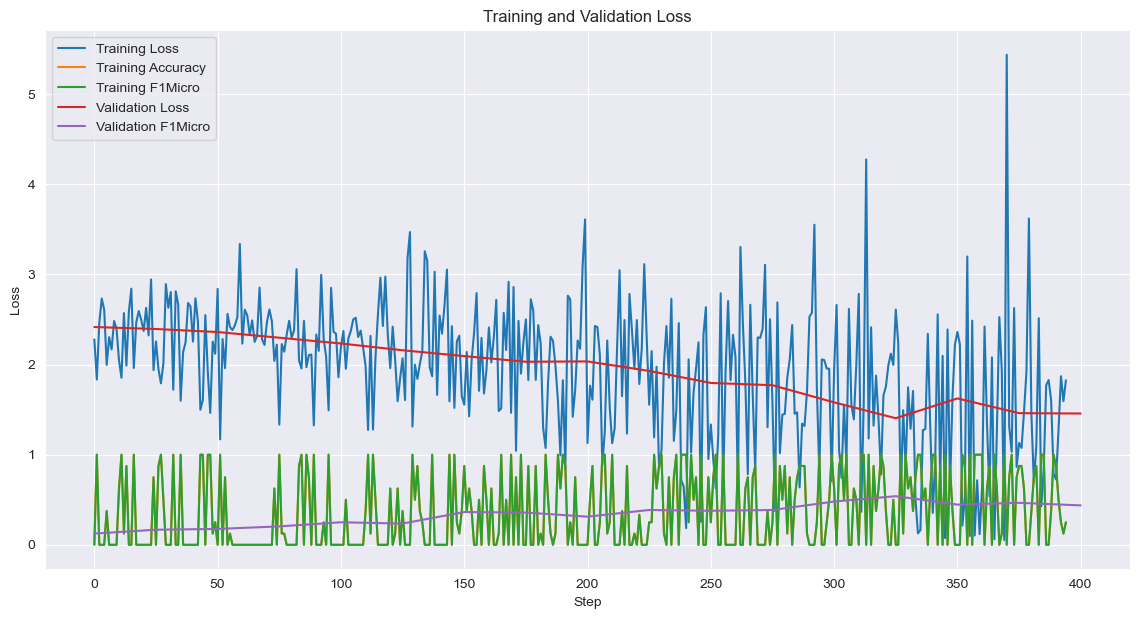

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(train_losses, label='Training Loss')
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(train_f1_micros, label='Training F1Micro')

plt.plot(range(0, 425, 25), val_losses, label='Validation Loss')
plt.plot(range(0, 425, 25), val_f1micro, label='Validation F1Micro')

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
#TODO vypisovat accuracy na trenovacke a kontingencna tabulka na konci aa skusit tie data zhierarchizovat

In [22]:
def load_frozen_model(pb_path):
    with tf.gfile.GFile(pb_path, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="")
    return graph

graph = load_frozen_model("fine_tuned_128_genres_with_val_vggish_model.pb")
print("Frozen model loaded successfully!")

Frozen model loaded successfully!


In [22]:
(features, labels, file_paths, genres) = _get_examples_batch_test(test_df)

 44%|████▎     | 396/908 [03:27<03:53,  2.19it/s]

Count of spectograms from this song ../mp3songs/spotify_dataset_stratified_first_genre/Voyager.mp3 is different then 8. And it is of size :   7


100%|██████████| 908/908 [08:07<00:00,  1.86it/s]


In [13]:
(features, labels) = _get_examples_batch_validation(val_df)


100%|██████████| 712/712 [06:47<00:00,  1.75it/s]


In [23]:
print(len(features))

7263


In [18]:
print(labels[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
features[0].shape

(96, 64)

In [23]:
(features, labels, file_paths, genres) = test_data

In [25]:
print(len(labels))

7263


In [26]:
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def classify(features, graph):
    with tf.Session(graph=graph) as sess:
        # Get input and output tensors
        input_tensor = graph.get_tensor_by_name(vggish_params.INPUT_TENSOR_NAME)  # Change as needed
        output_tensor = graph.get_tensor_by_name("mymodel/prediction:0")  # Change as needed

        # Run the model and get predictions
        predictions = sess.run(output_tensor, feed_dict={input_tensor: features})
        # print(predictions)
    # Take the maximum value for each prediction
    max_predictions = np.argmax(predictions, axis=1)
    return max_predictions, predictions

def calculate_metrics(predictions, labels):
    # Apply argmax to labels
    max_labels = np.argmax(labels, axis=1)
    print("Max labels: ", max_labels[0])
    # Calculate metrics
    accuracy = accuracy_score(max_labels, predictions)
    precision = precision_score(max_labels, predictions, average='micro', zero_division=1)
    precision_for_each_class = precision_score(max_labels, predictions, average=None, zero_division=1)
    recall = recall_score(max_labels, predictions, average='micro', zero_division=1)
    f1 = f1_score(max_labels, predictions, average='micro', zero_division=1)

    return accuracy, precision, precision_for_each_class, recall, f1

# Run inference
preds, predictions_probs = classify(features, graph)
print("Done classifying!")



Done classifying!


In [27]:
print(len(preds))

7263


In [28]:
print(preds)
print(predictions_probs[0])

[48 48 48 ... 54 48 48]
[6.24915538e-03 6.30289828e-03 7.43750157e-03 1.08285015e-02
 4.74831089e-03 3.99409141e-03 3.10218241e-03 9.21939034e-03
 7.75665324e-03 1.14120496e-02 7.63555244e-03 6.60418440e-03
 9.34859179e-03 1.10461526e-02 9.03286692e-03 2.62466702e-03
 1.42139685e-03 6.87943958e-03 5.32053364e-03 3.71371000e-03
 4.80872812e-03 1.87670253e-03 1.01230647e-02 8.21486581e-03
 1.35449064e-03 7.05416594e-03 6.66127866e-03 5.40155824e-03
 9.25846491e-03 3.75273335e-03 8.47105402e-03 2.03924603e-03
 4.57443111e-03 9.67934914e-03 8.80208053e-03 7.16852536e-03
 1.11823753e-02 1.66994717e-03 4.93864343e-03 3.34485667e-03
 5.15899900e-03 4.88672964e-03 6.02746091e-04 9.99458367e-04
 3.68043175e-03 1.24661857e-02 3.15295090e-03 1.10734710e-02
 2.97958702e-02 1.09405559e-03 1.02714431e-02 4.63834405e-03
 1.25445717e-03 6.82031037e-03 2.10153852e-02 1.02587393e-03
 1.91175111e-03 1.04031246e-02 4.52694902e-03 3.36574088e-03
 7.86381681e-03 5.25297271e-03 5.21815754e-03 1.33903995e-02


In [29]:
# Calculate and print metrics
accuracy, precision,precision_for_each_class, recall, f1 = calculate_metrics(preds, labels)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Precision for each class: {precision_for_each_class}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Max labels:  68
Accuracy: 0.011152416356877323
Precision: 0.011152416356877323
Precision for each class: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.34375    1.
 0.00944882 1.         1.         1.         1.         1.
 0.01880878 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.       

In [30]:
# Create a mapping of positive_class_index to genre
genre_mapping = df[['first_genre', 'positive_class_index']].drop_duplicates().sort_values('positive_class_index')

# Display the mapping
genre_mapping

,first_genre,positive_class_index
204,acoustic pop,0
110,adult standards,1
16,album rock,2
164,alt z,3
166,alternative country,4
...,...,...
228,reggaeton,123
354,salsa,124
91,sleep,125
80,soft rock,126


In [31]:
import pandas as pd
import numpy as np

# Create a DataFrame with file paths, labels, and predictions
print("Creating DataFrame with probs...")
data = {
    'file_path': file_paths,
    'genre': genres,
    'label': labels,
    'prediction': preds,
    'prediction_probabilities': predictions_probs.tolist()
}
df = pd.DataFrame(data)

# Create a dictionary for mapping
genre_dict = genre_mapping.set_index('positive_class_index')['first_genre'].to_dict()

# Add a column that maps predictions to genres
df['predicted_genre'] = df['prediction'].map(genre_dict)

# Add a column with the index of the maximum label
df['max_label_index'] = df['label'].apply(np.argmax)

df

Creating DataFrame with probs...


,file_path,genre,label,prediction,prediction_probabilities,predicted_genre,max_label_index
0,../mp3songs/spotify_dataset_stratified_first_g...,emo rap,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48,"[0.006249155383557081, 0.006302898284047842, 0...",colombian pop,68
1,../mp3songs/spotify_dataset_stratified_first_g...,boy band,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48,"[0.007133917883038521, 0.006950953509658575, 0...",colombian pop,24
2,../mp3songs/spotify_dataset_stratified_first_g...,east coast hip hop,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48,"[0.01454758457839489, 0.008031326346099377, 0....",colombian pop,63
3,../mp3songs/spotify_dataset_stratified_first_g...,latin pop,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48,"[0.007803743705153465, 0.009317456744611263, 0...",colombian pop,97
4,../mp3songs/spotify_dataset_stratified_first_g...,reggaeton,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48,"[0.004495350643992424, 0.0062168072909116745, ...",colombian pop,123
...,...,...,...,...,...,...,...
7258,../mp3songs/spotify_dataset_stratified_first_g...,brostep,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48,"[0.010572533123195171, 0.017719395458698273, 0...",colombian pop,27
7259,../mp3songs/spotify_dataset_stratified_first_g...,cloud rap,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48,"[0.007831797935068607, 0.009923952631652355, 0...",colombian pop,47
7260,../mp3songs/spotify_dataset_stratified_first_g...,classic opm,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",54,"[0.008896693587303162, 0.008319168351590633, 0...",country,42
7261,../mp3songs/spotify_dataset_stratified_first_g...,baroque pop,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48,"[0.00959449727088213, 0.007752752397209406, 0....",colombian pop,19


In [25]:
df.head(1)

,file_path,genre,label,prediction,prediction_probabilities,predicted_genre
0,../mp3songs/spotify_dataset_stratified_first_g...,latin hip hop,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",63,"[0.01161882933229208, 0.01189463771879673, 0.0...",east coast hip hop


In [32]:
import pandas as pd

# Assuming df is your DataFrame with 'file_path', 'predicted_genre', 'genre', 'prediction', 'prediction_probabilities', and 'max_label_index' columns
# Create a dictionary for mapping class indices to genres
genre_dict = genre_mapping.set_index('positive_class_index')['first_genre'].to_dict()

# Expand the prediction_probabilities into separate columns
probabilities_df = pd.DataFrame(df['prediction_probabilities'].tolist(), index=df['file_path'])

# Rename the columns to indicate genre probabilities
probabilities_df.columns = [genre_dict[i] for i in range(probabilities_df.shape[1])]

# Reset the index to include file_path as a column
probabilities_df.reset_index(inplace=True)

# Add the genre, prediction, predicted_genre, and max_label_index columns
probabilities_df.insert(1, 'predicted_genre', df['predicted_genre'].values)
probabilities_df.insert(2, 'true_genre', df['genre'].values)
probabilities_df.insert(3, 'prediction_class_index', df['prediction'].values)
probabilities_df.insert(4, 'true_class_index', df['max_label_index'].values)

# Display the DataFrame
probabilities_df

,file_path,predicted_genre,true_genre,prediction_class_index,true_class_index,acoustic pop,adult standards,album rock,alt z,alternative country,...,pov: indie,punk,r&b,reggae fusion,reggae rock,reggaeton,salsa,sleep,soft rock,vallenato
0,../mp3songs/spotify_dataset_stratified_first_g...,colombian pop,emo rap,48,68,0.006249,0.006303,0.007438,0.010829,0.004748,...,0.008092,0.003553,0.012676,0.000840,0.005025,0.012545,0.005246,0.008519,0.004698,0.008723
1,../mp3songs/spotify_dataset_stratified_first_g...,colombian pop,boy band,48,24,0.007134,0.006951,0.011705,0.014863,0.006044,...,0.011563,0.004267,0.012734,0.001054,0.006523,0.014468,0.006828,0.009596,0.006820,0.009167
2,../mp3songs/spotify_dataset_stratified_first_g...,colombian pop,east coast hip hop,48,63,0.014548,0.008031,0.009928,0.012316,0.006580,...,0.009341,0.006978,0.024548,0.001896,0.008500,0.021790,0.010840,0.017293,0.006964,0.016672
3,../mp3songs/spotify_dataset_stratified_first_g...,colombian pop,latin pop,48,97,0.007804,0.009317,0.011482,0.015888,0.006910,...,0.013452,0.004590,0.013964,0.001262,0.006661,0.014763,0.006779,0.010624,0.006913,0.010496
4,../mp3songs/spotify_dataset_stratified_first_g...,colombian pop,reggaeton,48,123,0.004495,0.006217,0.005883,0.010926,0.004236,...,0.006890,0.003196,0.012731,0.000734,0.003624,0.013826,0.004827,0.008672,0.004553,0.007596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7258,../mp3songs/spotify_dataset_stratified_first_g...,colombian pop,brostep,48,27,0.010573,0.017719,0.014763,0.020992,0.011265,...,0.017320,0.007381,0.031773,0.003056,0.009436,0.029702,0.011394,0.021690,0.010831,0.019472
7259,../mp3songs/spotify_dataset_stratified_first_g...,colombian pop,cloud rap,48,47,0.007832,0.009924,0.011925,0.015530,0.007098,...,0.014520,0.004624,0.014663,0.001492,0.007281,0.013699,0.007119,0.010326,0.007476,0.010155
7260,../mp3songs/spotify_dataset_stratified_first_g...,country,classic opm,54,42,0.008897,0.008319,0.011249,0.015533,0.006134,...,0.011990,0.004895,0.013319,0.001383,0.006381,0.015619,0.008144,0.012318,0.006918,0.009278
7261,../mp3songs/spotify_dataset_stratified_first_g...,colombian pop,baroque pop,48,19,0.009594,0.007753,0.011714,0.013511,0.005536,...,0.013388,0.004701,0.015489,0.001551,0.005041,0.013829,0.006838,0.014348,0.006579,0.009496


#TODO tu sa opytat bednara ze ako. Ci to zgrupim pre kazdy frame (8) a tak zoradim a vyhodnotim alebo ako ale celkovo slabe pravdepodobnosti mam

In [21]:
probabilities_df

NameError: name 'probabilities_df' is not defined

In [39]:
# Select the first row
first_row = probabilities_df.iloc[0]

# Exclude the 'file_path' and 'predicted_genre' columns to get only genre values
genre_values = first_row.drop(['file_path', 'predicted_genre','true_genre', 'prediction_class_index', 'true_class_index'])

# Display the genre values
genre_values

acoustic pop           0.009062
adult standards        0.021273
album rock              0.00889
alt z                  0.022165
alternative country    0.006145
                         ...   
reggaeton               0.00506
salsa                  0.004628
sleep                  0.004219
soft rock               0.00653
vallenato               0.00201
Name: 0, Length: 128, dtype: object

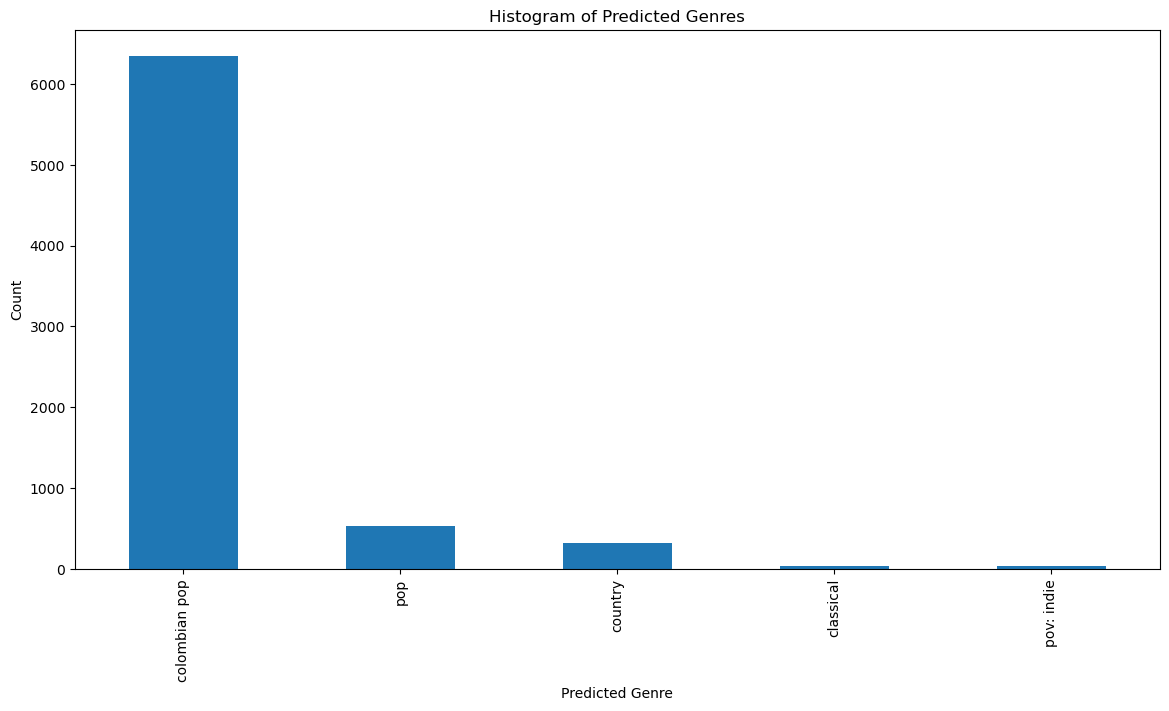

In [33]:
import matplotlib.pyplot as plt

# Plot the histogram of the count of predicted genres
plt.figure(figsize=(14, 7))
df['predicted_genre'].value_counts().plot(kind='bar')
plt.title('Histogram of Predicted Genres')
plt.xlabel('Predicted Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

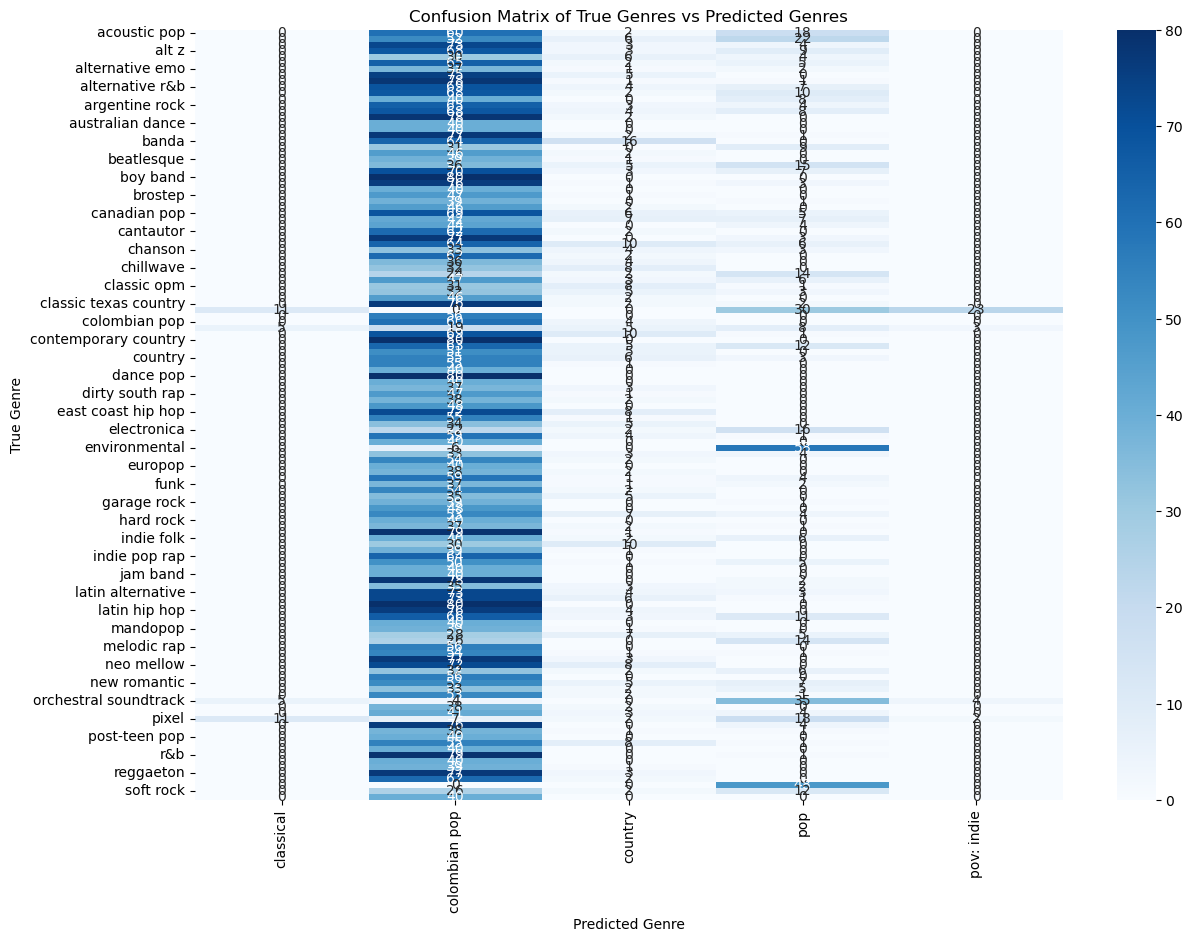

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table (confusion matrix) from predicted_genre and true_genre
contingency_table = pd.crosstab(probabilities_df['true_genre'], probabilities_df['predicted_genre'], rownames=['True Genre'], colnames=['Predicted Genre'])

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of True Genres vs Predicted Genres')
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()